In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
plt.style.use('seaborn')

C:\Users\Hammam\AppData\Local\Temp\ipykernel_19780\240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
sns.set(rc={'figure.figsize':(15, 8)})

## Load Datasets

In [7]:
df_banking = pd.read_csv('./banking.csv')

In [8]:
df_banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [9]:
df_banking['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [10]:
df_banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [11]:
df_banking.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


## Explore & Visualize Data

In [12]:
print('Total rows: ', df_banking.shape[0])
print('Total features: ', df_banking.shape[1])

Total rows:  41188
Total features:  21


c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


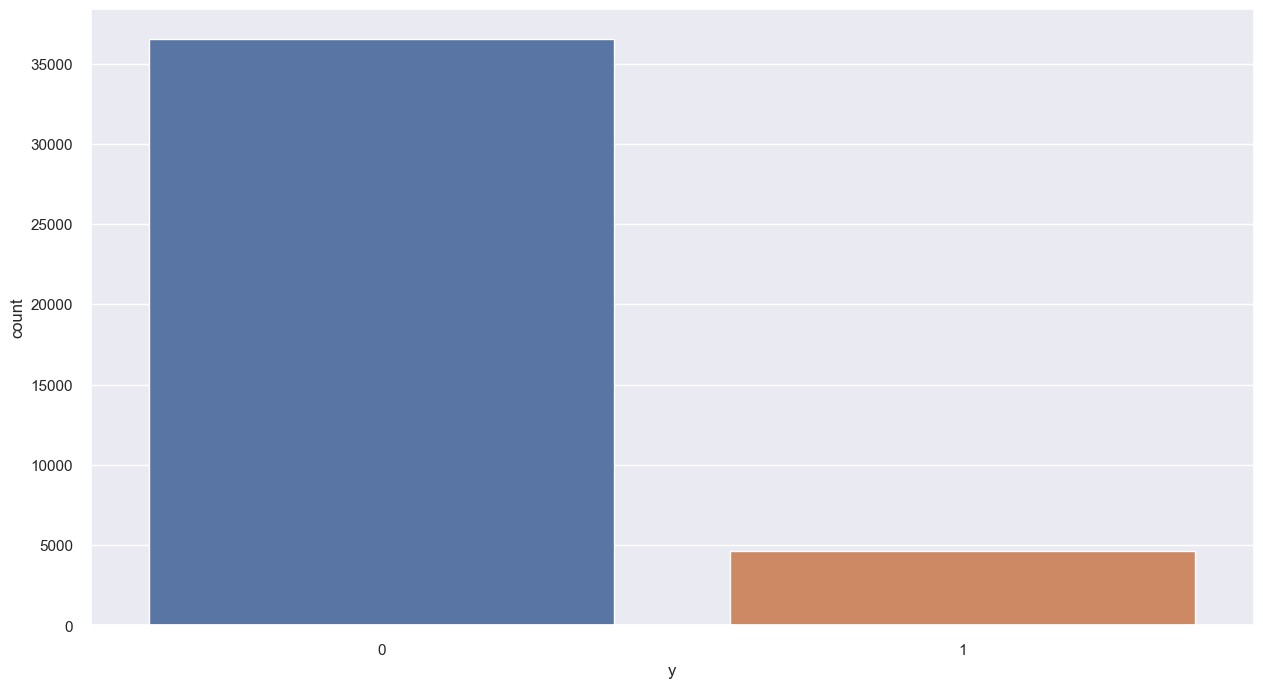

In [13]:
sns.countplot(x='y', data=df_banking)
plt.show()

### Check Job Features

In [14]:
np.unique(df_banking['job'])

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [24]:
# df_banking.groupby('job').mean( dtype = np.obj2sctype)
# grouped = df_banking['job']
# grouped[['job']].agg(lambda x: np.mean(x))
# grouped
series = pd.Series(df_banking['job'])
series.mean().iloc[0]

TypeError: Could not convert string 'blue-collartechnicianmanagementservicesretiredmanagementblue-collarblue-collaradmin.blue-collarhousemaidmanagementmanagementservicesadmin.servicesservicesadmin.blue-collarunemployedunemployedblue-collaradmin.technicianblue-collarentrepreneurtechnicianadmin.blue-collarblue-collarservicesadmin.techniciantechnicianservicesblue-collarblue-collartechnicianblue-collarmanagementblue-collarblue-collarblue-collarretiredblue-collarmanagementhousemaidentrepreneurretiredblue-collaradmin.technicianblue-collarblue-collarmanagementblue-collarmanagementadmin.blue-collarblue-collartechnicianadmin.managementadmin.retiredadmin.techniciantechnicianself-employedblue-collarunknownmanagemententrepreneurservicesmanagementservicestechnicianblue-collartechnicianself-employedtechniciantechnicianservicesadmin.blue-collaradmin.admin.blue-collarblue-collarblue-collarblue-collaradmin.blue-collarblue-collaradmin.technicianadmin.servicesadmin.unemployedblue-collarblue-collarentrepreneurstudentadmin.managementadmin.admin.entrepreneurself-employedblue-collarretiredadmin.admin.servicesmanagementblue-collaradmin.blue-collarservicesretiredtechnicianadmin.retiredhousemaidblue-collaradmin.technicianretiredadmin.blue-collarservicesservicestechnicianadmin.technicianentrepreneurmanagementmanagementadmin.managementadmin.entrepreneurmanagementblue-collarentrepreneurstudentblue-collaradmin.admin.blue-collartechnicianadmin.admin.blue-collarself-employedadmin.technicianadmin.admin.admin.blue-collartechnicianunemployedself-employedhousemaidblue-collarself-employedretiredmanagementblue-collarservicesadmin.servicesblue-collaradmin.unemployedadmin.admin.managementself-employedadmin.admin.blue-collarunknowntechnicianblue-collarblue-collartechnicianhousemaidblue-collarmanagementtechnicianself-employedblue-collarmanagementadmin.managementmanagementtechnicianself-employedservicesblue-collarunemployedadmin.admin.servicesmanagementadmin.blue-collarmanagementadmin.technicianblue-collarblue-collarentrepreneurblue-collarmanagementblue-collarblue-collarblue-collaradmin.blue-collaradmin.managementblue-collartechnicianretiredtechnicianunemployedblue-collartechnicianadmin.admin.admin.blue-collarentrepreneuradmin.servicesunemployedadmin.admin.admin.admin.blue-collarblue-collartechnicianservicesmanagementstudentservicestechniciantechnicianblue-collarblue-collaradmin.blue-collartechnicianblue-collarblue-collarunemployedservicesmanagementblue-collarblue-collartechniciantechnicianentrepreneurservicesstudentblue-collarservicestechnicianblue-collarservicesadmin.admin.blue-collarblue-collartechnicianadmin.unemployedmanagementblue-collaradmin.blue-collartechnicianadmin.techniciantechnicianunknownadmin.blue-collarmanagementblue-collarblue-collaradmin.blue-collarblue-collaradmin.technicianself-employedadmin.technicianservicesretiredblue-collarretiredtechniciantechnicianservicesservicesblue-collarservicesblue-collartechniciantechnicianservicestechnicianretiredblue-collarblue-collartechnicianservicesmanagementadmin.technicianretiredself-employedself-employedtechnicianhousemaidself-employedadmin.retiredblue-collarhousemaidtechnicianblue-collarmanagementblue-collartechnicianretiredblue-collarmanagementblue-collarself-employedstudentadmin.admin.technicianmanagemententrepreneuradmin.techniciantechnicianblue-collartechnicianblue-collarblue-collarblue-collartechniciantechnicianblue-collarentrepreneurblue-collartechnicianblue-collartechnicianadmin.managementservicesblue-collaradmin.blue-collarunemployedentrepreneuradmin.blue-collartechnicianblue-collaradmin.blue-collartechniciantechnicianretiredblue-collaradmin.technicianself-employedhousemaidunemployedretiredmanagementhousemaidself-employedself-employedmanagementadmin.technicianunemployedadmin.blue-collaradmin.technicianself-employedservicesblue-collaradmin.technicianblue-collaradmin.blue-collarself-employedadmin.blue-collaradmin.servicesservicesblue-collarretiredtechnicianretiredtechnicianservicestechnicianadmin.blue-collarservicesmanagementself-employedadmin.servicesadmin.technicianblue-collaradmin.blue-collarstudentservicesblue-collarentrepreneurhousemaidmanagementadmin.admin.entrepreneurretiredunemployedblue-collaradmin.admin.servicestechnicianretiredadmin.admin.admin.managementadmin.blue-collarservicesentrepreneurblue-collaradmin.entrepreneurblue-collartechnicianstudentmanagementservicesservicesadmin.studentself-employedadmin.entrepreneurmanagementtechniciantechniciantechnicianblue-collarblue-collarblue-collaradmin.housemaidadmin.admin.blue-collarhousemaidtechnicianself-employedblue-collarblue-collaradmin.admin.technicianadmin.entrepreneurblue-collarmanagementblue-collaradmin.servicestechnicianblue-collarservicesadmin.technicianmanagementadmin.servicesadmin.servicesadmin.admin.admin.entrepreneurblue-collartechnicianmanagementadmin.blue-collarservicestechnicianmanagementtechnicianretiredservicesadmin.blue-collartechnicianservicesblue-collarblue-collarblue-collarblue-collarservicesmanagementblue-collaradmin.admin.managementadmin.admin.blue-collarmanagementblue-collarhousemaidblue-collarblue-collaradmin.admin.servicesretiredblue-collarblue-collarblue-collarblue-collarretiredentrepreneuradmin.unemployedunemployedblue-collartechnicianadmin.admin.admin.technicianblue-collarservicesunemployedtechnicianadmin.technicianretiredmanagementblue-collarblue-collartechnicianadmin.servicestechnicianmanagementservicesservicesmanagementadmin.admin.studentunemployedmanagementtechniciantechnicianretiredadmin.technicianblue-collaradmin.technicianadmin.admin.entrepreneurstudententrepreneuradmin.technicianblue-collarmanagementunemployedadmin.technicianadmin.admin.technicianentrepreneurtechnicianhousemaidtechnicianblue-collarblue-collarmanagementmanagementadmin.blue-collarmanagementblue-collarmanagementadmin.technicianblue-collarretiredmanagementblue-collarhousemaidtechnicianservicestechnicianblue-collaradmin.blue-collarmanagementhousemaidblue-collarmanagementblue-collarunknownadmin.blue-collarblue-collarentrepreneurself-employedretiredservicesblue-collarservicesentrepreneurmanagementservicesunknowntechnicianadmin.blue-collarblue-collarblue-collaradmin.blue-collarhousemaidself-employedadmin.admin.managementblue-collarunknownadmin.retiredblue-collarblue-collaradmin.admin.entrepreneurentrepreneuradmin.managementservicestechnicianblue-collarblue-collarself-employedadmin.managementadmin.admin.admin.technicianblue-collarblue-collarblue-collaradmin.servicesservicesservicestechnicianstudentstudentadmin.retiredservicestechnicianmanagementtechnicianadmin.technicianretiredadmin.blue-collarblue-collarmanagementblue-collarblue-collarblue-collaradmin.admin.blue-collartechnicianservicesretiredservicesadmin.admin.admin.admin.admin.blue-collaradmin.technicianretiredadmin.servicesadmin.managementadmin.admin.techniciantechnicianadmin.technicianmanagementadmin.admin.blue-collaradmin.technicianblue-collartechnicianblue-collarhousemaidblue-collarhousemaidblue-collartechnicianadmin.housemaidtechniciantechnicianunknownmanagementadmin.techniciantechnicianblue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collaradmin.technicianblue-collartechnicianadmin.technicianstudentself-employedservicesblue-collarself-employedadmin.admin.admin.technicianadmin.servicesmanagementunknownadmin.managementtechnicianmanagementadmin.blue-collaradmin.retiredtechnicianretiredblue-collaradmin.technicianblue-collarblue-collarblue-collarhousemaidblue-collarservicesblue-collarself-employedservicesadmin.blue-collartechniciantechnicianretiredblue-collarblue-collaradmin.retiredblue-collarblue-collarservicesadmin.servicesblue-collartechnicianadmin.technicianadmin.blue-collaradmin.admin.admin.admin.admin.retiredmanagementblue-collarblue-collaradmin.technicianblue-collaradmin.servicesself-employedtechnicianblue-collaradmin.technicianblue-collartechniciantechniciantechnicianadmin.servicesunknownadmin.admin.techniciantechnicianservicestechnicianself-employedadmin.self-employedadmin.entrepreneuradmin.admin.self-employedtechnicianadmin.blue-collarunemployedadmin.blue-collarblue-collaradmin.admin.blue-collaradmin.blue-collarblue-collarself-employedtechnicianadmin.unemployedadmin.technicianblue-collarmanagementtechnicianadmin.blue-collarservicesblue-collarblue-collarmanagementadmin.admin.blue-collarmanagementblue-collarblue-collarmanagementmanagementtechnicianentrepreneurservicesretiredtechniciantechnicianblue-collarhousemaidblue-collartechnicianmanagemententrepreneuradmin.blue-collarunemployedblue-collarstudentblue-collaradmin.servicesservicesadmin.entrepreneurunemployedtechniciantechnicianservicesblue-collarmanagementtechnicianunemployedblue-collarself-employedtechnicianadmin.admin.managementadmin.technicianadmin.admin.entrepreneurretiredadmin.admin.admin.admin.self-employedunemployedtechniciantechnicianblue-collarblue-collaradmin.blue-collaradmin.admin.blue-collarservicesblue-collartechnicianservicesunemployedblue-collarentrepreneuradmin.unemployedmanagementretiredadmin.technicianhousemaidtechnicianmanagementblue-collarblue-collarblue-collarstudentservicesservicesblue-collarunemployedadmin.admin.technicianmanagementself-employedservicesblue-collarblue-collaradmin.blue-collarblue-collarunknownblue-collarentrepreneurblue-collartechnicianblue-collarstudenttechnicianretiredtechnicianretiredtechniciantechnicianmanagementadmin.studentadmin.housemaidadmin.admin.unemployedblue-collaradmin.admin.technicianmanagementmanagementtechnicianadmin.housemaidblue-collarunemployedtechniciantechniciantechnicianblue-collartechnicianblue-collarservicesadmin.technicianadmin.managementtechnicianadmin.admin.blue-collarmanagementblue-collartechniciantechniciantechnicianblue-collarself-employedblue-collaradmin.blue-collarblue-collaradmin.admin.technicianmanagementadmin.technicianhousemaidtechnicianstudentblue-collarblue-collarblue-collarmanagementblue-collarblue-collarunemployedadmin.entrepreneuradmin.technicianstudentservicesmanagementblue-collarservicestechnicianservicestechnicianblue-collarstudenttechnicianadmin.technicianservicesmanagementtechnicianretiredtechniciantechnicianself-employedblue-collaradmin.managementservicesservicestechnicianservicesadmin.managementblue-collarmanagementadmin.servicesadmin.managementblue-collarservicesblue-collaradmin.servicesself-employedmanagementblue-collaradmin.admin.studententrepreneurtechnicianadmin.admin.entrepreneurtechnicianadmin.entrepreneuradmin.self-employedtechnicianblue-collarblue-collaradmin.admin.admin.entrepreneurtechnicianblue-collarblue-collartechniciantechnicianblue-collarservicesentrepreneurunemployedadmin.blue-collaradmin.admin.blue-collaradmin.blue-collarservicesadmin.blue-collartechnicianentrepreneurservicesadmin.technicianadmin.housemaidblue-collarblue-collarblue-collaradmin.blue-collartechnicianstudentservicesadmin.retiredself-employedadmin.admin.admin.technicianunemployedblue-collartechnicianblue-collaradmin.housemaidtechnicianstudenttechnicianself-employedtechnicianstudentadmin.technicianblue-collaradmin.admin.managementmanagementadmin.retiredadmin.servicesself-employedmanagementunemployedblue-collarblue-collarblue-collartechnicianblue-collartechnicianblue-collaradmin.servicesblue-collarblue-collaradmin.admin.blue-collarstudentadmin.technicianservicestechnicianentrepreneurentrepreneurservicesretiredservicesblue-collartechnicianadmin.admin.admin.admin.technicianservicesadmin.admin.managementblue-collarservicesblue-collartechniciantechnicianblue-collarservicesadmin.admin.blue-collarmanagementblue-collarblue-collarblue-collaradmin.technicianadmin.servicesmanagementblue-collarmanagementblue-collarblue-collaradmin.servicestechnicianstudenttechnicianservicesblue-collarservicesservicesadmin.blue-collaradmin.admin.blue-collarentrepreneurunemployedretiredblue-collarblue-collartechnicianentrepreneurunemployedblue-collaradmin.technicianadmin.admin.entrepreneuradmin.technicianadmin.blue-collarstudentadmin.retiredadmin.blue-collarservicesservicesretiredblue-collaradmin.blue-collarmanagementservicesblue-collartechnicianadmin.technicianblue-collartechnicianadmin.admin.retiredentrepreneurblue-collarmanagementservicesblue-collarhousemaidtechnicianservicesadmin.managementtechnicianservicesblue-collartechnicianblue-collarself-employedadmin.admin.servicesblue-collarblue-collaradmin.technicianunemployedservicesblue-collaradmin.blue-collarservicesadmin.servicesadmin.blue-collarblue-collarblue-collartechniciantechniciantechnicianentrepreneurblue-collaradmin.admin.admin.admin.housemaidadmin.technicianservicesadmin.blue-collaradmin.managementadmin.servicesentrepreneurtechnicianmanagemententrepreneurservicestechnicianadmin.blue-collarself-employedtechnicianstudentadmin.admin.servicesadmin.blue-collarblue-collaradmin.blue-collartechnicianblue-collaradmin.technicianblue-collaradmin.technicianadmin.blue-collaradmin.retiredtechniciantechnicianself-employedservicestechnicianmanagementhousemaidadmin.admin.technicianadmin.blue-collaradmin.admin.admin.admin.retiredblue-collarservicesmanagementmanagementservicesserviceshousemaidretiredtechnicianblue-collartechnicianentrepreneurblue-collarmanagementblue-collarblue-collarunemployedadmin.servicesservicesservicesmanagementadmin.managementadmin.admin.blue-collaradmin.blue-collaradmin.admin.blue-collarblue-collarself-employedservicesadmin.admin.servicesadmin.admin.studentadmin.servicesself-employedadmin.admin.admin.retiredretiredblue-collarretiredtechnicianself-employedmanagementhousemaidmanagementretiredtechniciantechnicianblue-collaradmin.admin.servicestechnicianadmin.servicesmanagementblue-collarretiredblue-collaradmin.admin.blue-collaradmin.admin.retiredtechnicianmanagementadmin.entrepreneuradmin.admin.blue-collartechnicianblue-collarretiredself-employedblue-collarmanagementadmin.blue-collarentrepreneuradmin.admin.retiredadmin.blue-collarretiredmanagementtechnicianservicesadmin.managementservicesblue-collartechnicianmanagementtechnicianblue-collaradmin.admin.servicesretiredtechnicianblue-collaradmin.servicesblue-collarservicesservicesblue-collartechnicianblue-collarunknownblue-collaradmin.admin.technicianadmin.blue-collarblue-collartechnicianadmin.admin.admin.blue-collarservicestechnicianblue-collartechnicianmanagementadmin.retiredtechnicianblue-collartechnicianblue-collartechnicianstudentadmin.technicianblue-collarentrepreneurblue-collarblue-collartechnicianadmin.self-employedretiredblue-collaradmin.managementmanagementadmin.servicesadmin.technicianunemployedblue-collarretiredblue-collaradmin.self-employedadmin.retiredadmin.technicianentrepreneurentrepreneuradmin.servicesadmin.entrepreneuradmin.blue-collarblue-collarself-employedadmin.blue-collarblue-collaradmin.technicianblue-collaradmin.retiredentrepreneuradmin.admin.blue-collarblue-collaradmin.blue-collarself-employedadmin.managementadmin.admin.studentadmin.blue-collaradmin.admin.admin.admin.servicesblue-collarblue-collartechnicianservicesservicesunknownunemployedretiredstudentadmin.blue-collaradmin.blue-collaradmin.blue-collarmanagementhousemaidretiredservicestechniciantechnicianblue-collarservicesservicesentrepreneurtechnicianentrepreneurblue-collartechnicianadmin.blue-collaradmin.blue-collartechnicianretiredservicesself-employedmanagementblue-collarmanagementhousemaidunknownadmin.retiredadmin.technicianblue-collaradmin.managementblue-collarunemployedmanagementadmin.self-employedstudentretiredtechnicianhousemaidtechnicianadmin.housemaidblue-collarblue-collaradmin.technicianadmin.blue-collarservicesadmin.blue-collaradmin.techniciantechnicianadmin.unemployedhousemaidblue-collaradmin.housemaidblue-collaradmin.retiredtechnicianservicesadmin.housemaidservicesblue-collaradmin.studenthousemaidadmin.blue-collaradmin.technicianself-employedself-employedtechnicianservicestechnicianservicestechniciantechnicianblue-collartechnicianself-employedadmin.technicianretiredservicestechnicianblue-collaradmin.housemaidadmin.admin.blue-collartechnicianadmin.technicianservicesadmin.managementself-employedblue-collarblue-collartechnicianadmin.servicesretiredservicesadmin.admin.technicianmanagementblue-collaradmin.unemployedblue-collaradmin.admin.blue-collaradmin.blue-collartechnicianentrepreneurservicesretiredtechnicianself-employedadmin.admin.technicianself-employedretiredadmin.entrepreneuradmin.unemployedadmin.blue-collarservicesblue-collarblue-collaradmin.technicianunemployedentrepreneurblue-collarblue-collartechnicianadmin.self-employedblue-collarunemployedmanagementmanagementblue-collaradmin.admin.managementadmin.admin.servicesblue-collarservicestechniciantechnicianadmin.blue-collarhousemaidblue-collarblue-collarmanagementtechnicianblue-collarblue-collarmanagementhousemaidtechnicianblue-collartechnicianblue-collartechnicianblue-collarblue-collarmanagementadmin.admin.managementadmin.technicianservicestechnicianblue-collaradmin.studentservicesblue-collarservicesservicesblue-collarserviceshousemaidservicesadmin.blue-collaradmin.servicesblue-collarentrepreneurentrepreneuradmin.technicianservicesadmin.retiredadmin.self-employedtechnicianmanagementadmin.retiredblue-collaradmin.blue-collarservicesadmin.blue-collarblue-collarblue-collarblue-collartechnicianblue-collaradmin.blue-collartechniciantechniciantechnicianblue-collaradmin.managementadmin.servicesmanagementblue-collarself-employedblue-collarblue-collarmanagementservicesblue-collarblue-collarmanagementblue-collarblue-collartechnicianblue-collarblue-collarself-employedadmin.admin.admin.admin.entrepreneurtechnicianadmin.blue-collartechniciantechnicianadmin.technicianadmin.entrepreneuradmin.managementadmin.admin.blue-collartechnicianentrepreneuradmin.techniciantechniciantechnicianblue-collartechniciantechniciantechnicianmanagementself-employedservicesservicesadmin.admin.retiredblue-collarunemployedblue-collaradmin.servicesadmin.blue-collarblue-collarblue-collarretiredservicesblue-collartechnicianmanagementtechnicianunemployedadmin.admin.technicianblue-collaradmin.self-employedadmin.serviceshousemaidadmin.entrepreneuradmin.admin.blue-collartechnicianadmin.technicianhousemaidentrepreneurtechnicianblue-collarblue-collarretiredadmin.technicianblue-collarretiredadmin.admin.blue-collarblue-collarblue-collarblue-collarblue-collaradmin.admin.admin.admin.admin.admin.technicianadmin.retiredadmin.retiredservicesadmin.admin.blue-collaradmin.self-employedadmin.servicesservicesblue-collarself-employedself-employedadmin.retiredblue-collarmanagementadmin.technicianmanagementtechnicianadmin.studentadmin.techniciantechnicianservicestechnicianadmin.blue-collaradmin.servicesblue-collartechniciantechnicianmanagementadmin.blue-collartechnicianmanagementretiredadmin.blue-collaradmin.servicestechnicianadmin.admin.admin.entrepreneurself-employedretiredadmin.blue-collarunknownadmin.admin.blue-collarmanagementtechnicianadmin.technicianadmin.blue-collarblue-collarservicesblue-collarunemployedadmin.technicianadmin.admin.self-employedself-employedadmin.self-employedblue-collarunknownblue-collarmanagementmanagementadmin.servicesblue-collarblue-collarservicesservicesadmin.technicianadmin.blue-collaradmin.unemployedadmin.housemaidadmin.admin.blue-collarretiredtechnicianadmin.blue-collartechniciantechnicianstudentadmin.housemaidblue-collaradmin.servicesstudenthousemaidunemployedtechnicianblue-collarblue-collarmanagementblue-collarservicestechnicianadmin.technicianservicesmanagementadmin.admin.technicianretiredadmin.managementmanagementblue-collarblue-collartechnicianentrepreneurtechnicianservicesentrepreneurservicesmanagementblue-collarservicesblue-collaradmin.blue-collarblue-collaradmin.blue-collarentrepreneurservicesblue-collarunknownretiredretiredentrepreneurtechniciantechnicianblue-collartechnicianservicesself-employedservicesservicesadmin.self-employedblue-collarblue-collartechnicianmanagementmanagementadmin.admin.admin.admin.blue-collarblue-collaradmin.admin.blue-collarhousemaidblue-collarblue-collarblue-collartechnicianretiredservicesblue-collartechnicianunemployedblue-collaradmin.blue-collartechniciantechnicianadmin.servicestechnicianadmin.admin.blue-collarblue-collarservicestechnicianadmin.managementself-employedtechnicianblue-collarentrepreneuradmin.self-employedblue-collaradmin.admin.admin.technicianadmin.admin.admin.blue-collarentrepreneurblue-collarretiredservicesadmin.blue-collaradmin.unemployedadmin.servicestechniciantechnicianmanagementtechnicianservicesstudentblue-collarhousemaidentrepreneurservicesadmin.studenttechnicianadmin.servicesadmin.admin.admin.technicianadmin.blue-collarblue-collarservicesblue-collartechnicianservicestechnicianmanagementmanagementtechnicianadmin.admin.admin.admin.admin.servicesadmin.technicianadmin.technicianhousemaidtechnicianblue-collartechnicianblue-collaradmin.blue-collartechnicianadmin.blue-collarhousemaidretiredtechnicianblue-collarblue-collaradmin.technicianself-employedblue-collaradmin.housemaidself-employedtechnicianadmin.managementtechnicianadmin.technicianservicestechnicianblue-collaradmin.admin.retiredretiredadmin.managementserviceshousemaidself-employedtechnicianadmin.admin.techniciantechniciantechniciantechnicianblue-collarblue-collarmanagementblue-collaradmin.self-employedretiredblue-collarmanagementtechnicianmanagementblue-collarblue-collaradmin.admin.managementservicestechnicianmanagementadmin.managementblue-collarblue-collaradmin.technicianservicestechnicianblue-collarblue-collarself-employedadmin.admin.servicesblue-collaradmin.managementadmin.admin.blue-collarself-employedblue-collarunemployedself-employedmanagementblue-collartechniciantechnicianself-employedtechnicianmanagementtechnicianadmin.servicestechnicianmanagementtechnicianadmin.blue-collaradmin.techniciantechnicianretiredtechnicianadmin.admin.housemaidblue-collaradmin.retiredtechnicianadmin.admin.blue-collarmanagementblue-collarblue-collaradmin.admin.managementtechnicianentrepreneuradmin.unemployedretiredhousemaidhousemaidadmin.admin.blue-collarservicestechnicianentrepreneuradmin.blue-collarunemployedmanagemententrepreneurstudentblue-collaradmin.blue-collarhousemaidself-employedmanagementservicesadmin.managementtechnicianstudentretiredtechniciantechnicianservicestechnicianservicesadmin.admin.technicianblue-collarblue-collarmanagementmanagementmanagementadmin.admin.blue-collarself-employedtechnicianblue-collaradmin.technicianmanagementretiredadmin.technicianblue-collarblue-collaradmin.technicianmanagementtechniciantechnicianadmin.admin.admin.housemaidmanagementblue-collarblue-collaradmin.admin.managementadmin.servicesadmin.techniciantechnicianmanagementadmin.entrepreneurstudentblue-collaradmin.technicianservicesmanagementservicesservicesservicestechnicianmanagementtechnicianservicesmanagementservicesself-employedunemployedtechnicianblue-collarblue-collarservicesunemployedservicesblue-collaradmin.blue-collaradmin.managementadmin.managementservicesblue-collarunemployedself-employedblue-collarmanagementself-employedblue-collarblue-collaradmin.retiredservicesblue-collartechnicianblue-collarblue-collarservicesservicesblue-collarhousemaidservicesunemployedadmin.technicianadmin.admin.blue-collaradmin.admin.unknownself-employedtechnicianblue-collarmanagementblue-collarblue-collarblue-collarblue-collartechniciantechniciantechniciantechnicianadmin.managementservicesblue-collaradmin.servicesmanagementtechnicianblue-collartechnicianmanagementtechnicianblue-collaradmin.admin.admin.managementblue-collarservicesblue-collarself-employedservicesunemployedmanagementservicesmanagementadmin.managementhousemaidtechnicianadmin.admin.unemployedmanagementadmin.admin.admin.serviceshousemaidblue-collartechniciantechnicianservicesself-employedadmin.technicianblue-collaradmin.blue-collarstudentretiredservicesadmin.servicesblue-collarunemployedadmin.housemaidblue-collartechnicianadmin.technicianadmin.admin.housemaidtechnicianblue-collarservicesadmin.techniciantechnicianmanagementblue-collartechnicianadmin.unemployedentrepreneuradmin.blue-collartechnicianservicesadmin.studenttechnicianmanagementtechniciantechnicianadmin.unemployedadmin.blue-collarservicesadmin.blue-collaradmin.technicianadmin.admin.servicesservicesmanagementhousemaidblue-collartechnicianservicesadmin.admin.servicesmanagemententrepreneuradmin.servicesblue-collarentrepreneurblue-collaradmin.technicianadmin.technicianblue-collarhousemaidservicesservicesmanagementhousemaidblue-collartechnicianadmin.servicesblue-collaradmin.housemaidblue-collaradmin.managementadmin.managementmanagementblue-collarservicesunemployedadmin.managementblue-collaradmin.admin.techniciantechnicianstudentblue-collarretiredblue-collarservicesadmin.blue-collaradmin.admin.admin.admin.unknowntechniciantechnicianretiredtechnicianblue-collarblue-collaradmin.admin.admin.blue-collarservicestechnicianadmin.techniciantechnicianself-employedadmin.blue-collarblue-collarmanagementtechnicianservicestechniciantechnicianretiredblue-collarmanagementtechnicianadmin.blue-collarretiredblue-collartechnicianservicesblue-collarblue-collarblue-collartechnicianstudenttechnicianmanagementadmin.retiredretiredblue-collarself-employedblue-collarblue-collaradmin.blue-collarhousemaidadmin.admin.blue-collaradmin.admin.blue-collaradmin.admin.admin.admin.servicestechnicianadmin.blue-collarmanagementblue-collaradmin.blue-collarblue-collarservicesadmin.technicianblue-collaradmin.servicesadmin.admin.technicianservicestechnicianretiredadmin.technicianself-employedadmin.techniciantechnicianadmin.admin.self-employedservicesadmin.admin.admin.technicianadmin.admin.blue-collartechnicianadmin.blue-collarstudenttechnicianmanagementadmin.technicianadmin.managementblue-collarblue-collarretiredmanagementadmin.blue-collarservicesadmin.blue-collaradmin.blue-collartechnicianmanagementretiredadmin.technicianentrepreneuradmin.blue-collarhousemaidadmin.blue-collarstudentblue-collaradmin.admin.admin.admin.entrepreneurentrepreneurretiredblue-collarunknownself-employedself-employedunknownmanagementadmin.servicesblue-collaradmin.technicianmanagementretiredblue-collartechnicianservicesretiredtechnicianblue-collarblue-collarblue-collarblue-collaradmin.admin.techniciantechnicianadmin.blue-collartechnicianmanagementretiredblue-collarblue-collarblue-collarservicesblue-collaradmin.technicianservicesmanagementadmin.retiredblue-collartechnicianblue-collarunknowntechnicianblue-collarentrepreneurblue-collarself-employedhousemaidtechnicianadmin.studentmanagementblue-collarentrepreneurretiredtechnicianadmin.blue-collaradmin.admin.admin.blue-collartechnicianservicestechnicianunemployedblue-collaradmin.technicianblue-collarretiredservicesself-employedadmin.servicesadmin.technicianadmin.managementblue-collaradmin.admin.technicianmanagementretiredstudentadmin.servicesself-employedretiredblue-collarretiredadmin.technicianself-employedblue-collaradmin.technicianadmin.technicianservicesservicestechniciantechnicianadmin.technicianblue-collaradmin.blue-collaradmin.entrepreneuradmin.studenttechnicianadmin.admin.blue-collaradmin.servicesadmin.managementretiredblue-collarstudentblue-collarself-employedblue-collarself-employedblue-collaradmin.admin.admin.self-employedmanagementservicesunknownblue-collaradmin.admin.admin.self-employedblue-collartechnicianadmin.self-employedtechniciantechniciantechnicianblue-collaradmin.unknownadmin.self-employedself-employedtechnicianmanagementunknownretiredtechnicianstudentadmin.housemaidmanagementadmin.servicesretiredservicesadmin.self-employedhousemaidtechniciantechnicianmanagementadmin.unemployedservicesadmin.blue-collaradmin.managementadmin.self-employedentrepreneuradmin.admin.admin.entrepreneurtechniciantechnicianretiredretiredself-employedmanagementblue-collarstudentadmin.blue-collartechnicianservicesmanagementadmin.managementblue-collaradmin.admin.blue-collarblue-collarblue-collarservicesservicesblue-collartechnicianblue-collartechnicianadmin.technicianblue-collarblue-collarblue-collarmanagementtechnicianblue-collarself-employedservicesblue-collaradmin.admin.blue-collartechnicianblue-collarentrepreneuradmin.technicianblue-collarblue-collarentrepreneurservicesblue-collarretiredtechnicianadmin.admin.managementblue-collaradmin.unemployedmanagementstudentmanagementblue-collarblue-collarretiredservicestechnicianadmin.studentblue-collarself-employedadmin.admin.servicesadmin.entrepreneuradmin.admin.technicianstudentblue-collaradmin.blue-collarunemployedself-employedadmin.admin.admin.admin.blue-collarhousemaidadmin.servicesentrepreneurblue-collaradmin.techniciantechnicianadmin.technicianblue-collartechniciantechnicianretiredadmin.studenttechnicianunknowntechnicianretiredmanagementblue-collartechnicianself-employedmanagementadmin.servicestechnicianentrepreneurservicesadmin.techniciantechnicianblue-collarservicesentrepreneurservicesblue-collaradmin.admin.admin.managementtechnicianstudentblue-collaradmin.admin.retiredtechnicianhousemaidblue-collartechniciantechnicianunknownadmin.blue-collarblue-collarblue-collarblue-collartechnicianblue-collarself-employedservicestechnicianadmin.servicestechniciantechnicianself-employedtechnicianadmin.admin.blue-collarblue-collartechnicianstudentmanagementtechnicianblue-collarretiredtechnicianblue-collartechnicianadmin.admin.servicesstudentblue-collarblue-collaradmin.entrepreneuradmin.servicesadmin.housemaidtechnicianadmin.admin.admin.blue-collartechnicianblue-collarservicesadmin.managementadmin.admin.blue-collaradmin.blue-collarmanagementadmin.admin.blue-collartechnicianunemployedmanagementblue-collartechnicianunemployedtechnicianunemployedtechnicianadmin.admin.admin.admin.technicianblue-collarblue-collarblue-collartechnicianadmin.admin.unknowntechnicianadmin.blue-collaradmin.admin.blue-collarservicesblue-collarstudentunemployedretiredtechnicianadmin.technicianadmin.admin.blue-collartechnicianblue-collarself-employedadmin.technicianblue-collarblue-collarblue-collarservicesblue-collarentrepreneurtechnicianservicesretiredblue-collartechnicianblue-collarblue-collarmanagementtechnicianblue-collarblue-collaradmin.servicesentrepreneurblue-collaradmin.blue-collarmanagementtechnicianblue-collarblue-collartechnicianadmin.blue-collarentrepreneuradmin.blue-collartechnicianhousemaidtechnicianservicesentrepreneurmanagementadmin.studentblue-collarblue-collaradmin.blue-collaradmin.managementadmin.admin.blue-collarblue-collaradmin.servicesself-employedmanagementblue-collartechnicianblue-collarblue-collartechnicianentrepreneurtechnicianblue-collartechnicianservicesadmin.technicianblue-collaradmin.blue-collaradmin.servicesmanagementretiredmanagemententrepreneurretiredtechniciantechnicianservicestechnicianunemployedblue-collarservicesentrepreneuradmin.admin.blue-collartechnicianmanagementblue-collarblue-collaradmin.managementblue-collaradmin.admin.self-employedadmin.technicianservicesblue-collaradmin.servicesadmin.admin.admin.housemaidmanagementservicesmanagementservicesadmin.servicesmanagementmanagementhousemaidadmin.managementblue-collartechniciantechniciantechnicianmanagementmanagementunknownadmin.admin.admin.housemaidmanagementblue-collarblue-collarservicesadmin.unemployedadmin.admin.managementadmin.admin.self-employedadmin.servicesentrepreneuradmin.blue-collarblue-collarmanagementservicestechnicianblue-collarentrepreneuradmin.unemployedservicesadmin.blue-collartechnicianadmin.technicianservicesself-employedadmin.managementservicestechnicianunemployedblue-collarblue-collaradmin.admin.techniciantechnicianadmin.entrepreneurblue-collaradmin.admin.managementtechnicianblue-collarservicesadmin.admin.admin.entrepreneurblue-collarself-employedadmin.entrepreneuradmin.studentservicesunemployedself-employedblue-collaradmin.serviceshousemaidservicesself-employedstudenttechniciantechnicianservicesblue-collarmanagementself-employedblue-collaradmin.retiredadmin.servicesservicesstudentservicestechniciantechnicianadmin.admin.servicesretiredadmin.technicianblue-collarblue-collartechnicianadmin.servicesadmin.admin.servicesretiredtechnicianadmin.admin.admin.servicesadmin.servicesmanagementadmin.admin.technicianservicestechnicianmanagementretiredtechnicianadmin.technicianadmin.servicesentrepreneuradmin.retiredblue-collarservicestechniciantechnicianblue-collarretiredblue-collarblue-collaradmin.admin.technicianmanagementstudenttechniciantechnicianhousemaidadmin.admin.technicianself-employedunemployedadmin.admin.servicestechnicianblue-collaradmin.admin.retiredservicesretiredadmin.admin.technicianblue-collarunknownentrepreneuradmin.admin.admin.entrepreneurmanagementself-employedadmin.studenttechnicianstudentblue-collarretiredtechnicianservicesmanagementblue-collarblue-collartechniciantechnicianself-employedadmin.blue-collaradmin.technicianadmin.technicianentrepreneurblue-collaradmin.servicesadmin.servicesblue-collarretiredblue-collarservicesadmin.admin.studentadmin.blue-collaradmin.blue-collarservicestechnicianadmin.blue-collaradmin.technicianblue-collaradmin.servicesblue-collaradmin.self-employedblue-collarunknownadmin.admin.retiredhousemaidadmin.blue-collartechnicianblue-collarservicesadmin.housemaidhousemaidadmin.retiredself-employedentrepreneurblue-collarretiredblue-collarblue-collarservicesadmin.technicianadmin.retiredservicesadmin.managementblue-collartechniciantechnicianblue-collartechnicianservicesadmin.blue-collarmanagementblue-collarblue-collarmanagementservicestechnicianadmin.technicianblue-collartechnicianretiredblue-collartechnicianservicesservicesblue-collarentrepreneurstudentblue-collartechnicianblue-collaradmin.blue-collarservicesadmin.retiredtechniciantechnicianblue-collartechnicianadmin.blue-collarblue-collarservicesadmin.technicianblue-collarblue-collartechnicianstudentadmin.admin.admin.blue-collartechniciantechnicianadmin.blue-collarretiredtechniciantechnicianblue-collaradmin.blue-collaradmin.retiredunknownentrepreneurself-employedtechnicianservicesservicesblue-collarblue-collarself-employedentrepreneurentrepreneurtechnicianservicesblue-collaradmin.managementblue-collaradmin.blue-collartechnicianblue-collarmanagementadmin.admin.managementstudenttechnicianadmin.blue-collaradmin.admin.servicestechniciantechnicianadmin.servicesadmin.blue-collaradmin.entrepreneuradmin.admin.technicianservicesadmin.blue-collarblue-collarblue-collarretiredadmin.admin.blue-collaradmin.blue-collarmanagementadmin.managementblue-collaradmin.self-employedadmin.managementtechnicianmanagementadmin.admin.servicestechnicianmanagementtechnicianself-employedblue-collarblue-collartechnicianblue-collarmanagementadmin.admin.servicesadmin.admin.admin.technicianblue-collartechnicianblue-collaradmin.servicesblue-collartechnicianmanagementretiredmanagementadmin.blue-collarmanagementblue-collartechnicianblue-collaradmin.admin.blue-collaradmin.retiredtechnicianadmin.technicianblue-collartechnicianadmin.admin.admin.unemployedservicesadmin.blue-collarretiredblue-collarmanagementblue-collaradmin.blue-collaradmin.managementblue-collarself-employedtechnicianentrepreneurmanagementblue-collartechnicianadmin.servicesunemployedblue-collaradmin.admin.blue-collarblue-collaradmin.admin.managementblue-collaradmin.admin.technicianstudentblue-collaradmin.technicianentrepreneuradmin.studentmanagementretiredservicesblue-collartechnicianadmin.serviceshousemaidmanagementadmin.blue-collaradmin.unemployedservicesblue-collarservicesadmin.unemployedservicesblue-collaradmin.technicianblue-collarentrepreneurtechnicianself-employedservicesadmin.blue-collaradmin.blue-collaradmin.technicianblue-collartechniciantechnicianservicesblue-collarblue-collartechnicianadmin.blue-collaradmin.managementself-employedblue-collaradmin.blue-collarblue-collartechniciantechnicianblue-collarblue-collartechnicianhousemaidentrepreneurblue-collarblue-collarmanagementadmin.blue-collarmanagementservicesadmin.entrepreneurmanagementservicesadmin.blue-collarblue-collarblue-collaradmin.servicesunknownadmin.entrepreneurtechnicianadmin.blue-collarblue-collartechnicianadmin.techniciantechnicianentrepreneurunemployedadmin.entrepreneuradmin.self-employedtechnicianretiredhousemaidtechnicianblue-collarentrepreneuradmin.servicesblue-collarmanagemententrepreneurretiredtechnicianentrepreneurblue-collarblue-collarmanagementtechnicianblue-collarblue-collarmanagementblue-collartechnicianmanagemententrepreneurmanagementblue-collaradmin.managementblue-collartechnicianentrepreneurunemployedtechnicianblue-collarmanagementblue-collartechnicianadmin.admin.servicesservicesadmin.retiredservicesadmin.unemployedblue-collartechnicianadmin.technicianunemployedservicesadmin.servicesblue-collaradmin.technicianblue-collarentrepreneurmanagementadmin.admin.managemententrepreneurtechnicianretiredmanagementtechnicianblue-collaradmin.admin.retiredself-employedadmin.self-employedmanagementtechnicianblue-collaradmin.blue-collarblue-collaradmin.admin.blue-collarblue-collarstudentblue-collarentrepreneurtechnicianretiredblue-collaradmin.blue-collaradmin.admin.managementadmin.admin.techniciantechniciantechniciantechniciantechnicianadmin.entrepreneuradmin.admin.managementadmin.admin.self-employedadmin.housemaidblue-collaradmin.admin.blue-collarentrepreneurself-employedretiredtechnicianservicesadmin.technicianself-employedunknownhousemaidtechnicianadmin.technicianadmin.self-employedadmin.admin.blue-collaradmin.admin.housemaidmanagementservicesblue-collarblue-collaradmin.studentblue-collarmanagemententrepreneurservicesblue-collartechnicianblue-collarblue-collarblue-collarblue-collarblue-collarservicesretiredadmin.servicesadmin.managementadmin.technicianadmin.studenttechnicianadmin.technicianblue-collaradmin.admin.self-employedservicesblue-collarblue-collarservicestechnicianadmin.admin.retiredmanagementblue-collaradmin.servicesblue-collarblue-collartechnicianblue-collaradmin.technicianentrepreneurentrepreneurblue-collarblue-collarunemployedadmin.housemaidtechnicianblue-collaradmin.admin.studentstudentadmin.admin.admin.retiredservicesentrepreneuradmin.blue-collarretiredtechnicianblue-collarservicesservicesblue-collarblue-collarblue-collartechnicianadmin.admin.admin.admin.admin.unemployedadmin.blue-collaradmin.admin.blue-collartechnicianentrepreneuradmin.retiredtechnicianservicesmanagementadmin.blue-collarmanagementretiredblue-collarhousemaidentrepreneurservicesblue-collarentrepreneurmanagementmanagementblue-collarmanagementstudentservicesunemployedservicesadmin.admin.studentblue-collarblue-collartechnicianentrepreneurentrepreneurretiredadmin.blue-collarentrepreneurblue-collaradmin.admin.admin.entrepreneurblue-collaradmin.blue-collarretiredservicesunknownblue-collartechnicianadmin.blue-collarentrepreneurservicesblue-collarentrepreneurblue-collarmanagementstudentblue-collaradmin.self-employedadmin.admin.servicesservicesretiredretiredentrepreneurblue-collarblue-collartechniciantechnicianmanagementadmin.self-employedentrepreneurmanagementhousemaidblue-collarblue-collarretiredadmin.managementblue-collarmanagementserviceshousemaidunknownservicesadmin.servicesblue-collartechnicianblue-collarmanagementadmin.managementunemployedtechniciantechnicianhousemaidmanagementretiredservicesmanagementadmin.admin.admin.admin.servicesservicesretiredmanagemententrepreneurtechnicianblue-collarservicesservicesentrepreneuradmin.techniciantechnicianadmin.managementadmin.studenttechnicianadmin.blue-collartechnicianblue-collarblue-collarblue-collarblue-collarblue-collartechnicianretiredadmin.blue-collarself-employedmanagementblue-collarunemployedblue-collaradmin.blue-collarmanagementblue-collaradmin.managementservicesself-employedadmin.technicianadmin.housemaidstudentself-employedblue-collarblue-collarunemployedblue-collarblue-collarservicesunemployedadmin.technicianmanagementtechnicianself-employedretiredservicesservicesmanagementtechnicianadmin.admin.unemployedtechnicianmanagementblue-collartechnicianadmin.blue-collartechnicianadmin.admin.managementmanagementadmin.admin.admin.technicianadmin.servicesadmin.blue-collaradmin.technicianretiredtechniciantechnicianblue-collartechnicianhousemaidhousemaidadmin.techniciantechnicianstudenttechnicianmanagementself-employedstudentservicesblue-collaradmin.housemaidblue-collaradmin.admin.blue-collaradmin.admin.admin.technicianunemployedadmin.admin.unknownadmin.servicesblue-collaradmin.admin.blue-collaradmin.technicianblue-collarretiredserviceshousemaidmanagementblue-collarself-employedretiredmanagementadmin.admin.admin.retiredmanagementblue-collartechnicianservicesmanagementservicestechnicianadmin.servicesblue-collartechnicianadmin.retiredadmin.techniciantechnicianadmin.technicianadmin.admin.admin.servicesservicestechnicianadmin.blue-collarblue-collaradmin.blue-collaradmin.servicesmanagementtechnicianadmin.servicesadmin.blue-collarretiredblue-collarblue-collarself-employedtechnicianservicestechnicianservicesadmin.managementtechnicianadmin.managementtechnicianservicesadmin.admin.technicianmanagementadmin.technicianhousemaidunemployedservicesservicesblue-collarblue-collarblue-collaradmin.managementadmin.admin.blue-collarblue-collaradmin.managementtechnicianself-employedtechnicianentrepreneurblue-collarservicesadmin.technicianadmin.techniciantechnicianblue-collarunemployedblue-collaradmin.admin.techniciantechnicianblue-collaradmin.technicianadmin.technicianretiredself-employedtechnicianblue-collarunemployedretiredservicesretiredblue-collarblue-collaradmin.managementtechnicianretiredmanagementblue-collarblue-collaradmin.retiredadmin.servicesadmin.admin.admin.blue-collaradmin.technicianblue-collarblue-collarblue-collartechnicianblue-collartechnicianadmin.entrepreneurhousemaidadmin.technicianadmin.servicesunemployedadmin.blue-collarself-employedtechniciantechniciantechnicianentrepreneuradmin.studenttechnicianretiredentrepreneurtechnicianblue-collarunknownblue-collarblue-collarblue-collaradmin.unemployedservicestechniciantechnicianunemployedservicesadmin.admin.techniciantechnicianunemployedentrepreneurblue-collaradmin.blue-collarblue-collartechnicianblue-collarservicesblue-collaradmin.admin.technicianblue-collarstudentadmin.techniciantechnicianblue-collaradmin.blue-collarhousemaidmanagementadmin.techniciantechnicianblue-collaradmin.entrepreneuradmin.technicianadmin.servicesblue-collarservicesservicesservicesself-employedblue-collarentrepreneurself-employedadmin.entrepreneurserviceshousemaidentrepreneurself-employedmanagementservicesadmin.unemployedservicesretiredtechnicianmanagementservicestechnicianblue-collarunemployedblue-collarblue-collaradmin.servicesstudentblue-collarservicestechniciantechniciantechnicianmanagementadmin.technicianadmin.techniciantechnicianadmin.retiredblue-collarservicesblue-collarblue-collarmanagementservicesmanagementservicesretiredblue-collaradmin.technicianunemployedmanagementadmin.technicianentrepreneurentrepreneuradmin.admin.servicesself-employedtechnicianservicesmanagementadmin.studentadmin.admin.admin.entrepreneurmanagementadmin.technicianentrepreneuradmin.entrepreneurmanagementadmin.admin.technicianretiredmanagementretiredadmin.managementadmin.technicianblue-collartechnicianblue-collarblue-collarservicesadmin.technicianblue-collartechnicianblue-collaradmin.techniciantechnicianblue-collarblue-collarservicesself-employedadmin.self-employedblue-collarself-employedtechnicianmanagementunemployedhousemaidblue-collarunknownmanagementtechnicianblue-collaradmin.admin.technicianstudentservicestechnicianadmin.self-employedblue-collarblue-collarblue-collarretiredtechnicianservicestechnicianservicesadmin.retiredblue-collartechnicianadmin.technicianblue-collaradmin.blue-collarservicesmanagementtechnicianadmin.technicianblue-collarblue-collaradmin.housemaidadmin.admin.technicianblue-collaradmin.servicesadmin.techniciantechnicianblue-collaradmin.technicianblue-collarmanagementadmin.technicianadmin.managementblue-collarservicesadmin.entrepreneurservicesservicesblue-collaradmin.studentadmin.servicesservicesadmin.servicesblue-collartechnicianhousemaidentrepreneurhousemaidadmin.techniciantechniciantechnicianretiredblue-collarmanagementblue-collarblue-collaradmin.self-employedmanagementblue-collarentrepreneurblue-collartechnicianservicestechnicianadmin.managementunemployedtechnicianmanagementadmin.servicesadmin.retiredretiredblue-collarmanagementblue-collarblue-collaradmin.housemaidblue-collarblue-collaradmin.admin.servicesblue-collarservicesservicesadmin.technicianentrepreneurblue-collarservicesmanagementmanagementadmin.managementblue-collaradmin.admin.admin.retiredadmin.technicianservicestechnicianmanagementtechnicianblue-collarservicesmanagementadmin.admin.unknownadmin.admin.blue-collartechnicianblue-collarentrepreneurtechnicianself-employedtechnicianservicesadmin.admin.servicesblue-collarserviceshousemaidblue-collartechnicianunknownadmin.self-employedmanagementmanagementmanagementblue-collarblue-collaradmin.studentunemployedadmin.admin.technicianblue-collaradmin.technicianadmin.managementtechnicianservicesblue-collaradmin.technicianservicesblue-collarunemployedunknownretiredblue-collarservicesself-employedtechnicianblue-collarmanagementadmin.blue-collaradmin.technicianadmin.admin.entrepreneurblue-collarstudentadmin.housemaidblue-collarblue-collaradmin.entrepreneurblue-collartechniciantechnicianblue-collarmanagementunemployedmanagementtechnicianmanagementtechniciantechniciantechnicianentrepreneurunemployedservicesadmin.admin.technicianadmin.unknowntechnicianadmin.technicianadmin.blue-collartechnicianblue-collartechnicianentrepreneurentrepreneurunemployedadmin.techniciantechnicianadmin.unemployedtechniciantechnicianblue-collartechnicianretiredblue-collarservicesblue-collarblue-collarunemployedblue-collaradmin.blue-collaradmin.managementunknowntechnicianadmin.self-employedtechnicianblue-collarretiredblue-collartechniciantechnicianmanagementmanagementadmin.admin.servicesstudentservicesadmin.technicianblue-collartechnicianadmin.self-employedmanagemententrepreneuradmin.servicesadmin.unemployedblue-collarblue-collaradmin.blue-collaradmin.techniciantechnicianmanagementtechnicianhousemaidtechniciantechniciantechnicianunknownadmin.admin.managementblue-collaradmin.technicianunknownblue-collarretiredmanagementservicesblue-collarretiredblue-collarentrepreneurblue-collaradmin.retiredadmin.admin.studentmanagementtechnicianadmin.blue-collarblue-collarblue-collarentrepreneurservicesadmin.technicianadmin.admin.admin.technicianadmin.blue-collaradmin.admin.blue-collaradmin.servicesadmin.blue-collarself-employedself-employedadmin.servicestechnicianadmin.technicianadmin.technicianretiredadmin.servicesadmin.blue-collarblue-collarentrepreneurblue-collaradmin.managementblue-collarservicestechnicianself-employedblue-collarstudentblue-collartechnicianadmin.admin.blue-collaradmin.blue-collarentrepreneuradmin.technicianadmin.managementadmin.servicestechniciantechnicianblue-collarblue-collarmanagementretiredmanagementadmin.technicianblue-collarunemployedmanagementtechnicianadmin.admin.housemaidtechnicianblue-collarblue-collarblue-collarmanagementhousemaidadmin.retiredblue-collarblue-collartechnicianblue-collarentrepreneurretiredself-employedtechnicianadmin.technicianadmin.admin.retiredtechnicianadmin.blue-collaradmin.serviceshousemaidblue-collarblue-collaradmin.technicianmanagementblue-collartechniciantechnicianself-employedtechnicianadmin.entrepreneurretiredblue-collarblue-collarservicesretiredretiredentrepreneurtechnicianmanagementadmin.servicesservicesadmin.servicesservicesadmin.technicianretiredblue-collaradmin.blue-collarblue-collaradmin.admin.admin.servicesblue-collaradmin.admin.retiredblue-collarself-employedadmin.technicianhousemaidadmin.unemployedentrepreneurself-employedadmin.retiredhousemaidservicesblue-collarunknownself-employedself-employedtechnicianmanagementblue-collarblue-collarstudentblue-collarblue-collartechnicianservicesservicesadmin.technicianhousemaidmanagementadmin.blue-collarentrepreneurstudentservicesservicestechnicianadmin.unemployedstudentservicesunemployedadmin.blue-collaradmin.housemaidservicesservicesblue-collaradmin.admin.retiredblue-collarmanagementservicesblue-collarself-employedtechniciantechnicianadmin.admin.servicesservicesblue-collaradmin.admin.technicianblue-collaradmin.blue-collarmanagementservicestechnicianadmin.self-employedentrepreneurblue-collarservicesretiredblue-collarentrepreneuradmin.admin.admin.entrepreneurentrepreneurblue-collaradmin.blue-collarblue-collartechnicianblue-collarentrepreneurblue-collartechnicianservicestechnicianadmin.blue-collarentrepreneurtechnicianblue-collaradmin.entrepreneurblue-collarblue-collaradmin.technicianservicesentrepreneurblue-collartechnicianservicesadmin.technicianself-employedservicesadmin.blue-collarblue-collaradmin.admin.blue-collarservicesadmin.technicianblue-collarself-employedretiredtechniciantechniciantechnicianadmin.managementretiredadmin.admin.managementretiredtechnicianretiredblue-collarblue-collaradmin.blue-collarservicesmanagementmanagementblue-collarmanagementadmin.admin.techniciantechnicianself-employedservicestechnicianadmin.technicianblue-collarservicesmanagementself-employedblue-collaradmin.blue-collaradmin.entrepreneurhousemaidhousemaidblue-collarmanagementmanagementadmin.serviceshousemaidblue-collaradmin.entrepreneurblue-collarmanagementtechnicianself-employedblue-collarblue-collaradmin.managementadmin.housemaidtechnicianadmin.servicesentrepreneurtechnicianblue-collaradmin.servicesretiredadmin.retiredservicestechnicianadmin.technicianhousemaidtechnicianadmin.blue-collaradmin.techniciantechnicianblue-collarmanagementtechnicianadmin.technicianadmin.studentstudentblue-collarmanagementblue-collaradmin.self-employedadmin.technicianblue-collarhousemaidblue-collarservicesservicestechnicianblue-collartechnicianadmin.retiredstudentmanagementadmin.managementtechnicianentrepreneuradmin.admin.blue-collarservicesmanagementadmin.admin.technicianblue-collarmanagementblue-collarblue-collartechnicianservicesblue-collarmanagementadmin.blue-collartechnicianservicestechnicianadmin.admin.blue-collartechniciantechnicianblue-collaradmin.managementservicesretiredadmin.managementblue-collarretiredadmin.retiredblue-collaradmin.servicestechnicianself-employedblue-collarunknownadmin.admin.retiredtechnicianself-employedblue-collarmanagementmanagementhousemaidadmin.managementstudenttechnicianadmin.technicianservicestechniciantechnicianunemployedtechnicianadmin.managementblue-collarblue-collarservicesservicesadmin.admin.servicesadmin.blue-collarunknownadmin.managementadmin.blue-collaradmin.blue-collarself-employedtechnicianstudentself-employedblue-collarself-employedself-employedhousemaidadmin.admin.technicianblue-collarhousemaidmanagementadmin.studentmanagementservicesself-employedblue-collartechnicianblue-collarmanagementtechnicianadmin.blue-collarentrepreneurmanagementadmin.housemaidservicesblue-collarservicesadmin.unemployedadmin.technicianadmin.admin.technicianblue-collarmanagementself-employedadmin.admin.technicianadmin.techniciantechnicianblue-collaradmin.blue-collarblue-collaradmin.retiredtechnicianadmin.blue-collarmanagementblue-collarservicesunemployedmanagementadmin.technicianadmin.technicianservicesblue-collartechnicianhousemaidadmin.admin.admin.technicianretiredtechnicianadmin.admin.admin.admin.technicianadmin.blue-collartechnicianentrepreneurentrepreneurblue-collaradmin.admin.blue-collaradmin.admin.techniciantechnicianadmin.blue-collarblue-collartechnicianblue-collarblue-collaradmin.retiredadmin.self-employedadmin.admin.blue-collarblue-collartechnicianblue-collartechnicianadmin.servicestechnicianblue-collarunemployedadmin.blue-collaradmin.technicianservicestechnicianservicesadmin.self-employedadmin.blue-collarblue-collarblue-collaradmin.studentservicesadmin.admin.admin.admin.blue-collaradmin.blue-collarhousemaidblue-collarunknownservicesblue-collarentrepreneurmanagementblue-collarservicesmanagementblue-collaradmin.managementservicestechnicianblue-collartechnicianadmin.blue-collarhousemaidadmin.servicesentrepreneurblue-collarmanagementblue-collarblue-collaradmin.blue-collaradmin.technicianadmin.servicesentrepreneuradmin.blue-collarservicesstudentadmin.blue-collarblue-collarmanagementblue-collarblue-collarentrepreneurself-employedadmin.technicianadmin.technicianblue-collarhousemaidunknownservicesblue-collartechniciantechnicianself-employedblue-collarunknownadmin.managementblue-collarentrepreneuradmin.blue-collarunemployedadmin.admin.blue-collarunemployedmanagementblue-collaradmin.admin.technicianblue-collarblue-collarserviceshousemaidtechnicianhousemaidblue-collaradmin.housemaidretiredtechnicianstudenthousemaidretiredblue-collarmanagementmanagementservicesmanagementadmin.technicianadmin.admin.servicesentrepreneuradmin.admin.self-employedtechnicianblue-collarservicesadmin.servicesadmin.managementadmin.blue-collaradmin.technicianunemployedmanagementmanagementself-employedblue-collarmanagementtechnicianhousemaidblue-collarself-employedadmin.blue-collarblue-collarself-employedtechnicianadmin.managementadmin.blue-collarservicesadmin.technicianadmin.managementtechnicianblue-collaradmin.blue-collartechnicianadmin.technicianhousemaidblue-collarblue-collarblue-collartechnicianmanagementblue-collarblue-collarservicesadmin.technicianblue-collarmanagementself-employedmanagementservicestechnicianadmin.technicianself-employedtechnicianadmin.techniciantechnicianservicesadmin.technicianadmin.unemployedadmin.blue-collarblue-collartechnicianunemployedtechnicianservicesmanagementblue-collarblue-collarhousemaidtechniciantechnicianadmin.studentblue-collarblue-collarservicesunemployedself-employedmanagementadmin.admin.blue-collaradmin.admin.blue-collaradmin.managementblue-collartechnicianadmin.self-employedunknownadmin.admin.housemaidmanagementblue-collarservicesadmin.admin.admin.servicesretiredblue-collaradmin.entrepreneurblue-collartechnicianblue-collarblue-collarblue-collarservicesmanagementadmin.technicianself-employedservicesadmin.admin.blue-collarservicesadmin.admin.managementadmin.servicesretiredadmin.admin.admin.self-employedblue-collarunemployedstudentmanagementblue-collartechnicianblue-collarblue-collarblue-collartechnicianblue-collarblue-collarservicesself-employedadmin.technicianadmin.admin.managemententrepreneurservicesadmin.admin.retiredblue-collartechnicianunemployedretiredtechnicianself-employedretiredservicestechnicianmanagementhousemaidtechnicianadmin.managementadmin.technicianstudentadmin.servicesentrepreneurstudentadmin.admin.servicestechniciantechnicianblue-collartechnicianservicesservicestechniciantechniciantechnicianblue-collarblue-collaradmin.blue-collarblue-collarservicesentrepreneurunemployedmanagementservicesblue-collarblue-collarmanagementblue-collarentrepreneuradmin.technicianservicesadmin.admin.technicianblue-collaradmin.unemployedadmin.techniciantechniciantechnicianblue-collaradmin.blue-collaradmin.technicianblue-collarservicestechnicianblue-collarstudentblue-collarservicesblue-collartechnicianentrepreneurservicestechnicianblue-collarmanagementretiredadmin.admin.admin.servicestechnicianadmin.techniciantechnicianmanagemententrepreneuradmin.techniciantechnicianadmin.technicianadmin.retiredtechnicianadmin.housemaidblue-collarservicesmanagementblue-collarentrepreneurblue-collarservicesadmin.blue-collarblue-collarblue-collartechnicianblue-collaradmin.technicianadmin.admin.servicestechnicianretiredadmin.technicianblue-collarunknowntechniciantechnicianblue-collaradmin.blue-collartechnicianadmin.admin.admin.studentadmin.blue-collarhousemaidadmin.admin.self-employedblue-collaradmin.admin.admin.admin.technicianblue-collaradmin.studententrepreneuradmin.retiredblue-collarmanagementadmin.blue-collarstudentstudentservicesself-employedadmin.entrepreneurunemployedentrepreneurtechnicianadmin.admin.housemaidretiredblue-collaradmin.unknowntechniciantechnicianadmin.technicianadmin.servicestechnicianstudenttechniciantechnicianadmin.technicianadmin.admin.admin.servicesadmin.self-employedself-employedadmin.unemployedservicesadmin.housemaidadmin.admin.blue-collaradmin.servicesunknownblue-collarblue-collaradmin.blue-collarself-employedentrepreneurtechnicianblue-collarblue-collarblue-collarblue-collaradmin.blue-collarstudentself-employedblue-collarblue-collarservicesservicesmanagementblue-collartechnicianstudentadmin.blue-collarservicestechnicianadmin.managementself-employedmanagementunemployedadmin.admin.technicianservicesblue-collarself-employedblue-collarhousemaidtechnicianadmin.admin.servicestechnicianadmin.admin.blue-collaradmin.technicianservicesentrepreneuradmin.blue-collaradmin.admin.managementservicesmanagementblue-collarmanagementadmin.managementadmin.servicesservicesadmin.blue-collarself-employedtechnicianadmin.blue-collaradmin.admin.retiredservicesblue-collarblue-collartechnicianservicesadmin.blue-collaradmin.blue-collaradmin.blue-collarunknownservicesmanagementblue-collartechniciantechnicianmanagementblue-collaradmin.technicianadmin.admin.technicianhousemaidblue-collarblue-collaradmin.admin.managementtechnicianadmin.unknownservicesadmin.blue-collarmanagementtechniciantechnicianadmin.admin.admin.admin.blue-collarblue-collarblue-collaradmin.managementtechnicianadmin.admin.servicesadmin.blue-collarblue-collarretiredtechnicianadmin.managementretiredhousemaidself-employedadmin.housemaidtechnicianadmin.admin.technicianservicesblue-collarmanagementblue-collarblue-collartechnicianself-employedservicesblue-collarblue-collartechnicianservicesself-employedentrepreneuradmin.admin.admin.blue-collaradmin.technicianblue-collarblue-collarblue-collarretiredadmin.self-employedblue-collarblue-collarhousemaidadmin.blue-collarblue-collarstudenthousemaidmanagementtechnicianblue-collarblue-collarblue-collarblue-collarblue-collarblue-collartechnicianadmin.servicestechnicianentrepreneuradmin.admin.technicianservicesadmin.retiredblue-collartechnicianblue-collarself-employedtechnicianretiredtechnicianadmin.managementself-employedblue-collaradmin.blue-collaradmin.servicesservicesblue-collarservicesblue-collarservicesblue-collarservicesadmin.technicianblue-collarentrepreneurblue-collarhousemaidadmin.admin.admin.admin.technicianadmin.admin.blue-collaradmin.blue-collarservicesblue-collaradmin.serviceshousemaidadmin.self-employedblue-collaradmin.technicianunemployedblue-collarhousemaidadmin.technicianservicestechniciantechnicianmanagementservicesadmin.technicianadmin.managementtechnicianblue-collartechnicianmanagementblue-collarblue-collaradmin.unemployedtechnicianmanagementself-employedblue-collarblue-collarretiredblue-collarservicesblue-collartechnicianmanagementtechniciantechnicianblue-collarmanagementblue-collaradmin.admin.managementblue-collarretiredentrepreneurblue-collarservicesadmin.blue-collartechniciantechnicianblue-collarservicesadmin.blue-collarservicesservicesentrepreneurtechnicianblue-collarblue-collarblue-collarmanagementadmin.managementtechnicianadmin.unemployedservicesblue-collarblue-collarmanagementtechnicianadmin.self-employedentrepreneurstudentunknowntechniciantechnicianblue-collaradmin.servicesadmin.blue-collarblue-collarstudentadmin.blue-collarmanagementunknownmanagementtechnicianretiredmanagementunemployedstudentmanagementservicesadmin.technicianblue-collarmanagementblue-collarself-employedadmin.unemployedself-employedblue-collaradmin.housemaidmanagementtechniciantechnicianblue-collarretiredretiredblue-collarblue-collarmanagementtechnicianblue-collaradmin.blue-collaradmin.blue-collarservicesblue-collarentrepreneurtechnicianunknownadmin.technicianservicesblue-collartechniciantechnicianadmin.admin.servicesmanagementmanagementtechnicianserviceshousemaidadmin.admin.techniciantechnicianblue-collarblue-collartechnicianentrepreneurtechnicianadmin.admin.self-employedentrepreneurblue-collarstudentblue-collartechnicianblue-collarblue-collartechnicianunemployedtechnicianmanagementservicesadmin.managementmanagementadmin.servicesunemployedadmin.technicianblue-collarhousemaidblue-collarblue-collartechnicianservicesentrepreneurtechnicianretiredtechnicianself-employedstudentself-employedblue-collaradmin.servicesservicesblue-collartechniciantechnicianblue-collarretiredself-employedretiredstudentadmin.self-employedblue-collartechnicianself-employedentrepreneuradmin.entrepreneurblue-collarservicesblue-collarservicesadmin.retiredadmin.blue-collaradmin.serviceshousemaidmanagementblue-collaradmin.blue-collarblue-collaradmin.blue-collaradmin.studenthousemaidtechnicianadmin.blue-collaradmin.servicestechnicianentrepreneurblue-collarblue-collaradmin.admin.admin.unemployedmanagementblue-collarservicesblue-collarunemployedblue-collaradmin.technicianadmin.blue-collarself-employedtechnicianservicestechnicianmanagementadmin.admin.technicianstudentadmin.technicianretiredblue-collaradmin.technicianblue-collarstudenthousemaidadmin.technicianblue-collarservicesadmin.self-employedblue-collarstudentadmin.self-employedadmin.admin.blue-collaradmin.admin.blue-collaradmin.self-employedself-employedhousemaidstudenttechnicianadmin.admin.blue-collaradmin.blue-collaradmin.studentadmin.retiredblue-collarblue-collarblue-collaradmin.unemployedadmin.admin.blue-collarmanagementadmin.techniciantechnicianadmin.servicesservicesself-employedadmin.blue-collartechnicianunknownadmin.blue-collarretiredadmin.self-employedtechnicianretiredtechnicianblue-collartechnicianself-employedretiredtechnicianentrepreneurretiredblue-collarself-employedself-employedentrepreneurmanagementadmin.entrepreneurservicesadmin.admin.servicesmanagementtechniciantechnicianblue-collaradmin.admin.technicianservicesretiredunemployedentrepreneuradmin.admin.blue-collarhousemaidadmin.self-employedentrepreneurblue-collaradmin.technicianadmin.techniciantechnicianretiredtechnicianblue-collaradmin.blue-collarblue-collarservicesblue-collaradmin.admin.blue-collarservicesadmin.servicesblue-collaradmin.blue-collaradmin.technicianmanagementblue-collarunemployedblue-collarmanagementblue-collaradmin.retiredmanagementunknownadmin.blue-collarmanagementservicesadmin.servicestechnicianadmin.admin.managementadmin.blue-collaradmin.admin.blue-collarblue-collarmanagementtechnicianunemployedblue-collarservicestechnicianadmin.servicesadmin.unknowntechnicianservicesblue-collaradmin.admin.servicesmanagementadmin.technicianunemployedblue-collaradmin.self-employedtechnicianadmin.blue-collarblue-collarmanagementblue-collarservicestechnicianblue-collarblue-collarmanagementtechniciantechnicianretiredtechnicianblue-collaradmin.admin.blue-collartechnicianmanagementtechniciantechnicianretiredblue-collarunemployedentrepreneuradmin.entrepreneurblue-collarblue-collarservicesservicestechnicianunknownblue-collarservicesretiredservicestechnicianblue-collaradmin.retiredtechnicianservicesadmin.blue-collarblue-collarblue-collartechnicianblue-collaradmin.blue-collarunknowntechnicianadmin.blue-collarstudentblue-collartechnicianadmin.admin.admin.blue-collarhousemaidunknownadmin.techniciantechnicianhousemaidtechnicianadmin.blue-collaradmin.blue-collartechnicianretiredretiredunknownadmin.admin.technicianadmin.admin.unknownadmin.technicianentrepreneurblue-collarblue-collarmanagementtechnicianblue-collaradmin.blue-collarmanagementadmin.admin.technicianservicesblue-collaradmin.servicesretiredentrepreneuradmin.admin.blue-collartechnicianretiredstudentretiredmanagementadmin.technicianretiredtechnicianblue-collarhousemaidblue-collaradmin.blue-collaradmin.blue-collarblue-collarblue-collartechnicianblue-collarblue-collarentrepreneuradmin.blue-collaradmin.servicesadmin.retiredself-employedblue-collarservicesadmin.servicesadmin.retiredtechnicianmanagementmanagementself-employedblue-collarretiredadmin.blue-collaradmin.managementblue-collaradmin.managementtechnicianadmin.unemployedblue-collaradmin.blue-collaradmin.technicianadmin.techniciantechnicianblue-collarblue-collarblue-collartechnicianadmin.admin.admin.technicianadmin.blue-collarretiredadmin.housemaidadmin.entrepreneurtechnicianservicestechniciantechnicianblue-collarself-employedmanagementadmin.admin.blue-collarmanagementtechnicianblue-collaradmin.admin.admin.managementadmin.studentadmin.blue-collarblue-collarunemployedadmin.studentblue-collartechnicianblue-collarblue-collarblue-collartechnicianservicesadmin.admin.admin.blue-collarmanagementretiredblue-collarblue-collarmanagementservicesblue-collarretiredadmin.servicesadmin.servicesretiredblue-collarblue-collaradmin.servicesunknownservicesblue-collarservicesmanagementadmin.blue-collarserviceshousemaidtechnicianmanagementservicesadmin.blue-collartechnicianadmin.servicesadmin.admin.admin.blue-collarblue-collarstudenttechnicianblue-collarretiredadmin.admin.technicianadmin.housemaidservicesservicestechnicianadmin.servicesblue-collarservicesblue-collartechnicianstudentblue-collarblue-collarmanagementmanagementservicestechniciantechniciantechnicianadmin.managementtechnicianentrepreneurmanagementservicesadmin.servicesservicesservicesservicesunemployedtechnicianretiredblue-collarblue-collaradmin.managementadmin.blue-collarretiredadmin.admin.admin.techniciantechnicianhousemaidservicesblue-collarblue-collartechniciantechnicianblue-collaradmin.technicianadmin.blue-collaradmin.blue-collarunemployedblue-collarstudentblue-collarblue-collarmanagementadmin.technicianretiredserviceshousemaidblue-collarmanagementservicesadmin.blue-collartechniciantechnicianblue-collartechnicianblue-collaradmin.technicianblue-collaradmin.retiredadmin.blue-collaradmin.admin.admin.blue-collarself-employedunemployedtechnicianself-employedself-employedadmin.blue-collaradmin.admin.entrepreneurunemployedunemployedtechnicianblue-collarserviceshousemaidmanagementservicesadmin.servicesblue-collarservicesblue-collarentrepreneuradmin.techniciantechnicianblue-collarmanagementadmin.technicianadmin.admin.retiredentrepreneurmanagementblue-collaradmin.servicesself-employedservicesadmin.self-employedtechnicianunemployedhousemaidentrepreneurblue-collaradmin.blue-collarretiredservicesadmin.housemaidblue-collarmanagemententrepreneurtechnicianadmin.servicesadmin.admin.technicianadmin.retiredadmin.technicianadmin.blue-collarserviceshousemaidadmin.managementmanagementblue-collarblue-collarretiredtechniciantechniciantechnicianadmin.blue-collarretiredretiredblue-collaradmin.blue-collartechnicianblue-collarblue-collarblue-collartechniciantechnicianentrepreneurretiredmanagementmanagementadmin.retiredtechnicianadmin.retiredservicesunemployedblue-collaradmin.technicianadmin.managementadmin.blue-collaradmin.entrepreneurtechnicianadmin.admin.blue-collarstudentadmin.admin.servicesretiredblue-collarunknowntechnicianblue-collaradmin.technicianhousemaidtechnicianservicesadmin.managementmanagementadmin.admin.admin.servicesblue-collarentrepreneurservicesblue-collaradmin.blue-collarretiredservicesservicesadmin.technicianadmin.blue-collarservicesadmin.admin.retiredblue-collarblue-collarretiredmanagementstudentblue-collarmanagementtechnicianblue-collarblue-collarself-employedblue-collartechnicianmanagementmanagementblue-collarblue-collartechnicianblue-collarunemployedadmin.unemployedservicesservicesentrepreneurblue-collaradmin.servicesself-employedblue-collarblue-collarblue-collarservicesservicestechniciantechniciantechnicianstudentadmin.admin.entrepreneurservicesadmin.self-employedblue-collarservicesadmin.admin.technicianhousemaidself-employedmanagementunemployedblue-collarservicesblue-collarblue-collarblue-collartechniciantechnicianblue-collarblue-collarblue-collaradmin.managementstudentretiredtechnicianservicestechniciantechnicianadmin.techniciantechnicianretiredadmin.blue-collarmanagementmanagementadmin.admin.unemployedtechnicianadmin.blue-collarunemployedself-employedhousemaidblue-collarmanagementblue-collarservicesadmin.entrepreneurmanagementadmin.admin.servicesadmin.admin.admin.retiredadmin.blue-collaradmin.housemaidadmin.blue-collarblue-collartechnicianadmin.managementtechniciantechnicianunemployedhousemaidretiredblue-collarservicesadmin.blue-collartechniciantechnicianretiredservicestechnicianadmin.servicesadmin.blue-collarmanagementblue-collaradmin.admin.retiredunemployedblue-collarretiredtechnicianblue-collarblue-collarblue-collarstudentservicesblue-collartechnicianadmin.technicianservicesblue-collaradmin.technicianmanagementservicestechnicianadmin.blue-collaradmin.managementblue-collaradmin.technicianservicestechnicianservicesadmin.blue-collarblue-collarservicesadmin.blue-collaradmin.unknowntechnicianadmin.managementadmin.self-employedtechnicianadmin.servicesentrepreneurtechnicianservicesservicesadmin.admin.admin.self-employedadmin.blue-collarblue-collarmanagementself-employedtechnicianadmin.admin.admin.admin.admin.admin.blue-collarservicesadmin.admin.admin.admin.admin.housemaidblue-collarmanagementblue-collarhousemaidservicestechnicianhousemaidblue-collarblue-collarservicesadmin.technicianentrepreneuradmin.unemployedblue-collarself-employedtechnicianmanagementadmin.blue-collarself-employedblue-collaradmin.blue-collaradmin.entrepreneuradmin.servicesblue-collarblue-collaradmin.self-employedtechnicianentrepreneurblue-collaradmin.technicianadmin.servicesadmin.admin.technicianadmin.self-employedservicesadmin.technicianadmin.servicesadmin.unknowntechniciantechnicianadmin.managementservicesadmin.technicianadmin.entrepreneuradmin.admin.admin.admin.blue-collarservicesadmin.servicesmanagementunemployedself-employedtechnicianblue-collarservicesself-employedblue-collarservicesadmin.techniciantechnicianservicestechnicianblue-collartechniciantechniciantechniciantechnicianadmin.technicianmanagementadmin.blue-collaradmin.servicestechnicianunemployedblue-collarblue-collarentrepreneurservicesmanagementstudentadmin.admin.admin.blue-collaradmin.admin.servicesmanagementmanagementtechniciantechnicianblue-collartechnicianadmin.blue-collarself-employedtechnicianadmin.technicianadmin.blue-collarblue-collarblue-collarblue-collartechnicianstudentadmin.admin.admin.admin.entrepreneuradmin.retiredadmin.admin.techniciantechnicianmanagementmanagementretiredunemployedadmin.entrepreneurmanagementblue-collaradmin.blue-collaradmin.self-employedtechniciantechnicianunemployedstudentadmin.blue-collarblue-collaradmin.unknownadmin.admin.entrepreneurblue-collaradmin.servicesmanagementtechnicianhousemaidself-employedtechnicianblue-collarblue-collartechnicianblue-collaradmin.technicianretiredadmin.technicianunknowntechnicianadmin.unknownadmin.technicianblue-collarself-employedblue-collarhousemaidentrepreneurtechnicianstudentblue-collarblue-collarservicesstudentblue-collarblue-collarservicesblue-collaradmin.admin.studentadmin.admin.admin.entrepreneuradmin.admin.admin.housemaidadmin.unknownstudentblue-collarblue-collaradmin.blue-collarunknownadmin.servicesadmin.blue-collaradmin.admin.admin.blue-collarself-employedtechnicianblue-collaradmin.self-employedtechnicianserviceshousemaidself-employedtechnicianentrepreneurmanagementblue-collartechnicianblue-collarretiredadmin.servicesblue-collarblue-collarblue-collarservicesadmin.self-employedstudentmanagementblue-collaradmin.retiredtechniciantechnicianblue-collaradmin.servicesadmin.retiredadmin.blue-collarservicesstudentmanagementadmin.blue-collarblue-collaradmin.entrepreneurmanagementadmin.techniciantechnicianadmin.admin.admin.technicianstudentadmin.admin.admin.techniciantechnicianunemployedblue-collarblue-collarself-employedtechnicianentrepreneurblue-collarmanagementblue-collaradmin.blue-collaradmin.admin.admin.blue-collaradmin.blue-collarretiredblue-collaradmin.admin.self-employedtechnicianhousemaidservicestechnicianunemployedself-employedtechnicianmanagementhousemaidself-employedtechnicianadmin.blue-collarretiredtechnicianadmin.admin.entrepreneurblue-collarblue-collaradmin.retiredblue-collaradmin.technicianadmin.technicianblue-collarentrepreneurentrepreneuradmin.unemployedadmin.blue-collarservicesadmin.entrepreneuradmin.blue-collartechnicianblue-collarservicesadmin.managementtechnicianadmin.admin.technicianadmin.blue-collarblue-collaradmin.technicianservicesblue-collarmanagementservicesblue-collaradmin.admin.managementblue-collarservicesadmin.techniciantechnicianservicestechnicianblue-collaradmin.servicesself-employedtechnicianblue-collartechnicianadmin.servicesblue-collarself-employedblue-collaradmin.blue-collarunemployedretiredadmin.managementblue-collartechnicianstudentadmin.technicianblue-collarservicesblue-collaradmin.techniciantechnicianadmin.technicianadmin.servicesself-employedentrepreneuradmin.technicianretiredblue-collaradmin.servicesservicesadmin.admin.technicianadmin.blue-collaradmin.technicianservicesblue-collaradmin.managementhousemaidtechnicianunemployedentrepreneurunemployedservicesadmin.technicianadmin.admin.managementtechniciantechnicianmanagemententrepreneurtechnicianblue-collarentrepreneurtechnicianservicesadmin.admin.retiredself-employedmanagementadmin.admin.blue-collarself-employedtechnicianadmin.admin.blue-collarunemployedmanagementretiredblue-collaradmin.technicianadmin.managementtechnicianservicesservicesadmin.admin.techniciantechnicianadmin.technicianmanagementtechniciantechnicianentrepreneurblue-collarentrepreneuradmin.servicesservicesblue-collarservicesadmin.self-employedblue-collarmanagementadmin.entrepreneuradmin.technicianblue-collartechnicianservicesretiredhousemaidentrepreneuradmin.blue-collartechniciantechnicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collarservicesstudentadmin.unknownadmin.admin.blue-collarretiredblue-collaradmin.servicesblue-collaradmin.blue-collarself-employedunemployedunknownadmin.admin.servicesadmin.admin.blue-collarmanagementadmin.admin.techniciantechnicianadmin.admin.studentservicesadmin.technicianblue-collarmanagementadmin.studentmanagementblue-collarstudententrepreneurtechnicianentrepreneurblue-collarblue-collaradmin.blue-collartechnicianentrepreneurmanagementtechnicianservicestechnicianservicestechnicianadmin.studentblue-collaradmin.retiredservicesadmin.entrepreneurretiredservicesservicesadmin.blue-collarblue-collarmanagementadmin.technicianadmin.studenttechnicianblue-collarhousemaidblue-collarhousemaidadmin.managementmanagementtechnicianblue-collaradmin.admin.admin.admin.admin.retiredadmin.retiredadmin.admin.admin.technicianservicesblue-collarblue-collaradmin.technicianadmin.entrepreneurblue-collarretiredadmin.blue-collartechnicianmanagementadmin.technicianentrepreneuradmin.admin.housemaidadmin.technicianmanagementself-employedadmin.technicianmanagementblue-collaradmin.admin.blue-collartechnicianself-employedblue-collaradmin.blue-collarblue-collaradmin.techniciantechnicianadmin.blue-collaradmin.blue-collarservicesblue-collartechniciantechnicianservicesservicesblue-collaradmin.managemententrepreneurmanagementservicesservicesstudentblue-collaradmin.technicianservicesservicestechniciantechnicianadmin.blue-collarblue-collarblue-collaradmin.blue-collarmanagementadmin.technicianadmin.blue-collartechnicianadmin.admin.managementadmin.technicianmanagementblue-collarmanagementunemployedtechnicianblue-collarblue-collarblue-collarmanagementservicesblue-collarmanagementhousemaidblue-collarblue-collarretiredblue-collarmanagementblue-collartechnicianunemployedretiredservicesmanagementblue-collarservicesadmin.self-employedtechnicianblue-collartechnicianadmin.self-employedblue-collarstudenthousemaidself-employedtechnicianunknownadmin.servicesblue-collaradmin.servicesmanagementservicestechnicianblue-collarblue-collaradmin.servicesblue-collaradmin.blue-collarmanagementtechnicianadmin.blue-collartechnicianblue-collarmanagementblue-collarservicesmanagementblue-collarmanagementservicesmanagementhousemaidblue-collaradmin.managementblue-collaradmin.admin.admin.technicianunemployedadmin.entrepreneurstudentblue-collarservicestechnicianadmin.admin.servicesservicesadmin.servicestechnicianretiredhousemaidretiredadmin.blue-collarmanagementservicesstudenttechnicianmanagementtechnicianblue-collaradmin.admin.retiredadmin.servicesservicesblue-collarblue-collaradmin.techniciantechnicianunemployedstudenttechnicianblue-collaradmin.unemployedblue-collarblue-collarservicestechnicianadmin.blue-collarservicestechnicianblue-collartechnicianadmin.admin.unemployedadmin.admin.blue-collartechnicianmanagementself-employedadmin.servicesblue-collarblue-collaradmin.servicesservicesblue-collaradmin.servicesadmin.blue-collarservicesservicesadmin.admin.unemployedretiredblue-collarblue-collarself-employedtechnicianmanagementadmin.blue-collaradmin.blue-collarblue-collaradmin.technicianadmin.admin.blue-collarblue-collarretiredservicesadmin.admin.entrepreneurservicestechniciantechnicianadmin.entrepreneurtechnicianentrepreneuradmin.servicesblue-collartechnicianservicesself-employedblue-collarblue-collarentrepreneurservicesblue-collaradmin.admin.servicesadmin.blue-collarblue-collarblue-collarstudenttechnicianmanagementadmin.technicianself-employedself-employedmanagementblue-collarentrepreneurtechnicianself-employedtechnicianservicestechnicianretiredblue-collarservicesadmin.unemployedadmin.technicianblue-collaradmin.techniciantechnicianretiredblue-collartechnicianservicesmanagementadmin.technicianblue-collarself-employedblue-collarentrepreneurretiredservicesblue-collarblue-collaradmin.technicianadmin.blue-collarretiredblue-collarself-employedadmin.studenttechnicianblue-collartechniciantechnicianblue-collarself-employedservicesadmin.servicesblue-collaradmin.blue-collaradmin.admin.admin.admin.technicianblue-collaradmin.technicianblue-collarmanagementblue-collarmanagementtechnicianhousemaidstudentadmin.blue-collarentrepreneurblue-collaradmin.technicianmanagementadmin.blue-collaradmin.admin.entrepreneurblue-collarblue-collarblue-collarblue-collarunemployedblue-collarblue-collarentrepreneurtechnicianadmin.blue-collarblue-collarmanagementadmin.blue-collartechnicianservicesstudenttechnicianunemployedmanagementadmin.admin.blue-collaradmin.blue-collarservicesunemployedadmin.studentblue-collarblue-collarblue-collarblue-collarblue-collaradmin.admin.managementadmin.blue-collaradmin.servicesadmin.unemployedmanagementtechnicianadmin.retiredblue-collarblue-collaradmin.admin.admin.technicianservicestechnicianadmin.admin.technicianstudenttechniciantechnicianadmin.unemployedtechnicianhousemaidtechniciantechnicianblue-collarblue-collaradmin.admin.admin.unemployedtechnicianretiredstudentadmin.managementadmin.blue-collarservicesblue-collartechnicianservicesservicestechnicianservicesservicestechniciantechnicianblue-collartechnicianretiredservicesstudentadmin.servicesmanagementmanagementadmin.technicianadmin.admin.servicesmanagementadmin.retiredentrepreneuradmin.self-employedblue-collaradmin.admin.blue-collaradmin.technicianstudentservicesself-employedblue-collaradmin.blue-collarmanagementtechnicianself-employedblue-collarself-employedservicesmanagementstudenttechnicianblue-collaradmin.admin.admin.admin.managementmanagementtechnicianblue-collartechnicianstudentblue-collaradmin.blue-collarmanagementtechniciantechnicianblue-collarblue-collartechnicianself-employedself-employedtechniciantechniciantechnicianadmin.entrepreneuradmin.admin.servicesstudentblue-collaradmin.technicianblue-collarretiredblue-collaradmin.technicianadmin.managementtechnicianservicestechnicianadmin.entrepreneuradmin.self-employedself-employedblue-collarblue-collaradmin.blue-collarmanagementmanagementhousemaidadmin.admin.unemployedentrepreneurmanagementtechnicianhousemaidtechnicianblue-collarblue-collarblue-collarblue-collaradmin.entrepreneurservicesself-employedmanagementadmin.admin.managementtechnicianblue-collaradmin.admin.housemaidservicesblue-collarblue-collarblue-collaradmin.blue-collaradmin.servicesblue-collaradmin.studentblue-collarstudentservicestechnicianblue-collarhousemaidblue-collaradmin.admin.admin.retiredmanagementblue-collaradmin.blue-collarblue-collarmanagementmanagementadmin.retiredhousemaidblue-collarunemployedmanagementmanagementstudentblue-collartechnicianadmin.admin.admin.servicesadmin.admin.self-employedadmin.admin.technicianmanagementblue-collarretiredself-employedentrepreneuradmin.blue-collarmanagementadmin.blue-collaradmin.admin.servicesservicesself-employedunemployedserviceshousemaidtechniciantechnicianmanagementadmin.technicianblue-collarmanagementmanagemententrepreneurblue-collarentrepreneuradmin.retiredservicestechnicianadmin.servicesmanagementblue-collarblue-collaradmin.admin.retiredadmin.blue-collaradmin.technicianadmin.servicesentrepreneuradmin.admin.studenttechnicianblue-collaradmin.admin.blue-collaradmin.technicianadmin.entrepreneurservicesmanagementblue-collarblue-collarblue-collarservicestechnicianservicestechnicianservicesadmin.technicianadmin.admin.blue-collartechniciantechnicianadmin.admin.technicianself-employedblue-collarmanagementadmin.servicesservicestechnicianadmin.entrepreneuradmin.blue-collarself-employedadmin.managementadmin.retiredstudentadmin.servicestechnicianblue-collarblue-collartechnicianadmin.servicesblue-collarservicestechnicianadmin.servicestechnicianmanagementblue-collarservicesblue-collarservicesblue-collaradmin.blue-collarentrepreneurunemployedhousemaidblue-collarretiredadmin.admin.unemployedblue-collaradmin.technicianmanagementadmin.retiredadmin.blue-collartechnicianretiredservicesblue-collaradmin.blue-collarblue-collarblue-collarhousemaidadmin.admin.technicianentrepreneurtechnicianservicesretiredmanagemententrepreneurservicesblue-collaradmin.entrepreneurservicesserviceshousemaidtechnicianblue-collarmanagementtechnicianmanagementretiredentrepreneurmanagementblue-collarblue-collaradmin.managementmanagementadmin.admin.servicestechnicianself-employedblue-collarmanagementblue-collarblue-collaradmin.admin.blue-collarhousemaidtechnicianself-employedretiredmanagementtechnicianservicestechnicianblue-collartechnicianadmin.technicianblue-collaradmin.admin.self-employedadmin.servicesadmin.housemaidunemployedservicesservicesmanagementadmin.entrepreneurstudentadmin.retiredunknownblue-collarblue-collarhousemaidtechnicianunemployedservicesadmin.managementhousemaidblue-collaradmin.technicianretiredstudentadmin.managementadmin.servicesadmin.blue-collarblue-collarblue-collarservicesblue-collaradmin.technicianblue-collartechnicianadmin.admin.blue-collarmanagementretiredmanagementadmin.admin.technicianservicesmanagementadmin.blue-collarservicestechnicianadmin.admin.blue-collarunknownblue-collaradmin.admin.blue-collaradmin.managementtechnicianblue-collaradmin.technicianretiredtechnicianself-employedadmin.managementservicesblue-collarservicestechnicianblue-collartechnicianadmin.admin.admin.technicianadmin.techniciantechnicianadmin.admin.housemaidentrepreneurhousemaidadmin.admin.servicesadmin.blue-collarblue-collarservicesentrepreneuradmin.admin.admin.blue-collarunemployedadmin.servicestechniciantechniciantechnicianadmin.unemployedadmin.technicianstudentblue-collartechnicianservicesentrepreneurblue-collaradmin.blue-collarmanagementservicesunemployedself-employedtechnicianadmin.technicianretiredadmin.blue-collarblue-collartechnicianunknownadmin.studentblue-collartechnicianservicesblue-collartechnicianadmin.admin.technicianunemployedself-employedservicesblue-collarblue-collartechniciantechnicianhousemaidblue-collaradmin.technicianblue-collarblue-collartechniciantechnicianservicesblue-collarblue-collarhousemaidretiredadmin.technicianservicesentrepreneurretiredadmin.blue-collarserviceshousemaidadmin.entrepreneuradmin.housemaidblue-collarmanagementblue-collarentrepreneurblue-collarservicesadmin.admin.unemployedmanagementblue-collarretiredadmin.admin.blue-collarblue-collarblue-collarblue-collarblue-collartechniciantechnicianadmin.unemployedretiredblue-collaradmin.blue-collaradmin.blue-collarblue-collaradmin.entrepreneurunemployedblue-collarservicesblue-collarself-employedretiredblue-collaradmin.admin.technicianblue-collartechnicianservicesadmin.technicianblue-collaradmin.blue-collaradmin.entrepreneuradmin.admin.admin.admin.entrepreneurentrepreneurentrepreneuradmin.blue-collarblue-collartechnicianadmin.managementtechnicianself-employedadmin.serviceshousemaidblue-collarblue-collaradmin.admin.blue-collarservicesmanagemententrepreneuradmin.blue-collaradmin.techniciantechnicianservicesmanagementstudentadmin.blue-collartechnicianservicestechnicianmanagementblue-collarblue-collartechnicianadmin.admin.admin.unemployedadmin.managementretiredself-employedadmin.admin.blue-collartechniciantechnicianadmin.technicianmanagementblue-collaradmin.blue-collartechnicianadmin.technicianblue-collarservicesservicesself-employedservicesblue-collarentrepreneurstudenthousemaidself-employedmanagemententrepreneurhousemaidentrepreneurmanagementblue-collaradmin.retiredmanagementadmin.retiredtechniciantechnicianadmin.blue-collarservicesadmin.admin.blue-collarhousemaidstudentadmin.servicesblue-collarmanagementhousemaidadmin.managementadmin.studentunknowntechnicianmanagementblue-collarentrepreneurretiredtechnicianadmin.admin.managementtechnicianretiredblue-collarblue-collaradmin.technicianblue-collaradmin.retiredadmin.technicianblue-collarblue-collaradmin.blue-collaradmin.servicesadmin.blue-collarretiredblue-collaradmin.admin.technicianentrepreneurblue-collarservicestechnicianservicesmanagementadmin.admin.studentadmin.servicesentrepreneurtechnicianadmin.technicianadmin.blue-collaradmin.technicianblue-collaradmin.blue-collarblue-collarblue-collarretiredblue-collartechnicianadmin.techniciantechnicianadmin.housemaidmanagementtechnicianadmin.managementmanagementadmin.technicianblue-collarentrepreneurretiredtechnicianadmin.admin.admin.managementservicesself-employedblue-collartechnicianadmin.retiredstudentadmin.blue-collarblue-collarblue-collaradmin.technicianadmin.technicianadmin.blue-collarservicesmanagemententrepreneurtechnicianadmin.technicianadmin.blue-collarblue-collarunknownretiredadmin.entrepreneurservicesadmin.servicestechnicianblue-collaradmin.admin.housemaidadmin.admin.self-employedadmin.blue-collaradmin.admin.self-employedblue-collarmanagementtechnicianadmin.technicianadmin.blue-collaradmin.servicesadmin.studentadmin.unemployedadmin.admin.techniciantechnicianunemployedtechnicianservicesblue-collarservicesblue-collarservicesadmin.blue-collarentrepreneurtechnicianblue-collartechniciantechnicianadmin.techniciantechnicianadmin.blue-collaradmin.admin.retiredentrepreneurtechnicianblue-collarblue-collaradmin.blue-collarblue-collarblue-collarservicesretiredblue-collarservicesretiredtechnicianblue-collarself-employedservicestechnicianentrepreneurblue-collaradmin.blue-collarentrepreneurtechnicianadmin.servicesself-employedadmin.admin.self-employedmanagementtechnicianadmin.admin.technicianadmin.blue-collarhousemaidblue-collarservicesservicesadmin.admin.technicianblue-collartechnicianblue-collarblue-collarmanagementtechnicianadmin.admin.servicesretiredtechnicianadmin.admin.servicesadmin.technicianself-employedblue-collaradmin.entrepreneuradmin.entrepreneurentrepreneuradmin.servicesstudentadmin.technicianhousemaidblue-collarservicesadmin.admin.studentadmin.servicesadmin.admin.technicianadmin.admin.blue-collartechnicianentrepreneurblue-collaradmin.admin.servicesblue-collarblue-collarmanagementserviceshousemaidself-employedservicesblue-collarmanagementblue-collarblue-collartechnicianblue-collaradmin.admin.retiredadmin.servicestechnicianadmin.unemployedadmin.admin.technicianstudentadmin.admin.admin.technicianmanagementretiredadmin.managemententrepreneurservicesservicesstudentunemployedblue-collarstudenthousemaidadmin.technicianmanagementunemployedadmin.admin.admin.technicianstudentadmin.blue-collarmanagementtechnicianhousemaidadmin.blue-collarentrepreneurblue-collaradmin.admin.servicesadmin.servicesblue-collarservicestechnicianblue-collarblue-collarblue-collartechnicianadmin.admin.blue-collartechnicianservicesadmin.technicianblue-collarblue-collarentrepreneurstudentadmin.technicianblue-collaradmin.admin.blue-collarmanagementself-employedblue-collartechnicianblue-collarretiredmanagementblue-collartechnicianservicestechnicianservicesblue-collarservicestechniciantechnicianhousemaidblue-collaradmin.managementadmin.techniciantechnicianadmin.blue-collarblue-collarservicesblue-collarblue-collarservicesmanagementtechnicianmanagementtechnicianblue-collarself-employedmanagementblue-collarmanagementtechnicianblue-collartechnicianstudentblue-collarself-employedtechnicianadmin.managementadmin.retiredunemployedadmin.admin.managementmanagementblue-collarhousemaidblue-collarblue-collaradmin.admin.blue-collarservicesmanagementservicesservicesadmin.blue-collarstudentretiredadmin.admin.unemployedentrepreneuradmin.admin.servicesretiredblue-collaradmin.admin.admin.retiredblue-collarmanagementtechnicianstudentblue-collartechnicianblue-collarmanagementadmin.blue-collaradmin.admin.admin.technicianself-employedblue-collartechnicianadmin.technicianblue-collarservicesservicestechnicianblue-collarunknownservicesmanagementblue-collarblue-collarblue-collarblue-collarservicesadmin.blue-collarblue-collarentrepreneurtechnicianmanagementretiredadmin.admin.studentblue-collaradmin.admin.studentblue-collaradmin.entrepreneurservicesentrepreneuradmin.blue-collarmanagementunemployedstudentblue-collarentrepreneurblue-collarblue-collarself-employedblue-collarblue-collartechnicianadmin.admin.unemployedservicesunknownadmin.blue-collarretiredtechnicianblue-collaradmin.admin.blue-collaradmin.managementadmin.blue-collarself-employedblue-collaradmin.blue-collartechnicianadmin.managementself-employedtechnicianretiredretiredtechnicianself-employedadmin.blue-collaradmin.blue-collaradmin.admin.techniciantechnicianadmin.blue-collarservicesblue-collaradmin.blue-collarblue-collarblue-collarunemployedtechnicianhousemaidhousemaidadmin.servicesservicesadmin.techniciantechnicianadmin.blue-collarentrepreneurblue-collaradmin.admin.unemployedtechnicianblue-collarmanagementadmin.blue-collarblue-collarblue-collaradmin.self-employedblue-collaradmin.technicianblue-collartechnicianadmin.technicianblue-collaradmin.technicianadmin.admin.technicianblue-collarservicesmanagementadmin.admin.entrepreneurretiredtechnicianunemployedadmin.entrepreneurmanagementhousemaidblue-collarservicestechnicianblue-collartechnicianblue-collarblue-collarblue-collartechnicianadmin.admin.retiredadmin.admin.blue-collarblue-collarretiredservicesblue-collartechnicianadmin.admin.blue-collaradmin.technicianadmin.managementadmin.managementtechnicianadmin.retiredtechnicianadmin.blue-collarblue-collaradmin.admin.blue-collaradmin.entrepreneuradmin.blue-collaradmin.admin.housemaidblue-collaradmin.blue-collarentrepreneurstudentadmin.managementadmin.technicianunknownadmin.servicesunemployedtechnicianretiredadmin.blue-collarretiredadmin.self-employedadmin.blue-collarhousemaidblue-collaradmin.retiredtechnicianblue-collarmanagementretiredmanagementblue-collaradmin.managementblue-collarself-employedadmin.admin.admin.technicianunemployedblue-collaradmin.technicianadmin.servicesblue-collarservicesadmin.blue-collarentrepreneurblue-collaradmin.technicianadmin.blue-collarblue-collarblue-collarservicesentrepreneuradmin.servicesretiredblue-collaradmin.admin.studentservicestechniciantechnicianservicestechniciantechnicianblue-collarblue-collarmanagemententrepreneurblue-collarblue-collarhousemaidunemployedadmin.blue-collartechnicianblue-collaradmin.technicianentrepreneurblue-collarservicesadmin.admin.managementadmin.blue-collarstudenttechnicianretiredblue-collarblue-collaradmin.admin.entrepreneuradmin.entrepreneurblue-collaradmin.managementservicesadmin.admin.admin.techniciantechnicianblue-collarblue-collartechnicianblue-collartechnicianretiredretiredtechniciantechnicianself-employedtechnicianentrepreneuradmin.blue-collartechnicianblue-collarservicesself-employedservicesentrepreneurretiredmanagementself-employedself-employedtechnicianblue-collarunknownstudentblue-collartechnicianadmin.managementtechnicianservicestechnicianservicestechnicianretiredservicesblue-collaradmin.admin.self-employedmanagementadmin.unknownadmin.blue-collarservicestechnicianblue-collarretiredblue-collaradmin.blue-collarblue-collarunemployedblue-collarmanagementadmin.entrepreneuradmin.blue-collarblue-collarblue-collartechnicianhousemaidadmin.admin.admin.servicesstudentretiredself-employedblue-collartechnicianblue-collarblue-collarretiredmanagementtechnicianblue-collartechnicianstudentadmin.housemaidblue-collaradmin.servicesadmin.technicianblue-collarblue-collartechnicianstudenttechnicianmanagementservicesadmin.blue-collarblue-collaradmin.technicianmanagementtechnicianblue-collaradmin.admin.admin.admin.blue-collaradmin.blue-collaradmin.studententrepreneurstudentretiredservicesadmin.entrepreneurhousemaidadmin.retiredretiredadmin.servicesadmin.technicianservicesretiredtechnicianhousemaidblue-collarretiredblue-collaradmin.admin.technicianself-employedadmin.technicianblue-collartechniciantechnicianblue-collarblue-collaradmin.blue-collarblue-collartechniciantechnicianmanagementadmin.blue-collarstudententrepreneurservicesmanagementself-employedretiredblue-collartechnicianadmin.housemaidservicesblue-collarstudentadmin.admin.technicianblue-collaradmin.admin.technicianblue-collarservicesmanagementmanagementstudentadmin.managementblue-collarhousemaidentrepreneurmanagementtechnicianblue-collarmanagementadmin.blue-collarblue-collaradmin.housemaidretiredservicesadmin.blue-collaradmin.admin.admin.unemployedservicesblue-collarservicesstudentmanagementtechnicianservicesmanagemententrepreneurretiredtechnicianmanagementtechnicianblue-collartechnicianadmin.techniciantechnicianunknownadmin.admin.studentservicestechnicianself-employedadmin.admin.admin.admin.admin.managementunemployedadmin.servicesadmin.admin.blue-collaradmin.managementblue-collarblue-collaradmin.blue-collarblue-collarself-employedblue-collaradmin.technicianunemployedmanagementblue-collarblue-collaradmin.managementunemployedadmin.servicestechniciantechnicianblue-collartechnicianblue-collarretiredservicesstudentadmin.technicianadmin.unemployedtechnicianblue-collaradmin.admin.techniciantechnicianblue-collaradmin.technicianblue-collaradmin.technicianblue-collarmanagementadmin.blue-collaradmin.servicesblue-collaradmin.admin.servicesadmin.admin.technicianentrepreneurservicesblue-collartechnicianadmin.retiredself-employedblue-collarmanagementtechnicianadmin.entrepreneurblue-collartechnicianmanagementmanagementadmin.admin.admin.technicianservicesadmin.studentmanagementblue-collarserviceshousemaidtechniciantechnicianadmin.techniciantechnicianadmin.servicesself-employedstudentblue-collarservicesentrepreneurtechnicianretiredblue-collarblue-collarblue-collartechnicianservicesblue-collartechnicianblue-collartechnicianunemployedadmin.admin.servicesblue-collaradmin.admin.blue-collaradmin.techniciantechnicianservicesentrepreneuradmin.admin.blue-collaradmin.admin.blue-collaradmin.self-employedhousemaidadmin.unemployedmanagementunemployedentrepreneurtechnicianadmin.servicesblue-collarhousemaidstudentadmin.servicesblue-collarmanagementtechnicianunemployedblue-collarblue-collarservicesretiredadmin.technicianadmin.retiredadmin.servicesblue-collarblue-collartechnicianblue-collarservicesmanagementblue-collarservicesservicesservicesmanagementadmin.technicianadmin.blue-collarblue-collartechnicianadmin.admin.admin.blue-collaradmin.blue-collarretiredservicesself-employedtechnicianretiredunemployedtechnicianblue-collarmanagementservicesblue-collarblue-collartechnicianblue-collarblue-collarservicesentrepreneuradmin.blue-collarblue-collarblue-collarblue-collarstudentadmin.blue-collartechnicianmanagementtechnicianblue-collarblue-collarservicesadmin.technicianentrepreneurtechnicianadmin.blue-collarblue-collarretiredblue-collarmanagementblue-collarblue-collartechnicianblue-collarentrepreneurservicesadmin.technicianblue-collarblue-collartechnicianadmin.managementservicesmanagementblue-collarblue-collaradmin.servicestechniciantechnicianadmin.blue-collaradmin.admin.admin.unemployedentrepreneurservicesblue-collarself-employedtechnicianblue-collarhousemaidtechnicianadmin.retiredblue-collartechniciantechnicianself-employedblue-collarmanagementadmin.techniciantechnicianadmin.blue-collartechnicianadmin.blue-collaradmin.studentservicesblue-collaradmin.technicianblue-collaradmin.managementblue-collartechnicianmanagementadmin.blue-collartechnicianmanagementblue-collartechnicianadmin.blue-collaradmin.housemaidadmin.self-employedtechnicianretiredhousemaidentrepreneurentrepreneurtechnicianadmin.managementself-employedservicesadmin.entrepreneurhousemaidblue-collarretiredservicestechniciantechnicianadmin.technicianmanagementblue-collarstudenthousemaidservicesblue-collarblue-collarmanagementtechnicianblue-collarentrepreneurretiredadmin.entrepreneurblue-collaradmin.admin.managementretiredblue-collarblue-collarservicesadmin.technicianmanagementadmin.serviceshousemaidservicesstudentblue-collarblue-collartechnicianadmin.housemaidadmin.admin.techniciantechnicianentrepreneurretiredadmin.managemententrepreneuradmin.blue-collarmanagementadmin.unemployedmanagementadmin.unknowntechnicianserviceshousemaidtechnicianservicesentrepreneurmanagementadmin.technicianadmin.blue-collaradmin.admin.techniciantechnicianblue-collaradmin.blue-collartechniciantechnicianself-employedblue-collarblue-collaradmin.unemployedadmin.admin.blue-collarblue-collaradmin.admin.blue-collarblue-collartechnicianretiredadmin.blue-collarblue-collarblue-collarblue-collartechnicianblue-collarblue-collaradmin.admin.self-employedtechnicianadmin.admin.admin.managementblue-collarself-employedtechnicianservicesblue-collaradmin.technicianmanagementblue-collarmanagementmanagementadmin.admin.servicesself-employedblue-collarunemployedadmin.admin.admin.servicesblue-collarmanagementmanagementservicesentrepreneurservicesadmin.technicianmanagementadmin.admin.admin.blue-collarservicesservicesadmin.managementblue-collaradmin.servicesadmin.retiredadmin.admin.retiredentrepreneurblue-collartechnicianblue-collarblue-collarstudentadmin.admin.admin.housemaidadmin.admin.technicianadmin.servicesadmin.technicianadmin.managementblue-collartechnicianservicesblue-collarself-employedadmin.admin.technicianadmin.admin.technicianstudentblue-collarservicesadmin.self-employedservicesretiredmanagementretiredblue-collarmanagementblue-collaradmin.blue-collaradmin.admin.admin.self-employedblue-collarblue-collarunemployedservicesadmin.admin.self-employedblue-collarunemployedtechnicianself-employedentrepreneurblue-collaradmin.blue-collaradmin.admin.managementblue-collarblue-collarunemployedtechnicianadmin.blue-collarservicesadmin.servicesblue-collaradmin.retiredservicestechniciantechnicianadmin.blue-collarblue-collarblue-collarblue-collarservicestechnicianblue-collarmanagementblue-collaradmin.retiredadmin.admin.managementunemployedblue-collartechnicianservicesstudentadmin.technicianadmin.blue-collarblue-collarentrepreneurentrepreneurservicesadmin.admin.admin.admin.managementmanagementadmin.managemententrepreneurunknownservicestechnicianadmin.managementservicesadmin.admin.admin.blue-collaradmin.entrepreneuradmin.housemaidblue-collaradmin.studentblue-collaradmin.entrepreneurunemployedblue-collarmanagementblue-collarretiredblue-collarblue-collarmanagementtechnicianadmin.technicianblue-collarblue-collaradmin.technicianself-employedentrepreneurentrepreneuradmin.blue-collarservicesblue-collartechnicianservicesblue-collarself-employedretiredhousemaidentrepreneuradmin.admin.blue-collarblue-collarblue-collarblue-collarmanagementtechnicianadmin.blue-collartechnicianadmin.admin.blue-collarservicesservicesblue-collaradmin.admin.admin.blue-collartechnicianmanagementtechnicianself-employedblue-collarservicestechnicianadmin.unemployedadmin.blue-collarunemployedservicesentrepreneurtechniciantechnicianblue-collartechnicianmanagementhousemaidtechnicianmanagementadmin.admin.admin.servicesblue-collaradmin.technicianunknownadmin.self-employedadmin.servicesadmin.blue-collaradmin.blue-collaradmin.blue-collarblue-collaradmin.admin.self-employedmanagementservicesstudentadmin.admin.admin.admin.blue-collarentrepreneuradmin.admin.technicianadmin.entrepreneuradmin.entrepreneurblue-collaradmin.blue-collarblue-collarblue-collarretiredblue-collaradmin.admin.technicianservicesadmin.managementadmin.self-employedunemployedhousemaidadmin.servicesadmin.blue-collarmanagementblue-collarblue-collarservicesserviceshousemaidadmin.technicianadmin.retiredstudentstudentadmin.techniciantechnicianadmin.technicianretiredtechniciantechnicianblue-collarretiredblue-collarself-employedblue-collartechnicianservicesstudentunknownadmin.housemaidblue-collarblue-collartechnicianmanagementmanagementblue-collarmanagementblue-collarmanagementblue-collarblue-collarblue-collartechnicianblue-collaradmin.entrepreneurhousemaidadmin.admin.technicianadmin.managementretiredstudentblue-collaradmin.blue-collarblue-collarblue-collaradmin.entrepreneurtechniciantechnicianretiredadmin.retiredadmin.retiredadmin.admin.technicianretiredadmin.retiredserviceshousemaidentrepreneurtechnicianblue-collartechniciantechnicianadmin.blue-collartechnicianadmin.blue-collarunknownservicesblue-collarmanagementservicesadmin.blue-collaradmin.admin.servicesadmin.admin.housemaidadmin.blue-collarmanagementblue-collarself-employedtechnicianblue-collarblue-collarblue-collarblue-collartechniciantechnicianadmin.admin.blue-collarunemployedadmin.unemployedmanagementstudentadmin.technicianadmin.blue-collartechnicianblue-collaradmin.technicianblue-collarmanagementstudentservicesmanagementadmin.managementblue-collaradmin.blue-collarservicesmanagementadmin.retiredentrepreneurblue-collaradmin.admin.managementhousemaidservicesmanagementretiredservicesunknowntechnicianretiredadmin.admin.technicianblue-collarretiredentrepreneurtechniciantechnicianmanagementadmin.technicianblue-collarblue-collartechnicianretiredblue-collarblue-collarservicesblue-collarmanagementblue-collarblue-collaradmin.blue-collarhousemaidadmin.admin.self-employedself-employedentrepreneuradmin.admin.admin.retiredblue-collarblue-collarhousemaidself-employedtechnicianblue-collaradmin.self-employedblue-collartechnicianunemployedadmin.blue-collaradmin.housemaidadmin.blue-collarunknownunemployedadmin.unknowntechnicianadmin.managemententrepreneurtechnicianunemployedadmin.technicianstudentadmin.blue-collarblue-collarblue-collartechnicianhousemaidadmin.blue-collarmanagementtechniciantechnicianadmin.blue-collarservicesservicesretiredservicestechnicianmanagementblue-collarretiredadmin.servicestechnicianretiredmanagementtechnicianadmin.managementtechnicianadmin.blue-collarunemployedadmin.technicianservicesmanagementadmin.managementadmin.retiredservicesblue-collarentrepreneurtechnicianadmin.managementadmin.admin.admin.admin.managementblue-collarblue-collartechnicianmanagementadmin.blue-collaradmin.admin.retiredservicestechnicianunemployedblue-collarservicesadmin.entrepreneurentrepreneurtechnicianservicesadmin.blue-collaradmin.technicianblue-collartechnicianservicesservicesadmin.admin.managementself-employedblue-collartechnicianretiredretiredadmin.blue-collarblue-collartechnicianhousemaidblue-collaradmin.admin.entrepreneurblue-collaradmin.blue-collaradmin.admin.technicianservicesunemployedtechnicianadmin.blue-collarself-employedblue-collarself-employedblue-collarblue-collaradmin.unemployedtechniciantechnicianretiredservicestechnicianmanagementunemployedtechnicianadmin.admin.entrepreneurtechnicianblue-collartechnicianadmin.self-employedtechnicianblue-collarretiredblue-collaradmin.blue-collarunemployedadmin.admin.technicianadmin.admin.housemaidservicesadmin.technicianservicesmanagementstudentblue-collarblue-collartechnicianhousemaidblue-collarblue-collartechnicianblue-collarself-employedadmin.technicianservicesblue-collaradmin.unemployedself-employedservicestechniciantechnicianhousemaidadmin.admin.blue-collarblue-collarblue-collaradmin.technicianentrepreneurhousemaidblue-collaradmin.entrepreneurstudentblue-collarblue-collarentrepreneuradmin.servicesservicesservicesblue-collarmanagemententrepreneuradmin.admin.blue-collarmanagementmanagementadmin.servicesblue-collaradmin.managemententrepreneurservicesentrepreneurunknowntechnicianmanagementadmin.technicianstudenttechnicianself-employedservicesadmin.self-employedtechnicianblue-collartechnicianblue-collarblue-collarunemployedservicesadmin.admin.retiredblue-collarblue-collarblue-collarunemployedadmin.admin.blue-collartechnicianblue-collarblue-collaradmin.entrepreneuradmin.blue-collaradmin.self-employedblue-collarentrepreneurblue-collarself-employedblue-collarblue-collaradmin.admin.housemaidadmin.admin.blue-collartechnicianstudentadmin.managementblue-collarretiredadmin.admin.admin.admin.technicianself-employedentrepreneurtechnicianself-employedadmin.unemployedblue-collarself-employedblue-collarself-employedhousemaidhousemaidtechniciantechnicianadmin.studentblue-collaradmin.technicianadmin.blue-collartechnicianentrepreneurtechniciantechnicianblue-collaradmin.technicianunknowntechnicianblue-collarretiredunemployedservicesunemployedtechniciantechniciantechnicianblue-collarblue-collaradmin.studentself-employedadmin.blue-collaradmin.housemaidtechnicianblue-collarblue-collarblue-collarservicesretiredblue-collarentrepreneurtechniciantechnicianself-employedblue-collaradmin.blue-collartechnicianblue-collarservicesblue-collartechnicianretiredblue-collaradmin.managementservicesentrepreneurblue-collartechnicianservicesadmin.managementservicesadmin.technicianadmin.blue-collarblue-collartechnicianentrepreneurblue-collartechniciantechnicianretiredentrepreneurmanagementservicesservicesadmin.blue-collartechnicianadmin.technicianservicesservicesadmin.admin.servicesadmin.blue-collartechnicianservicesadmin.blue-collarstudentadmin.unemployedblue-collarstudentmanagementblue-collarblue-collarblue-collarservicestechnicianadmin.admin.admin.entrepreneurtechnicianblue-collartechnicianadmin.admin.technicianadmin.blue-collarunemployedblue-collarservicesservicesself-employedtechnicianblue-collarservicestechniciantechnicianblue-collaradmin.managementadmin.servicesentrepreneurservicesmanagementblue-collarself-employedtechnicianunemployedservicesmanagementself-employedtechnicianblue-collarblue-collarmanagementretiredtechnicianadmin.retiredblue-collarblue-collarmanagementadmin.admin.admin.studentadmin.admin.technicianadmin.admin.technicianblue-collarhousemaidblue-collarblue-collaradmin.managementservicesadmin.unemployedtechniciantechnicianadmin.technicianblue-collarmanagementblue-collaradmin.admin.technicianadmin.managementadmin.admin.technicianmanagementblue-collarblue-collarentrepreneurtechnicianadmin.blue-collartechniciantechniciantechnicianblue-collarmanagemententrepreneuradmin.technicianblue-collaradmin.admin.unemployedtechniciantechnicianretiredadmin.admin.blue-collaradmin.technicianblue-collarblue-collarblue-collarblue-collarhousemaidtechnicianblue-collaradmin.blue-collartechnicianmanagementstudentblue-collartechnicianretiredservicesadmin.admin.entrepreneuradmin.technicianblue-collarretiredtechnicianblue-collarself-employedadmin.retiredservicesblue-collarhousemaidadmin.admin.blue-collarblue-collaradmin.blue-collarblue-collartechnicianblue-collaradmin.technicianblue-collartechniciantechnicianhousemaidblue-collarretiredhousemaidadmin.blue-collarblue-collarunknownmanagementblue-collarblue-collaradmin.housemaidblue-collarmanagementblue-collaradmin.retiredadmin.blue-collarblue-collarblue-collarblue-collartechnicianmanagementtechnicianservicesunemployedretiredretiredadmin.admin.admin.blue-collaradmin.admin.technicianunemployedadmin.technicianadmin.admin.servicesmanagementunemployedblue-collaradmin.self-employedunknownblue-collarblue-collaradmin.technicianself-employedblue-collaradmin.blue-collartechniciantechniciantechnicianadmin.technicianservicesservicestechnicianblue-collarentrepreneurunknownblue-collarblue-collarretiredstudentunknowntechnicianretiredtechnicianblue-collaradmin.entrepreneurtechnicianblue-collarblue-collartechnicianblue-collaradmin.technicianunknownblue-collaradmin.admin.technicianadmin.blue-collarblue-collartechnicianservicesadmin.technicianmanagementtechniciantechniciantechnicianunemployedtechnicianservicesmanagementadmin.blue-collaradmin.self-employedself-employedservicestechnicianmanagementstudenttechnicianblue-collaradmin.blue-collarservicesadmin.housemaidadmin.blue-collartechnicianadmin.servicestechnicianservicestechnicianadmin.blue-collarblue-collartechnicianblue-collarservicesblue-collartechniciantechniciantechnicianunemployedblue-collarself-employedadmin.blue-collaradmin.blue-collarblue-collarunemployedtechnicianservicesadmin.blue-collaradmin.servicesblue-collaradmin.blue-collartechnicianblue-collarservicesblue-collarblue-collarretiredentrepreneurblue-collarservicesmanagementadmin.servicestechnicianmanagementblue-collaradmin.servicestechniciantechnicianblue-collarblue-collartechnicianblue-collarblue-collarhousemaidadmin.techniciantechnicianadmin.technicianblue-collaradmin.technicianblue-collarblue-collarservicesadmin.admin.technicianblue-collarretiredblue-collarblue-collarblue-collaradmin.technicianblue-collartechnicianblue-collaradmin.housemaidblue-collarstudentservicesmanagementself-employedservicestechnicianadmin.managementblue-collaradmin.admin.technicianblue-collarblue-collarself-employedadmin.unemployedblue-collaradmin.unemployedblue-collarunknowntechnicianadmin.admin.admin.unknowntechniciantechniciantechnicianadmin.technicianhousemaidmanagementblue-collaradmin.blue-collaradmin.blue-collarunemployedservicesadmin.servicesblue-collarblue-collarblue-collarunemployedtechnicianretiredblue-collaradmin.technicianservicesblue-collarservicestechnicianentrepreneurblue-collarblue-collartechniciantechnicianhousemaidunemployedadmin.admin.blue-collarretiredadmin.technicianadmin.blue-collartechnicianunknownadmin.blue-collartechnicianadmin.blue-collaradmin.retiredtechnicianadmin.blue-collarblue-collarself-employedblue-collarservicesservicesmanagementtechnicianadmin.techniciantechniciantechnicianadmin.admin.servicesblue-collarretiredadmin.techniciantechnicianhousemaidhousemaidblue-collaradmin.blue-collarblue-collaradmin.servicesblue-collaradmin.technicianhousemaidretiredunemployedself-employedadmin.blue-collarservicesblue-collartechnicianblue-collaradmin.housemaidblue-collarmanagemententrepreneurblue-collartechnicianservicesadmin.admin.unemployedretiredblue-collartechnicianmanagementadmin.admin.housemaidadmin.technicianunemployedblue-collarmanagementtechnicianservicesblue-collarblue-collarhousemaidblue-collaradmin.managementblue-collartechnicianblue-collarunemployedadmin.admin.blue-collarblue-collarstudentadmin.blue-collarblue-collarhousemaidblue-collarmanagementblue-collaradmin.admin.admin.admin.self-employedadmin.retiredblue-collarblue-collaradmin.entrepreneurblue-collarstudentblue-collarblue-collarblue-collartechniciantechnicianself-employedblue-collarentrepreneurblue-collartechnicianentrepreneuradmin.admin.servicesself-employedmanagementblue-collarblue-collaradmin.technicianmanagementstudenttechnicianadmin.admin.technicianblue-collarblue-collartechnicianadmin.blue-collartechniciantechnicianservicesblue-collaradmin.studentadmin.retiredadmin.blue-collarservicesservicesmanagementadmin.studentadmin.technicianadmin.blue-collaradmin.admin.blue-collarservicesadmin.blue-collarblue-collarretiredstudentadmin.studentservicesadmin.managementadmin.servicesadmin.blue-collarunemployedblue-collarmanagementadmin.blue-collartechnicianretiredservicesadmin.servicesadmin.admin.technicianblue-collarblue-collarblue-collartechnicianretiredadmin.blue-collaradmin.blue-collaradmin.techniciantechnicianadmin.technicianadmin.blue-collarservicesretiredunknownblue-collarblue-collartechnicianunemployedblue-collarunknowntechnicianadmin.admin.entrepreneuradmin.servicesentrepreneurservicesentrepreneurtechnicianblue-collarself-employedtechnicianblue-collarretiredmanagementadmin.admin.admin.blue-collartechnicianhousemaidblue-collarservicesunemployedblue-collaradmin.blue-collarmanagementadmin.housemaidadmin.technicianmanagementadmin.admin.blue-collarserviceshousemaidtechnicianblue-collarretiredadmin.entrepreneuradmin.admin.admin.blue-collartechnicianadmin.techniciantechnicianblue-collarunknowntechnicianhousemaidblue-collarservicesblue-collarblue-collarmanagementservicesblue-collarhousemaidmanagementmanagementtechnicianadmin.technicianretiredtechnicianadmin.entrepreneurblue-collaradmin.managementtechnicianblue-collarmanagementself-employedservicestechnicianblue-collarblue-collartechnicianblue-collartechniciantechnicianretiredblue-collarblue-collarblue-collaradmin.blue-collaradmin.admin.blue-collarstudentadmin.entrepreneuradmin.blue-collarmanagementblue-collarservicesblue-collaradmin.techniciantechnicianadmin.admin.admin.studentstudenttechnicianadmin.technicianentrepreneurself-employedblue-collaradmin.admin.admin.housemaidadmin.admin.admin.admin.managementblue-collaradmin.blue-collaradmin.admin.technicianadmin.admin.blue-collarservicesentrepreneurblue-collarretiredtechnicianblue-collarself-employedretiredmanagementservicesmanagementadmin.technicianblue-collarmanagementself-employedtechnicianblue-collaradmin.blue-collarmanagementadmin.blue-collaradmin.admin.blue-collartechnicianblue-collarblue-collarservicesadmin.techniciantechnicianblue-collartechnicianservicesstudentservicesmanagementblue-collarblue-collarblue-collarblue-collartechnicianmanagementadmin.admin.admin.blue-collarhousemaidadmin.blue-collarblue-collarblue-collarself-employedservicestechnicianadmin.retiredadmin.admin.admin.admin.managementadmin.technicianblue-collarblue-collarservicesadmin.managementadmin.admin.self-employedblue-collaradmin.techniciantechnicianblue-collarunemployedadmin.blue-collarself-employedblue-collartechnicianentrepreneurtechnicianadmin.retiredservicesservicesblue-collaradmin.technicianservicesstudentblue-collarmanagementadmin.blue-collarblue-collarblue-collartechnicianentrepreneurblue-collarself-employedtechniciantechnicianadmin.blue-collarhousemaidblue-collaradmin.unemployedservicesblue-collartechnicianadmin.blue-collaradmin.techniciantechnicianadmin.technicianadmin.technicianadmin.unknowntechnicianadmin.servicesentrepreneuradmin.managementblue-collarservicesentrepreneurblue-collarservicesadmin.admin.technicianadmin.technicianblue-collarretiredunemployedblue-collartechnicianservicesadmin.blue-collaradmin.servicesservicesadmin.blue-collarstudentservicesadmin.blue-collarblue-collarstudentadmin.techniciantechnicianself-employedblue-collartechniciantechnicianblue-collaradmin.housemaidadmin.blue-collartechnicianentrepreneuradmin.entrepreneurblue-collartechnicianblue-collarblue-collaradmin.admin.admin.technicianself-employedblue-collarself-employedblue-collaradmin.admin.managementtechnicianblue-collaradmin.blue-collarunemployedself-employedmanagementblue-collarblue-collartechnicianblue-collartechnicianblue-collarservicesself-employedadmin.admin.housemaidservicesadmin.managementadmin.managementmanagementblue-collartechnicianstudentblue-collarmanagementblue-collaradmin.entrepreneuradmin.studentservicesunemployedblue-collaradmin.admin.housemaidadmin.studentadmin.blue-collartechnicianhousemaidadmin.blue-collarmanagementadmin.technicianadmin.admin.housemaidblue-collarmanagementhousemaidadmin.blue-collartechnicianunemployedservicesadmin.technicianadmin.retiredstudenttechnicianadmin.admin.blue-collartechnicianunknownblue-collarblue-collaradmin.blue-collarblue-collaradmin.managementmanagementtechnicianretiredadmin.unemployedhousemaidmanagementtechnicianself-employedservicestechnicianadmin.servicesadmin.blue-collartechnicianadmin.technicianblue-collartechnicianblue-collarblue-collaradmin.technicianblue-collarblue-collarmanagementtechnicianservicestechnicianblue-collaradmin.unemployedhousemaidadmin.managemententrepreneurblue-collarmanagementblue-collarservicesadmin.admin.technicianadmin.unemployedserviceshousemaidself-employedunemployedtechnicianadmin.servicesadmin.techniciantechnicianblue-collartechnicianblue-collarservicesadmin.blue-collaradmin.blue-collarservicesblue-collartechnicianblue-collaradmin.servicesadmin.admin.blue-collartechniciantechniciantechnicianstudentadmin.admin.managementretiredblue-collarblue-collarservicesadmin.blue-collarblue-collarservicesself-employedhousemaidtechnicianunknownself-employedservicesadmin.admin.managementtechniciantechnicianblue-collaradmin.admin.servicesadmin.blue-collarretiredblue-collarself-employedentrepreneurblue-collaradmin.admin.admin.blue-collarblue-collarretiredservicesadmin.blue-collarservicesblue-collartechnicianentrepreneurblue-collaradmin.retiredblue-collarentrepreneurunemployedadmin.technicianunemployedtechnicianhousemaidadmin.admin.studenttechnicianmanagementblue-collarservicestechnicianself-employedadmin.servicesself-employedblue-collarstudentadmin.entrepreneurentrepreneurhousemaidadmin.technicianblue-collarblue-collarhousemaidadmin.blue-collartechnicianblue-collarself-employedretiredservicesservicestechnicianmanagementblue-collarentrepreneurhousemaidblue-collarservicesadmin.technicianblue-collarmanagemententrepreneurblue-collaradmin.blue-collarblue-collartechnicianretiredself-employedservicesadmin.blue-collarretiredadmin.admin.blue-collaradmin.admin.technicianmanagementtechnicianretiredhousemaidblue-collarmanagementmanagementservicesadmin.admin.technicianunemployedadmin.admin.servicestechnicianblue-collaradmin.techniciantechnicianmanagementblue-collaradmin.technicianblue-collaradmin.servicestechnicianservicesretiredblue-collaradmin.technicianservicesservicesadmin.technicianmanagementretiredtechnicianentrepreneurself-employedself-employedblue-collarblue-collarservicesunemployedadmin.servicesadmin.admin.servicesblue-collarblue-collartechnicianretiredtechnicianblue-collarblue-collaradmin.blue-collarmanagementblue-collarmanagementtechniciantechnicianadmin.blue-collartechnicianblue-collarblue-collartechnicianunemployedmanagementblue-collartechniciantechnicianentrepreneuradmin.managementblue-collarservicesstudentservicesself-employedretiredmanagementadmin.admin.blue-collarblue-collarservicesmanagementservicesblue-collarretiredblue-collarself-employedblue-collarblue-collarretiredblue-collarself-employedentrepreneuradmin.blue-collarhousemaidmanagementretiredadmin.servicestechnicianadmin.servicesadmin.admin.blue-collaradmin.technicianblue-collarservicesadmin.managementblue-collarentrepreneurblue-collaradmin.managementunemployedretiredtechnicianmanagementblue-collaradmin.blue-collarblue-collartechnicianmanagementmanagementtechniciantechnicianself-employedstudentmanagementblue-collaradmin.blue-collarretiredtechnicianblue-collarhousemaidtechnicianblue-collaradmin.retiredadmin.retiredunemployedadmin.blue-collarentrepreneurservicestechnicianblue-collarblue-collartechniciantechnicianretiredretiredservicesblue-collartechnicianadmin.admin.blue-collaradmin.blue-collarblue-collarself-employedentrepreneuradmin.blue-collaradmin.blue-collarself-employedservicesadmin.unemployedstudentretiredmanagemententrepreneurhousemaidretiredtechniciantechnicianadmin.self-employedtechnicianentrepreneuradmin.technicianblue-collarunemployedblue-collaradmin.admin.housemaidblue-collarservicesstudentblue-collaradmin.managementservicesadmin.blue-collarretiredblue-collaradmin.servicesadmin.blue-collarblue-collarblue-collarmanagementblue-collarblue-collartechnicianhousemaidblue-collarentrepreneuradmin.servicesadmin.servicesmanagementadmin.retiredblue-collaradmin.technicianhousemaidblue-collaradmin.technicianadmin.admin.housemaidblue-collaradmin.technicianblue-collarblue-collaradmin.technicianblue-collarretiredadmin.self-employedadmin.blue-collarservicestechnicianadmin.blue-collarentrepreneurservicesentrepreneurservicesentrepreneurself-employedblue-collarblue-collarblue-collaradmin.managementtechnicianretiredadmin.retiredadmin.unemployedmanagementadmin.managemententrepreneurservicesself-employedretiredentrepreneurblue-collarentrepreneurservicesself-employedservicesadmin.blue-collarself-employedadmin.technicianadmin.managementblue-collarblue-collarretiredadmin.techniciantechniciantechniciantechnicianretiredadmin.admin.technicianblue-collarservicesblue-collarentrepreneurblue-collarblue-collarretiredmanagementunknownentrepreneurmanagementadmin.blue-collarblue-collarservicestechnicianretiredtechnicianhousemaidmanagementretiredadmin.blue-collarservicesmanagementblue-collarunemployedretiredself-employedblue-collartechnicianunknownadmin.admin.admin.servicesretiredtechnicianblue-collarmanagementblue-collarblue-collarmanagementmanagementservicestechnicianadmin.studentself-employedblue-collarentrepreneurblue-collarstudenthousemaidself-employedtechnicianadmin.managementadmin.blue-collarentrepreneuradmin.admin.self-employedadmin.admin.studentblue-collaradmin.studentadmin.retiredadmin.studentservicesblue-collarblue-collaradmin.technicianhousemaidblue-collaradmin.blue-collarhousemaidservicestechnicianmanagemententrepreneurblue-collartechnicianmanagementtechnicianblue-collarstudentadmin.technicianblue-collartechnicianadmin.admin.blue-collaradmin.admin.self-employedblue-collaradmin.entrepreneurtechnicianblue-collarunknownentrepreneurmanagementblue-collartechnicianadmin.admin.studenttechnicianblue-collaradmin.unemployedtechnicianadmin.admin.blue-collarblue-collartechnicianservicestechnicianadmin.blue-collaradmin.entrepreneurtechnicianself-employedretiredblue-collaradmin.housemaidentrepreneurstudentservicesblue-collarmanagementmanagementself-employedmanagementservicestechnicianmanagementblue-collarblue-collarblue-collarservicesblue-collarblue-collarunemployedblue-collarunknownhousemaidblue-collarhousemaidblue-collarretiredservicesblue-collarblue-collarmanagementtechnicianadmin.technicianmanagementtechnicianmanagementtechnicianblue-collarmanagementadmin.blue-collartechnicianblue-collaradmin.technicianservicestechnicianadmin.blue-collarentrepreneurblue-collaradmin.retiredadmin.admin.studentblue-collartechnicianblue-collartechnicianmanagementservicestechniciantechnicianadmin.managementtechniciantechnicianblue-collarservicestechnicianadmin.retiredblue-collarentrepreneurblue-collaradmin.admin.blue-collaradmin.blue-collarblue-collarstudentadmin.technicianadmin.servicesblue-collarblue-collaradmin.technicianservicesservicesblue-collaradmin.admin.servicesblue-collarblue-collartechnicianself-employedmanagementblue-collarservicesunemployedadmin.servicesself-employedadmin.admin.blue-collarblue-collarhousemaidadmin.techniciantechniciantechnicianentrepreneurtechnicianblue-collaradmin.servicestechnicianblue-collartechnicianblue-collaradmin.blue-collartechnicianunemployedself-employedunknownblue-collarservicesadmin.admin.blue-collaradmin.admin.servicestechnicianblue-collartechnicianadmin.servicesadmin.managementadmin.technicianadmin.blue-collaradmin.admin.self-employedblue-collarmanagementservicestechnicianmanagementtechniciantechnicianblue-collarservicestechnicianblue-collarservicesmanagementblue-collarblue-collarentrepreneurtechnicianentrepreneurretiredunemployedtechnicianadmin.admin.admin.admin.admin.admin.technicianretiredretiredmanagementblue-collaradmin.servicesblue-collarblue-collarentrepreneuradmin.servicesblue-collarmanagementadmin.housemaidservicesblue-collartechnicianserviceshousemaidblue-collarstudentmanagementblue-collarentrepreneuradmin.entrepreneurblue-collartechnicianadmin.technicianentrepreneurservicesretiredtechnicianblue-collartechnicianadmin.blue-collarservicesadmin.unemployedadmin.servicesblue-collartechnicianmanagementblue-collarmanagementadmin.studentadmin.technicianservicesblue-collarhousemaidadmin.admin.managementblue-collaradmin.techniciantechnicianblue-collaradmin.admin.servicestechnicianadmin.blue-collartechnicianmanagementmanagementadmin.entrepreneuradmin.admin.admin.admin.technicianstudentblue-collarblue-collaradmin.technicianadmin.blue-collarblue-collaradmin.self-employedadmin.admin.serviceshousemaidretiredadmin.managementservicesmanagementblue-collaradmin.blue-collaradmin.admin.admin.technicianservicestechniciantechnicianblue-collaradmin.technicianself-employedtechnicianmanagementadmin.blue-collaradmin.blue-collartechnicianadmin.studentservicesadmin.retiredblue-collarservicesblue-collaradmin.blue-collartechniciantechnicianservicesblue-collarblue-collarservicestechnicianadmin.blue-collaradmin.admin.technicianmanagementhousemaidadmin.unemployedretiredmanagementstudententrepreneuradmin.blue-collaradmin.admin.blue-collarblue-collarentrepreneurblue-collaradmin.blue-collartechnicianself-employedadmin.managementblue-collarhousemaidtechnicianadmin.blue-collartechnicianblue-collaradmin.technicianadmin.admin.servicesblue-collarservicesadmin.unknownadmin.technicianadmin.blue-collarentrepreneuradmin.retiredblue-collarmanagementservicesadmin.admin.servicesmanagementblue-collaradmin.blue-collartechniciantechnicianadmin.blue-collarentrepreneurblue-collarstudentadmin.self-employedself-employedretiredretiredservicesblue-collarmanagementmanagementhousemaidunemployedblue-collaradmin.admin.blue-collarunemployedtechniciantechnicianadmin.technicianmanagementadmin.servicesadmin.blue-collarblue-collarblue-collarblue-collartechnicianblue-collarself-employedblue-collarservicestechnicianadmin.admin.blue-collarentrepreneurservicesmanagementtechnicianself-employedretiredunemployedunemployedentrepreneurtechnicianservicesadmin.blue-collartechnicianadmin.blue-collartechnicianblue-collarstudenttechniciantechniciantechnicianblue-collartechnicianentrepreneuradmin.blue-collarblue-collaradmin.blue-collarblue-collarmanagementblue-collaradmin.blue-collarblue-collarretiredadmin.admin.admin.managementhousemaidservicestechnicianblue-collarblue-collaradmin.technicianunemployedblue-collarentrepreneuradmin.retiredadmin.unknownmanagementadmin.technicianretiredtechnicianretiredtechnicianadmin.servicestechnicianblue-collarservicesadmin.blue-collarretiredmanagementblue-collartechnicianadmin.blue-collaradmin.admin.technicianself-employedservicesservicesblue-collarblue-collartechnicianblue-collarblue-collarblue-collaradmin.managementhousemaidhousemaidadmin.servicesblue-collaradmin.admin.blue-collaradmin.managementhousemaidblue-collaradmin.self-employedretiredadmin.admin.entrepreneurservicesadmin.self-employedadmin.managementadmin.technicianadmin.technicianadmin.managementblue-collaradmin.admin.technicianstudentadmin.retiredtechnicianblue-collarblue-collarblue-collaradmin.blue-collarunemployedadmin.admin.technicianretiredadmin.technicianadmin.admin.blue-collarservicesstudentblue-collarblue-collartechnicianself-employedblue-collarunemployedblue-collarblue-collarblue-collaradmin.technicianadmin.technicianblue-collarservicesadmin.admin.housemaidservicesself-employedadmin.servicesadmin.admin.admin.unemployedadmin.technicianretiredretiredblue-collaradmin.admin.blue-collarservicesblue-collarblue-collartechnicianadmin.servicesunemployedhousemaidadmin.admin.blue-collaradmin.housemaidunemployedadmin.technicianretiredadmin.techniciantechnicianblue-collaradmin.servicesentrepreneurretiredadmin.blue-collartechnicianmanagementservicesadmin.admin.unemployedself-employedtechnicianentrepreneuradmin.self-employedtechnicianentrepreneurblue-collaradmin.technicianadmin.admin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collarunemployedtechnicianblue-collarmanagementservicesservicesretiredadmin.technicianservicesadmin.technicianadmin.servicesentrepreneurservicesmanagementtechnicianmanagementblue-collarstudentblue-collarblue-collartechnicianblue-collartechnicianblue-collarunemployedadmin.admin.technicianadmin.technicianservicesblue-collarblue-collaradmin.servicestechnicianblue-collaradmin.technicianhousemaidentrepreneurhousemaidentrepreneurtechnicianblue-collarblue-collarunknownblue-collarblue-collarblue-collarblue-collarretiredservicestechnicianservicesretiredadmin.servicesadmin.studentmanagementservicesservicesmanagementblue-collartechnicianmanagementtechniciantechnicianadmin.blue-collarservicesblue-collarmanagementtechnicianblue-collartechnicianservicesmanagementtechnicianretiredblue-collarservicesadmin.blue-collarunknownadmin.admin.admin.blue-collartechnicianblue-collarblue-collarblue-collarblue-collarmanagementself-employedretiredservicestechniciantechnicianmanagementtechniciantechnicianmanagementblue-collarunknownblue-collarservicesblue-collarblue-collarmanagementserviceshousemaidmanagementblue-collaradmin.blue-collaradmin.technicianblue-collartechnicianblue-collarblue-collarretiredservicesmanagementblue-collartechniciantechnicianservicesretiredentrepreneurhousemaidblue-collarblue-collarstudentblue-collarblue-collartechniciantechnicianadmin.entrepreneurtechnicianadmin.retiredtechnicianadmin.admin.servicesself-employedhousemaidadmin.managementself-employedhousemaidadmin.unemployedblue-collarblue-collarunemployedadmin.servicesself-employedservicesadmin.admin.blue-collarmanagementblue-collartechnicianblue-collaradmin.blue-collaradmin.admin.admin.blue-collarunemployedadmin.unemployedentrepreneurentrepreneurblue-collarblue-collartechnicianblue-collaradmin.blue-collarservicesretiredtechnicianstudenttechnicianblue-collartechnicianservicesadmin.blue-collaradmin.housemaidtechnicianblue-collarmanagementadmin.managementservicesmanagementtechnicianblue-collarservicestechnicianblue-collaradmin.servicesself-employedblue-collarservicesblue-collarservicesblue-collaradmin.admin.blue-collaradmin.studentadmin.entrepreneuradmin.retiredadmin.admin.admin.blue-collaradmin.admin.blue-collartechnicianblue-collartechniciantechnicianadmin.managementtechnicianservicesadmin.admin.technicianmanagementadmin.self-employedmanagementadmin.technicianadmin.studenthousemaidadmin.admin.admin.servicesblue-collarentrepreneuradmin.servicestechnicianblue-collarservicestechniciantechnicianmanagementtechnicianservicesstudentblue-collarunknownadmin.servicesmanagementservicesblue-collarblue-collaradmin.admin.entrepreneurservicesentrepreneurmanagementblue-collarretiredadmin.unknownservicesservicesservicestechnicianblue-collaradmin.admin.technicianservicesblue-collarentrepreneurblue-collarretiredretiredretiredtechniciantechnicianblue-collarhousemaidtechnicianadmin.unemployedadmin.admin.housemaidservicesblue-collartechnicianblue-collarretiredblue-collarblue-collarblue-collarhousemaidadmin.admin.blue-collarretiredentrepreneuradmin.self-employedmanagementadmin.admin.housemaidretiredadmin.admin.blue-collaradmin.managementtechnicianself-employedadmin.blue-collaradmin.managementadmin.admin.admin.techniciantechnicianblue-collarhousemaidblue-collaradmin.unknownentrepreneuradmin.technicianmanagementhousemaidblue-collarretiredmanagementadmin.technicianadmin.admin.admin.entrepreneurservicesblue-collaradmin.retiredtechnicianstudentadmin.admin.servicesadmin.retiredblue-collaradmin.retiredmanagemententrepreneurtechnicianblue-collartechnicianblue-collarself-employedtechnicianhousemaidtechnicianservicesadmin.admin.entrepreneuradmin.blue-collaradmin.blue-collartechniciantechnicianadmin.servicesadmin.managementtechnicianservicesmanagementblue-collarself-employedretiredblue-collarunknownservicestechnicianretiredtechnicianadmin.admin.retiredtechniciantechnicianadmin.managementadmin.entrepreneurservicesstudentmanagementtechnicianadmin.admin.admin.servicesblue-collarmanagementunemployedadmin.technicianmanagementretiredtechnicianadmin.managementretiredservicestechnicianservicesretiredblue-collartechnicianadmin.blue-collarblue-collarmanagementservicesunemployedadmin.techniciantechniciantechnicianself-employedblue-collaradmin.admin.managementtechnicianadmin.unemployedtechnicianentrepreneurretiredadmin.admin.blue-collarblue-collarblue-collarretiredtechnicianblue-collaradmin.blue-collarblue-collarstudentblue-collarstudentmanagementtechnicianself-employedtechnicianself-employedadmin.blue-collaradmin.housemaidblue-collarmanagemententrepreneurtechnicianadmin.blue-collaradmin.blue-collarblue-collarblue-collarservicesservicestechnicianmanagementblue-collartechniciantechnicianservicesblue-collaradmin.admin.technicianentrepreneurblue-collarhousemaidtechniciantechnicianmanagementadmin.admin.blue-collartechnicianadmin.managementmanagementblue-collartechnicianblue-collarblue-collartechnicianblue-collartechnicianunemployedadmin.admin.admin.admin.admin.techniciantechnicianmanagementservicesblue-collarmanagementadmin.technicianhousemaidblue-collarself-employedentrepreneurretiredentrepreneurtechniciantechnicianadmin.managementblue-collartechnicianhousemaidblue-collarblue-collartechnicianstudentservicesblue-collaradmin.entrepreneuradmin.blue-collaradmin.technicianblue-collartechniciantechnicianmanagementtechniciantechnicianblue-collaradmin.blue-collartechnicianblue-collarmanagementadmin.technicianunemployedtechnicianblue-collarhousemaidmanagementservicesunemployedstudenttechnicianentrepreneurtechnicianadmin.technicianadmin.technicianservicesblue-collarretiredadmin.blue-collaradmin.blue-collarservicesblue-collaradmin.admin.studenttechnicianblue-collarhousemaidstudentservicesadmin.self-employedmanagementblue-collarblue-collarentrepreneurtechniciantechnicianblue-collarstudentadmin.retiredblue-collarretiredadmin.admin.unemployedblue-collaradmin.studentself-employedretiredblue-collarmanagementblue-collaradmin.entrepreneurblue-collartechnicianadmin.admin.blue-collarmanagementtechniciantechnicianself-employedadmin.blue-collartechnicianblue-collarretiredadmin.technicianstudentmanagemententrepreneurblue-collaradmin.admin.technicianadmin.managementblue-collarblue-collarmanagementadmin.blue-collarunemployedadmin.admin.admin.admin.admin.servicesmanagementservicestechnicianblue-collarblue-collarblue-collaradmin.blue-collaradmin.admin.blue-collarservicesadmin.admin.blue-collaradmin.entrepreneurmanagementtechniciantechnicianblue-collarblue-collarstudentmanagementstudentblue-collarretiredblue-collarservicesblue-collarmanagementblue-collaradmin.technicianadmin.servicesblue-collaradmin.admin.blue-collarblue-collarblue-collaradmin.technicianservicestechnicianadmin.admin.technicianblue-collarblue-collartechnicianmanagementservicestechnicianadmin.admin.blue-collaradmin.entrepreneurblue-collartechnicianretiredblue-collartechnicianblue-collarentrepreneuradmin.blue-collaradmin.admin.servicesblue-collarblue-collartechnicianblue-collarmanagementblue-collaradmin.blue-collarretiredtechnicianblue-collartechniciantechnicianadmin.servicestechnicianmanagementservicesblue-collarblue-collarservicesmanagementtechnicianentrepreneuradmin.servicesadmin.blue-collarservicesentrepreneurtechnicianunknowntechnicianadmin.managemententrepreneurmanagementtechnicianunemployedadmin.blue-collarretiredstudentmanagementself-employedblue-collarunemployedadmin.entrepreneuradmin.admin.blue-collaradmin.servicesblue-collarself-employedtechnicianadmin.admin.admin.admin.entrepreneurblue-collarblue-collaradmin.admin.blue-collarblue-collarmanagementblue-collaradmin.technicianmanagementadmin.admin.blue-collarblue-collartechniciantechnicianserviceshousemaidtechniciantechnicianadmin.technicianadmin.managementadmin.blue-collarretiredblue-collarblue-collarblue-collarservicestechnicianhousemaidtechnicianentrepreneurentrepreneurmanagementtechniciantechnicianadmin.retiredadmin.technicianblue-collarentrepreneuradmin.admin.technicianadmin.technicianblue-collaradmin.technicianretiredretiredtechnicianmanagementmanagementadmin.technicianadmin.servicesblue-collarmanagemententrepreneurtechniciantechnicianblue-collartechniciantechnicianadmin.self-employedadmin.techniciantechnicianblue-collartechnicianmanagementtechnicianadmin.entrepreneurentrepreneurtechnicianhousemaidtechnicianadmin.admin.blue-collarservicesservicesblue-collarblue-collarunemployedadmin.admin.admin.blue-collaradmin.admin.managementretiredblue-collarunknowntechniciantechnicianadmin.admin.blue-collarblue-collarblue-collarblue-collartechnicianmanagementtechnicianretiredstudentblue-collarself-employedtechnicianstudentblue-collartechnicianblue-collartechniciantechnicianservicesadmin.unemployedmanagemententrepreneurtechnicianadmin.admin.servicesadmin.managementtechnicianstudentadmin.managementtechnicianblue-collaradmin.admin.admin.studentmanagementservicesblue-collarblue-collarblue-collarself-employedtechnicianservicesself-employedmanagementtechnicianadmin.admin.blue-collarblue-collarblue-collarservicesadmin.admin.unknownadmin.blue-collarblue-collarentrepreneuradmin.blue-collarretiredretiredadmin.admin.admin.studenttechnicianadmin.technicianblue-collarblue-collarblue-collarservicesblue-collaradmin.technicianservicesadmin.admin.entrepreneurmanagementblue-collarmanagementadmin.blue-collarblue-collaradmin.admin.technicianmanagementretiredentrepreneurblue-collaradmin.blue-collartechnicianretiredblue-collarblue-collartechnicianservicesself-employedadmin.blue-collarmanagementadmin.housemaidmanagementtechniciantechnicianunemployedmanagementretiredadmin.blue-collarservicesadmin.servicesserviceshousemaidadmin.admin.admin.technicianblue-collaradmin.managementadmin.managementblue-collarblue-collarmanagemententrepreneuradmin.managementadmin.studentadmin.technicianblue-collarhousemaidstudentadmin.blue-collarblue-collaradmin.admin.blue-collarservicesblue-collartechnicianadmin.housemaidtechnicianadmin.techniciantechnicianentrepreneurtechnicianunemployedtechnicianblue-collarstudentadmin.admin.admin.entrepreneurmanagementtechnicianblue-collaradmin.admin.blue-collarblue-collaradmin.blue-collartechnicianservicesmanagementtechnicianadmin.servicesservicesmanagementadmin.admin.technicianblue-collaradmin.blue-collarentrepreneurtechnicianservicesadmin.admin.admin.blue-collarblue-collartechnicianblue-collartechnicianservicesstudentadmin.servicesunemployedtechnicianblue-collaradmin.admin.retiredmanagementadmin.entrepreneurservicesadmin.admin.techniciantechnicianblue-collarblue-collaradmin.unemployedadmin.serviceshousemaidblue-collartechnicianadmin.techniciantechniciantechnicianadmin.techniciantechnicianadmin.admin.blue-collaradmin.techniciantechniciantechnicianadmin.entrepreneurself-employedblue-collartechnicianadmin.admin.techniciantechnicianblue-collartechnicianmanagementadmin.technicianadmin.entrepreneurmanagementself-employedblue-collarservicesadmin.self-employedservicesadmin.blue-collarblue-collarservicesadmin.admin.servicesservicesmanagementmanagementblue-collarmanagementadmin.servicestechnicianadmin.admin.housemaidstudenttechniciantechniciantechnicianadmin.techniciantechnicianservicesstudenttechnicianblue-collaradmin.studentunknownstudenttechnicianservicesblue-collarblue-collarservicesblue-collarblue-collarself-employedself-employedtechnicianadmin.technicianblue-collarmanagementadmin.admin.managementblue-collarretiredadmin.admin.blue-collarblue-collarblue-collarhousemaidtechnicianunemployedblue-collarblue-collarservicesblue-collarblue-collaradmin.unemployedservicestechnicianadmin.technicianblue-collarservicestechnicianblue-collarentrepreneuradmin.blue-collartechnicianadmin.blue-collaradmin.blue-collarblue-collarmanagementadmin.blue-collarself-employedstudentunemployedtechniciantechnicianservicesadmin.entrepreneurblue-collartechnicianservicesunemployedself-employedtechnicianmanagementblue-collaradmin.managemententrepreneurservicesblue-collarblue-collarservicesservicesadmin.technicianservicesretiredentrepreneurblue-collaradmin.admin.blue-collarblue-collarblue-collartechnicianadmin.serviceshousemaidself-employedservicesadmin.admin.blue-collarself-employedmanagemententrepreneuradmin.retiredblue-collarunknownservicesadmin.blue-collarservicesservicesadmin.blue-collaradmin.servicesblue-collartechnicianadmin.self-employedadmin.admin.servicesstudentmanagementstudentblue-collarmanagementadmin.housemaidadmin.blue-collarretiredadmin.studentmanagementadmin.blue-collarservicesunemployedblue-collarblue-collarmanagementtechnicianadmin.blue-collaradmin.blue-collarhousemaidadmin.admin.retiredadmin.technicianself-employedadmin.admin.managementhousemaidhousemaidentrepreneurblue-collarmanagementblue-collarentrepreneurentrepreneurblue-collaradmin.admin.managementblue-collarblue-collartechnicianstudentmanagementblue-collarunemployedentrepreneurtechnicianmanagementunemployedblue-collarmanagementunemployedblue-collarretiredstudentblue-collarmanagementtechnicianadmin.technicianadmin.blue-collartechnicianunemployedservicestechniciantechnicianself-employedadmin.blue-collaradmin.servicestechnicianservicesadmin.managementunknowntechnicianadmin.servicestechniciantechniciantechniciantechnicianretiredtechniciantechniciantechnicianadmin.blue-collarretiredunemployedstudentservicesmanagementunemployedblue-collarretiredservicesblue-collartechnicianblue-collartechnicianadmin.servicesblue-collarblue-collarretiredadmin.admin.admin.self-employedservicestechnicianadmin.admin.blue-collaradmin.blue-collarservicesblue-collarentrepreneurunknownmanagementadmin.technicianretiredtechnicianadmin.admin.technicianblue-collaradmin.admin.blue-collarstudentadmin.admin.technicianentrepreneurblue-collarunemployedentrepreneuradmin.retiredblue-collarblue-collaradmin.admin.technicianadmin.self-employedadmin.techniciantechnicianunknownblue-collarretiredservicesretiredservicesmanagementservicesblue-collarentrepreneurunemployedadmin.technicianunemployedadmin.entrepreneurservicesadmin.entrepreneurblue-collartechnicianadmin.self-employedhousemaidadmin.blue-collaradmin.admin.admin.admin.retiredmanagementservicesblue-collaradmin.retiredmanagementretiredblue-collaradmin.blue-collarservicesblue-collaradmin.admin.blue-collaradmin.self-employedblue-collaradmin.blue-collaradmin.admin.blue-collaradmin.blue-collarmanagementstudententrepreneurblue-collarhousemaidtechnicianblue-collarentrepreneurtechnicianservicesadmin.blue-collarservicestechnicianservicesblue-collaradmin.technicianblue-collaradmin.blue-collaradmin.admin.entrepreneurmanagementadmin.entrepreneurblue-collaradmin.blue-collarblue-collarblue-collaradmin.technicianservicesadmin.admin.managementretiredtechnicianblue-collartechniciantechnicianmanagementblue-collarservicesadmin.admin.techniciantechnicianself-employedservicesself-employedblue-collaradmin.admin.blue-collarservicesservicesunemployedretiredblue-collarmanagementblue-collaradmin.blue-collaradmin.housemaidblue-collarblue-collarblue-collarmanagementadmin.admin.managementself-employedtechnicianadmin.technicianunemployedadmin.technicianadmin.admin.technicianunemployedadmin.technicianblue-collarmanagementadmin.blue-collarself-employedmanagementmanagementservicesblue-collartechnicianadmin.technicianadmin.admin.admin.admin.admin.blue-collaradmin.blue-collarblue-collarentrepreneuradmin.managementmanagementblue-collaradmin.admin.admin.blue-collartechnicianretiredmanagementmanagementadmin.blue-collarunemployedentrepreneuradmin.admin.servicestechnicianunemployedtechniciantechniciantechnicianmanagementadmin.technicianadmin.blue-collarblue-collarmanagementadmin.blue-collarself-employedblue-collarservicesservicesblue-collaradmin.blue-collartechnicianblue-collaradmin.retiredstudententrepreneurtechniciantechnicianservicesblue-collaradmin.blue-collarservicesadmin.servicesservicesadmin.blue-collarblue-collarservicestechniciantechniciantechnicianblue-collaradmin.unemployedtechnicianblue-collarblue-collarblue-collartechnicianadmin.technicianretiredadmin.retiredentrepreneurtechnicianadmin.entrepreneurblue-collarblue-collarretiredunknownmanagementblue-collarunemployedretiredadmin.housemaidservicesadmin.blue-collartechnicianservicesretiredtechnicianretiredadmin.blue-collaradmin.admin.blue-collaradmin.technicianblue-collaradmin.admin.technicianblue-collaradmin.servicesservicestechniciantechnicianservicesmanagementstudentretiredadmin.blue-collarself-employedtechnicianadmin.admin.blue-collartechnicianhousemaidmanagementtechnicianblue-collaradmin.admin.admin.admin.blue-collarservicesadmin.techniciantechnicianblue-collaradmin.retiredtechnicianblue-collaradmin.managementservicesblue-collarblue-collarservicesservicesretiredblue-collartechnicianunknownblue-collarstudentblue-collaradmin.admin.studentblue-collarunknownblue-collarblue-collaradmin.admin.blue-collarservicesadmin.blue-collarblue-collartechnicianblue-collaradmin.unemployedadmin.admin.blue-collarblue-collarblue-collartechnicianretiredunemployedblue-collartechnicianblue-collarmanagementtechnicianretiredadmin.housemaidadmin.servicesadmin.blue-collarmanagementunemployedretiredadmin.servicesadmin.technicianadmin.blue-collarretiredblue-collaradmin.blue-collarentrepreneuradmin.admin.blue-collarservicesself-employedtechniciantechnicianservicesmanagementadmin.servicestechniciantechnicianadmin.servicesadmin.managementtechniciantechnicianmanagementmanagementservicesadmin.admin.admin.self-employedretiredblue-collartechniciantechniciantechnicianadmin.techniciantechnicianentrepreneurmanagementadmin.technicianunemployedblue-collarhousemaidadmin.blue-collarmanagementself-employedadmin.unknowntechniciantechnicianservicesadmin.servicestechnicianhousemaidtechnicianentrepreneurself-employedblue-collarself-employedmanagementretiredblue-collarservicesadmin.servicesunknownblue-collartechnicianmanagementblue-collaradmin.servicesservicesblue-collarentrepreneuradmin.techniciantechnicianservicesservicesblue-collaradmin.techniciantechnicianretiredservicesadmin.blue-collaradmin.unknownretiredblue-collarservicesadmin.technicianblue-collarblue-collaradmin.admin.entrepreneurblue-collarblue-collartechnicianblue-collarservicesservicesblue-collarunemployedtechnicianservicesadmin.servicesadmin.admin.technicianblue-collartechnicianadmin.admin.servicesunemployedservicesself-employedadmin.techniciantechnicianadmin.retiredblue-collartechnicianmanagementtechnicianadmin.blue-collarblue-collarblue-collarblue-collarself-employedadmin.technicianself-employedserviceshousemaidservicesmanagementtechnicianentrepreneurretiredself-employedmanagementretiredmanagementtechnicianhousemaidservicesmanagementtechnicianentrepreneurblue-collarretiredblue-collartechnicianstudentadmin.managementunemployedservicesadmin.blue-collarstudentservicesadmin.servicestechnicianentrepreneurentrepreneurblue-collartechnicianblue-collarblue-collarservicestechnicianadmin.blue-collartechnicianblue-collarservicesadmin.retiredblue-collarself-employedservicesblue-collarservicesblue-collartechnicianblue-collarservicestechnicianadmin.admin.technicianadmin.technicianblue-collarhousemaidadmin.admin.servicesadmin.housemaidblue-collarstudentadmin.blue-collarservicesblue-collarblue-collaradmin.blue-collarblue-collaradmin.blue-collarstudentservicesblue-collartechnicianmanagementadmin.technicianservicesentrepreneurblue-collartechnicianadmin.self-employedblue-collarblue-collartechnicianmanagementblue-collartechnicianmanagementself-employedblue-collaradmin.technicianadmin.admin.technicianadmin.admin.admin.blue-collartechnicianblue-collarunknownretiredtechnicianadmin.blue-collaradmin.admin.technicianblue-collarhousemaidadmin.technicianadmin.blue-collarblue-collarblue-collarservicesretiredblue-collarblue-collarretiredblue-collarstudenttechnicianentrepreneurblue-collartechnicianblue-collaradmin.admin.blue-collaradmin.technicianentrepreneurtechnicianadmin.technicianstudentblue-collaradmin.managementmanagementservicesservicesblue-collarretiredstudententrepreneuradmin.technicianadmin.technicianblue-collarretiredservicestechnicianblue-collarblue-collartechnicianadmin.blue-collarservicestechnicianadmin.admin.entrepreneuradmin.self-employedunemployedretiredtechnicianmanagementblue-collarself-employedtechnicianblue-collarself-employedblue-collarunemployedblue-collarself-employedstudentself-employedtechnicianadmin.admin.technicianservicestechnicianmanagementunemployedentrepreneurtechnicianservicesmanagementadmin.technicianself-employedadmin.admin.technicianadmin.blue-collartechnicianmanagementblue-collarblue-collarblue-collarstudentservicesadmin.retiredtechnicianblue-collarservicesself-employedmanagementadmin.entrepreneuradmin.technicianadmin.managementadmin.servicesblue-collarself-employedblue-collaradmin.techniciantechnicianblue-collaradmin.entrepreneurunknownservicesself-employedblue-collaradmin.admin.techniciantechnicianblue-collaradmin.admin.blue-collaradmin.technicianhousemaidblue-collartechnicianentrepreneuradmin.admin.managementadmin.managementadmin.servicesentrepreneurtechnicianentrepreneurmanagementadmin.studentadmin.admin.entrepreneuradmin.managementunemployedblue-collarmanagementblue-collartechnicianblue-collarretiredblue-collartechnicianservicesadmin.technicianservicesblue-collartechnicianself-employedself-employedservicesadmin.servicesservicesblue-collarblue-collaradmin.blue-collaradmin.admin.admin.blue-collarservicesmanagementservicesserviceshousemaidadmin.blue-collarblue-collarservicesmanagementadmin.admin.blue-collaradmin.admin.technicianadmin.blue-collarblue-collarblue-collarblue-collarunemployedservicesadmin.admin.admin.admin.admin.admin.housemaidadmin.blue-collartechnicianadmin.admin.admin.retiredself-employedblue-collarhousemaidhousemaidblue-collaradmin.studentblue-collaradmin.technicianblue-collarblue-collarservicestechnicianretiredblue-collaradmin.servicesblue-collaradmin.blue-collaradmin.blue-collartechnicianadmin.unemployedblue-collaradmin.techniciantechniciantechnicianservicesblue-collarblue-collartechnicianadmin.managementadmin.managementblue-collarblue-collartechnicianadmin.blue-collarself-employedtechniciantechnicianservicesadmin.unknownstudentmanagementservicestechnicianservicestechnicianblue-collartechniciantechnicianservicesadmin.self-employedentrepreneurblue-collarself-employedblue-collaradmin.admin.studentadmin.admin.blue-collarhousemaidblue-collaradmin.studentblue-collaradmin.entrepreneurtechniciantechnicianblue-collarmanagementblue-collaradmin.blue-collarretiredtechnicianblue-collarretiredhousemaidblue-collaradmin.admin.blue-collaradmin.self-employedunemployedtechniciantechnicianadmin.admin.blue-collaradmin.retiredmanagementtechniciantechnicianentrepreneurservicesadmin.blue-collarself-employedtechniciantechnicianmanagementunemployedadmin.admin.blue-collarblue-collartechnicianblue-collarself-employedblue-collaradmin.techniciantechnicianadmin.admin.techniciantechnicianservicesunemployedtechnicianadmin.managementself-employedblue-collarentrepreneurtechnicianblue-collaradmin.blue-collaradmin.admin.retiredmanagementhousemaidblue-collaradmin.blue-collarblue-collaradmin.entrepreneuradmin.blue-collarentrepreneuradmin.blue-collarblue-collarblue-collarunemployedblue-collarservicestechnicianself-employedtechnicianadmin.admin.admin.technicianadmin.blue-collaradmin.admin.self-employedretiredservicesadmin.admin.studententrepreneurmanagementadmin.admin.servicesretiredretiredadmin.blue-collaradmin.self-employedtechnicianself-employedadmin.studentadmin.admin.blue-collarstudentblue-collaradmin.technicianadmin.blue-collartechniciantechnicianstudentself-employedtechnicianadmin.managementservicesblue-collarmanagementhousemaidblue-collaradmin.self-employedblue-collarservicesblue-collartechnicianadmin.admin.servicesunemployedblue-collaradmin.blue-collartechnicianretiredmanagementservicestechniciantechnicianadmin.technicianadmin.admin.admin.entrepreneuradmin.technicianblue-collaradmin.blue-collaradmin.managementblue-collarservicesblue-collarentrepreneurhousemaidadmin.servicesblue-collaradmin.admin.blue-collarblue-collartechnicianself-employedadmin.admin.blue-collarblue-collaradmin.servicesunknownadmin.admin.blue-collarblue-collarretiredservicesmanagementretiredadmin.managementblue-collarmanagementmanagementblue-collarmanagementself-employedstudentadmin.blue-collarservicesblue-collarblue-collarblue-collaradmin.retiredblue-collarblue-collarmanagementmanagementtechnicianstudentblue-collarmanagementretiredentrepreneurself-employedblue-collartechnicianadmin.servicesservicesblue-collartechnicianblue-collarunemployedtechnicianadmin.housemaidblue-collarblue-collarmanagementretiredservicesblue-collartechnicianblue-collarstudentretiredblue-collarservicesadmin.techniciantechnicianretiredtechnicianblue-collarunknownblue-collarretiredadmin.blue-collaradmin.studentblue-collarservicesservicestechnicianadmin.blue-collarblue-collarblue-collarhousemaidblue-collartechnicianadmin.admin.blue-collarservicesblue-collaradmin.technicianadmin.admin.self-employedblue-collarblue-collarself-employedservicesmanagementtechnicianblue-collarservicestechniciantechnicianservicesunemployedself-employedretiredadmin.admin.blue-collartechnicianadmin.admin.admin.admin.blue-collarblue-collarhousemaidblue-collarself-employedhousemaidmanagementself-employedblue-collartechnicianunknownstudenttechnicianadmin.studentblue-collarblue-collaradmin.technicianself-employedtechnicianadmin.servicesself-employedadmin.blue-collartechnicianhousemaidservicestechnicianblue-collaradmin.blue-collaradmin.admin.admin.studentblue-collarblue-collaradmin.unknownmanagementadmin.managementservicestechnicianmanagementadmin.self-employedmanagementblue-collarblue-collarretiredblue-collartechnicianblue-collarservicesservicesblue-collarblue-collaradmin.managementadmin.admin.self-employedblue-collarmanagementblue-collartechnicianservicesself-employedadmin.technicianblue-collarblue-collaradmin.admin.blue-collaradmin.admin.admin.blue-collarretiredtechnicianself-employedtechnicianblue-collarblue-collarmanagementadmin.admin.self-employedunemployedtechniciantechnicianblue-collaradmin.technicianadmin.blue-collarservicesadmin.blue-collartechnicianblue-collarmanagementtechnicianadmin.blue-collaradmin.admin.admin.admin.retiredadmin.housemaidadmin.blue-collartechnicianmanagementadmin.blue-collarstudentblue-collarunemployedmanagementblue-collaradmin.admin.admin.blue-collarblue-collarself-employedblue-collartechniciantechniciantechnicianadmin.servicesblue-collarself-employedadmin.blue-collarblue-collaradmin.servicesstudentadmin.blue-collarmanagementtechnicianadmin.servicestechnicianretiredentrepreneurservicesadmin.entrepreneurhousemaidadmin.technicianblue-collarmanagementtechnicianadmin.admin.self-employedtechnicianunemployedhousemaidblue-collaradmin.managementblue-collartechnicianmanagementmanagementservicesadmin.admin.technicianself-employedtechnicianservicesblue-collarself-employedhousemaidadmin.blue-collarentrepreneuradmin.technicianserviceshousemaidtechnicianblue-collaradmin.managementtechnicianmanagementblue-collarstudentblue-collaradmin.technicianadmin.admin.technicianadmin.blue-collarblue-collaradmin.admin.blue-collarservicestechnicianmanagementadmin.blue-collarblue-collaradmin.admin.technicianadmin.managementtechnicianmanagementmanagementblue-collarservicesmanagementadmin.servicesadmin.blue-collarretiredtechnicianblue-collaradmin.admin.servicesservicesmanagementadmin.blue-collarstudentblue-collarunemployedadmin.blue-collarblue-collarunknownentrepreneurtechnicianhousemaidentrepreneurmanagementunemployedblue-collartechnicianunemployedadmin.housemaidretiredunemployedadmin.blue-collarself-employedservicestechnicianadmin.admin.unemployedblue-collarservicesadmin.retiredadmin.admin.blue-collarmanagementhousemaidtechnicianblue-collarservicesblue-collarentrepreneurtechnicianservicesservicesservicesblue-collarself-employedtechnicianself-employedblue-collarblue-collarblue-collarblue-collarunemployedblue-collarblue-collarblue-collarblue-collartechniciantechnicianblue-collartechnicianself-employedretiredblue-collarservicesservicestechniciantechnicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collaradmin.blue-collartechnicianmanagementadmin.unknownblue-collaradmin.technicianblue-collarservicesretiredblue-collarstudentadmin.admin.retiredtechnicianblue-collarservicesadmin.blue-collaradmin.blue-collarself-employedentrepreneurservicesadmin.blue-collaradmin.admin.servicestechnicianadmin.self-employedstudentadmin.servicesservicesself-employedmanagementadmin.admin.managementadmin.servicesblue-collaradmin.technicianblue-collarentrepreneurblue-collartechnicianblue-collarunemployedservicesblue-collarself-employedblue-collartechnicianstudentservicesentrepreneurself-employedself-employedblue-collartechnicianunemployedretiredadmin.blue-collarmanagementadmin.blue-collarblue-collaradmin.servicestechnicianmanagementblue-collarentrepreneuradmin.admin.blue-collartechnicianstudenttechnicianblue-collaradmin.servicesserviceshousemaidadmin.servicesadmin.admin.managementadmin.admin.technicianunemployedservicesretiredtechnicianadmin.blue-collarretiredself-employedtechnicianservicesblue-collaradmin.servicesmanagementblue-collarself-employedmanagementhousemaidservicesservicestechnicianself-employedretiredadmin.techniciantechnicianself-employedblue-collarservicesmanagementretiredadmin.admin.blue-collartechnicianblue-collarservicesadmin.blue-collarblue-collaradmin.technicianself-employedadmin.servicesmanagemententrepreneuradmin.blue-collartechnicianblue-collaradmin.admin.blue-collarretiredretiredblue-collarservicesself-employedadmin.blue-collarblue-collarstudentadmin.admin.entrepreneurhousemaidadmin.managementadmin.admin.entrepreneurmanagemententrepreneuradmin.blue-collaradmin.blue-collarself-employedtechniciantechnicianblue-collartechnicianservicesadmin.managementblue-collarretiredretiredtechnicianstudenttechniciantechnicianservicesself-employedunknowntechnicianblue-collarblue-collarblue-collartechnicianblue-collarblue-collaradmin.blue-collartechniciantechnicianadmin.technicianmanagementmanagementblue-collarretiredmanagementmanagementhousemaidmanagementstudentblue-collarmanagementblue-collarhousemaidadmin.self-employedadmin.unemployedservicesretiredadmin.technicianmanagementservicesadmin.retiredhousemaidunemployedretiredblue-collarblue-collarblue-collarservicesmanagementself-employedblue-collaradmin.admin.blue-collartechnicianstudentadmin.retiredblue-collarblue-collartechnicianblue-collarstudentblue-collaradmin.servicesblue-collarunemployedblue-collartechnicianadmin.managementtechnicianadmin.technicianblue-collaradmin.entrepreneurblue-collarblue-collarmanagementblue-collarself-employedstudentadmin.blue-collarmanagementadmin.self-employedretiredadmin.studentblue-collarblue-collarblue-collaradmin.self-employedmanagementadmin.technicianunemployedtechnicianunemployedtechniciantechnicianblue-collarhousemaidblue-collaradmin.servicesmanagementadmin.unknownservicesunemployedblue-collarblue-collarretiredservicesadmin.admin.technicianblue-collarblue-collaradmin.servicestechnicianadmin.unknownentrepreneurblue-collaradmin.retiredretiredservicesretiredtechnicianblue-collartechnicianservicesself-employedblue-collaradmin.servicesblue-collaradmin.blue-collartechnicianentrepreneurblue-collarblue-collarretiredblue-collarblue-collarservicesretiredadmin.retiredtechnicianadmin.admin.self-employedadmin.blue-collaradmin.studentretiredmanagementunemployedblue-collarentrepreneurunemployedblue-collarblue-collaradmin.admin.admin.technicianblue-collarservicesmanagementadmin.managementblue-collartechnicianmanagementadmin.admin.managementadmin.admin.servicesmanagementblue-collaradmin.housemaidtechnicianadmin.technicianblue-collarretiredtechnicianservicesadmin.blue-collaradmin.admin.blue-collarmanagementadmin.admin.servicesservicesblue-collarservicestechnicianhousemaidblue-collartechnicianmanagementunemployedblue-collarentrepreneurblue-collarblue-collaradmin.admin.admin.unemployedblue-collarservicestechnicianmanagementadmin.blue-collarblue-collaradmin.self-employedservicesretiredtechnicianadmin.entrepreneurblue-collartechnicianblue-collarservicesretiredservicesmanagementadmin.technicianmanagementadmin.retiredblue-collaradmin.housemaidtechnicianmanagementhousemaidblue-collaradmin.servicesblue-collarmanagementadmin.blue-collarblue-collarblue-collaradmin.blue-collarunemployedtechnicianself-employedblue-collarservicesservicesadmin.retiredblue-collaradmin.unknownadmin.technicianadmin.servicesself-employedservicesadmin.blue-collarmanagementblue-collaradmin.technicianblue-collaradmin.self-employedtechnicianadmin.retiredadmin.admin.housemaidtechnicianmanagementblue-collaradmin.blue-collarself-employedmanagementtechnicianservicesadmin.blue-collarservicesunknowntechnicianblue-collaradmin.servicesservicestechnicianadmin.servicesblue-collartechnicianblue-collarmanagementservicesblue-collartechnicianblue-collaradmin.unemployedmanagementadmin.servicesstudentservicesblue-collartechnicianstudentmanagementself-employedadmin.blue-collarmanagementadmin.blue-collarblue-collarentrepreneurblue-collarmanagementmanagementadmin.admin.admin.managementservicesservicesunemployedadmin.servicesservicestechnicianblue-collaradmin.managementadmin.self-employedblue-collarservicesservicesadmin.unknownhousemaidadmin.admin.self-employedadmin.retiredtechniciantechnicianhousemaidblue-collarunemployedservicesadmin.servicesadmin.admin.technicianservicesmanagementmanagementmanagementmanagementmanagementblue-collartechnicianmanagementservicestechniciantechnicianblue-collaradmin.blue-collarself-employedblue-collaradmin.admin.blue-collartechnicianretiredhousemaidadmin.self-employedblue-collarstudentadmin.blue-collarserviceshousemaidblue-collaradmin.entrepreneurtechnicianadmin.technicianservicesblue-collartechnicianhousemaidunemployedretiredmanagementblue-collarmanagementretiredretiredstudententrepreneurhousemaidblue-collarblue-collartechnicianadmin.retiredblue-collaradmin.housemaidadmin.admin.admin.admin.blue-collarunemployedblue-collarblue-collarretiredtechnicianentrepreneurblue-collarservicestechnicianadmin.admin.admin.blue-collartechnicianadmin.techniciantechnicianblue-collarservicesadmin.servicesservicestechnicianblue-collarblue-collarblue-collaradmin.admin.admin.techniciantechnicianadmin.blue-collarblue-collarhousemaidblue-collaradmin.techniciantechnicianblue-collaradmin.servicesadmin.technicianretiredtechniciantechnicianadmin.retiredretiredtechnicianunemployedtechniciantechnicianadmin.blue-collaradmin.admin.retiredadmin.technicianblue-collartechnicianservicesblue-collarself-employedretiredstudentblue-collarservicestechnicianblue-collarmanagementadmin.entrepreneuradmin.admin.entrepreneuradmin.technicianself-employedentrepreneuradmin.admin.technicianservicesentrepreneurtechniciantechnicianstudententrepreneuradmin.technicianblue-collarblue-collarblue-collarblue-collartechnicianservicesunemployedservicesblue-collarblue-collarhousemaidadmin.admin.blue-collarmanagementadmin.blue-collarservicesservicesblue-collarblue-collartechnicianself-employedblue-collarservicesadmin.admin.studentadmin.technicianblue-collartechnicianadmin.techniciantechnicianadmin.servicesblue-collarunemployedblue-collarblue-collarblue-collaradmin.blue-collartechnicianservicestechnicianadmin.technicianblue-collartechnicianentrepreneuradmin.technicianunemployedblue-collarmanagementblue-collarblue-collarmanagementblue-collarmanagementretiredadmin.blue-collarblue-collarblue-collartechnicianadmin.admin.admin.technicianadmin.admin.admin.techniciantechniciantechnicianadmin.managementunemployedservicesentrepreneurblue-collarservicesadmin.admin.admin.admin.admin.retiredtechnicianadmin.servicesblue-collarblue-collarblue-collartechnicianservicesunemployedblue-collartechnicianblue-collarblue-collaradmin.admin.managementservicesblue-collarblue-collarunknownblue-collartechniciantechnicianmanagementservicesservicesadmin.housemaidadmin.managementtechnicianmanagementtechnicianadmin.managementmanagementunemployedblue-collarservicesadmin.admin.techniciantechniciantechnicianblue-collartechnicianadmin.retiredblue-collarself-employedretiredblue-collarstudentblue-collarservicestechnicianunemployedtechnicianmanagementtechniciantechnicianblue-collaradmin.servicesblue-collarmanagementtechnicianadmin.housemaidtechnicianblue-collarblue-collarblue-collaradmin.admin.entrepreneurmanagementblue-collarmanagementself-employedadmin.admin.admin.studentmanagementtechnicianservicesmanagementretiredtechnicianblue-collarblue-collarservicesmanagementmanagementself-employedservicestechnicianblue-collarself-employedblue-collarblue-collarhousemaidadmin.admin.admin.blue-collarblue-collartechnicianadmin.admin.blue-collarservicesadmin.admin.technicianadmin.blue-collarblue-collarmanagementtechnicianhousemaidblue-collarentrepreneuradmin.admin.blue-collarunemployedservicesstudentblue-collaradmin.blue-collarservicesadmin.blue-collaradmin.managementblue-collarmanagementadmin.blue-collaradmin.technicianadmin.admin.admin.technicianservicesadmin.technicianservicesadmin.admin.admin.entrepreneurservicesblue-collaradmin.studentunemployedtechniciantechnicianblue-collaradmin.blue-collarblue-collarhousemaidhousemaidhousemaidstudentadmin.blue-collaradmin.blue-collarhousemaidtechniciantechnicianservicesmanagementblue-collarservicesblue-collarhousemaidadmin.technicianmanagementadmin.servicesadmin.admin.technicianblue-collaradmin.admin.admin.servicesadmin.servicestechnicianblue-collaradmin.blue-collarservicesmanagementblue-collarblue-collartechniciantechnicianself-employedblue-collaradmin.admin.admin.servicesadmin.admin.blue-collartechnicianblue-collartechnicianservicesservicesmanagementblue-collarblue-collaradmin.housemaidentrepreneurunknownself-employedhousemaidadmin.retiredtechnicianblue-collarblue-collarblue-collarservicesmanagementblue-collarservicesentrepreneurentrepreneurretiredservicesadmin.self-employedadmin.admin.technicianadmin.managementadmin.blue-collarblue-collarmanagementservicesservicesservicesunemployedunemployedblue-collarblue-collarmanagementtechnicianblue-collarblue-collarblue-collarentrepreneuradmin.admin.blue-collaradmin.techniciantechnicianservicestechnicianstudentservicestechniciantechnicianadmin.managementretiredentrepreneuradmin.admin.managementtechnicianadmin.technicianblue-collartechnicianblue-collartechnicianadmin.blue-collaradmin.blue-collarblue-collarself-employedadmin.servicesblue-collarblue-collarblue-collartechnicianservicesadmin.technicianadmin.entrepreneurmanagementadmin.blue-collarservicesadmin.servicesservicesservicesadmin.retiredadmin.blue-collarservicesblue-collaradmin.blue-collartechnicianadmin.technicianadmin.retiredtechniciantechnicianunemployedadmin.servicesservicesblue-collartechnicianblue-collarblue-collaradmin.servicesstudentblue-collaradmin.blue-collaradmin.admin.servicesservicesmanagementadmin.retiredmanagementblue-collaradmin.admin.retiredtechnicianblue-collarself-employedtechnicianadmin.managementself-employedmanagementblue-collarblue-collarblue-collartechnicianblue-collartechnicianblue-collartechnicianblue-collartechniciantechnicianadmin.technicianmanagementtechnicianadmin.housemaidblue-collaradmin.studentblue-collarservicesadmin.admin.blue-collarblue-collarblue-collarblue-collartechnicianmanagementblue-collaradmin.managementhousemaidblue-collarservicesblue-collaradmin.servicesblue-collarblue-collartechnicianservicesmanagementadmin.managementadmin.servicesblue-collaradmin.admin.studentservicesadmin.technicianblue-collarunknownservicestechnicianblue-collarblue-collaradmin.blue-collartechniciantechniciantechnicianblue-collaradmin.studentservicesblue-collartechnicianadmin.admin.admin.admin.self-employedadmin.managementadmin.unemployedblue-collarentrepreneuradmin.admin.entrepreneurblue-collartechnicianmanagementtechnicianadmin.technicianadmin.managementtechnicianservicesadmin.technicianadmin.unemployedhousemaidunemployedmanagementmanagementblue-collaradmin.managementadmin.retiredblue-collaradmin.admin.blue-collarblue-collarunemployedhousemaidunemployedadmin.admin.admin.admin.managementhousemaidservicestechnicianmanagementtechnicianadmin.self-employedtechnicianblue-collarmanagementunemployedblue-collarhousemaidservicesmanagementblue-collaradmin.blue-collarservicesservicestechnicianunemployedadmin.admin.technicianservicesself-employedtechnicianhousemaidentrepreneurmanagementadmin.blue-collarentrepreneurservicestechnicianservicesadmin.self-employedblue-collarunknownservicesadmin.technicianadmin.technicianadmin.self-employedadmin.managemententrepreneurblue-collartechnicianretiredunknownhousemaidretiredadmin.admin.blue-collarunknownunemployedadmin.technicianadmin.blue-collarblue-collaradmin.managementhousemaidblue-collarservicesunknownblue-collarservicesadmin.admin.admin.admin.technicianmanagementblue-collarunemployedentrepreneuradmin.technicianmanagemententrepreneuradmin.admin.techniciantechnicianadmin.admin.blue-collarblue-collaradmin.techniciantechnicianadmin.admin.self-employedadmin.self-employedblue-collarservicesentrepreneurself-employedservicesservicesblue-collaradmin.servicestechnicianadmin.admin.blue-collaradmin.blue-collarmanagementmanagementservicestechnicianblue-collarblue-collartechnicianadmin.technicianadmin.blue-collarblue-collaradmin.self-employedmanagementmanagementtechnicianmanagementtechnicianunemployedadmin.technicianunknownadmin.admin.managementblue-collarself-employedblue-collaradmin.retiredhousemaidadmin.admin.admin.blue-collarblue-collarhousemaidtechnicianblue-collarblue-collaradmin.technicianadmin.blue-collartechnicianadmin.admin.blue-collartechnicianblue-collartechnicianadmin.studentadmin.managementblue-collarstudentblue-collaradmin.admin.blue-collarmanagementtechnicianadmin.servicesmanagementblue-collaradmin.servicesentrepreneurmanagementadmin.admin.admin.blue-collartechnicianblue-collarblue-collarentrepreneurself-employedentrepreneurtechniciantechnicianblue-collarblue-collarmanagementblue-collaradmin.blue-collartechnicianhousemaidblue-collarservicesstudentmanagementadmin.blue-collartechnicianmanagementblue-collartechnicianself-employedadmin.self-employedtechnicianadmin.servicesblue-collartechnicianblue-collarself-employedunemployedblue-collarservicesblue-collarblue-collaradmin.admin.servicestechnicianblue-collaradmin.technicianadmin.housemaidblue-collartechnicianunemployedtechnicianentrepreneurmanagementtechniciantechnicianservicesadmin.blue-collarblue-collarmanagementadmin.technicianretiredblue-collaradmin.blue-collaradmin.managementtechnicianadmin.admin.blue-collarblue-collaradmin.admin.blue-collartechnicianblue-collaradmin.servicesstudentblue-collarmanagementblue-collaradmin.servicesblue-collarretiredservicesadmin.admin.blue-collartechnicianadmin.techniciantechniciantechnicianmanagementadmin.blue-collarservicesblue-collarservicesretiredadmin.admin.blue-collarservicesblue-collartechnicianblue-collarunemployedtechnicianentrepreneurself-employedblue-collarmanagementadmin.self-employedtechniciantechnicianstudenttechnicianservicesself-employedadmin.admin.blue-collarblue-collarstudenttechnicianretiredblue-collarblue-collarmanagementtechniciantechnicianadmin.blue-collaradmin.entrepreneuradmin.techniciantechniciantechniciantechniciantechnicianadmin.unemployedblue-collarservicesblue-collartechnicianblue-collaradmin.self-employedunemployedretiredadmin.housemaidadmin.technicianadmin.blue-collarmanagementtechniciantechnicianblue-collarmanagementservicesadmin.blue-collarblue-collarblue-collaradmin.admin.technicianhousemaidadmin.managementself-employedtechniciantechnicianadmin.blue-collaradmin.blue-collartechnicianservicesadmin.servicestechnicianblue-collartechnicianmanagementtechnicianmanagementadmin.blue-collarblue-collarblue-collarmanagementtechniciantechnicianadmin.technicianadmin.blue-collarblue-collarentrepreneurtechnicianblue-collartechnicianentrepreneuradmin.admin.admin.admin.technicianself-employedservicesadmin.servicesadmin.admin.blue-collarself-employedblue-collarblue-collarunemployedadmin.unknownservicesadmin.blue-collaradmin.self-employedretiredblue-collarstudentblue-collarblue-collarunknownadmin.admin.blue-collarblue-collarhousemaidentrepreneurentrepreneuradmin.admin.admin.managementtechnicianservicesblue-collarunemployedmanagementadmin.technicianblue-collarunknownself-employedblue-collarhousemaidretiredtechnicianadmin.admin.blue-collartechniciantechnicianadmin.managementblue-collartechniciantechnicianmanagementmanagementblue-collartechnicianblue-collaradmin.admin.managementretiredadmin.managementstudentretiredadmin.managementservicesadmin.technicianblue-collartechnicianself-employedadmin.blue-collarhousemaidservicesblue-collarservicesblue-collaradmin.housemaidself-employedblue-collartechnicianblue-collartechnicianentrepreneurunemployedhousemaidservicesservicesadmin.admin.admin.technicianself-employedblue-collarblue-collarblue-collaradmin.admin.technicianmanagementadmin.admin.blue-collarblue-collartechnicianadmin.blue-collartechnicianadmin.unknownretiredadmin.managementadmin.unemployedmanagementadmin.blue-collarblue-collarblue-collarblue-collarunemployedservicesblue-collarservicesretiredblue-collarblue-collaradmin.housemaidtechniciantechnicianadmin.blue-collaradmin.entrepreneurentrepreneurhousemaidself-employedadmin.admin.admin.retiredunemployedself-employedmanagementself-employedstudenttechnicianblue-collarblue-collarblue-collaradmin.blue-collartechniciantechnicianblue-collarblue-collarmanagementadmin.managementmanagementadmin.blue-collartechnicianblue-collartechnicianadmin.admin.technicianadmin.blue-collarblue-collarblue-collarblue-collarservicesblue-collaradmin.servicesblue-collarentrepreneurblue-collarretiredtechnicianadmin.admin.techniciantechnicianadmin.technicianservicesservicesadmin.technicianretiredmanagementtechniciantechnicianadmin.admin.blue-collarblue-collaradmin.admin.self-employedadmin.admin.admin.servicesunemployedtechnicianadmin.admin.technicianservicesadmin.blue-collaradmin.managementblue-collaradmin.admin.blue-collartechniciantechnicianretiredadmin.technicianmanagementadmin.self-employedentrepreneuradmin.servicesblue-collartechniciantechnicianservicesblue-collaradmin.managementmanagementtechnicianblue-collarunemployedself-employedadmin.admin.entrepreneurtechnicianadmin.admin.technicianservicesretiredtechnicianservicesadmin.servicesmanagementunemployedmanagementblue-collaradmin.technicianadmin.admin.admin.technicianblue-collarretiredblue-collarentrepreneurtechniciantechnicianadmin.admin.retiredservicesadmin.technicianstudenttechnicianservicesadmin.blue-collaradmin.technicianservicesself-employedhousemaidblue-collarservicesadmin.admin.admin.servicesadmin.admin.blue-collaradmin.entrepreneurservicestechnicianservicesentrepreneurblue-collarservicesblue-collaradmin.blue-collarblue-collarservicesself-employedadmin.housemaidadmin.admin.technicianblue-collartechnicianself-employedmanagementblue-collarblue-collarunemployedself-employedtechnicianadmin.technicianmanagementblue-collarservicestechnicianblue-collaradmin.techniciantechnicianadmin.admin.self-employedentrepreneurhousemaidunemployedentrepreneurblue-collarblue-collarstudentadmin.admin.managementblue-collarblue-collarmanagemententrepreneurtechniciantechnicianblue-collarblue-collarservicesservicesblue-collartechnicianblue-collarservicesblue-collartechnicianblue-collarmanagementadmin.blue-collarretiredentrepreneuradmin.admin.admin.unemployedblue-collaradmin.retiredservicesblue-collarhousemaidblue-collaradmin.studentadmin.blue-collartechnicianmanagementblue-collarblue-collarentrepreneurtechnicianblue-collartechniciantechnicianadmin.entrepreneurretiredtechnicianservicesretiredmanagementadmin.admin.techniciantechnicianblue-collarblue-collarblue-collaradmin.admin.techniciantechnicianunemployedblue-collarblue-collaradmin.blue-collarblue-collarservicesadmin.servicesadmin.managementtechnicianadmin.admin.admin.blue-collarservicesmanagementtechnicianadmin.unemployedadmin.blue-collartechnicianblue-collarself-employedadmin.technicianadmin.admin.blue-collarentrepreneurunknownblue-collarblue-collartechnicianadmin.admin.admin.self-employedservicesservicesadmin.blue-collarmanagementservicesblue-collarblue-collartechnicianblue-collarblue-collarretiredblue-collartechnicianunemployedunemployedstudentblue-collarentrepreneurblue-collarblue-collarblue-collaradmin.technicianadmin.technicianmanagementstudenttechniciantechnicianstudentservicesadmin.blue-collaradmin.admin.entrepreneurblue-collarunemployedblue-collaradmin.managementadmin.managementtechnicianstudentstudenttechnicianservicesadmin.studentservicesadmin.admin.admin.housemaidstudenttechnicianadmin.admin.managementunemployedadmin.admin.managementblue-collartechniciantechnicianretiredadmin.blue-collarentrepreneurblue-collaradmin.retiredblue-collarblue-collaradmin.admin.servicesblue-collaradmin.admin.unemployedentrepreneuradmin.admin.servicesblue-collaradmin.technicianblue-collarservicesself-employedblue-collarservicestechniciantechnicianunknownunknownadmin.managementblue-collaradmin.blue-collaradmin.self-employedtechnicianadmin.technicianadmin.blue-collarblue-collartechnicianservicesblue-collartechnicianblue-collarmanagementadmin.servicesblue-collarmanagementtechnicianstudentself-employedadmin.studentservicesblue-collarblue-collarblue-collaradmin.managementblue-collarhousemaidservicestechnicianadmin.blue-collarretiredadmin.admin.admin.admin.admin.techniciantechnicianservicesblue-collaradmin.admin.self-employedtechniciantechnicianservicesadmin.admin.admin.blue-collarservicestechnicianadmin.admin.admin.serviceshousemaidself-employedentrepreneurblue-collaradmin.blue-collarmanagementadmin.blue-collarblue-collaradmin.blue-collaradmin.servicestechnicianservicesadmin.retiredunemployedblue-collarself-employedmanagementtechniciantechnicianblue-collarhousemaidretiredtechnicianblue-collarunemployedblue-collaradmin.housemaidself-employedadmin.admin.blue-collartechnicianblue-collartechnicianself-employedtechniciantechnicianmanagementstudentunemployedadmin.technicianservicesself-employedblue-collarretiredservicesblue-collarentrepreneurentrepreneurblue-collaradmin.technicianentrepreneurstudentblue-collarblue-collarblue-collarblue-collaradmin.admin.admin.blue-collarretiredservicestechnicianadmin.admin.technicianservicesadmin.technicianadmin.managemententrepreneuradmin.admin.entrepreneurtechnicianretiredservicesblue-collaradmin.managementblue-collarservicesadmin.admin.admin.servicesunemployedentrepreneuradmin.blue-collaradmin.techniciantechnicianadmin.blue-collarunemployedentrepreneurself-employedmanagementadmin.admin.admin.blue-collarblue-collarself-employedentrepreneurtechnicianblue-collaradmin.blue-collaradmin.admin.blue-collartechnicianblue-collarblue-collarservicesblue-collarhousemaidunemployedadmin.unemployedtechnicianadmin.self-employedretiredblue-collaradmin.technicianadmin.studentadmin.techniciantechniciantechnicianhousemaidadmin.blue-collarretiredadmin.admin.technicianblue-collarservicesadmin.blue-collaradmin.admin.housemaidhousemaidmanagementadmin.managementblue-collaradmin.admin.admin.admin.admin.servicesself-employedadmin.admin.housemaidblue-collarunemployedentrepreneurblue-collarentrepreneuradmin.managementtechnicianservicesblue-collartechnicianblue-collarservicesadmin.admin.entrepreneurservicesadmin.servicesadmin.blue-collarblue-collarentrepreneuradmin.blue-collaradmin.techniciantechniciantechnicianadmin.admin.technicianblue-collarmanagementblue-collaradmin.blue-collarservicesadmin.blue-collarmanagementadmin.housemaidmanagementunknownblue-collarstudentself-employedblue-collaradmin.admin.housemaidunemployedadmin.techniciantechnicianblue-collarself-employedself-employedtechnicianblue-collarhousemaidunemployedblue-collarunemployedmanagementadmin.managementself-employedadmin.admin.admin.blue-collartechnicianblue-collarservicesservicesmanagementservicesadmin.managementretiredblue-collaradmin.blue-collarmanagementblue-collaradmin.blue-collarservicesadmin.blue-collaradmin.technicianblue-collarblue-collartechnicianservicestechnicianself-employedblue-collarblue-collarmanagementretiredblue-collartechnicianself-employedtechnicianblue-collarservicestechnicianretiredtechnicianblue-collarblue-collartechnicianadmin.admin.housemaidblue-collarblue-collarmanagementtechnicianadmin.admin.unemployedadmin.admin.technicianmanagementtechnicianadmin.blue-collarblue-collarblue-collarblue-collarservicesadmin.servicesadmin.blue-collarretiredblue-collaradmin.blue-collarunemployedmanagemententrepreneurself-employedhousemaidadmin.retiredtechnicianadmin.blue-collarself-employedtechniciantechnicianservicesblue-collarblue-collarstudentblue-collarretiredmanagementtechnicianadmin.managementtechnicianmanagementtechniciantechnicianhousemaidadmin.technicianblue-collarblue-collarserviceshousemaidservicesservicestechniciantechnicianadmin.blue-collarhousemaidtechnicianblue-collarmanagementunemployedmanagementservicesservicestechnicianself-employedservicestechnicianblue-collarmanagementtechniciantechniciantechnicianmanagementblue-collarblue-collarhousemaidadmin.managementadmin.blue-collarservicesblue-collarmanagementself-employedself-employedtechnicianadmin.managementretiredtechnicianblue-collarblue-collarblue-collarblue-collaradmin.admin.self-employedmanagementservicesadmin.servicesretiredadmin.technicianadmin.admin.blue-collarentrepreneurretiredtechnicianadmin.managementtechnicianstudentblue-collartechnicianblue-collaradmin.managementtechnicianblue-collaradmin.self-employedtechnicianadmin.self-employedblue-collarblue-collarblue-collarblue-collarblue-collartechnicianservicesunknowntechnicianadmin.admin.technicianblue-collaradmin.admin.technicianmanagementtechnicianadmin.servicesmanagementadmin.retiredmanagementmanagementblue-collarblue-collarretiredunemployedentrepreneuradmin.managementadmin.admin.blue-collaradmin.admin.servicesblue-collartechnicianservicesblue-collaradmin.technicianmanagementunknownadmin.technicianself-employedblue-collartechnicianadmin.technicianhousemaidtechnicianservicesadmin.blue-collarhousemaidblue-collarblue-collarblue-collaradmin.entrepreneuradmin.blue-collaradmin.admin.housemaidself-employedself-employedretiredtechnicianadmin.retiredtechnicianadmin.blue-collartechnicianadmin.serviceshousemaidentrepreneurservicesblue-collarunknownmanagementtechnicianadmin.retiredtechniciantechnicianadmin.retiredentrepreneurentrepreneurservicestechnicianblue-collarservicesmanagementblue-collaradmin.servicesblue-collaradmin.blue-collaradmin.managementtechnicianentrepreneuradmin.admin.blue-collarmanagementtechnicianself-employedadmin.technicianadmin.admin.blue-collartechnicianblue-collartechnicianblue-collarretiredservicestechnicianadmin.technicianadmin.admin.admin.admin.blue-collaradmin.managementmanagementservicesstudenttechnicianblue-collaradmin.blue-collarblue-collaradmin.blue-collaradmin.blue-collarmanagementadmin.studentmanagementretiredadmin.admin.servicesadmin.blue-collarunemployedblue-collartechnicianself-employedtechnicianhousemaidblue-collarblue-collarservicesentrepreneurmanagementblue-collaradmin.unknownmanagementunemployedretiredtechniciantechnicianblue-collarentrepreneurblue-collaradmin.technicianblue-collartechnicianhousemaidadmin.blue-collarblue-collaradmin.technicianadmin.servicesblue-collaradmin.managementblue-collaradmin.technicianblue-collaradmin.housemaidentrepreneurretiredunemployedblue-collarblue-collaradmin.blue-collarhousemaidadmin.technicianservicesblue-collaradmin.admin.blue-collarblue-collarblue-collartechnicianblue-collaradmin.retiredmanagementretiredtechnicianadmin.admin.technicianblue-collartechniciantechnicianhousemaidblue-collarblue-collarmanagementmanagementblue-collaradmin.techniciantechnicianhousemaidadmin.admin.self-employedservicesadmin.managementself-employedblue-collarunemployedtechniciantechnicianblue-collarblue-collarmanagementadmin.technicianself-employedretiredblue-collarblue-collarhousemaidadmin.technicianadmin.blue-collarservicesadmin.technicianadmin.blue-collarentrepreneurblue-collaradmin.admin.retiredtechnicianadmin.housemaidadmin.entrepreneurentrepreneurtechniciantechniciantechnicianblue-collartechnicianadmin.blue-collarhousemaidentrepreneurblue-collartechniciantechnicianadmin.blue-collarblue-collaradmin.blue-collarstudentmanagementblue-collarhousemaidservicestechnicianadmin.technicianstudententrepreneuradmin.managemententrepreneurtechniciantechniciantechnicianretiredservicesadmin.admin.servicesmanagementblue-collaradmin.blue-collarhousemaidtechnicianblue-collarself-employedadmin.blue-collarservicesblue-collaradmin.servicesadmin.blue-collartechnicianretiredadmin.unemployedmanagementblue-collaradmin.admin.blue-collarblue-collarentrepreneurblue-collartechnicianblue-collarblue-collarblue-collaradmin.techniciantechniciantechnicianentrepreneurblue-collarservicesretiredmanagementblue-collarunemployedadmin.technicianunemployedservicesblue-collarblue-collarblue-collarhousemaidservicesadmin.unemployedblue-collarblue-collaradmin.admin.servicesmanagementadmin.unemployedservicesadmin.blue-collarentrepreneuradmin.admin.techniciantechnicianself-employedtechnicianblue-collarservicestechnicianunemployedadmin.entrepreneurblue-collaradmin.blue-collarblue-collarblue-collarblue-collaradmin.technicianblue-collaradmin.servicesservicesblue-collartechnicianself-employedunknowntechnicianblue-collarunknownretiredblue-collaradmin.blue-collarstudentadmin.entrepreneurentrepreneurservicesadmin.servicestechnicianretiredadmin.technicianadmin.admin.admin.technicianunemployedadmin.technicianself-employedblue-collaradmin.blue-collaradmin.blue-collartechnicianunemployedblue-collarblue-collaradmin.admin.admin.managementtechniciantechnicianmanagementtechnicianadmin.technicianadmin.servicesservicesunemployedtechnicianretiredmanagementtechniciantechnicianadmin.blue-collarblue-collaradmin.managementservicesservicesretiredtechnicianblue-collaradmin.blue-collaradmin.servicesadmin.managementblue-collarmanagementmanagementtechnicianstudentadmin.servicesadmin.entrepreneurblue-collarservicesentrepreneurentrepreneurtechnicianblue-collarblue-collarservicesblue-collaradmin.admin.admin.techniciantechnicianblue-collarretiredadmin.servicesmanagementadmin.self-employedblue-collaradmin.technicianblue-collaradmin.admin.admin.servicesadmin.blue-collaradmin.admin.blue-collartechnicianretiredtechniciantechnicianservicesservicesentrepreneurblue-collarblue-collarservicesadmin.servicesblue-collarentrepreneurtechnicianservicesservicesadmin.servicesservicesadmin.admin.unknownself-employedblue-collarself-employedadmin.admin.admin.technicianhousemaidentrepreneurblue-collaradmin.unemployedblue-collarservicesself-employedtechnicianblue-collarentrepreneurtechnicianadmin.admin.managementadmin.self-employedblue-collarblue-collarblue-collaradmin.admin.blue-collartechnicianmanagementunknownmanagementadmin.technicianadmin.technicianmanagementservicesadmin.blue-collartechniciantechnicianadmin.technicianblue-collaradmin.blue-collartechnicianunemployedself-employedblue-collarblue-collarentrepreneurmanagementserviceshousemaidtechniciantechnicianretiredtechniciantechniciantechnicianservicesretiredhousemaidblue-collarmanagementservicesadmin.technicianblue-collarblue-collarself-employedtechnicianadmin.admin.blue-collartechnicianblue-collaradmin.studentself-employedblue-collartechnicianblue-collartechnicianunemployedentrepreneurmanagementmanagementblue-collarunknownadmin.blue-collarentrepreneurtechnicianblue-collarblue-collartechnicianadmin.blue-collarblue-collarblue-collarblue-collarunemployedentrepreneuradmin.blue-collaradmin.blue-collartechnicianadmin.technicianhousemaidtechnicianservicesunemployedadmin.admin.entrepreneuradmin.admin.admin.technicianadmin.admin.admin.admin.housemaidblue-collarunemployedblue-collartechnicianadmin.servicesadmin.blue-collaradmin.admin.blue-collaradmin.entrepreneurtechnicianblue-collaradmin.self-employedmanagementadmin.admin.unemployedservicesstudenttechnicianblue-collarretiredblue-collartechnicianblue-collarblue-collarretiredblue-collarblue-collarmanagementblue-collarservicesmanagementtechnicianadmin.servicesblue-collarservicesadmin.technicianblue-collarmanagementtechnicianmanagementblue-collarblue-collarblue-collaradmin.managementservicesadmin.technicianentrepreneuradmin.technicianstudentservicesservicestechnicianblue-collartechnicianadmin.managementservicesadmin.blue-collarservicesadmin.technicianretiredadmin.servicesmanagemententrepreneurblue-collarblue-collarmanagementadmin.techniciantechnicianadmin.blue-collartechnicianadmin.admin.managementadmin.housemaidadmin.managementblue-collarservicestechnicianstudentservicesblue-collarblue-collartechnicianadmin.unemployedblue-collarservicestechnicianservicesservicesunemployedentrepreneurtechnicianadmin.self-employedservicesblue-collaradmin.blue-collaradmin.managementtechnicianadmin.admin.technicianservicestechnicianblue-collaradmin.admin.technicianservicesservicesmanagementblue-collarentrepreneuradmin.unemployedblue-collarretiredunemployedentrepreneuradmin.admin.blue-collarservicesservicesunknownstudentblue-collarmanagementadmin.blue-collaradmin.managementmanagementtechnicianservicesretiredblue-collarservicesadmin.blue-collarself-employedadmin.retiredblue-collarentrepreneurtechnicianadmin.servicesblue-collarblue-collaradmin.admin.blue-collarblue-collarservicesblue-collarretiredmanagementadmin.admin.admin.admin.blue-collarblue-collarself-employedmanagementadmin.blue-collarblue-collarservicesblue-collaradmin.housemaidservicestechnicianadmin.blue-collaradmin.housemaidtechnicianadmin.admin.technicianadmin.entrepreneuradmin.admin.technicianadmin.studentservicesmanagementadmin.studentadmin.blue-collarretiredtechnicianretiredadmin.admin.technicianentrepreneurtechniciantechnicianadmin.servicesadmin.managementadmin.blue-collartechnicianblue-collarblue-collarblue-collarservicesself-employedretiredtechnicianadmin.serviceshousemaidblue-collartechnicianretiredadmin.housemaidblue-collaradmin.admin.technicianself-employedmanagementretiredblue-collartechnicianadmin.self-employedmanagementblue-collarentrepreneurblue-collarblue-collarblue-collarservicesservicesadmin.technicianblue-collaradmin.admin.unemployedadmin.techniciantechnicianadmin.admin.technicianentrepreneurtechnicianentrepreneurblue-collarblue-collartechnicianblue-collaradmin.admin.admin.technicianretiredblue-collaradmin.blue-collarservicesentrepreneurblue-collarserviceshousemaidtechniciantechnicianblue-collartechnicianblue-collarblue-collaradmin.admin.blue-collarblue-collarservicesadmin.retiredtechnicianentrepreneuradmin.servicesservicesmanagementunemployedtechnicianhousemaidtechnicianblue-collarunknownblue-collaradmin.admin.technicianretiredhousemaidmanagementtechnicianblue-collaradmin.admin.servicesentrepreneurblue-collaradmin.technicianblue-collarmanagementadmin.admin.servicesservicesretiredtechnicianadmin.blue-collarblue-collarblue-collarmanagementblue-collarentrepreneurblue-collarhousemaidadmin.techniciantechnicianservicesretiredblue-collarblue-collartechnicianblue-collarblue-collaradmin.admin.technicianretiredblue-collarblue-collartechnicianblue-collartechnicianadmin.self-employedentrepreneurblue-collarretiredadmin.admin.technicianadmin.admin.blue-collarentrepreneurretiredtechnicianservicesadmin.blue-collarblue-collartechniciantechnicianblue-collartechnicianservicesadmin.retiredadmin.blue-collarretiredblue-collarhousemaidadmin.technicianadmin.blue-collaradmin.admin.managementhousemaidblue-collaradmin.blue-collarblue-collarblue-collaradmin.servicesentrepreneuradmin.techniciantechnicianstudentself-employedblue-collarservicesservicesadmin.blue-collarself-employedtechnicianretiredretiredblue-collaradmin.technicianadmin.admin.admin.unemployedadmin.blue-collaradmin.admin.entrepreneuradmin.servicestechnicianentrepreneuradmin.admin.blue-collarretiredhousemaidblue-collartechnicianmanagementtechnicianadmin.technicianadmin.blue-collarblue-collarhousemaidadmin.servicesblue-collarmanagementself-employedself-employedretiredtechnicianblue-collarservicesunemployedservicesadmin.admin.entrepreneurunemployedadmin.servicesmanagementtechnicianblue-collarmanagementblue-collartechnicianentrepreneuradmin.blue-collarservicesself-employedmanagementadmin.admin.servicesblue-collartechnicianservicesmanagementadmin.techniciantechnicianunemployedtechnicianadmin.technicianmanagementadmin.technicianadmin.admin.admin.servicesadmin.blue-collaradmin.technicianblue-collarblue-collartechnicianadmin.blue-collarmanagemententrepreneurblue-collaradmin.admin.technicianmanagementstudenttechnicianadmin.techniciantechniciantechnicianblue-collarmanagementblue-collarblue-collarblue-collarblue-collartechniciantechnicianblue-collarblue-collarblue-collarhousemaidretiredblue-collartechnicianretiredservicesblue-collarservicesadmin.blue-collartechniciantechnicianblue-collarblue-collarblue-collartechnicianservicesadmin.techniciantechnicianservicesservicestechnicianself-employedblue-collartechnicianmanagementtechnicianentrepreneuradmin.admin.blue-collarblue-collarmanagementadmin.serviceshousemaidtechnicianstudentunemployedblue-collartechniciantechnicianadmin.unemployedadmin.admin.servicesstudentself-employedadmin.servicesadmin.entrepreneurentrepreneurmanagementadmin.managementblue-collarblue-collarblue-collarretiredtechniciantechniciantechnicianadmin.self-employedretiredmanagementadmin.managementadmin.housemaidblue-collarstudententrepreneurtechnicianadmin.technicianstudenttechnicianblue-collarself-employedself-employedentrepreneurtechnicianadmin.blue-collarservicesself-employedblue-collaradmin.admin.studenthousemaidunemployedblue-collaradmin.admin.unknownservicesservicesself-employedretiredadmin.admin.admin.managementstudenttechnicianservicesadmin.admin.admin.blue-collarservicesmanagementservicesunemployedservicesunemployedhousemaidblue-collaradmin.admin.admin.technicianretiredretiredadmin.managementtechnicianadmin.techniciantechniciantechnicianadmin.blue-collarretiredblue-collartechnicianadmin.technicianblue-collarblue-collarmanagementadmin.admin.blue-collartechnicianblue-collaradmin.self-employedtechnicianadmin.techniciantechniciantechnicianblue-collarblue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collarblue-collaradmin.blue-collaradmin.blue-collarblue-collarblue-collaradmin.admin.servicesblue-collarblue-collarblue-collarserviceshousemaidservicesunemployedstudentadmin.technicianservicesretiredadmin.technicianblue-collarmanagementservicesblue-collarblue-collartechnicianadmin.blue-collarblue-collaradmin.admin.blue-collarself-employedblue-collarretiredadmin.self-employedtechnicianadmin.techniciantechnicianservicesentrepreneurservicestechnicianblue-collarservicesblue-collarblue-collarblue-collarblue-collarself-employedself-employedentrepreneurtechnicianmanagementblue-collaradmin.blue-collaradmin.admin.technicianblue-collartechnicianservicesservicesadmin.retiredservicesservicesstudentblue-collarhousemaidentrepreneurtechnicianservicestechnicianservicesadmin.unemployedblue-collarmanagementself-employedhousemaidblue-collarservicesadmin.blue-collaradmin.housemaidtechnicianmanagementblue-collaradmin.blue-collarblue-collaradmin.admin.servicesretiredmanagementmanagementblue-collarblue-collaradmin.technicianblue-collarentrepreneurtechnicianadmin.technicianblue-collarblue-collarretiredmanagemententrepreneurblue-collarblue-collarblue-collarretiredself-employedhousemaidmanagementservicesmanagemententrepreneuradmin.technicianadmin.self-employedservicesadmin.admin.blue-collartechnicianblue-collarunemployedtechnicianself-employedtechnicianservicesservicesentrepreneurretiredtechnicianblue-collaradmin.blue-collarblue-collarblue-collarservicestechniciantechnicianblue-collartechnicianentrepreneurtechnicianadmin.admin.housemaidservicesblue-collartechnicianadmin.managementadmin.retiredmanagementblue-collarmanagementadmin.blue-collaradmin.admin.servicesblue-collarstudentblue-collarretiredadmin.blue-collarservicesretiredtechnicianstudentmanagementblue-collartechniciantechnicianadmin.admin.servicestechnicianadmin.admin.servicesblue-collarblue-collarservicesmanagementservicesself-employedtechniciantechnicianhousemaidblue-collarhousemaidadmin.admin.housemaidentrepreneurentrepreneurtechnicianservicesservicesblue-collarretiredretiredadmin.servicestechniciantechnicianblue-collartechniciantechnicianblue-collaradmin.techniciantechnicianstudentblue-collartechnicianadmin.technicianservicesadmin.blue-collarretiredservicesadmin.blue-collarhousemaidtechniciantechnicianadmin.retiredtechnicianadmin.retiredself-employedblue-collarhousemaidadmin.admin.admin.blue-collarblue-collartechniciantechnicianadmin.servicesblue-collaradmin.technicianadmin.technicianblue-collarservicestechnicianself-employedadmin.servicestechnicianblue-collaradmin.admin.admin.technicianservicestechnicianadmin.admin.blue-collartechnicianblue-collarblue-collarmanagementunknownblue-collartechnicianmanagementblue-collarblue-collarservicesblue-collarself-employedadmin.managementstudentadmin.admin.blue-collarretiredadmin.blue-collaradmin.admin.managementblue-collarblue-collartechnicianblue-collartechniciantechniciantechnicianblue-collarentrepreneurservicestechnicianserviceshousemaidstudentblue-collarblue-collarblue-collarservicesservicestechnicianentrepreneurtechnicianadmin.admin.unemployedtechnicianblue-collarself-employedmanagementblue-collarserviceshousemaidblue-collarblue-collarservicesblue-collaradmin.admin.admin.admin.admin.admin.entrepreneurhousemaidadmin.blue-collartechnicianserviceshousemaidservicesadmin.managementblue-collarmanagementtechnicianadmin.entrepreneurblue-collartechniciantechnicianadmin.managementblue-collartechnicianadmin.studentadmin.managementblue-collarhousemaidtechniciantechniciantechniciantechnicianservicesblue-collaradmin.technicianmanagementblue-collarservicesadmin.serviceshousemaidblue-collarstudentmanagementblue-collarretiredservicestechnicianblue-collarmanagementtechniciantechnicianunknownentrepreneurretiredadmin.techniciantechniciantechniciantechnicianservicesmanagementservicestechnicianservicesadmin.servicestechnicianservicesentrepreneurservicesadmin.technicianhousemaidblue-collaradmin.housemaidadmin.technicianmanagementself-employedtechnicianadmin.admin.managementadmin.blue-collartechnicianblue-collarmanagementtechnicianadmin.self-employedtechnicianadmin.managementunemployedadmin.retiredtechnicianself-employedservicestechniciantechniciantechnicianunemployedadmin.housemaidhousemaidself-employedunknownmanagementservicesblue-collaradmin.technicianservicesservicestechnicianadmin.self-employedentrepreneurtechnicianservicesunemployedadmin.blue-collarblue-collarservicesadmin.managementadmin.blue-collaradmin.retiredadmin.managementunemployedtechnicianstudentblue-collaradmin.retiredservicesself-employedtechnicianadmin.blue-collarretiredadmin.technicianadmin.blue-collartechnicianmanagementservicesentrepreneurblue-collarblue-collarblue-collaradmin.admin.admin.self-employedblue-collartechnicianhousemaidentrepreneurtechnicianadmin.admin.technicianblue-collarblue-collaradmin.admin.blue-collarhousemaidservicestechnicianadmin.servicesblue-collaradmin.technicianadmin.admin.retiredretiredtechnicianservicesentrepreneuradmin.servicesadmin.managementhousemaidblue-collaradmin.admin.servicesadmin.servicesretiredadmin.admin.blue-collarblue-collartechnicianadmin.technicianblue-collarhousemaidadmin.servicesadmin.servicesentrepreneurblue-collaradmin.technicianblue-collarservicesblue-collartechnicianadmin.self-employedblue-collarentrepreneurtechnicianblue-collarservicesservicestechnicianadmin.blue-collaradmin.techniciantechniciantechnicianunemployedblue-collarblue-collartechnicianservicesblue-collarblue-collarblue-collarservicesblue-collarblue-collarmanagementself-employedhousemaidstudentblue-collaradmin.managementtechniciantechnicianhousemaidservicestechnicianblue-collartechnicianblue-collarmanagementservicesadmin.managementadmin.admin.blue-collarmanagementtechnicianadmin.blue-collarblue-collartechnicianadmin.servicesadmin.blue-collaradmin.retiredadmin.blue-collarretiredblue-collaradmin.managementself-employedtechniciantechnicianadmin.technicianblue-collarblue-collartechniciantechnicianentrepreneurentrepreneuradmin.retiredentrepreneurblue-collarretiredadmin.servicesadmin.blue-collarblue-collarblue-collarself-employedadmin.technicianblue-collarblue-collarself-employedentrepreneuradmin.blue-collarhousemaidstudentblue-collartechnicianadmin.servicestechnicianadmin.servicesblue-collarservicesblue-collaradmin.technicianblue-collarblue-collaradmin.entrepreneurtechnicianadmin.technicianservicesblue-collaradmin.entrepreneurretiredblue-collarentrepreneurunemployedadmin.technicianself-employedservicesadmin.blue-collartechnicianadmin.blue-collaradmin.managementblue-collarblue-collarmanagemententrepreneuradmin.blue-collaradmin.retiredmanagementretiredtechnicianblue-collarblue-collarentrepreneurretiredtechnicianadmin.admin.admin.blue-collarself-employedadmin.studentblue-collaradmin.blue-collarservicesadmin.managementtechnicianservicesblue-collaradmin.blue-collarmanagementadmin.blue-collartechnicianadmin.admin.managementblue-collarblue-collarmanagementadmin.admin.entrepreneuradmin.servicesblue-collarself-employedadmin.admin.entrepreneurtechniciantechnicianadmin.admin.technicianmanagementblue-collarself-employedservicesunemployedself-employedmanagementstudentservicesmanagementself-employedtechnicianadmin.admin.servicesblue-collarmanagementblue-collarretiredblue-collarmanagementadmin.managementself-employedmanagementretiredmanagementblue-collarblue-collarretiredretiredadmin.admin.blue-collarblue-collarservicesadmin.technicianblue-collarblue-collartechnicianadmin.technicianadmin.self-employedblue-collarmanagementtechnicianblue-collarblue-collarblue-collaradmin.admin.studentblue-collaradmin.managementadmin.admin.blue-collarretiredtechnicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.housemaidtechnicianentrepreneurmanagementservicesadmin.blue-collarblue-collarretiredentrepreneurretiredblue-collartechnicianblue-collartechnicianadmin.entrepreneuradmin.retiredblue-collarstudenttechnicianblue-collarmanagementtechnicianblue-collarservicesservicesblue-collarmanagementadmin.blue-collartechnicianretiredblue-collaradmin.self-employedadmin.admin.technicianhousemaidstudentblue-collarblue-collarblue-collartechnicianadmin.admin.technicianblue-collaradmin.technicianmanagementblue-collarunemployedtechnicianstudentadmin.admin.retiredadmin.admin.blue-collarblue-collarmanagementmanagementtechnicianadmin.retiredadmin.techniciantechnicianblue-collarmanagementmanagementretiredadmin.managementstudentadmin.blue-collarstudentblue-collarentrepreneurself-employedadmin.blue-collarblue-collartechnicianblue-collaradmin.technicianservicestechniciantechniciantechnicianadmin.managementtechnicianadmin.admin.blue-collaradmin.self-employedservicesblue-collaradmin.managementservicestechnicianservicesadmin.managementblue-collaradmin.retiredentrepreneuradmin.admin.servicesunemployedtechnicianmanagementself-employedservicestechnicianunemployedmanagementadmin.admin.admin.managementadmin.admin.admin.admin.admin.servicesservicesblue-collarservicestechnicianmanagementmanagementadmin.blue-collartechnicianself-employedmanagementblue-collarservicesblue-collarstudentblue-collartechnicianblue-collarblue-collarhousemaidtechnicianadmin.blue-collaradmin.housemaidtechnicianblue-collarservicesstudenttechnicianadmin.unknownhousemaidadmin.technicianblue-collarself-employedmanagementtechnicianblue-collartechnicianblue-collartechniciantechnicianunemployedretiredmanagementmanagementblue-collarblue-collartechnicianblue-collarblue-collaradmin.techniciantechnicianentrepreneurtechnicianadmin.managementblue-collarservicestechnicianadmin.managementadmin.technicianunknownadmin.admin.admin.unknownhousemaidblue-collartechnicianblue-collarblue-collarservicesadmin.technicianblue-collarservicesmanagementadmin.blue-collartechnicianservicesself-employedadmin.admin.servicesblue-collarunemployedadmin.servicesself-employedself-employedservicesretiredadmin.servicestechnicianblue-collaradmin.admin.entrepreneuradmin.blue-collarblue-collaradmin.technicianretiredblue-collarblue-collartechnicianblue-collaradmin.technicianmanagementtechnicianservicestechnicianadmin.admin.servicesservicesself-employedadmin.servicestechnicianblue-collarhousemaidblue-collarhousemaidadmin.managementtechniciantechnicianadmin.blue-collarblue-collarservicesblue-collarblue-collartechnicianunemployedtechnicianadmin.blue-collarretiredadmin.admin.blue-collaradmin.admin.technicianadmin.managementretiredadmin.servicesentrepreneurblue-collaradmin.studentself-employedstudentblue-collarhousemaidadmin.servicesadmin.blue-collarservicesadmin.managementblue-collarservicesadmin.blue-collaradmin.servicesself-employedblue-collartechniciantechnicianmanagementunemployedblue-collarblue-collarblue-collaradmin.admin.admin.blue-collarmanagementblue-collarblue-collarmanagementadmin.blue-collarservicesadmin.self-employedadmin.admin.blue-collaradmin.blue-collartechniciantechnicianblue-collarmanagementadmin.blue-collaradmin.self-employedadmin.admin.admin.blue-collarself-employedstudenthousemaidblue-collarblue-collarblue-collarblue-collarentrepreneuradmin.blue-collarservicesunemployedblue-collarunemployedservicesblue-collarhousemaidblue-collarblue-collartechnicianhousemaidentrepreneurtechniciantechnicianadmin.admin.retiredblue-collarmanagementblue-collarunemployedmanagementadmin.servicesblue-collarmanagementblue-collartechnicianunknowntechnicianadmin.self-employedstudententrepreneurtechnicianadmin.technicianadmin.managementadmin.blue-collarself-employedstudenttechnicianadmin.blue-collarblue-collartechnicianadmin.managementtechniciantechnicianstudentadmin.admin.retiredtechnicianblue-collaradmin.admin.blue-collartechnicianblue-collartechnicianmanagementadmin.managementadmin.studentretiredblue-collarretiredtechnicianadmin.technicianblue-collarservicesself-employedadmin.technicianblue-collarblue-collaradmin.blue-collartechnicianadmin.admin.blue-collarself-employedtechnicianblue-collarblue-collarblue-collaradmin.blue-collarblue-collaradmin.technicianstudentadmin.studentadmin.admin.admin.admin.admin.admin.admin.admin.admin.servicesmanagementblue-collaradmin.blue-collarentrepreneuradmin.technicianadmin.admin.servicesadmin.admin.blue-collartechnicianretiredself-employedblue-collartechniciantechnicianhousemaidadmin.managementadmin.admin.admin.technicianadmin.housemaidmanagementhousemaidmanagementblue-collartechnicianblue-collarentrepreneuradmin.admin.blue-collarblue-collartechniciantechniciantechnicianadmin.managementretiredentrepreneurself-employedtechnicianmanagementtechnicianself-employedmanagementadmin.technicianself-employedmanagementservicesservicesservicesmanagementblue-collarentrepreneurservicesself-employedadmin.self-employedretiredblue-collaradmin.unemployedblue-collarblue-collarself-employedblue-collarmanagementstudentservicesadmin.retiredservicestechnicianadmin.retiredentrepreneurblue-collarmanagementblue-collartechnicianblue-collarservicesretiredentrepreneuradmin.technicianadmin.admin.self-employedadmin.admin.servicesunknownblue-collartechnicianadmin.self-employedtechnicianentrepreneurmanagementadmin.entrepreneurtechnicianentrepreneuradmin.housemaidtechnicianmanagementblue-collartechnicianretiredtechnicianadmin.blue-collarblue-collarblue-collarunemployedservicestechnicianretiredservicesadmin.admin.blue-collartechniciantechnicianhousemaidretiredtechniciantechnicianblue-collarblue-collarblue-collarservicesadmin.technicianentrepreneurservicesservicestechnicianservicesretiredadmin.self-employedservicesadmin.technicianretiredtechnicianblue-collartechniciantechniciantechnicianmanagementmanagementadmin.self-employedtechnicianself-employedtechnicianblue-collarblue-collarblue-collartechnicianretiredblue-collartechnicianadmin.admin.blue-collarblue-collaradmin.admin.technicianblue-collaradmin.admin.retiredblue-collarblue-collarblue-collarservicesblue-collarmanagementservicesblue-collarblue-collaradmin.blue-collaradmin.blue-collarentrepreneurstudentmanagementretiredadmin.managementadmin.managementunemployedblue-collartechniciantechnicianmanagementunemployedblue-collartechnicianservicesunemployedadmin.housemaidadmin.technicianunemployedmanagementadmin.blue-collarblue-collaradmin.blue-collarretiredadmin.technicianservicesadmin.servicestechnicianmanagementservicesmanagementblue-collarblue-collarunknownblue-collaradmin.admin.studentadmin.admin.admin.blue-collaradmin.blue-collartechnicianadmin.blue-collarservicesadmin.admin.unemployedservicestechnicianstudentblue-collarblue-collaradmin.admin.blue-collarretiredblue-collarhousemaidblue-collarservicesblue-collarblue-collarhousemaidblue-collarservicesservicestechnicianblue-collartechnicianadmin.self-employedblue-collarservicesservicesblue-collartechniciantechnicianmanagementblue-collarself-employedservicesadmin.unemployedself-employedblue-collarself-employedblue-collarmanagementservicesblue-collaradmin.blue-collarservicesadmin.admin.servicesself-employedstudenttechnicianblue-collartechnicianblue-collarblue-collarstudentadmin.admin.retiredservicesadmin.admin.blue-collaradmin.servicesblue-collarblue-collarblue-collarunemployedservicesservicesentrepreneurblue-collarblue-collarstudentservicesservicesblue-collarself-employedstudenttechnicianadmin.entrepreneuradmin.techniciantechnicianretiredadmin.admin.admin.blue-collartechnicianadmin.blue-collartechniciantechniciantechnicianservicesblue-collaradmin.entrepreneurservicestechniciantechnicianadmin.admin.admin.housemaidblue-collarmanagementadmin.technicianblue-collartechniciantechniciantechnicianself-employedblue-collaradmin.servicestechnicianhousemaidblue-collarservicesstudentadmin.admin.admin.admin.servicesadmin.admin.admin.servicesadmin.admin.servicesblue-collarunemployedretiredadmin.managementblue-collartechniciantechnicianservicesblue-collaradmin.blue-collartechnicianretiredtechnicianblue-collaradmin.admin.blue-collartechnicianadmin.entrepreneurservicesadmin.entrepreneuradmin.retiredservicesunemployedadmin.managementtechnicianadmin.admin.blue-collarmanagementself-employedadmin.admin.retiredadmin.servicesself-employedadmin.admin.technicianentrepreneuradmin.self-employedtechnicianservicestechnicianservicesadmin.blue-collarmanagementadmin.technicianblue-collarblue-collarretiredservicestechnicianblue-collarblue-collaradmin.managementhousemaidtechnicianblue-collarentrepreneurblue-collarunemployedblue-collarblue-collarblue-collarentrepreneurblue-collaradmin.studentadmin.blue-collarunemployedservicesadmin.blue-collarmanagementadmin.servicesadmin.admin.servicesblue-collaradmin.entrepreneuradmin.admin.managementblue-collarblue-collarblue-collarblue-collarentrepreneuradmin.admin.admin.technicianblue-collaradmin.admin.studentmanagementretiredservicestechnicianblue-collaradmin.housemaidadmin.admin.blue-collarentrepreneurtechniciantechnicianservicesmanagementservicesadmin.unemployedblue-collarblue-collartechnicianadmin.managementservicesadmin.managementunemployedservicesself-employedtechniciantechnicianblue-collarstudentblue-collarself-employedtechniciantechnicianblue-collaradmin.technicianblue-collaradmin.entrepreneurmanagementblue-collarmanagementadmin.blue-collarblue-collaradmin.self-employedadmin.servicesblue-collarblue-collaradmin.unknownhousemaidadmin.admin.servicesadmin.servicesservicesservicesstudentadmin.technicianblue-collarself-employedmanagementtechnicianadmin.servicesadmin.admin.technicianadmin.techniciantechnicianblue-collarblue-collartechnicianmanagementtechnicianblue-collaradmin.housemaidadmin.managementtechnicianadmin.technicianself-employedtechnicianblue-collarblue-collaradmin.technicianblue-collaradmin.admin.servicestechniciantechnicianblue-collaradmin.servicestechnicianadmin.managementtechnicianadmin.technicianmanagementadmin.admin.servicesservicesadmin.technicianadmin.admin.techniciantechnicianservicesblue-collarservicesunknownhousemaidservicesmanagementblue-collarserviceshousemaidblue-collaradmin.admin.servicesmanagementadmin.blue-collaradmin.technicianblue-collarentrepreneuradmin.servicesblue-collarblue-collarentrepreneurblue-collarblue-collarstudentblue-collarservicesadmin.blue-collarservicesmanagementblue-collarblue-collartechnicianadmin.servicesunemployedadmin.blue-collarblue-collarservicesunemployedblue-collarblue-collarblue-collaradmin.managementstudentadmin.technicianretiredblue-collaradmin.technicianentrepreneuradmin.entrepreneuradmin.servicesadmin.servicesstudentadmin.servicestechnicianmanagementtechnicianblue-collarblue-collartechnicianblue-collaradmin.admin.managementtechnicianadmin.servicesadmin.technicianblue-collaradmin.admin.admin.servicesself-employedadmin.admin.technicianadmin.blue-collaradmin.blue-collarunknownblue-collarunknowntechnicianadmin.blue-collaradmin.blue-collarretiredadmin.housemaidadmin.techniciantechnicianself-employedblue-collarstudentservicesunemployedself-employedadmin.blue-collaradmin.technicianblue-collarmanagementadmin.blue-collartechnicianadmin.managementservicesblue-collarunknownadmin.admin.managementblue-collaradmin.blue-collarstudentunemployedblue-collarserviceshousemaidservicesadmin.admin.blue-collaradmin.blue-collaradmin.blue-collarblue-collaradmin.self-employedadmin.technicianservicestechnicianunemployedblue-collartechnicianservicesstudentadmin.managementhousemaidretiredservicesmanagementservicesblue-collarblue-collarblue-collartechniciantechniciantechnicianblue-collaradmin.technicianservicesmanagementadmin.entrepreneuradmin.servicesblue-collartechniciantechnicianblue-collarblue-collartechniciantechnicianadmin.admin.admin.blue-collarmanagementadmin.admin.admin.servicesadmin.blue-collartechnicianmanagementadmin.retiredhousemaidadmin.servicesadmin.unknownblue-collarservicesretiredblue-collarhousemaidadmin.technicianadmin.servicesservicesadmin.blue-collartechnicianservicesblue-collaradmin.blue-collartechnicianblue-collarblue-collarmanagementhousemaidblue-collartechnicianunemployedtechnicianentrepreneuradmin.servicesretiredadmin.blue-collarmanagementservicesmanagementadmin.unemployedtechnicianadmin.admin.admin.servicesblue-collaradmin.admin.blue-collarblue-collaradmin.technicianblue-collaradmin.blue-collaradmin.admin.admin.servicesmanagementadmin.technicianadmin.servicesmanagementadmin.managementtechnicianadmin.admin.admin.technicianhousemaidtechnicianadmin.servicestechnicianblue-collartechnicianblue-collarself-employedblue-collaradmin.self-employedadmin.technicianentrepreneurunemployedhousemaidadmin.entrepreneurtechnicianadmin.blue-collarblue-collaradmin.technicianadmin.entrepreneurblue-collarstudentadmin.studentretiredunemployedtechnicianretiredblue-collarmanagementblue-collartechniciantechniciantechnicianblue-collarblue-collarblue-collaradmin.unemployedblue-collarhousemaidtechnicianadmin.technicianblue-collarblue-collarblue-collaradmin.servicesstudenthousemaidblue-collarmanagementadmin.admin.admin.admin.blue-collarblue-collartechnicianblue-collarblue-collarservicesblue-collaradmin.servicesadmin.entrepreneurunknownadmin.retiredretiredblue-collarunemployedadmin.entrepreneurtechnicianadmin.admin.servicestechnicianadmin.admin.blue-collarentrepreneurentrepreneurblue-collartechnicianunemployedservicesadmin.technicianservicesadmin.admin.admin.servicesmanagementblue-collarserviceshousemaidservicesadmin.blue-collarservicesadmin.admin.servicestechnicianself-employedservicesadmin.blue-collaradmin.admin.blue-collarblue-collaradmin.self-employedadmin.servicesservicesblue-collaradmin.servicesstudentself-employedtechnicianservicesblue-collarretiredadmin.admin.blue-collarretiredservicesservicesadmin.admin.blue-collarblue-collarblue-collaradmin.self-employedadmin.entrepreneuradmin.technicianretiredself-employedadmin.admin.managementblue-collarmanagementmanagementretiredtechnicianadmin.managementadmin.admin.admin.blue-collartechnicianadmin.admin.admin.techniciantechniciantechnicianentrepreneuradmin.admin.blue-collartechniciantechnicianunemployedtechnicianservicesadmin.unemployedretiredservicesadmin.technicianentrepreneurservicesadmin.admin.managementblue-collarmanagementadmin.self-employedservicesstudentself-employedretiredunemployedblue-collarblue-collarblue-collarentrepreneurblue-collaradmin.blue-collarretiredhousemaidservicesretiredadmin.technicianblue-collarblue-collarservicesretiredservicesself-employedblue-collarhousemaidadmin.techniciantechnicianretiredblue-collarblue-collaradmin.blue-collaradmin.self-employedtechnicianservicestechnicianself-employedhousemaidhousemaidtechnicianunemployedmanagementblue-collaradmin.retiredblue-collaradmin.entrepreneurservicesstudenttechnicianretiredblue-collarblue-collarblue-collaradmin.technicianblue-collartechnicianservicesadmin.self-employedblue-collarblue-collarblue-collarblue-collarstudentblue-collaradmin.admin.self-employedadmin.admin.blue-collarstudentadmin.admin.retiredblue-collarservicesservicestechniciantechnicianadmin.admin.admin.managementadmin.technicianmanagementadmin.entrepreneurblue-collarretiredretiredretiredblue-collarservicesservicesadmin.self-employedblue-collaradmin.admin.blue-collarservicesself-employedadmin.blue-collarservicestechnicianadmin.managementblue-collaradmin.blue-collarretiredretiredblue-collarblue-collarblue-collaradmin.self-employedadmin.blue-collarblue-collarblue-collarservicesadmin.admin.technicianentrepreneurunemployedretiredservicesunemployedstudentmanagementtechnicianservicesretiredblue-collarunemployedmanagemententrepreneurblue-collaradmin.blue-collarblue-collartechnicianblue-collaradmin.servicesstudentself-employedadmin.techniciantechnicianentrepreneurstudentadmin.admin.unemployedunemployedadmin.blue-collarblue-collarblue-collarblue-collarentrepreneurunemployedtechnicianstudentmanagementtechnicianadmin.blue-collarretiredentrepreneurmanagementadmin.self-employedtechnicianblue-collaradmin.blue-collarretiredtechniciantechnicianadmin.admin.unemployedhousemaidblue-collartechnicianunemployedservicestechniciantechnicianadmin.blue-collaradmin.technicianunemployedtechniciantechnicianblue-collarhousemaidstudentadmin.techniciantechnicianadmin.serviceshousemaidadmin.self-employedadmin.housemaidtechnicianunemployedblue-collaradmin.technicianadmin.admin.blue-collaradmin.entrepreneuradmin.servicesblue-collarblue-collarentrepreneurentrepreneurblue-collarservicesblue-collarservicesadmin.servicesblue-collarself-employedunemployedtechniciantechnicianmanagementblue-collarservicesmanagementretiredservicesservicesmanagementself-employedblue-collarservicesself-employedblue-collarblue-collarmanagementadmin.servicesretiredblue-collaradmin.servicesentrepreneurmanagementblue-collartechnicianservicestechnicianadmin.managementblue-collaradmin.servicesservicesadmin.admin.blue-collarservicesblue-collarblue-collaradmin.admin.housemaidservicesblue-collarretiredservicestechnicianblue-collarblue-collarblue-collartechnicianblue-collarhousemaidtechnicianretiredtechnicianentrepreneuradmin.technicianadmin.blue-collaradmin.servicesunemployedadmin.blue-collartechniciantechnicianadmin.entrepreneurmanagementservicesblue-collaradmin.blue-collaradmin.admin.admin.managementtechnicianblue-collaradmin.technicianadmin.admin.studentservicesentrepreneurblue-collarunemployedadmin.technicianadmin.admin.unemployedservicesblue-collarmanagementadmin.blue-collaradmin.entrepreneuradmin.blue-collartechnicianadmin.admin.admin.admin.self-employedmanagementadmin.managementblue-collaradmin.admin.managementmanagementadmin.blue-collarservicesadmin.retiredunemployedentrepreneurentrepreneurunemployedtechnicianadmin.self-employedblue-collarblue-collaradmin.admin.servicesself-employedblue-collarmanagementblue-collarblue-collaradmin.retiredunknownservicesblue-collarblue-collaradmin.blue-collarentrepreneuradmin.retiredadmin.admin.blue-collaradmin.blue-collaradmin.techniciantechnicianentrepreneurblue-collarself-employedservicesadmin.blue-collaradmin.admin.technicianblue-collarretiredblue-collaradmin.self-employedservicesmanagementadmin.blue-collarunemployedadmin.servicestechniciantechniciantechnicianadmin.admin.managementretiredstudentblue-collartechniciantechnicianmanagementadmin.admin.blue-collarretiredretiredentrepreneurmanagementblue-collaradmin.technicianservicesblue-collarretiredblue-collartechnicianservicesservicesadmin.blue-collaradmin.servicesservicesservicesblue-collartechnicianblue-collarunemployedentrepreneuradmin.admin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.blue-collaradmin.technicianhousemaidadmin.retiredservicesservicesretiredtechnicianblue-collarblue-collarservicesblue-collaradmin.technicianhousemaidblue-collarhousemaidtechnicianblue-collarstudentstudenttechnicianadmin.studentadmin.admin.blue-collarblue-collarblue-collaradmin.unknownadmin.admin.technicianadmin.blue-collaradmin.managementblue-collarservicesself-employedadmin.blue-collarentrepreneurservicesblue-collarblue-collaradmin.servicesblue-collaradmin.housemaidtechnicianservicesstudentservicesblue-collaradmin.servicesadmin.blue-collaradmin.self-employedadmin.blue-collarservicesunemployedtechniciantechnicianadmin.self-employedstudenttechnicianblue-collarblue-collarblue-collarservicestechniciantechniciantechniciantechnicianservicesstudentadmin.admin.technicianservicesadmin.admin.blue-collarmanagementadmin.blue-collaradmin.techniciantechnicianservicestechnicianblue-collarblue-collaradmin.technicianself-employedadmin.technicianself-employedtechnicianblue-collarblue-collaradmin.admin.admin.managementblue-collaradmin.technicianblue-collarservicesblue-collaradmin.admin.blue-collarmanagemententrepreneurunemployedadmin.blue-collaradmin.blue-collarself-employedadmin.technicianmanagemententrepreneurretiredentrepreneurretiredhousemaidadmin.admin.blue-collarself-employedadmin.blue-collarblue-collarservicesblue-collaradmin.technicianentrepreneuradmin.housemaidstudentadmin.admin.technicianunknownadmin.techniciantechnicianmanagementadmin.admin.admin.admin.blue-collarblue-collarblue-collarblue-collarretiredadmin.studentblue-collartechnicianadmin.unemployedhousemaidentrepreneuradmin.blue-collaradmin.servicestechnicianblue-collaradmin.servicesadmin.managemententrepreneurmanagementadmin.retiredblue-collarself-employedmanagementadmin.servicesadmin.blue-collartechnicianmanagementblue-collarblue-collarservicesadmin.managementadmin.blue-collarmanagementretiredblue-collartechnicianadmin.blue-collaradmin.admin.housemaidblue-collaradmin.unemployedadmin.technicianmanagementadmin.admin.servicestechnicianadmin.blue-collarentrepreneuradmin.blue-collartechnicianadmin.technicianadmin.admin.housemaidblue-collarblue-collartechnicianretiredentrepreneuradmin.unemployedretiredadmin.entrepreneurblue-collaradmin.managementblue-collarentrepreneurtechnicianblue-collarmanagementtechnicianservicesadmin.blue-collarself-employedadmin.admin.technicianadmin.entrepreneurtechniciantechnicianblue-collaradmin.technicianservicestechnicianadmin.blue-collarmanagementadmin.blue-collarblue-collarself-employedadmin.entrepreneurservicesservicesblue-collartechniciantechnicianmanagementadmin.admin.admin.technicianblue-collarblue-collarblue-collaradmin.managementtechniciantechnicianadmin.admin.admin.unemployedadmin.housemaidhousemaidblue-collartechnicianmanagementadmin.blue-collarservicestechnicianmanagementmanagementblue-collaradmin.blue-collaradmin.retiredself-employedmanagementadmin.technicianblue-collaradmin.blue-collarblue-collarblue-collarmanagementblue-collartechniciantechnicianblue-collartechnicianadmin.blue-collartechnicianblue-collarunemployedadmin.admin.admin.retiredblue-collarretiredblue-collarstudentadmin.technicianadmin.retiredadmin.admin.technicianretiredadmin.unemployedadmin.housemaidblue-collartechnicianmanagementretiredretiredservicestechnicianservicesblue-collartechnicianadmin.housemaidhousemaidblue-collaradmin.technicianmanagementtechniciantechnicianblue-collaradmin.blue-collarmanagementmanagementmanagementadmin.managementtechnicianadmin.admin.blue-collarservicesself-employedself-employedtechnicianservicestechnicianblue-collarservicesadmin.managementmanagementtechnicianstudentadmin.admin.blue-collarservicesblue-collarmanagementadmin.admin.technicianblue-collartechnicianadmin.admin.retiredservicesadmin.managementhousemaidblue-collarservicesmanagementhousemaidtechniciantechnicianadmin.technicianblue-collarself-employedmanagementretiredentrepreneuradmin.blue-collarservicesblue-collaradmin.technicianmanagementtechnicianservicestechnicianblue-collarblue-collarmanagementretiredadmin.blue-collarblue-collartechnicianservicestechnicianentrepreneurretiredentrepreneurself-employedentrepreneurblue-collarmanagementadmin.admin.blue-collarblue-collarblue-collarunemployedblue-collarself-employedblue-collarentrepreneurentrepreneurservicesretiredunemployedblue-collarblue-collarblue-collarservicesmanagementmanagementblue-collarblue-collarmanagementtechnicianblue-collarblue-collarservicesunknowntechnicianservicesblue-collaradmin.admin.techniciantechniciantechniciantechnicianretiredadmin.servicesadmin.managementserviceshousemaidadmin.blue-collaradmin.admin.blue-collarservicesblue-collarstudentadmin.blue-collarblue-collarmanagementtechnicianservicesadmin.self-employedtechnicianretiredblue-collarretiredretiredblue-collaradmin.admin.admin.managementadmin.retiredmanagementblue-collarservicesself-employedadmin.servicesadmin.managementservicesadmin.blue-collaradmin.admin.self-employedunknownentrepreneuradmin.blue-collartechnicianadmin.blue-collarblue-collarblue-collarself-employedtechnicianblue-collaradmin.technicianretiredblue-collartechnicianblue-collarservicesadmin.servicesadmin.admin.blue-collarblue-collarself-employedhousemaidblue-collaradmin.managementtechnicianblue-collartechniciantechnicianentrepreneurmanagementservicesadmin.blue-collarmanagementservicesadmin.blue-collaradmin.blue-collartechnicianadmin.blue-collarhousemaidadmin.technicianhousemaidblue-collartechnicianservicesstudentblue-collarblue-collaradmin.servicesadmin.unemployedadmin.blue-collarblue-collarblue-collarunknownentrepreneurmanagementtechniciantechnicianretiredadmin.blue-collarblue-collaradmin.blue-collartechnicianadmin.admin.admin.blue-collartechnicianadmin.unknownblue-collarstudentadmin.servicesblue-collarblue-collarservicesblue-collartechnicianblue-collartechnicianblue-collarmanagementblue-collaradmin.technicianservicesadmin.admin.managementretiredstudentmanagementadmin.techniciantechnicianunemployedself-employedadmin.entrepreneurentrepreneurself-employedblue-collarblue-collarblue-collarentrepreneurunemployedblue-collarblue-collaradmin.blue-collaradmin.unknownretiredblue-collarentrepreneuradmin.blue-collaradmin.managementadmin.admin.servicesadmin.techniciantechnicianblue-collarservicesservicesblue-collartechnicianadmin.servicesblue-collarservicesservicesadmin.technicianadmin.housemaidservicesunemployedadmin.servicesstudentblue-collarretiredunemployedserviceshousemaidadmin.admin.technicianretiredadmin.studentadmin.blue-collarmanagementadmin.technicianadmin.retiredstudentservicesadmin.admin.servicesblue-collartechnicianblue-collartechnicianblue-collartechniciantechnicianblue-collarblue-collarmanagementadmin.techniciantechnicianblue-collaradmin.admin.technicianblue-collarunemployedtechnicianadmin.servicestechniciantechnicianblue-collaradmin.admin.servicesmanagementadmin.retiredentrepreneurblue-collaradmin.unknowntechnicianself-employedmanagementadmin.admin.admin.blue-collarblue-collartechnicianadmin.blue-collarmanagementadmin.technicianunemployedtechniciantechniciantechnicianretiredadmin.entrepreneurservicesblue-collartechniciantechnicianblue-collarblue-collaradmin.blue-collartechnicianblue-collarretiredtechnicianadmin.admin.admin.admin.admin.managementblue-collaradmin.retiredretiredhousemaidadmin.blue-collarblue-collartechnicianretiredretiredadmin.blue-collartechnicianself-employedentrepreneurmanagementblue-collartechnicianadmin.entrepreneurblue-collaradmin.self-employedadmin.technicianservicestechnicianblue-collarblue-collarservicesblue-collaradmin.technicianservicestechnicianunemployedblue-collarstudentadmin.techniciantechnicianadmin.admin.blue-collarblue-collarservicestechnicianblue-collaradmin.blue-collaradmin.admin.blue-collarblue-collaradmin.blue-collartechnicianservicesblue-collartechnicianblue-collartechnicianservicesblue-collarmanagementadmin.admin.technicianadmin.retiredadmin.admin.blue-collarmanagementtechnicianblue-collarservicesmanagementretiredunknownadmin.techniciantechniciantechnicianblue-collarunemployedtechnicianretiredadmin.admin.managementtechniciantechnicianadmin.retiredmanagementmanagementblue-collarentrepreneuradmin.blue-collarentrepreneurmanagementadmin.managementadmin.servicesentrepreneurtechnicianservicesadmin.admin.technicianadmin.entrepreneurblue-collartechnicianservicesadmin.admin.technicianstudentblue-collaradmin.blue-collartechnicianadmin.blue-collarblue-collaradmin.technicianblue-collaradmin.blue-collaradmin.admin.admin.techniciantechnicianmanagementservicesadmin.technicianmanagementtechnicianentrepreneurhousemaidadmin.managementadmin.servicesmanagementtechnicianblue-collarmanagementservicesadmin.blue-collarstudentadmin.admin.servicesentrepreneurmanagementblue-collarblue-collaradmin.entrepreneurblue-collaradmin.self-employedblue-collarretiredadmin.technicianblue-collartechnicianentrepreneurblue-collarstudentadmin.retiredblue-collarhousemaidadmin.servicestechniciantechniciantechnicianblue-collarretiredservicesadmin.blue-collaradmin.entrepreneurblue-collartechnicianself-employedadmin.servicesentrepreneuradmin.technicianadmin.self-employedtechnicianblue-collarblue-collarservicesadmin.managementblue-collartechnicianblue-collarunemployedblue-collarentrepreneuradmin.managementtechnicianretiredself-employedblue-collarservicesblue-collartechniciantechnicianservicestechnicianunemployedservicesadmin.servicesblue-collarblue-collarmanagementblue-collarblue-collarself-employedself-employedmanagementadmin.blue-collarself-employedstudentretiredblue-collarblue-collartechnicianservicestechnicianblue-collarblue-collaradmin.blue-collaradmin.blue-collaradmin.blue-collartechnicianblue-collarblue-collaradmin.admin.blue-collartechnicianservicesstudenttechnicianunknowntechnicianblue-collaradmin.admin.admin.managementservicesself-employedadmin.admin.technicianblue-collaradmin.admin.managementtechnicianservicesadmin.unemployedentrepreneurtechnicianblue-collarunknownblue-collarservicesblue-collarserviceshousemaidblue-collarservicesstudenttechnicianadmin.servicesentrepreneuradmin.blue-collarblue-collaradmin.admin.techniciantechnicianadmin.admin.admin.admin.admin.blue-collaradmin.admin.retiredhousemaidtechnicianhousemaidunknownentrepreneurblue-collaradmin.unemployedblue-collartechnicianblue-collarretiredtechnicianadmin.managementmanagementservicesadmin.techniciantechnicianblue-collaradmin.admin.admin.admin.admin.servicesunemployedadmin.technicianblue-collarblue-collartechnicianblue-collaradmin.entrepreneurblue-collaradmin.managementretiredadmin.entrepreneurservicesservicesblue-collaradmin.studentadmin.servicestechnicianadmin.techniciantechnicianmanagemententrepreneurblue-collaradmin.technicianentrepreneurblue-collarblue-collarblue-collarblue-collarretiredadmin.technicianhousemaidblue-collartechnicianadmin.blue-collartechnicianservicesadmin.retiredblue-collartechnicianadmin.studenttechnicianadmin.self-employedretiredblue-collarblue-collarretiredadmin.servicesadmin.technicianadmin.self-employedblue-collarstudentretiredtechnicianblue-collarhousemaidblue-collartechnicianadmin.entrepreneurblue-collarentrepreneurtechnicianblue-collartechnicianmanagementadmin.blue-collaradmin.techniciantechnicianmanagementblue-collarservicesretiredtechnicianblue-collaradmin.admin.managementadmin.admin.self-employedunemployedunemployedstudententrepreneurtechnicianservicesblue-collaradmin.retiredadmin.admin.blue-collarblue-collaradmin.blue-collarblue-collaradmin.unemployedmanagementadmin.technicianblue-collarservicesself-employedunemployedblue-collaradmin.admin.retiredunemployedself-employedadmin.servicesstudentself-employedhousemaidblue-collarblue-collarservicesstudentstudentblue-collarretiredtechnicianmanagementservicesadmin.admin.admin.techniciantechnicianadmin.admin.blue-collaradmin.technicianunknownself-employedtechnicianhousemaidblue-collaradmin.servicesadmin.retiredblue-collarservicesunemployedservicesblue-collaradmin.admin.techniciantechnicianadmin.managementmanagementhousemaidadmin.admin.blue-collarblue-collarmanagementmanagementblue-collaradmin.admin.managementblue-collarblue-collartechnicianadmin.managementservicestechnicianadmin.managementmanagementblue-collaradmin.servicesentrepreneurblue-collaradmin.admin.unknownretiredblue-collartechnicianblue-collarself-employedservicesunemployedadmin.unknownadmin.admin.admin.servicesservicesblue-collarblue-collaradmin.technicianmanagementadmin.admin.technicianstudentadmin.servicesservicesblue-collarmanagementmanagementadmin.admin.retiredhousemaidservicesadmin.managementblue-collaradmin.blue-collaradmin.blue-collarself-employedadmin.servicesblue-collarblue-collartechnicianmanagementadmin.technicianretiredblue-collarblue-collaradmin.unemployedblue-collaradmin.blue-collarretiredservicesstudentadmin.blue-collarblue-collarunemployedtechniciantechnicianblue-collarretiredblue-collaradmin.retiredtechnicianhousemaidtechnicianadmin.blue-collaradmin.blue-collartechnicianself-employedadmin.entrepreneuradmin.self-employedblue-collaradmin.admin.blue-collaradmin.blue-collarunemployedblue-collarblue-collarblue-collarblue-collarblue-collarblue-collartechnicianmanagementtechnicianadmin.servicesadmin.technicianhousemaidtechnicianstudentretiredadmin.blue-collaradmin.admin.servicesblue-collartechnicianentrepreneurself-employedadmin.servicesadmin.self-employedadmin.managementtechnicianretiredself-employedmanagementmanagementadmin.housemaidblue-collarservicesblue-collarhousemaidadmin.technicianhousemaidretiredblue-collarmanagementblue-collarretiredunemployedservicesmanagementretiredself-employedhousemaidadmin.housemaidblue-collarblue-collarretiredadmin.unemployedblue-collarservicesadmin.admin.blue-collartechnicianadmin.technicianadmin.blue-collaradmin.blue-collarblue-collartechnicianadmin.self-employedadmin.blue-collarretiredserviceshousemaidmanagementadmin.servicestechnicianservicesretiredtechniciantechnicianadmin.retiredadmin.techniciantechnicianmanagementblue-collartechnicianblue-collaradmin.admin.managementself-employedretiredadmin.admin.admin.admin.blue-collaradmin.managementtechnicianblue-collarblue-collartechnicianadmin.admin.servicestechniciantechnicianblue-collaradmin.technicianblue-collartechnicianretiredunknowntechnicianentrepreneurblue-collartechnicianadmin.admin.servicesadmin.technicianservicestechnicianadmin.unemployedunknowntechnicianunemployedadmin.servicesblue-collarself-employedmanagementservicesservicesself-employedstudentblue-collarblue-collaradmin.servicesmanagementtechnicianentrepreneuradmin.blue-collarhousemaidstudenttechnicianadmin.admin.admin.blue-collarblue-collarservicesadmin.unemployedblue-collarblue-collarblue-collarblue-collaradmin.admin.servicesblue-collaradmin.blue-collaradmin.technicianblue-collartechnicianblue-collarblue-collarservicesblue-collarentrepreneurhousemaidself-employedretiredtechniciantechnicianadmin.technicianadmin.blue-collaradmin.techniciantechnicianblue-collartechnicianservicesblue-collarblue-collarhousemaidretiredtechnicianadmin.housemaidblue-collarblue-collartechnicianblue-collarentrepreneuradmin.managementblue-collaradmin.admin.managementtechnicianself-employedself-employedadmin.blue-collarblue-collarretiredservicesmanagementadmin.self-employedservicesservicesblue-collarblue-collaradmin.managementblue-collaradmin.blue-collarhousemaidadmin.blue-collarblue-collarentrepreneurhousemaidblue-collarstudentblue-collarservicesservicesblue-collarmanagementadmin.admin.admin.admin.admin.retiredblue-collarmanagementmanagementadmin.admin.technicianadmin.technicianblue-collarservicesblue-collaradmin.unknownservicesblue-collarretiredtechnicianblue-collaradmin.technicianblue-collarblue-collarhousemaidservicesadmin.blue-collaradmin.unemployedadmin.servicestechnicianstudentadmin.technicianadmin.admin.blue-collarservicesadmin.studenttechnicianhousemaidtechnicianblue-collartechnicianself-employedunemployedtechnicianblue-collaradmin.self-employedadmin.blue-collaradmin.admin.managementblue-collarmanagementtechnicianadmin.admin.blue-collarblue-collarblue-collarhousemaidtechnicianadmin.admin.admin.blue-collarblue-collartechnicianblue-collarmanagementself-employedadmin.blue-collaradmin.admin.technicianstudentadmin.admin.blue-collarservicestechnicianhousemaidentrepreneuradmin.techniciantechnicianadmin.servicestechnicianblue-collaradmin.admin.studentblue-collartechnicianself-employedtechnicianservicestechnicianblue-collarblue-collartechniciantechnicianservicesadmin.managementtechnicianstudentadmin.retiredadmin.entrepreneurmanagementtechnicianunemployedadmin.managementadmin.technicianservicesadmin.blue-collaradmin.retiredtechnicianself-employedtechnicianretiredadmin.entrepreneuradmin.admin.techniciantechnicianblue-collarretiredblue-collarservicesblue-collartechnicianblue-collarblue-collaradmin.technicianunemployedmanagementblue-collarservicesblue-collartechnicianself-employedblue-collartechnicianblue-collarblue-collarmanagementblue-collaradmin.admin.retiredtechnicianmanagemententrepreneurtechnicianservicesservicesadmin.housemaidadmin.admin.admin.managementblue-collaradmin.retiredtechnicianserviceshousemaidtechniciantechnicianadmin.servicesservicesblue-collaradmin.blue-collaradmin.admin.retiredmanagementtechnicianadmin.admin.admin.admin.admin.admin.technicianadmin.admin.admin.technicianadmin.unemployedmanagementmanagementadmin.self-employedmanagementadmin.self-employedentrepreneurservicestechnicianadmin.blue-collarblue-collarentrepreneurmanagementmanagemententrepreneurtechnicianservicesadmin.admin.blue-collarblue-collaradmin.servicesself-employedentrepreneurblue-collarservicesblue-collarblue-collarmanagementblue-collartechniciantechnicianblue-collarblue-collarblue-collarunknownretiredadmin.technicianadmin.technicianadmin.blue-collarmanagementblue-collartechniciantechnicianhousemaidretiredservicesadmin.blue-collarblue-collartechnicianblue-collarself-employedtechniciantechnicianadmin.blue-collaradmin.blue-collaradmin.admin.admin.technicianadmin.techniciantechnicianadmin.admin.technicianservicesadmin.technicianblue-collartechnicianblue-collarblue-collarblue-collarblue-collarblue-collaradmin.servicesadmin.servicesblue-collarservicestechnicianblue-collaradmin.technicianretiredblue-collarentrepreneurblue-collarretiredadmin.admin.admin.managementservicesadmin.servicesretiredadmin.blue-collarblue-collarretiredadmin.admin.admin.servicesblue-collartechnicianself-employedtechniciantechnicianblue-collarblue-collarunknowntechnicianentrepreneurmanagementtechnicianblue-collarblue-collarentrepreneurtechnicianservicesadmin.admin.retiredblue-collarblue-collartechniciantechniciantechniciantechnicianhousemaidmanagementmanagementtechnicianself-employedblue-collarservicesadmin.blue-collartechnicianblue-collarself-employedretiredtechniciantechnicianservicesentrepreneuradmin.managementblue-collarservicesadmin.technicianservicesservicesmanagementmanagementadmin.blue-collaradmin.admin.unemployedtechnicianblue-collarhousemaidblue-collarblue-collaradmin.self-employedadmin.admin.blue-collarentrepreneuradmin.admin.admin.studentadmin.retiredtechniciantechnicianadmin.housemaidblue-collarblue-collarmanagementservicesblue-collartechnicianstudentmanagementadmin.technicianadmin.blue-collaradmin.blue-collarmanagementblue-collarmanagementservicestechnicianblue-collarblue-collarservicesself-employedentrepreneurhousemaidadmin.technicianadmin.servicesmanagementservicesservicesstudentblue-collarservicesadmin.blue-collaradmin.admin.blue-collartechnicianentrepreneurtechnicianadmin.entrepreneurmanagementadmin.techniciantechnicianentrepreneuradmin.admin.admin.servicesentrepreneurtechnicianself-employedblue-collarstudentservicesblue-collaradmin.retiredblue-collarretiredblue-collarself-employedadmin.servicesunemployedblue-collarblue-collarretiredretiredtechnicianservicesadmin.entrepreneurmanagementtechnicianadmin.managementretiredservicesblue-collarblue-collarservicesadmin.self-employedblue-collarentrepreneurblue-collarservicesblue-collarhousemaidadmin.technicianservicesentrepreneuradmin.admin.managementadmin.housemaidadmin.self-employedadmin.admin.technicianadmin.admin.technicianblue-collaradmin.admin.technicianservicestechnicianentrepreneuradmin.admin.blue-collartechnicianblue-collaradmin.servicestechnicianblue-collartechnicianself-employedstudenttechnicianblue-collarservicesunemployedadmin.managementtechnicianadmin.admin.blue-collartechnicianblue-collaradmin.blue-collaradmin.blue-collaradmin.blue-collaradmin.admin.technicianblue-collarblue-collaradmin.admin.techniciantechnicianmanagementunemployedadmin.admin.entrepreneuradmin.self-employedadmin.technicianadmin.techniciantechnicianadmin.blue-collarblue-collarservicesblue-collaradmin.admin.blue-collarservicesservicesentrepreneurservicesblue-collarservicestechniciantechnicianservicesservicesself-employedblue-collarservicesservicestechniciantechniciantechnicianadmin.admin.managementservicesretiredunemployedblue-collaradmin.blue-collartechniciantechnicianadmin.entrepreneurtechniciantechnicianadmin.admin.retiredblue-collarblue-collarblue-collarstudentmanagementserviceshousemaidmanagementadmin.retiredblue-collarunemployedmanagementadmin.admin.blue-collartechnicianhousemaidblue-collaradmin.admin.admin.managementservicestechnicianadmin.admin.admin.admin.unemployedentrepreneurretiredmanagementadmin.servicesblue-collarself-employedself-employedstudentretiredadmin.technicianadmin.self-employedtechnicianadmin.self-employedadmin.techniciantechnicianservicesadmin.technicianmanagementblue-collarhousemaidadmin.technicianadmin.technicianblue-collarblue-collarmanagementtechnicianservicesadmin.retiredself-employedretiredblue-collarblue-collarmanagementunemployedblue-collarblue-collarservicesblue-collartechnicianblue-collarretiredadmin.servicesadmin.managementblue-collarblue-collarunemployedadmin.blue-collarblue-collaradmin.technicianadmin.blue-collaradmin.housemaidadmin.technicianadmin.admin.blue-collarmanagementblue-collaradmin.technicianadmin.retiredtechnicianblue-collarblue-collaradmin.blue-collarblue-collartechnicianunknowntechnicianblue-collarretiredblue-collartechnicianservicesadmin.blue-collaradmin.technicianadmin.retiredentrepreneurblue-collarblue-collarblue-collarstudentadmin.admin.blue-collartechnicianblue-collarself-employedservicesretiredblue-collaradmin.housemaidadmin.technicianservicesblue-collarserviceshousemaidservicestechnicianadmin.admin.blue-collaradmin.blue-collarself-employedblue-collarservicesblue-collarblue-collaradmin.unemployedblue-collaradmin.retiredblue-collaradmin.unemployedservicesblue-collartechnicianblue-collaradmin.self-employedself-employedmanagementadmin.admin.admin.technicianblue-collaradmin.entrepreneurtechnicianblue-collarblue-collartechnicianunemployedtechniciantechnicianself-employedblue-collartechnicianhousemaidblue-collaradmin.managementblue-collarblue-collaradmin.servicesservicesadmin.admin.blue-collarblue-collarstudentadmin.retiredunemployedblue-collarservicesadmin.technicianadmin.admin.servicesstudentretiredservicesblue-collaradmin.blue-collarunemployedservicesblue-collaradmin.blue-collarblue-collarblue-collartechniciantechnicianblue-collaradmin.managementtechnicianunemployedstudentadmin.admin.retiredentrepreneurentrepreneuradmin.blue-collartechnicianservicesmanagementtechnicianblue-collarblue-collarblue-collarself-employedadmin.blue-collaradmin.retiredblue-collaradmin.technicianretiredadmin.technicianretiredblue-collaradmin.blue-collaradmin.blue-collaradmin.servicesmanagementservicestechnicianretiredentrepreneurmanagementservicesblue-collarservicesself-employedblue-collaradmin.managementtechnicianblue-collaradmin.technicianself-employedblue-collarhousemaidblue-collaradmin.technicianstudentservicestechnicianadmin.admin.entrepreneuradmin.technicianblue-collarblue-collartechnicianself-employedblue-collarmanagementadmin.blue-collartechnicianretiredtechniciantechniciantechnicianmanagementblue-collarretiredserviceshousemaidunemployedstudentself-employedmanagementservicestechnicianself-employedunemployedself-employedtechnicianblue-collarblue-collaradmin.techniciantechniciantechnicianentrepreneuradmin.admin.managementblue-collarservicestechnicianadmin.admin.servicesstudentmanagementstudenttechnicianblue-collarblue-collarblue-collarhousemaidunemployedtechnicianadmin.self-employedblue-collaradmin.servicestechnicianself-employedblue-collaradmin.technicianblue-collartechnicianself-employedadmin.retiredadmin.managementblue-collaradmin.admin.admin.technicianblue-collartechniciantechniciantechnicianblue-collarblue-collartechnicianadmin.blue-collaradmin.blue-collartechnicianservicestechnicianblue-collarself-employedadmin.servicestechnicianunemployedservicesadmin.managementtechnicianblue-collaradmin.entrepreneurtechnicianservicesblue-collaradmin.entrepreneuradmin.blue-collarself-employedblue-collartechnicianadmin.technicianhousemaidservicesself-employedblue-collaradmin.self-employedblue-collarservicesstudentservicesblue-collarservicesmanagementstudentblue-collarunknowntechnicianunemployedadmin.self-employedblue-collaradmin.admin.blue-collarblue-collarstudentblue-collarservicesadmin.admin.blue-collarmanagementmanagementadmin.blue-collartechnicianblue-collarstudenttechniciantechnicianblue-collarblue-collaradmin.blue-collartechnicianadmin.blue-collarentrepreneurmanagementtechnicianservicesblue-collaradmin.retiredself-employedadmin.servicesretiredstudenttechniciantechnicianhousemaidblue-collarself-employedblue-collarmanagementtechnicianblue-collarservicesunemployedhousemaidadmin.servicesservicesretiredtechnicianblue-collarretiredretiredblue-collaradmin.blue-collartechnicianretiredblue-collartechnicianservicesadmin.blue-collaradmin.servicesmanagementblue-collartechnicianadmin.admin.admin.admin.technicianblue-collaradmin.technicianblue-collarmanagementservicesblue-collaradmin.entrepreneurtechnicianservicesmanagementadmin.housemaidmanagementtechnicianadmin.blue-collarservicesadmin.admin.servicesstudentretiredadmin.admin.entrepreneurblue-collartechnicianself-employedadmin.admin.blue-collartechnicianunknowntechnicianretiredblue-collaradmin.managementhousemaidtechnicianblue-collarhousemaidblue-collaradmin.blue-collarretiredtechnicianblue-collaradmin.servicestechnicianblue-collartechnicianstudenttechnicianblue-collarservicestechnicianservicesadmin.entrepreneurblue-collarretiredtechnicianstudentmanagementservicesadmin.admin.admin.technicianunemployedservicesadmin.retiredblue-collarblue-collarmanagementadmin.admin.managementtechnicianadmin.servicesservicesmanagementblue-collarmanagementblue-collarhousemaidretiredretiredblue-collartechnicianunemployedentrepreneurretiredtechnicianentrepreneurservicesentrepreneurmanagementmanagementtechniciantechnicianretiredmanagementadmin.admin.blue-collaradmin.admin.technicianblue-collartechniciantechnicianretiredtechnicianself-employedblue-collarmanagementadmin.blue-collarmanagementserviceshousemaidadmin.technicianblue-collarmanagementmanagementservicesunknownadmin.admin.servicesservicesblue-collaradmin.technicianadmin.admin.technicianservicesself-employedadmin.admin.blue-collarself-employedtechniciantechnicianadmin.servicesadmin.managementtechnicianblue-collarblue-collaradmin.admin.servicesadmin.techniciantechnicianadmin.self-employedentrepreneurtechniciantechnicianservicesservicestechnicianadmin.admin.admin.blue-collarunemployedtechnicianservicesadmin.admin.technicianadmin.blue-collarblue-collartechnicianblue-collartechniciantechnicianblue-collarhousemaidadmin.servicesmanagementblue-collarblue-collaradmin.serviceshousemaidtechnicianmanagementself-employedblue-collarretiredadmin.admin.housemaidretiredblue-collarhousemaidentrepreneurblue-collarblue-collarself-employedtechnicianadmin.admin.unemployedadmin.housemaidblue-collarentrepreneuradmin.blue-collarhousemaidblue-collarmanagementblue-collaradmin.servicesadmin.technicianadmin.technicianservicesstudentblue-collaradmin.servicesadmin.technicianadmin.servicesservicesadmin.admin.retiredmanagementself-employedentrepreneurhousemaidblue-collaradmin.admin.blue-collaradmin.blue-collaradmin.blue-collarhousemaidblue-collartechnicianadmin.retiredtechnicianservicesentrepreneurunemployedblue-collaradmin.admin.retiredhousemaidunemployedblue-collartechnicianadmin.blue-collaradmin.admin.admin.admin.housemaidblue-collarblue-collaradmin.blue-collaradmin.retiredservicesblue-collaradmin.blue-collarblue-collaradmin.entrepreneurmanagementadmin.housemaidentrepreneurblue-collarservicestechniciantechnicianservicesadmin.admin.blue-collarservicesadmin.admin.blue-collaradmin.techniciantechnicianretiredtechnicianservicesadmin.retiredadmin.studentblue-collartechnicianadmin.admin.blue-collaradmin.housemaidadmin.technicianblue-collarservicesadmin.blue-collarblue-collartechniciantechnicianadmin.servicesblue-collartechnicianmanagementblue-collarretiredservicestechniciantechnicianretiredtechnicianhousemaidservicesadmin.unemployedadmin.technicianservicesself-employedretiredblue-collarblue-collaradmin.admin.admin.admin.admin.admin.unemployedtechniciantechnicianservicesblue-collarentrepreneurmanagementadmin.technicianadmin.technicianretiredblue-collarmanagementblue-collarblue-collarblue-collarblue-collartechnicianadmin.housemaidadmin.managementadmin.admin.admin.admin.blue-collaradmin.blue-collaradmin.admin.servicesadmin.admin.admin.blue-collarstudentretiredadmin.technicianblue-collarblue-collaradmin.blue-collaradmin.blue-collartechnicianadmin.self-employedself-employedblue-collarhousemaidtechnicianservicesblue-collarunknownadmin.entrepreneurretiredmanagementself-employedtechnicianblue-collaradmin.blue-collarretiredadmin.admin.retiredservicesblue-collaradmin.admin.self-employedtechnicianadmin.technicianadmin.blue-collartechnicianadmin.blue-collarstudentadmin.admin.admin.admin.managementadmin.admin.technicianadmin.blue-collartechnicianentrepreneurunemployedadmin.blue-collarblue-collaradmin.blue-collarretiredblue-collarunemployedtechnicianblue-collaradmin.technicianhousemaidtechnicianadmin.technicianblue-collarhousemaidadmin.housemaidadmin.housemaidadmin.blue-collartechnicianadmin.blue-collarself-employedadmin.admin.housemaidretiredtechniciantechnicianunknownblue-collarunemployedtechnicianservicesretiredadmin.blue-collarretiredadmin.servicesstudenttechnicianhousemaidentrepreneurservicesretiredentrepreneurblue-collartechnicianblue-collartechnicianblue-collarmanagementmanagementservicesadmin.blue-collarmanagementblue-collaradmin.admin.servicesentrepreneurblue-collarblue-collartechniciantechnicianretiredservicesmanagementblue-collaradmin.servicesadmin.servicesadmin.admin.servicesservicesself-employedadmin.admin.admin.technicianblue-collartechnicianservicesunemployedblue-collarunknownhousemaidretiredhousemaidblue-collarentrepreneurservicesadmin.technicianmanagementself-employedservicestechnicianadmin.blue-collartechnicianadmin.housemaidblue-collartechnicianself-employedadmin.blue-collarretiredmanagementadmin.managementretiredblue-collaradmin.servicesadmin.admin.technicianservicesunemployedtechnicianadmin.admin.self-employedblue-collaradmin.blue-collartechnicianadmin.admin.technicianblue-collarblue-collarblue-collarretiredservicesblue-collaradmin.managementtechnicianretiredservicesretiredblue-collarblue-collarblue-collarmanagementadmin.admin.studententrepreneurblue-collaradmin.managementtechniciantechnicianmanagementblue-collartechnicianblue-collarblue-collarblue-collarservicesretiredmanagementblue-collartechnicianadmin.blue-collarblue-collaradmin.admin.retiredmanagementretiredtechniciantechnicianblue-collarretiredblue-collarretiredadmin.self-employedtechnicianblue-collarstudentadmin.admin.technicianblue-collarblue-collaradmin.servicesblue-collartechnicianadmin.admin.technicianmanagementtechniciantechnicianservicesservicesstudentservicesservicesservicesadmin.admin.unemployedblue-collarstudentblue-collarblue-collarservicesblue-collartechnicianadmin.servicesblue-collaradmin.blue-collartechniciantechnicianadmin.servicesblue-collaradmin.unemployedblue-collaradmin.blue-collarblue-collaradmin.managementblue-collarhousemaidtechnicianself-employedentrepreneurhousemaidself-employedblue-collarservicesblue-collaradmin.blue-collarmanagementblue-collarservicesblue-collarblue-collaradmin.technicianhousemaidadmin.admin.unemployedmanagementadmin.managementadmin.blue-collarunemployedservicesadmin.admin.admin.blue-collarblue-collarmanagementmanagementtechnicianblue-collarblue-collarblue-collarretiredtechnicianservicesservicesblue-collaradmin.managementtechnicianadmin.servicesadmin.blue-collarmanagementself-employedblue-collaradmin.technicianservicesblue-collartechnicianadmin.unemployedtechniciantechnicianretiredmanagementself-employedblue-collaradmin.blue-collartechnicianadmin.blue-collarself-employedservicesmanagementself-employedservicesblue-collarblue-collartechniciantechnicianretiredentrepreneurmanagementmanagementadmin.managementblue-collarservicesblue-collartechnicianmanagementadmin.technicianblue-collartechnicianunemployedtechnicianadmin.studentadmin.blue-collartechnicianentrepreneuradmin.blue-collarself-employedtechnicianadmin.admin.technicianadmin.blue-collarentrepreneurtechnicianadmin.admin.technicianmanagementadmin.blue-collarretiredretiredtechnicianblue-collarservicesmanagementservicesadmin.admin.unemployedtechnicianself-employedservicesadmin.blue-collaradmin.admin.unemployedmanagementtechnicianadmin.managementhousemaidadmin.managementblue-collartechnicianmanagementtechniciantechnicianservicesblue-collarservicesretiredblue-collarservicestechnicianadmin.unemployedblue-collartechniciantechnicianadmin.technicianadmin.blue-collarblue-collarblue-collartechnicianadmin.servicesretiredmanagementservicesentrepreneurself-employedadmin.blue-collarblue-collartechnicianretiredadmin.servicesadmin.admin.admin.admin.technicianadmin.unemployedservicesadmin.blue-collarblue-collartechnicianmanagementunknownblue-collaradmin.servicesadmin.blue-collarunemployedblue-collarstudentblue-collartechnicianadmin.entrepreneurhousemaidblue-collarunemployedservicesentrepreneurblue-collarunknownhousemaidunemployedadmin.admin.blue-collarblue-collarmanagementadmin.technicianservicesservicestechnicianadmin.managementblue-collarservicesmanagementadmin.managementservicesmanagementblue-collarblue-collarmanagementhousemaidadmin.managementhousemaidtechnicianadmin.technicianadmin.admin.retiredself-employedmanagementblue-collartechnicianstudentstudenttechnicianservicesadmin.blue-collartechnicianservicesservicesadmin.servicesmanagementadmin.techniciantechnicianblue-collarretiredserviceshousemaidadmin.admin.self-employedadmin.retiredadmin.admin.unknownunemployedservicesmanagementadmin.technicianblue-collartechnicianblue-collartechniciantechnicianretiredretiredretiredadmin.techniciantechnicianentrepreneuradmin.blue-collarmanagementblue-collarblue-collarretiredtechnicianservicesadmin.blue-collarblue-collartechnicianblue-collartechnicianblue-collarentrepreneurservicesadmin.technicianblue-collarmanagementhousemaidtechnicianservicesunemployedservicesservicesself-employedstudenttechnicianentrepreneurtechnicianblue-collaradmin.blue-collaradmin.admin.blue-collarretiredservicesadmin.admin.blue-collaradmin.admin.managemententrepreneurserviceshousemaidadmin.entrepreneurtechnicianadmin.blue-collartechnicianadmin.managementadmin.admin.admin.admin.blue-collarmanagementblue-collarservicesadmin.housemaidadmin.unemployedself-employedadmin.admin.blue-collaradmin.technicianmanagementtechnicianblue-collaradmin.blue-collarmanagementunemployedadmin.blue-collarhousemaidtechniciantechnicianblue-collartechnicianblue-collarblue-collartechnicianunemployedtechniciantechniciantechnicianmanagementself-employedadmin.servicestechnicianmanagementself-employedentrepreneurblue-collarblue-collarservicesadmin.retiredhousemaidstudentadmin.blue-collaradmin.blue-collartechnicianadmin.admin.blue-collarservicesadmin.admin.unemployedentrepreneurhousemaidadmin.blue-collarmanagementtechnicianservicestechnicianunemployedblue-collartechnicianblue-collaradmin.blue-collarmanagemententrepreneurblue-collaradmin.techniciantechniciantechnicianretiredretiredadmin.admin.admin.blue-collarservicesmanagementadmin.retiredadmin.managementblue-collaradmin.self-employedservicesadmin.admin.servicesblue-collartechnicianunemployedadmin.blue-collarservicesblue-collarblue-collarblue-collarmanagementadmin.technicianadmin.entrepreneurtechnicianservicesunemployedtechnicianself-employedblue-collaradmin.blue-collaradmin.admin.admin.self-employedtechnicianadmin.entrepreneurtechnicianblue-collartechnicianunemployedadmin.managementhousemaidretiredblue-collarunemployedblue-collartechnicianentrepreneurmanagementblue-collartechnicianmanagementblue-collarblue-collaradmin.servicesadmin.admin.blue-collarblue-collartechnicianadmin.studenttechnicianentrepreneurhousemaidadmin.admin.blue-collarblue-collaradmin.admin.admin.techniciantechnicianblue-collaradmin.technicianservicesblue-collarblue-collarretiredblue-collaradmin.blue-collarblue-collarblue-collaradmin.techniciantechnicianblue-collarentrepreneurblue-collartechnicianretiredmanagementadmin.blue-collarunemployedblue-collaradmin.admin.admin.admin.retiredretiredservicesunemployedmanagementtechnicianadmin.techniciantechnicianentrepreneurmanagementretiredadmin.admin.technicianself-employedtechnicianmanagementadmin.entrepreneurtechniciantechnicianblue-collarservicestechnicianadmin.technicianblue-collarservicestechnicianadmin.blue-collartechniciantechnicianadmin.housemaidblue-collartechnicianretiredadmin.serviceshousemaidhousemaidunemployedadmin.blue-collartechniciantechnicianentrepreneurservicesretiredadmin.blue-collaradmin.blue-collaradmin.entrepreneuradmin.blue-collarservicesadmin.technicianadmin.technicianadmin.admin.servicesself-employedblue-collartechnicianservicesadmin.admin.blue-collartechnicianadmin.serviceshousemaidmanagementadmin.admin.entrepreneurhousemaidservicesblue-collaradmin.studentadmin.technicianblue-collarblue-collarblue-collartechnicianblue-collaradmin.servicesblue-collarblue-collaradmin.admin.admin.admin.technicianblue-collaradmin.unknownself-employedadmin.managementadmin.unemployedblue-collaradmin.admin.blue-collarblue-collartechniciantechnicianmanagementservicestechnicianmanagementadmin.managementadmin.technicianblue-collartechnicianblue-collarblue-collaradmin.servicesentrepreneurtechnicianservicesentrepreneurself-employedservicestechnicianservicesentrepreneurblue-collartechnicianservicesadmin.admin.blue-collarretiredadmin.technicianunemployedservicestechnicianadmin.retiredservicestechnicianblue-collartechnicianblue-collarblue-collaradmin.self-employedstudentblue-collaradmin.admin.blue-collartechnicianmanagementmanagementblue-collarretiredadmin.servicestechnicianadmin.blue-collarblue-collartechnicianmanagementstudentadmin.blue-collaradmin.admin.blue-collarmanagementself-employedadmin.blue-collaradmin.admin.technicianblue-collarservicesblue-collaradmin.managementblue-collarblue-collarunknownblue-collarmanagementadmin.blue-collarself-employedblue-collaradmin.studentadmin.retiredadmin.admin.entrepreneurblue-collaradmin.admin.admin.managementservicesblue-collartechnicianadmin.technicianself-employedstudentblue-collaradmin.admin.admin.admin.servicesblue-collarunemployedadmin.admin.self-employedservicestechnicianblue-collarstudentblue-collaradmin.technicianblue-collarblue-collartechnicianunemployedadmin.unemployedservicesentrepreneurblue-collartechnicianadmin.servicesblue-collaradmin.techniciantechnicianstudentstudentblue-collarblue-collarblue-collartechniciantechniciantechnicianunemployedblue-collaradmin.retiredunemployedretiredunemployedmanagementretiredblue-collartechnicianadmin.admin.blue-collarself-employedservicesblue-collaradmin.technicianservicesservicesblue-collartechnicianblue-collarblue-collartechnicianservicesunemployedblue-collartechnicianstudentadmin.self-employedblue-collaradmin.admin.studenttechnicianblue-collartechnicianself-employedtechnicianservicesadmin.blue-collarservicesservicesservicesblue-collartechnicianadmin.blue-collarhousemaidadmin.housemaidblue-collarblue-collaradmin.servicesadmin.servicestechnicianentrepreneuradmin.techniciantechnicianunemployedmanagementblue-collaradmin.blue-collarservicesblue-collarmanagementmanagementadmin.technicianadmin.servicesblue-collaradmin.managementblue-collarself-employedadmin.admin.admin.admin.servicesadmin.unemployedunknowntechniciantechnicianadmin.admin.technicianmanagementhousemaidblue-collarentrepreneurservicesblue-collaradmin.unemployedretiredmanagementservicesservicesservicesservicesadmin.entrepreneurblue-collarblue-collarmanagementblue-collarunemployedtechnicianmanagementtechnicianblue-collartechniciantechnicianblue-collaradmin.admin.admin.admin.servicesmanagementadmin.technicianmanagementmanagementretiredadmin.blue-collarservicesblue-collarself-employedadmin.unemployedadmin.servicesmanagementtechnicianservicesblue-collarmanagementblue-collaradmin.technicianmanagementadmin.admin.blue-collaradmin.admin.studentblue-collarservicestechniciantechnicianblue-collarblue-collarblue-collarservicesmanagementadmin.technicianunemployedtechnicianentrepreneurservicesunemployedblue-collarhousemaidblue-collarmanagementadmin.admin.managementadmin.techniciantechnicianblue-collaradmin.servicesadmin.technicianadmin.admin.servicesstudentblue-collartechnicianblue-collarservicestechnicianblue-collartechniciantechnicianadmin.servicesblue-collartechnicianadmin.techniciantechnicianretiredself-employedservicesservicesservicesadmin.admin.blue-collarblue-collarretiredmanagementtechniciantechnicianadmin.admin.admin.admin.housemaidblue-collaradmin.blue-collaradmin.housemaidentrepreneurservicesmanagementadmin.technicianadmin.admin.retiredtechniciantechnicianservicesentrepreneurunknownmanagementadmin.retiredadmin.techniciantechnicianblue-collarretiredblue-collarservicestechnicianadmin.blue-collarblue-collarunemployedtechnicianself-employedmanagementadmin.blue-collartechnicianadmin.technicianblue-collartechnicianblue-collartechnicianadmin.blue-collarhousemaidservicesblue-collaradmin.admin.blue-collarservicesadmin.managementadmin.retiredtechnicianadmin.admin.retiredtechnicianblue-collarblue-collarself-employedunemployedblue-collarentrepreneurentrepreneurblue-collarmanagementtechniciantechnicianstudenttechnicianadmin.blue-collarstudenttechnicianservicestechnicianadmin.entrepreneuradmin.admin.technicianblue-collartechniciantechnicianadmin.blue-collaradmin.retiredservicesadmin.blue-collartechniciantechniciantechniciantechnicianadmin.admin.blue-collarentrepreneurblue-collarblue-collarblue-collaradmin.technicianblue-collarservicesblue-collaradmin.admin.managementtechnicianentrepreneurblue-collartechniciantechnicianadmin.blue-collaradmin.retiredmanagementadmin.admin.housemaidblue-collarretiredblue-collarhousemaidadmin.studentblue-collarhousemaidstudentservicestechnicianservicestechnicianadmin.entrepreneuradmin.blue-collarblue-collarmanagementblue-collaradmin.managementmanagementadmin.managementservicesblue-collarblue-collaradmin.entrepreneuradmin.technicianservicesadmin.admin.servicesadmin.housemaidself-employedtechnicianentrepreneurmanagementblue-collartechnicianretiredtechniciantechniciantechniciantechnicianmanagementservicesmanagementmanagementunknownself-employedmanagementtechnicianstudentblue-collarblue-collarunknownservicesentrepreneurservicesadmin.techniciantechnicianadmin.blue-collaradmin.blue-collarself-employedmanagementblue-collartechnicianblue-collarself-employedentrepreneurservicesservicesblue-collarblue-collartechnicianhousemaidtechnicianunknowntechnicianadmin.servicesservicesblue-collarmanagementtechnicianmanagementadmin.admin.blue-collarblue-collarunemployedretiredmanagementblue-collarblue-collarblue-collarblue-collarunemployedblue-collarmanagementblue-collartechnicianmanagementunemployedservicesadmin.blue-collarservicesservicestechnicianadmin.blue-collaradmin.housemaidadmin.blue-collarblue-collarretiredunknownblue-collarblue-collartechnicianunemployedadmin.admin.blue-collarretiredstudentblue-collarblue-collarservicesblue-collartechnicianblue-collarblue-collaradmin.retiredservicesblue-collartechnicianblue-collartechnicianadmin.admin.blue-collarservicesblue-collarblue-collarservicesself-employedadmin.admin.servicesblue-collarblue-collarunemployedblue-collarblue-collaradmin.admin.admin.blue-collarunemployedunknowntechnicianblue-collaradmin.self-employedblue-collaradmin.admin.admin.admin.self-employedblue-collarself-employedservicesblue-collarblue-collarhousemaidtechnicianself-employedtechnicianblue-collaradmin.entrepreneurblue-collaradmin.admin.admin.servicesstudentadmin.techniciantechnicianadmin.blue-collarblue-collarblue-collarmanagementmanagementadmin.self-employedtechniciantechniciantechnicianservicesservicesblue-collarservicesblue-collaradmin.blue-collartechnicianblue-collarstudentservicestechnicianservicesadmin.unemployedservicesmanagementblue-collarmanagementadmin.admin.admin.retiredblue-collarservicesblue-collarmanagementtechniciantechnicianentrepreneuradmin.technicianblue-collarentrepreneurblue-collarservicesservicesadmin.admin.technicianadmin.technicianadmin.admin.blue-collarmanagementmanagementtechnicianadmin.unemployedself-employedadmin.blue-collarunemployedblue-collarblue-collaradmin.managementtechnicianblue-collaradmin.blue-collarhousemaidself-employedadmin.servicesadmin.admin.technicianblue-collaradmin.servicesretiredself-employedtechniciantechnicianadmin.admin.technicianself-employedblue-collarblue-collaradmin.admin.managementadmin.admin.servicesadmin.retiredblue-collarblue-collaradmin.blue-collarhousemaidmanagementtechnicianadmin.admin.blue-collaradmin.managementadmin.blue-collartechnicianblue-collaradmin.blue-collaradmin.admin.techniciantechnicianadmin.technicianadmin.technicianservicesserviceshousemaidunemployedblue-collaradmin.technicianblue-collarservicestechniciantechniciantechnicianblue-collartechniciantechnicianmanagementadmin.blue-collartechnicianservicesblue-collartechnicianserviceshousemaidmanagementunemployedtechnicianblue-collartechnicianadmin.admin.managementadmin.blue-collaradmin.blue-collartechnicianadmin.housemaidblue-collartechniciantechnicianadmin.servicesadmin.techniciantechnicianadmin.admin.admin.servicesservicestechnicianblue-collarentrepreneuradmin.blue-collartechnicianadmin.blue-collarstudentadmin.retiredadmin.blue-collarblue-collarblue-collaradmin.retiredadmin.managementtechnicianmanagementservicesblue-collarhousemaidadmin.managementblue-collartechnicianentrepreneurunemployedtechnicianservicesadmin.entrepreneurblue-collaradmin.blue-collarblue-collarblue-collartechniciantechnicianhousemaidentrepreneuradmin.technicianadmin.admin.admin.admin.admin.blue-collarhousemaidadmin.blue-collarunemployedunemployedentrepreneuradmin.blue-collarretiredadmin.blue-collarmanagementtechniciantechnicianadmin.retiredservicestechnicianretiredself-employedentrepreneurservicestechnicianself-employedblue-collaradmin.entrepreneurblue-collarservicesserviceshousemaidtechnicianadmin.admin.blue-collarentrepreneuradmin.servicesblue-collarstudentunemployedadmin.managementretiredtechniciantechnicianretiredblue-collartechnicianentrepreneuradmin.admin.retiredblue-collarservicesblue-collarblue-collartechnicianservicesblue-collarretiredblue-collartechnicianadmin.managementblue-collartechnicianblue-collarmanagementadmin.admin.technicianadmin.blue-collaradmin.admin.housemaidtechniciantechnicianself-employedadmin.blue-collarblue-collarservicesadmin.technicianblue-collartechniciantechnicianadmin.technicianblue-collarentrepreneurstudentservicesservicestechnicianhousemaidtechnicianservicesself-employedadmin.blue-collaradmin.servicestechniciantechnicianservicesblue-collaradmin.retiredblue-collarblue-collarmanagementadmin.blue-collaradmin.servicesadmin.admin.admin.self-employedblue-collarmanagementunemployedstudentservicesadmin.technicianservicesself-employedblue-collarmanagementservicesstudenthousemaidblue-collaradmin.technicianblue-collartechnicianadmin.admin.technicianblue-collarblue-collarservicesservicesadmin.unemployedunemployedadmin.admin.blue-collaradmin.admin.technicianstudenttechnicianretiredstudentadmin.blue-collaradmin.admin.blue-collaradmin.servicesadmin.retiredservicestechnicianadmin.servicesadmin.entrepreneurretiredhousemaidblue-collarblue-collartechnicianblue-collaradmin.unemployedblue-collarmanagementstudentadmin.unemployedadmin.technicianadmin.admin.servicesblue-collarblue-collartechnicianblue-collaradmin.technicianblue-collarblue-collaradmin.technicianadmin.serviceshousemaidtechnicianblue-collarunemployedblue-collartechnicianblue-collartechnicianmanagementadmin.admin.technicianmanagementblue-collarblue-collarunemployedself-employedadmin.technicianblue-collaradmin.managementservicesmanagementblue-collarentrepreneuradmin.admin.studentblue-collarservicestechnicianblue-collartechnicianadmin.self-employedservicesadmin.admin.admin.admin.admin.blue-collaradmin.retiredblue-collarunemployedretiredadmin.admin.technicianservicesservicesadmin.technicianadmin.blue-collaradmin.admin.blue-collaradmin.unemployedservicesadmin.blue-collarmanagementadmin.managementblue-collarretiredretiredmanagementretiredservicesservicesadmin.blue-collarmanagementblue-collarservicesblue-collarmanagementblue-collaradmin.retiredhousemaidservicesself-employedservicesadmin.admin.blue-collarservicestechnicianadmin.admin.self-employedblue-collarblue-collaradmin.self-employedservicesblue-collarmanagementself-employedblue-collarretiredtechnicianadmin.retiredadmin.admin.retiredretiredservicesblue-collarretiredadmin.techniciantechnicianservicesservicesservicesself-employedadmin.servicesblue-collarentrepreneuradmin.technicianretiredservicesadmin.technicianadmin.managementservicesadmin.blue-collarself-employedblue-collartechnicianadmin.technicianadmin.studenttechnicianadmin.managementblue-collarblue-collarservicesadmin.admin.technicianadmin.technicianblue-collarservicesblue-collarblue-collaradmin.admin.entrepreneurstudentretiredblue-collaradmin.blue-collartechnicianadmin.blue-collaradmin.managementblue-collarblue-collarretiredadmin.servicesretiredblue-collaradmin.admin.techniciantechnicianblue-collaradmin.technicianadmin.admin.blue-collarblue-collarservicesadmin.managementblue-collarunemployedadmin.unemployedtechnicianblue-collaradmin.blue-collaradmin.admin.self-employedtechniciantechnicianmanagementadmin.technicianblue-collartechnicianblue-collarservicestechniciantechnicianblue-collaradmin.admin.blue-collartechnicianmanagementadmin.blue-collartechnicianblue-collartechnicianadmin.blue-collarblue-collaradmin.admin.admin.technicianadmin.servicesservicestechnicianunemployedtechniciantechnicianblue-collaradmin.managementself-employedservicesentrepreneurtechnicianmanagementtechnicianblue-collartechnicianunemployedblue-collarservicesblue-collartechnicianblue-collarmanagementadmin.studenttechnicianadmin.technicianunemployedstudenttechnicianblue-collaradmin.servicestechnicianretiredadmin.managementunemployedtechnicianadmin.blue-collarentrepreneurblue-collartechnicianblue-collaradmin.technicianhousemaidadmin.blue-collarblue-collarblue-collaradmin.technicianmanagementblue-collartechnicianmanagementretiredblue-collartechnicianblue-collartechnicianservicesretiredmanagementadmin.admin.admin.blue-collarservicesblue-collaradmin.techniciantechniciantechnicianadmin.blue-collarhousemaidadmin.managementblue-collarblue-collarmanagementadmin.blue-collarservicestechnicianadmin.retiredtechnicianservicesservicesunknownadmin.admin.blue-collarblue-collaradmin.servicesadmin.blue-collarblue-collartechnicianservicesadmin.admin.technicianadmin.managementadmin.self-employedadmin.housemaidunemployedself-employedservicesblue-collarservicesadmin.unemployedtechnicianblue-collarblue-collarblue-collaradmin.retiredadmin.blue-collaradmin.technicianadmin.admin.self-employedtechnicianblue-collaradmin.admin.managementadmin.admin.admin.admin.blue-collarentrepreneuradmin.housemaidadmin.admin.blue-collarservicesmanagementblue-collarblue-collarblue-collartechniciantechnicianmanagementblue-collarunemployedblue-collartechnicianblue-collarentrepreneuradmin.servicestechnicianself-employedtechnicianmanagementadmin.technicianblue-collaradmin.studenthousemaidblue-collaradmin.admin.admin.blue-collarblue-collartechniciantechnicianadmin.servicesmanagementtechnicianservicesretiredmanagementservicestechnicianblue-collaradmin.managementretiredadmin.technicianblue-collarentrepreneurblue-collarblue-collarentrepreneurhousemaidblue-collarservicesservicesblue-collarblue-collaradmin.managementtechnicianblue-collaradmin.entrepreneurblue-collarblue-collarmanagementservicesblue-collaradmin.technicianadmin.technicianblue-collarblue-collaradmin.blue-collarblue-collaradmin.admin.managementservicestechnicianself-employedself-employedmanagementblue-collarblue-collarhousemaidself-employedtechnicianmanagemententrepreneurtechniciantechnicianservicesadmin.technicianself-employedtechnicianadmin.managementblue-collarservicesmanagementadmin.blue-collarmanagementmanagementtechnicianblue-collarretiredadmin.technicianservicesblue-collarretiredblue-collarmanagemententrepreneurtechnicianblue-collarblue-collarentrepreneurentrepreneurhousemaidtechnicianentrepreneurtechnicianadmin.retiredservicesservicesblue-collarblue-collarblue-collarstudenttechniciantechnicianservicesblue-collaradmin.blue-collarentrepreneurtechniciantechnicianunknownblue-collarunknownadmin.blue-collaradmin.servicesmanagementstudentblue-collaradmin.admin.blue-collartechnicianblue-collarblue-collartechnicianblue-collarblue-collarblue-collarmanagementadmin.self-employedadmin.blue-collarblue-collarblue-collarmanagementtechnicianblue-collarmanagementadmin.housemaidentrepreneurblue-collartechnicianservicesblue-collarblue-collartechnicianblue-collarblue-collarunemployedadmin.blue-collaradmin.blue-collaradmin.blue-collarblue-collarretiredmanagementblue-collaradmin.entrepreneurtechniciantechnicianentrepreneurtechnicianservicesservicesblue-collartechnicianadmin.servicesblue-collarhousemaidadmin.managementself-employedunemployedadmin.self-employedadmin.admin.technicianadmin.techniciantechnicianadmin.admin.unknownblue-collarblue-collarservicestechnicianadmin.admin.studentadmin.blue-collartechnicianservicesadmin.blue-collarmanagementadmin.admin.retiredentrepreneurtechnicianservicesentrepreneuradmin.blue-collarretiredadmin.admin.self-employedtechnicianadmin.servicesblue-collartechnicianadmin.technicianservicesblue-collaradmin.technicianself-employedretiredblue-collaradmin.technicianadmin.blue-collarservicesstudentadmin.servicesunknowntechnicianadmin.admin.blue-collarblue-collarretiredadmin.admin.technicianblue-collarself-employedtechnicianunemployedself-employedblue-collarunemployedtechnicianadmin.admin.blue-collarunknownblue-collartechnicianadmin.managementadmin.housemaidblue-collarretiredblue-collartechnicianblue-collarhousemaidself-employedretiredblue-collarservicesretiredblue-collarservicesmanagementblue-collarretiredtechnicianunemployedblue-collarblue-collarmanagementmanagementservicesadmin.managementadmin.admin.unemployedhousemaidadmin.retiredunemployedadmin.blue-collartechnicianadmin.self-employedblue-collartechnicianunknownmanagementtechniciantechnicianadmin.technicianblue-collarentrepreneuradmin.studentadmin.unknownstudentblue-collarmanagementservicesblue-collaradmin.techniciantechnicianadmin.entrepreneurmanagementtechniciantechnicianself-employedtechnicianadmin.admin.servicesentrepreneurtechnicianblue-collaradmin.admin.retiredblue-collarblue-collarself-employedadmin.servicesmanagementtechnicianadmin.admin.blue-collarstudentservicesblue-collarservicesmanagementtechnicianblue-collarblue-collarunemployedservicesservicesadmin.blue-collaradmin.serviceshousemaidadmin.blue-collaradmin.admin.admin.admin.retiredblue-collartechnicianblue-collarretiredservicesblue-collarblue-collarretiredblue-collarblue-collarretiredadmin.managementadmin.admin.blue-collarblue-collarblue-collaradmin.admin.admin.blue-collarself-employedself-employedentrepreneurtechnicianservicesadmin.technicianadmin.unemployedhousemaidself-employedadmin.technicianadmin.managementadmin.techniciantechnicianblue-collarblue-collarretiredentrepreneurservicesself-employedentrepreneuradmin.retiredstudentblue-collaradmin.servicesentrepreneurblue-collarretiredmanagementadmin.blue-collaradmin.blue-collarhousemaidblue-collartechnicianservicesadmin.admin.blue-collaradmin.self-employedtechnicianblue-collaradmin.blue-collarmanagementretiredtechniciantechnicianblue-collarblue-collarblue-collaradmin.techniciantechnicianadmin.managemententrepreneurunemployedhousemaidadmin.servicestechnicianadmin.blue-collaradmin.studentblue-collarmanagementadmin.unemployedadmin.retiredservicesblue-collarmanagementblue-collarstudentblue-collarblue-collarblue-collarblue-collarentrepreneurtechnicianblue-collartechniciantechnicianretiredadmin.self-employedservicesblue-collarservicesself-employedtechnicianmanagementtechnicianadmin.technicianservicestechnicianadmin.blue-collarblue-collarmanagementblue-collarblue-collarblue-collarservicesretiredadmin.unemployedretiredadmin.self-employedadmin.admin.blue-collarhousemaidtechnicianadmin.admin.managementblue-collarblue-collaradmin.servicesservicesself-employedblue-collarblue-collarblue-collaradmin.self-employedblue-collartechnicianblue-collaradmin.blue-collaradmin.admin.housemaidadmin.techniciantechnicianblue-collarblue-collarblue-collarservicesservicestechnicianhousemaidtechnicianhousemaidblue-collaradmin.admin.admin.blue-collarunemployedadmin.admin.servicestechnicianentrepreneurservicesservicesretiredadmin.blue-collaradmin.housemaidblue-collarmanagemententrepreneurblue-collarunemployedadmin.technicianmanagemententrepreneurblue-collartechnicianadmin.technicianstudentadmin.managementservicestechnicianadmin.retiredunemployedblue-collarservicesretiredblue-collarblue-collartechnicianadmin.admin.admin.blue-collaradmin.retiredblue-collarserviceshousemaidadmin.admin.blue-collarmanagementblue-collartechnicianadmin.techniciantechnicianservicestechnicianblue-collartechniciantechnicianadmin.blue-collaradmin.managementservicesservicesservicesadmin.admin.techniciantechnicianservicesretiredadmin.entrepreneurblue-collaradmin.technicianadmin.managementblue-collaradmin.retiredtechnicianmanagementadmin.technicianadmin.blue-collaradmin.studentservicesblue-collarblue-collarmanagementblue-collarmanagementadmin.admin.studenttechnicianadmin.admin.blue-collarretiredretiredtechnicianretiredservicesservicesadmin.retiredblue-collarblue-collaradmin.technicianadmin.blue-collaradmin.technicianadmin.studentblue-collarservicesadmin.admin.technicianadmin.technicianmanagementtechnicianadmin.admin.blue-collaradmin.admin.blue-collaradmin.retiredblue-collartechnicianblue-collartechnicianservicesblue-collaradmin.admin.blue-collarservicesblue-collaradmin.admin.blue-collarservicestechniciantechnicianadmin.technicianadmin.blue-collarblue-collarmanagementunemployedadmin.servicesmanagementadmin.retiredtechnicianentrepreneurblue-collarretiredserviceshousemaidmanagementtechnicianadmin.servicesblue-collartechniciantechnicianadmin.blue-collaradmin.servicesblue-collaradmin.retiredadmin.admin.servicestechniciantechnicianblue-collarblue-collarblue-collarmanagementservicestechnicianadmin.techniciantechnicianadmin.unemployedadmin.blue-collaradmin.blue-collartechnicianblue-collarblue-collarmanagementadmin.entrepreneurblue-collarblue-collarservicesretiredadmin.blue-collartechnicianentrepreneurself-employedblue-collarself-employedblue-collaradmin.managementadmin.admin.technicianretiredmanagementtechnicianentrepreneurtechnicianadmin.unemployedtechnicianmanagementtechnicianmanagementadmin.servicesself-employedtechnicianblue-collaradmin.technicianadmin.blue-collarblue-collartechnicianadmin.admin.admin.servicesretiredservicesadmin.self-employedblue-collaradmin.blue-collarhousemaidadmin.unemployedmanagementblue-collaradmin.admin.servicesadmin.admin.technicianadmin.managementmanagementadmin.admin.managementself-employedentrepreneurservicestechnicianadmin.retiredadmin.servicesblue-collaradmin.blue-collarservicesmanagementblue-collarblue-collaradmin.studentblue-collartechnicianadmin.admin.technicianunemployedentrepreneuradmin.blue-collaradmin.technicianblue-collarserviceshousemaidadmin.servicesservicesblue-collarentrepreneurservicesservicesmanagementadmin.entrepreneurtechnicianblue-collaradmin.unemployedadmin.managementblue-collartechnicianblue-collarblue-collarself-employedservicesmanagementservicesblue-collartechnicianmanagementadmin.managementservicesadmin.technicianself-employedblue-collarservicesadmin.entrepreneurservicestechnicianadmin.technicianblue-collarblue-collartechnicianservicesblue-collarservicesadmin.blue-collarblue-collarservicestechniciantechnicianblue-collaradmin.retiredhousemaidretiredmanagementblue-collaradmin.admin.technicianadmin.servicesmanagemententrepreneurmanagementblue-collarretiredmanagementadmin.blue-collarblue-collarblue-collarunemployedretiredtechnicianretiredretiredadmin.blue-collarblue-collarservicesentrepreneurself-employedadmin.servicestechniciantechnicianself-employedhousemaidtechnicianstudentblue-collarblue-collartechnicianadmin.admin.admin.technicianadmin.technicianhousemaidadmin.blue-collaradmin.blue-collarblue-collarself-employedretiredadmin.housemaidadmin.studentadmin.blue-collarblue-collarblue-collarentrepreneurtechnicianservicesadmin.techniciantechnicianblue-collarmanagementunemployedadmin.blue-collarentrepreneurmanagementtechnicianadmin.blue-collaradmin.retiredtechniciantechnicianservicesself-employedtechnicianunknownunknownstudentmanagementadmin.housemaidadmin.admin.technicianblue-collaradmin.admin.servicestechniciantechnicianretiredmanagementblue-collaradmin.self-employedservicesadmin.blue-collarstudentadmin.admin.admin.servicesunemployedmanagementservicesunknownadmin.blue-collarblue-collarblue-collaradmin.admin.admin.admin.technicianblue-collarentrepreneurblue-collarblue-collartechnicianself-employedtechnicianservicesservicesretiredblue-collarunknownmanagementtechnicianmanagementtechnicianself-employedadmin.blue-collartechnicianadmin.blue-collarentrepreneurretiredmanagementadmin.blue-collarretiredmanagemententrepreneurblue-collarmanagementtechnicianblue-collartechnicianentrepreneurself-employedblue-collarblue-collarblue-collarentrepreneurunemployedblue-collaradmin.technicianself-employedentrepreneurentrepreneurblue-collartechniciantechnicianentrepreneurtechnicianmanagementadmin.admin.self-employedadmin.admin.admin.blue-collarunemployedblue-collaradmin.technicianblue-collarunknowntechnicianadmin.entrepreneuradmin.retiredservicesself-employedadmin.techniciantechnicianmanagementblue-collaradmin.blue-collartechnicianretiredmanagementmanagementmanagementtechnicianunknownservicestechnicianblue-collarmanagementadmin.admin.technicianblue-collarmanagementself-employedservicesentrepreneurblue-collarservicesunemployedblue-collaradmin.blue-collarentrepreneuradmin.blue-collartechnicianadmin.entrepreneurblue-collarblue-collaradmin.managementadmin.unemployedtechnicianhousemaidretiredblue-collarblue-collarblue-collarservicestechnicianblue-collarblue-collarblue-collarentrepreneuradmin.admin.retiredunemployedretiredadmin.technicianservicesblue-collarself-employedtechnicianservicesadmin.unemployedservicesadmin.blue-collarunemployedadmin.technicianretiredblue-collarentrepreneurblue-collartechnicianentrepreneuradmin.admin.admin.admin.managementblue-collarhousemaidblue-collartechnicianblue-collarblue-collarblue-collarunemployedblue-collarservicesblue-collartechnicianblue-collarmanagementmanagementstudentadmin.blue-collarblue-collarunemployedmanagementblue-collartechniciantechnicianhousemaidservicesretiredblue-collarretiredadmin.housemaidadmin.technicianretiredservicesmanagementmanagementadmin.self-employedadmin.blue-collartechnicianblue-collarself-employedblue-collarblue-collarblue-collarmanagementadmin.technicianblue-collartechnicianblue-collarblue-collaradmin.managementadmin.servicestechnicianretiredblue-collaradmin.housemaidblue-collarself-employedadmin.blue-collaradmin.blue-collartechnicianblue-collarentrepreneuradmin.technicianself-employedself-employedblue-collartechnicianservicestechnicianadmin.blue-collaradmin.blue-collarservicestechnicianentrepreneurtechnicianblue-collartechnicianblue-collarserviceshousemaidtechnicianadmin.retiredblue-collartechnicianself-employedblue-collarhousemaidtechnicianhousemaidadmin.blue-collarblue-collaradmin.servicesmanagementunknownservicesretiredblue-collaradmin.retiredservicesmanagementblue-collarunemployedblue-collarretiredblue-collarservicesadmin.servicesadmin.blue-collarblue-collarservicesadmin.technicianservicesblue-collarblue-collartechnicianadmin.technicianmanagementtechnicianadmin.retiredblue-collartechnicianblue-collaradmin.servicesblue-collarblue-collaradmin.admin.entrepreneurblue-collarmanagementtechnicianblue-collartechnicianself-employedunemployedunknownunemployedadmin.entrepreneurservicesservicestechnicianservicestechnicianunemployedblue-collarmanagementunemployedblue-collartechnicianmanagementretiredblue-collarblue-collartechniciantechnicianblue-collarservicesretiredunemployedhousemaidtechnicianadmin.managementstudentblue-collarservicesblue-collaradmin.admin.retiredtechnicianmanagementadmin.blue-collarstudententrepreneurblue-collarblue-collarservicestechnicianservicesentrepreneurblue-collartechnicianself-employedblue-collaradmin.techniciantechnicianadmin.admin.housemaidself-employedservicesservicesadmin.servicesstudentblue-collarblue-collaradmin.blue-collarblue-collaradmin.blue-collartechnicianadmin.blue-collartechnicianservicesadmin.servicesretiredtechnicianretiredadmin.blue-collarretiredadmin.servicesadmin.housemaidblue-collarblue-collarservicesblue-collarblue-collarblue-collartechnicianmanagementstudentself-employedhousemaidstudentblue-collarblue-collarblue-collarblue-collarself-employedadmin.blue-collarblue-collaradmin.admin.technicianself-employedadmin.blue-collartechnicianretiredtechnicianadmin.blue-collarblue-collaradmin.admin.blue-collaradmin.technicianadmin.studenttechnicianservicesblue-collarservicestechnicianunemployedunknowntechnicianservicesblue-collarblue-collartechniciantechnicianself-employedservicesblue-collarservicesservicesmanagementtechnicianadmin.self-employedtechnicianblue-collarstudentadmin.admin.technicianretiredadmin.admin.blue-collarblue-collarentrepreneuradmin.entrepreneurtechnicianadmin.blue-collartechnicianadmin.studenttechnicianretiredservicesadmin.housemaidhousemaidadmin.blue-collartechnicianservicesblue-collarmanagementblue-collarretiredblue-collartechniciantechnicianservicesretiredblue-collaradmin.blue-collarblue-collarstudenthousemaidblue-collarblue-collarservicesservicesservicesadmin.technicianservicesadmin.technicianservicesentrepreneurblue-collarentrepreneurblue-collarblue-collaradmin.blue-collarentrepreneurblue-collartechnicianmanagemententrepreneurblue-collaradmin.blue-collaradmin.servicestechnicianservicesmanagementservicesadmin.self-employedadmin.admin.admin.blue-collaradmin.blue-collarstudentadmin.blue-collartechniciantechnicianhousemaidadmin.technicianadmin.retiredtechnicianadmin.managementblue-collaradmin.studentmanagementblue-collarself-employedadmin.managementadmin.blue-collarblue-collarblue-collartechniciantechniciantechnicianadmin.blue-collarblue-collartechniciantechnicianadmin.admin.managementtechniciantechniciantechniciantechnicianmanagementtechnicianentrepreneuradmin.blue-collartechnicianblue-collarentrepreneurretiredmanagementtechniciantechnicianadmin.servicestechnicianblue-collarblue-collartechnicianadmin.blue-collarself-employedblue-collaradmin.blue-collarblue-collaradmin.blue-collaradmin.self-employedblue-collartechniciantechnicianadmin.blue-collaradmin.admin.studentretiredtechnicianstudentservicesblue-collarentrepreneurmanagementservicesservicesadmin.admin.entrepreneurhousemaidmanagementtechnicianservicesblue-collaradmin.admin.blue-collarblue-collaradmin.retiredadmin.admin.retiredmanagementadmin.blue-collaradmin.admin.housemaidtechnicianservicesblue-collartechnicianadmin.managementblue-collarmanagementblue-collarblue-collaradmin.blue-collarblue-collarblue-collaradmin.technicianblue-collarservicestechniciantechnicianretiredadmin.techniciantechniciantechnicianservicestechnicianretiredstudentadmin.retiredtechnicianunknownblue-collaradmin.technicianunemployedadmin.admin.technicianblue-collartechnicianadmin.servicesentrepreneurservicestechnicianmanagementtechnicianunemployedadmin.unemployedtechnicianadmin.admin.entrepreneurblue-collaradmin.managementblue-collaradmin.admin.managementblue-collarmanagementunemployedservicestechniciantechnicianservicesblue-collaradmin.blue-collarblue-collaradmin.housemaidblue-collartechnicianadmin.managementtechnicianadmin.blue-collarmanagemententrepreneuradmin.technicianservicesadmin.technicianmanagementtechnicianunemployedtechniciantechnicianadmin.self-employedadmin.admin.technicianunemployedunemployedservicesblue-collaradmin.blue-collartechnicianblue-collaradmin.technicianservicesblue-collaradmin.blue-collarself-employedmanagementtechnicianmanagementunemployedblue-collarservicesblue-collaradmin.blue-collarblue-collaradmin.admin.blue-collaradmin.blue-collarblue-collartechnicianunemployedentrepreneurtechnicianstudentadmin.managementadmin.entrepreneuradmin.studentadmin.blue-collaradmin.unemployedtechniciantechnicianblue-collarretiredblue-collarmanagementadmin.admin.admin.blue-collaradmin.techniciantechnicianadmin.entrepreneurservicestechnicianmanagementtechniciantechnicianadmin.managemententrepreneurtechnicianadmin.blue-collartechnicianblue-collarservicestechniciantechnicianentrepreneurtechnicianadmin.entrepreneuradmin.self-employedadmin.admin.technicianadmin.admin.techniciantechnicianadmin.admin.admin.entrepreneuradmin.blue-collarretiredtechnicianunemployedtechnicianmanagementadmin.admin.blue-collarservicesentrepreneuradmin.admin.admin.technicianadmin.admin.blue-collartechnicianservicesservicesblue-collarmanagementblue-collarentrepreneuradmin.studententrepreneurblue-collarmanagementretiredservicesmanagementblue-collarblue-collaradmin.blue-collarblue-collarmanagementadmin.serviceshousemaidtechniciantechnicianmanagementadmin.admin.managementblue-collarentrepreneuradmin.technicianblue-collarmanagementtechnicianadmin.admin.admin.managementadmin.admin.blue-collarblue-collaradmin.unemployedtechnicianretiredadmin.servicesblue-collarmanagementtechniciantechnicianblue-collarblue-collarblue-collarblue-collarentrepreneurblue-collaradmin.retiredadmin.retiredmanagementblue-collartechnicianentrepreneurstudentblue-collartechnicianblue-collarblue-collartechnicianmanagementadmin.admin.blue-collarself-employedservicesblue-collarmanagementadmin.blue-collarhousemaidblue-collaradmin.blue-collarblue-collaradmin.housemaidhousemaidtechniciantechnicianadmin.blue-collarentrepreneurservicesself-employedmanagementservicesblue-collarmanagementadmin.admin.admin.admin.blue-collarservicesself-employedtechniciantechnicianservicesblue-collarblue-collaradmin.blue-collarmanagementtechnicianblue-collaradmin.retiredadmin.admin.retiredblue-collaradmin.admin.servicesservicesentrepreneuradmin.servicesmanagementblue-collarservicesservicestechnicianadmin.retiredmanagementhousemaidtechniciantechnicianblue-collarblue-collartechniciantechnicianadmin.admin.admin.technicianservicesblue-collarblue-collaradmin.admin.technicianblue-collarretiredstudentblue-collaradmin.housemaidtechnicianblue-collartechnicianblue-collarmanagementtechnicianmanagementadmin.techniciantechnicianhousemaidmanagementblue-collaradmin.technicianadmin.blue-collartechnicianadmin.admin.unemployedservicesblue-collaradmin.technicianadmin.entrepreneurblue-collarblue-collaradmin.admin.serviceshousemaidtechnicianblue-collarhousemaidservicesadmin.blue-collarblue-collarunemployedadmin.servicesadmin.technicianblue-collaradmin.managementmanagementblue-collaradmin.blue-collaradmin.techniciantechnicianunemployedstudentunemployedadmin.blue-collarstudentblue-collarblue-collaradmin.technicianmanagementadmin.blue-collarblue-collarmanagementblue-collaradmin.blue-collartechnicianadmin.technicianmanagementmanagementadmin.self-employedentrepreneurmanagementblue-collarmanagementadmin.blue-collaradmin.technicianstudenttechnicianhousemaidadmin.self-employedblue-collarblue-collartechnicianservicesblue-collarservicesblue-collarblue-collarself-employedadmin.servicesservicesadmin.unemployedblue-collaradmin.admin.admin.admin.self-employedblue-collartechnicianadmin.blue-collaradmin.entrepreneurblue-collarentrepreneurservicesretiredself-employedmanagementblue-collarblue-collarblue-collarservicesadmin.admin.technicianblue-collaradmin.admin.blue-collarservicestechniciantechnicianentrepreneurservicestechnicianblue-collartechniciantechnicianblue-collarblue-collarblue-collarblue-collarstudententrepreneurserviceshousemaidtechnicianhousemaidblue-collarblue-collarblue-collartechnicianadmin.technicianblue-collarstudentretiredentrepreneurblue-collartechnicianmanagementblue-collarblue-collarmanagementtechnicianblue-collaradmin.retiredmanagementmanagementadmin.admin.servicestechnicianadmin.managementtechniciantechniciantechniciantechnicianadmin.admin.blue-collaradmin.admin.studentblue-collaradmin.technicianadmin.servicesretiredblue-collarblue-collarblue-collarblue-collarblue-collarentrepreneurself-employedadmin.admin.servicesadmin.blue-collaradmin.blue-collarserviceshousemaidblue-collartechnicianblue-collarunemployedblue-collaradmin.blue-collaradmin.servicestechnicianservicestechnicianadmin.servicesblue-collaradmin.retiredadmin.managementadmin.admin.blue-collartechnicianblue-collartechnicianblue-collartechnicianservicesadmin.blue-collaradmin.technicianadmin.blue-collartechnicianadmin.admin.admin.retiredblue-collarhousemaidretiredblue-collartechniciantechnicianblue-collartechnicianadmin.blue-collartechnicianblue-collarretiredservicesblue-collaradmin.blue-collarself-employedblue-collaradmin.self-employedadmin.technicianblue-collarblue-collartechnicianadmin.retiredblue-collarblue-collarself-employedmanagementblue-collarstudentblue-collarblue-collarretiredretiredadmin.admin.admin.technicianblue-collaradmin.admin.technicianmanagementservicesadmin.admin.technicianentrepreneurself-employedadmin.servicesadmin.servicesblue-collaradmin.blue-collarself-employedservicesentrepreneuradmin.blue-collaradmin.unemployedblue-collarentrepreneuradmin.admin.blue-collaradmin.blue-collaradmin.managementadmin.managementadmin.admin.housemaidtechnicianmanagementadmin.servicesunknownadmin.technicianstudentservicesadmin.admin.blue-collaradmin.admin.admin.blue-collarunemployedself-employedblue-collarmanagementadmin.managementmanagementblue-collarblue-collarentrepreneuradmin.technicianself-employedtechnicianservicesadmin.servicesadmin.technicianblue-collarservicesblue-collarblue-collarblue-collarmanagementmanagementtechnicianself-employedretiredservicesadmin.entrepreneuradmin.admin.servicesservicesblue-collarblue-collarservicesself-employedstudentself-employedblue-collaradmin.blue-collarblue-collaradmin.servicesmanagementadmin.admin.entrepreneurtechnicianservicesentrepreneurblue-collarservicesstudentadmin.admin.servicesself-employedadmin.servicesadmin.blue-collarservicesblue-collarentrepreneuradmin.admin.technicianblue-collaradmin.admin.housemaidblue-collarentrepreneuradmin.unemployedadmin.blue-collarblue-collartechniciantechnicianmanagementblue-collarentrepreneurmanagementblue-collaradmin.studentblue-collarblue-collartechniciantechnicianblue-collaradmin.retiredadmin.techniciantechnicianhousemaidmanagementtechnicianunemployedservicesadmin.techniciantechnicianservicesblue-collartechnicianblue-collarmanagementadmin.unemployedblue-collarservicesadmin.admin.blue-collaradmin.servicesblue-collaradmin.admin.admin.studenttechnicianmanagementblue-collarblue-collarmanagementblue-collarstudentretiredblue-collarunemployedservicesentrepreneurblue-collarblue-collarservicesblue-collarhousemaidmanagementblue-collaradmin.technicianservicesmanagementservicestechnicianservicesblue-collartechnicianstudentretiredadmin.retiredservicesself-employedblue-collaradmin.retiredtechniciantechnicianblue-collaradmin.managementtechniciantechnicianblue-collarblue-collarretiredservicesretiredtechnicianservicesadmin.managementadmin.housemaidtechnicianadmin.blue-collaradmin.technicianblue-collartechniciantechnicianadmin.servicesentrepreneurblue-collarmanagementblue-collarunemployedadmin.admin.technicianblue-collarstudentserviceshousemaidblue-collarretiredtechnicianblue-collarblue-collarhousemaidtechnicianhousemaidblue-collaradmin.blue-collartechnicianadmin.blue-collartechnicianblue-collarblue-collarservicesservicestechnicianservicestechniciantechniciantechnicianretiredblue-collarblue-collaradmin.admin.admin.admin.admin.admin.admin.self-employedunemployedtechnicianblue-collarself-employedblue-collaradmin.admin.blue-collaradmin.managementtechnicianservicesadmin.managementadmin.admin.blue-collarblue-collarblue-collaradmin.technicianmanagementblue-collarblue-collarstudentblue-collaradmin.managemententrepreneuradmin.technicianadmin.admin.technicianadmin.admin.blue-collarblue-collarservicestechnicianblue-collarhousemaidself-employedentrepreneurtechnicianmanagementself-employedhousemaidmanagementadmin.techniciantechnicianadmin.blue-collaradmin.blue-collarblue-collarservicesself-employedblue-collartechnicianadmin.blue-collaradmin.housemaidblue-collarblue-collarself-employedmanagementblue-collaradmin.technicianblue-collarblue-collaradmin.technicianadmin.blue-collarblue-collarblue-collarservicesretiredadmin.admin.blue-collarblue-collarblue-collaradmin.self-employedblue-collartechnicianblue-collarmanagementadmin.admin.admin.servicesblue-collaradmin.admin.admin.technicianadmin.unknownadmin.serviceshousemaidblue-collarblue-collaradmin.technicianhousemaidadmin.servicesservicestechniciantechnicianblue-collarstudentadmin.technicianblue-collaradmin.blue-collarretiredhousemaidadmin.technicianmanagementadmin.self-employedblue-collarretiredblue-collaradmin.technicianstudenttechnicianservicesadmin.technicianentrepreneuradmin.servicesservicesadmin.managementtechniciantechnicianadmin.servicesstudentunemployedtechnicianadmin.admin.managementunemployedmanagementblue-collartechnicianadmin.blue-collarretiredmanagementservicesblue-collarentrepreneurstudentblue-collaradmin.admin.techniciantechniciantechniciantechnicianblue-collarunemployedblue-collaradmin.servicesadmin.retiredhousemaidstudentadmin.admin.entrepreneurblue-collarself-employedadmin.blue-collartechniciantechnicianstudentadmin.blue-collarblue-collartechniciantechnicianretiredmanagementstudentself-employedself-employedadmin.entrepreneurblue-collarblue-collarblue-collarstudentservicesservicesadmin.technicianservicesservicesstudentservicesblue-collartechnicianadmin.techniciantechnicianadmin.admin.admin.managementretiredadmin.admin.managementservicesblue-collaradmin.servicesadmin.admin.blue-collaradmin.blue-collaradmin.managementadmin.self-employedblue-collarblue-collarunemployedblue-collaradmin.admin.blue-collaradmin.retiredservicesblue-collarself-employedblue-collaradmin.blue-collaradmin.servicesblue-collarblue-collartechnicianentrepreneurtechniciantechnicianblue-collartechnicianmanagementtechnicianblue-collarblue-collarunemployedadmin.admin.technicianblue-collarblue-collaradmin.technicianadmin.blue-collarblue-collaradmin.admin.studentself-employedadmin.admin.blue-collaradmin.admin.blue-collarretiredtechnicianadmin.blue-collarblue-collarhousemaidservicestechniciantechnicianmanagementtechniciantechnicianadmin.retiredblue-collarmanagementblue-collaradmin.blue-collaradmin.admin.studentblue-collaradmin.admin.techniciantechnicianentrepreneurtechnicianadmin.servicestechnicianhousemaidadmin.managementself-employedmanagementunemployedservicesblue-collarmanagementblue-collarmanagementmanagementblue-collarmanagementstudentmanagementadmin.retiredmanagemententrepreneuradmin.servicesadmin.servicestechnicianblue-collaradmin.housemaidservicesadmin.blue-collaradmin.blue-collartechnicianblue-collarretiredblue-collarmanagementmanagementserviceshousemaidblue-collaradmin.housemaidadmin.servicesblue-collarblue-collaradmin.technicianadmin.admin.admin.techniciantechnicianentrepreneuradmin.blue-collartechnicianmanagementself-employedadmin.blue-collarmanagementblue-collaradmin.admin.blue-collarunknownblue-collarmanagementtechnicianblue-collaradmin.technicianhousemaidadmin.technicianentrepreneuradmin.technicianmanagementadmin.blue-collarblue-collarself-employedblue-collarservicesmanagementself-employedblue-collarunemployedretiredtechniciantechnicianblue-collartechniciantechnicianblue-collaradmin.blue-collartechnicianblue-collarmanagementblue-collarself-employedblue-collaradmin.admin.servicesblue-collaradmin.servicesadmin.blue-collaradmin.admin.admin.self-employedtechnicianadmin.housemaidtechniciantechnicianserviceshousemaidblue-collaradmin.servicesunknownadmin.blue-collaradmin.admin.servicesunemployedstudentadmin.servicesentrepreneurstudentblue-collarservicesadmin.servicesblue-collarmanagementblue-collarblue-collarmanagementretiredservicesservicestechniciantechnicianstudenttechnicianservicesservicesadmin.blue-collarblue-collarhousemaidtechnicianblue-collaradmin.retiredadmin.unemployedadmin.technicianadmin.technicianblue-collaradmin.admin.technicianhousemaidblue-collarservicesservicesadmin.blue-collartechnicianmanagementadmin.blue-collaradmin.blue-collarretiredadmin.unknownadmin.self-employedadmin.admin.entrepreneuradmin.admin.technicianunknowntechnicianblue-collartechnicianadmin.servicesservicesblue-collarunemployedadmin.admin.technicianservicesadmin.retiredunemployedadmin.blue-collartechniciantechnicianblue-collaradmin.blue-collaradmin.technicianblue-collarblue-collaradmin.admin.servicestechnicianretiredblue-collaradmin.techniciantechnicianmanagementblue-collaradmin.blue-collaradmin.admin.housemaidadmin.studentmanagementservicestechnicianblue-collartechnicianblue-collarstudentadmin.studenttechnicianservicestechnicianblue-collarblue-collarmanagementadmin.blue-collartechnicianadmin.admin.servicesservicesentrepreneurblue-collarentrepreneuradmin.servicesmanagementblue-collarblue-collarmanagementservicestechnicianblue-collaradmin.admin.servicesblue-collarmanagementblue-collarblue-collaradmin.blue-collartechnicianblue-collaradmin.technicianblue-collaradmin.admin.technicianservicesservicesadmin.servicestechnicianblue-collaradmin.blue-collarself-employedretiredadmin.managementservicesadmin.entrepreneurblue-collartechnicianadmin.technicianblue-collarservicesadmin.self-employedadmin.admin.admin.technicianadmin.serviceshousemaidblue-collartechnicianblue-collarservicestechnicianservicestechnicianservicesmanagementtechnicianadmin.studentblue-collarblue-collartechnicianretiredadmin.blue-collaradmin.admin.admin.self-employedblue-collartechnicianmanagementadmin.servicesmanagemententrepreneurretiredblue-collarblue-collarservicesadmin.self-employedmanagementretiredentrepreneurmanagementblue-collarservicesunknownservicesblue-collartechnicianadmin.blue-collaradmin.admin.entrepreneurblue-collarservicestechnicianadmin.blue-collarblue-collartechnicianretiredblue-collaradmin.blue-collarblue-collaradmin.housemaidretiredblue-collarblue-collarblue-collaradmin.admin.self-employedblue-collaradmin.technicianblue-collaradmin.managementadmin.managementservicesservicesentrepreneurblue-collarstudentunemployedadmin.technicianblue-collartechnicianblue-collarself-employedblue-collarservicesadmin.blue-collarblue-collaradmin.admin.technicianblue-collartechniciantechnicianadmin.technicianservicesretiredtechnicianretiredstudentadmin.blue-collaradmin.technicianadmin.admin.servicestechniciantechnicianadmin.retiredadmin.admin.retiredblue-collarservicesservicesadmin.admin.technicianentrepreneurmanagemententrepreneurblue-collaradmin.blue-collarblue-collarunemployedtechnicianmanagementtechnicianadmin.admin.servicesadmin.unemployedmanagementservicesadmin.retiredservicesmanagementtechnicianadmin.retiredadmin.entrepreneurservicesblue-collaradmin.studentadmin.servicestechnicianretiredservicesentrepreneurmanagementblue-collarmanagementadmin.admin.blue-collarblue-collartechnicianadmin.entrepreneurserviceshousemaidunemployedblue-collaradmin.technicianretiredadmin.housemaidunemployedblue-collarblue-collartechniciantechnicianblue-collarself-employedservicesadmin.admin.servicesadmin.technicianadmin.servicesadmin.admin.admin.admin.blue-collarservicesmanagementadmin.housemaidblue-collarservicesentrepreneurhousemaidblue-collartechnicianadmin.blue-collarblue-collaradmin.blue-collarmanagementblue-collartechnicianblue-collaradmin.housemaidservicesstudentadmin.technicianadmin.self-employedadmin.managementadmin.technicianblue-collarunemployedtechniciantechnicianhousemaidblue-collarmanagementadmin.blue-collarblue-collarblue-collarmanagementadmin.technicianblue-collarblue-collartechnicianadmin.technicianentrepreneuradmin.unemployedblue-collaradmin.servicesservicesblue-collarmanagementtechnicianadmin.admin.technicianadmin.studenttechnicianblue-collarservicesblue-collarself-employedblue-collarservicesblue-collarstudenttechnicianentrepreneurblue-collarservicesblue-collartechnicianunemployedadmin.technicianadmin.admin.admin.housemaidtechnicianadmin.blue-collarmanagementretiredblue-collaradmin.managementadmin.admin.technicianunemployedmanagementhousemaidblue-collartechnicianblue-collarblue-collarmanagementtechnicianentrepreneurhousemaidentrepreneurblue-collarblue-collarretiredadmin.admin.admin.servicesretiredservicesadmin.admin.managementtechnicianadmin.unemployedtechnicianadmin.unemployedblue-collarservicesadmin.admin.self-employedadmin.retiredadmin.entrepreneurblue-collartechnicianunemployedservicesadmin.techniciantechnicianservicesself-employedservicesadmin.blue-collarself-employedservicesservicestechniciantechniciantechnicianentrepreneurmanagementtechnicianblue-collartechnicianadmin.blue-collarblue-collaradmin.retiredtechnicianservicesservicesmanagementtechnicianentrepreneurunemployedblue-collarentrepreneurservicesblue-collaradmin.servicestechnicianretiredtechnicianserviceshousemaidadmin.admin.admin.blue-collarmanagementadmin.servicestechniciantechnicianadmin.admin.technicianadmin.technicianentrepreneurtechnicianadmin.entrepreneurentrepreneurblue-collaradmin.blue-collarblue-collarblue-collartechniciantechniciantechnicianblue-collarhousemaidmanagementblue-collarblue-collarservicesservicesblue-collarservicesblue-collaradmin.retiredblue-collarunemployedblue-collarservicesblue-collarblue-collarblue-collarservicesadmin.servicesadmin.technicianmanagementtechnicianblue-collarblue-collartechnicianservicesblue-collarservicesmanagementadmin.managementblue-collarblue-collarblue-collartechnicianblue-collarblue-collartechnicianadmin.admin.retiredblue-collaradmin.servicesadmin.studentservicesentrepreneuradmin.technicianblue-collarentrepreneurblue-collarservicesblue-collarblue-collarblue-collarblue-collarblue-collaradmin.admin.servicesblue-collarblue-collarblue-collarservicesservicesadmin.blue-collarblue-collarhousemaidunemployedblue-collarblue-collarblue-collaradmin.unemployedunknowntechnicianmanagemententrepreneuradmin.retiredblue-collarblue-collartechnicianblue-collarblue-collarmanagementblue-collarretiredadmin.managementmanagementblue-collarblue-collaradmin.retiredmanagementself-employedadmin.admin.retiredadmin.servicesservicestechniciantechnicianentrepreneuradmin.admin.blue-collarblue-collaradmin.admin.servicesadmin.managementmanagementstudentmanagementadmin.blue-collarretiredblue-collaradmin.admin.blue-collarmanagementtechnicianadmin.admin.blue-collaradmin.servicestechnicianblue-collartechnicianadmin.servicestechniciantechnicianretiredadmin.technicianadmin.admin.servicestechnicianretiredmanagementtechnicianadmin.technicianadmin.technicianservicesblue-collarblue-collarretiredadmin.technicianmanagementtechniciantechnicianunemployedretiredmanagemententrepreneurblue-collartechnicianentrepreneurtechnicianservicesblue-collarservicesmanagementtechniciantechnicianentrepreneurservicesadmin.admin.managementblue-collarblue-collartechnicianblue-collaradmin.blue-collartechnicianunemployedadmin.blue-collaradmin.technicianadmin.retiredblue-collarservicesadmin.managemententrepreneurmanagementblue-collaradmin.admin.self-employedretiredhousemaidblue-collarself-employedmanagementadmin.techniciantechniciantechnicianadmin.admin.blue-collaradmin.housemaidadmin.blue-collarblue-collarserviceshousemaidtechniciantechnicianblue-collaradmin.self-employedservicesblue-collarmanagementmanagementadmin.admin.blue-collarentrepreneuradmin.managementtechniciantechnicianmanagementblue-collartechnicianadmin.blue-collarservicestechniciantechnicianblue-collaradmin.blue-collarblue-collaradmin.admin.self-employedservicesadmin.managementadmin.blue-collarblue-collarblue-collaradmin.unknownadmin.housemaidadmin.admin.blue-collarblue-collarretiredmanagementservicesmanagementtechnicianservicesadmin.retiredadmin.admin.technicianservicestechniciantechnicianmanagementstudentservicestechnicianhousemaidtechniciantechnicianblue-collartechnicianblue-collartechnicianmanagementadmin.admin.techniciantechnicianself-employedadmin.entrepreneurtechnicianblue-collaradmin.managementadmin.retiredadmin.blue-collarblue-collaradmin.admin.servicesstudentmanagementunknownservicesentrepreneuradmin.admin.admin.managementservicestechnicianblue-collarunemployedservicesadmin.servicesmanagemententrepreneurmanagementadmin.admin.admin.housemaidblue-collarservicesmanagementretiredtechnicianblue-collaradmin.blue-collarblue-collarself-employedmanagementserviceshousemaidblue-collaradmin.blue-collaradmin.admin.admin.admin.blue-collarblue-collaradmin.admin.blue-collaradmin.blue-collaradmin.studentblue-collarblue-collaradmin.retiredblue-collaradmin.housemaidtechnicianblue-collarservicestechnicianretiredtechnicianblue-collarblue-collartechnicianmanagementmanagementhousemaidadmin.admin.managementadmin.servicesblue-collarblue-collarservicesmanagementadmin.technicianadmin.housemaidmanagementservicesblue-collaradmin.admin.self-employedmanagementadmin.retiredadmin.admin.admin.servicesadmin.servicesstudentretiredadmin.blue-collaradmin.technicianblue-collarblue-collartechniciantechnicianadmin.housemaidtechniciantechnicianself-employedadmin.admin.technicianself-employedtechniciantechnicianblue-collaradmin.servicestechnicianblue-collaradmin.managementblue-collarservicesadmin.admin.blue-collarretiredtechnicianadmin.technicianblue-collaradmin.admin.blue-collartechniciantechnicianadmin.admin.blue-collartechnicianmanagementhousemaidblue-collarblue-collaradmin.unemployedtechnicianadmin.admin.admin.admin.admin.admin.blue-collaradmin.admin.admin.admin.technicianadmin.housemaidblue-collarblue-collaradmin.managementhousemaidmanagementservicesblue-collaradmin.admin.blue-collartechnicianblue-collarentrepreneurblue-collartechnicianretiredservicesadmin.servicesunemployedtechnicianadmin.blue-collaradmin.blue-collartechniciantechniciantechnicianself-employedadmin.admin.retiredretiredblue-collarblue-collarentrepreneurentrepreneurtechnicianmanagementadmin.blue-collarretiredadmin.managementblue-collarservicesself-employedadmin.self-employedblue-collarretiredadmin.self-employedblue-collaradmin.admin.unemployedstudentadmin.blue-collarhousemaidblue-collartechniciantechnicianblue-collarunemployedentrepreneurblue-collarmanagementtechnicianadmin.entrepreneurservicesadmin.managementadmin.technicianunknownadmin.technicianretiredtechnicianblue-collarstudentservicesservicesadmin.servicesadmin.retiredadmin.blue-collarservicesservicestechnicianservicesstudentservicesunemployedtechnicianservicesadmin.admin.technicianservicesretiredblue-collarblue-collarunemployedblue-collarblue-collarself-employedhousemaidunknowntechnicianentrepreneurblue-collaradmin.blue-collarretiredunemployedentrepreneurtechnicianblue-collaradmin.housemaidadmin.unknownadmin.admin.admin.admin.managementblue-collartechnicianblue-collarblue-collaradmin.managementhousemaidblue-collaradmin.blue-collartechnicianblue-collartechnicianadmin.blue-collarservicesadmin.blue-collarblue-collarservicesadmin.blue-collartechnicianservicesadmin.admin.technicianblue-collaradmin.servicesblue-collaradmin.blue-collarmanagementself-employedself-employedblue-collaradmin.technicianblue-collarunknownadmin.blue-collarblue-collaradmin.admin.housemaidblue-collaradmin.admin.technicianadmin.retiredretiredadmin.blue-collarblue-collaradmin.admin.unemployedblue-collartechnicianstudenttechniciantechnicianadmin.retiredtechnicianblue-collartechnicianservicesadmin.entrepreneuradmin.blue-collarblue-collarblue-collarblue-collartechnicianunknowntechnicianblue-collaradmin.technicianblue-collartechnicianadmin.servicesself-employedunemployedblue-collarretiredadmin.admin.servicesself-employedservicesblue-collarblue-collaradmin.blue-collartechniciantechnicianadmin.technicianadmin.admin.housemaidtechniciantechnicianself-employedadmin.technicianservicesadmin.admin.blue-collarblue-collarmanagementhousemaidself-employedunknowntechnicianentrepreneurservicestechniciantechnicianadmin.blue-collarblue-collarmanagementunemployedtechnicianadmin.admin.admin.admin.blue-collaradmin.admin.blue-collaradmin.admin.admin.admin.managementtechnicianblue-collarservicesservicesadmin.managementblue-collarblue-collaradmin.servicesmanagementstudentadmin.retiredblue-collarblue-collaradmin.managementadmin.admin.servicesadmin.blue-collarservicesblue-collarservicesblue-collaradmin.blue-collarblue-collarunemployedtechnicianself-employedblue-collarretiredadmin.entrepreneurhousemaidtechnicianmanagementunemployedblue-collarmanagemententrepreneuradmin.admin.blue-collarmanagementadmin.admin.admin.techniciantechnicianretiredunemployedself-employedunemployedblue-collartechnicianunemployedmanagementmanagementblue-collarservicesservicesadmin.servicesadmin.servicesservicesadmin.servicesretiredadmin.admin.self-employedadmin.admin.blue-collarstudentadmin.retiredadmin.admin.admin.managementblue-collarunknownblue-collarself-employedblue-collarblue-collarentrepreneurblue-collaradmin.admin.admin.servicesblue-collartechnicianadmin.admin.technicianblue-collarblue-collarservicesunemployedadmin.technicianself-employedblue-collarmanagementtechnicianadmin.blue-collarblue-collarservicesservicesblue-collaradmin.technicianhousemaidtechnicianblue-collartechnicianblue-collaradmin.technicianblue-collarblue-collarblue-collarhousemaidunemployedtechnicianservicestechnicianadmin.unemployedtechniciantechnicianunemployedretiredblue-collarservicesadmin.admin.servicesadmin.technicianmanagementadmin.technicianblue-collarmanagementtechnicianblue-collaradmin.admin.admin.blue-collarblue-collaradmin.servicesservicesadmin.technicianblue-collaradmin.retiredretiredmanagementmanagementadmin.blue-collarblue-collaradmin.technicianservicesblue-collartechnicianself-employedblue-collartechnicianunknownservicesmanagementblue-collarblue-collaradmin.admin.admin.admin.self-employedtechnicianadmin.admin.blue-collartechniciantechnicianblue-collarblue-collaradmin.blue-collarmanagementblue-collaradmin.admin.managementblue-collartechnicianadmin.admin.technicianservicestechnicianadmin.blue-collaradmin.admin.technicianblue-collaradmin.admin.admin.unknowntechnicianhousemaidblue-collaradmin.servicesentrepreneuradmin.servicesblue-collarstudentblue-collaradmin.blue-collartechnicianblue-collarmanagementservicesblue-collartechniciantechnicianentrepreneurtechnicianblue-collarblue-collaradmin.blue-collaradmin.admin.blue-collarblue-collarblue-collarservicesservicesblue-collaradmin.managementtechniciantechnicianservicesmanagementmanagementadmin.entrepreneurservicesentrepreneurentrepreneurservicestechnicianadmin.blue-collarblue-collaradmin.retiredblue-collarservicestechnicianblue-collartechnicianadmin.blue-collarunknownadmin.admin.servicesblue-collartechnicianadmin.admin.servicesblue-collarblue-collarblue-collarblue-collaradmin.self-employedservicesentrepreneurservicesblue-collartechniciantechnicianblue-collartechniciantechnicianservicesretiredadmin.admin.admin.admin.technicianblue-collarmanagementblue-collarmanagementblue-collarservicestechnicianadmin.entrepreneurblue-collarentrepreneuradmin.blue-collarunemployedadmin.techniciantechnicianadmin.unemployedblue-collarblue-collartechnicianservicesblue-collarstudentservicesblue-collartechnicianblue-collarunemployedadmin.admin.servicesblue-collarservicesretiredadmin.technicianadmin.self-employedadmin.servicesblue-collarservicesadmin.unemployedadmin.retiredadmin.unemployedtechnicianself-employedservicesstudenttechnicianretiredblue-collaradmin.blue-collarretiredblue-collarentrepreneurstudentblue-collarblue-collaradmin.admin.admin.retiredtechnicianentrepreneurservicesunemployedtechnicianretiredadmin.blue-collaradmin.housemaidmanagementadmin.servicesadmin.servicestechnicianunemployedretiredblue-collarservicesadmin.studentadmin.technicianadmin.admin.blue-collaradmin.technicianservicesblue-collarblue-collarservicesadmin.blue-collarhousemaidblue-collarservicesentrepreneuradmin.blue-collaradmin.admin.admin.blue-collartechnicianadmin.servicesmanagementretiredblue-collaradmin.admin.managementmanagementblue-collaradmin.housemaidtechnicianblue-collaradmin.technicianservicesservicesstudenttechnicianadmin.admin.blue-collartechnicianblue-collarself-employedadmin.blue-collartechnicianadmin.technicianservicesentrepreneurtechnicianadmin.admin.managementadmin.blue-collaradmin.technicianadmin.blue-collaradmin.blue-collarentrepreneurblue-collartechnicianadmin.admin.housemaidblue-collaradmin.self-employedadmin.blue-collarblue-collarhousemaidunemployedretiredservicesadmin.admin.techniciantechnicianservicesentrepreneuradmin.unknowntechnicianmanagementunknownblue-collartechnicianadmin.technicianblue-collaradmin.unemployedadmin.technicianadmin.admin.admin.managementadmin.servicesservicesblue-collarmanagementservicestechniciantechniciantechnicianblue-collarblue-collartechnicianadmin.unknownadmin.technicianmanagementblue-collarmanagementtechnicianadmin.technicianadmin.technicianadmin.servicesmanagementadmin.housemaidblue-collarservicesadmin.technicianstudentblue-collaradmin.admin.admin.technicianunemployedretiredtechnicianunemployedadmin.servicestechnicianblue-collaradmin.technicianretiredservicesadmin.admin.blue-collaradmin.blue-collartechnicianadmin.blue-collaradmin.technicianunemployedentrepreneurstudenttechniciantechnicianadmin.managementmanagementservicesblue-collarservicesmanagementservicesstudenttechnicianadmin.entrepreneuradmin.housemaidblue-collarretiredblue-collartechnicianblue-collaradmin.managementtechnicianhousemaidadmin.admin.retiredadmin.technicianadmin.blue-collartechnicianblue-collarservicesadmin.blue-collarself-employedadmin.blue-collaradmin.managementtechnicianadmin.blue-collarblue-collartechnicianhousemaidservicesservicesentrepreneurblue-collartechnicianadmin.entrepreneurtechnicianself-employedservicesblue-collartechnicianstudenthousemaidmanagementblue-collarblue-collarblue-collarmanagementstudentblue-collarblue-collartechniciantechnicianentrepreneurblue-collartechnicianmanagementservicesblue-collarblue-collaradmin.managementtechnicianblue-collarservicesblue-collartechnicianunemployedmanagementblue-collarmanagementservicesblue-collartechnicianunemployedretiredblue-collarmanagementblue-collarservicesblue-collartechnicianblue-collarservicesadmin.admin.technicianadmin.blue-collarentrepreneurblue-collaradmin.admin.retiredretiredtechnicianservicestechnicianadmin.blue-collarhousemaidretiredblue-collartechnicianblue-collarservicesadmin.blue-collarself-employedadmin.technicianblue-collarblue-collaradmin.admin.blue-collarretiredadmin.servicesadmin.technicianadmin.admin.admin.admin.technicianretiredblue-collarmanagementblue-collarblue-collarservicesadmin.admin.studentadmin.admin.studenthousemaidadmin.blue-collartechniciantechnicianblue-collarblue-collarblue-collarblue-collaradmin.studentservicesblue-collarblue-collarblue-collaradmin.managementadmin.admin.blue-collarblue-collarunemployedadmin.servicesblue-collartechnicianblue-collarhousemaidretiredblue-collartechnicianunemployedadmin.self-employedretiredmanagementretiredretiredentrepreneuradmin.admin.servicesadmin.admin.serviceshousemaidadmin.blue-collaradmin.blue-collarservicesentrepreneurentrepreneuradmin.housemaidtechnicianretiredmanagementservicesservicesblue-collartechnicianblue-collaradmin.studentblue-collarblue-collaradmin.technicianservicesblue-collaradmin.managementadmin.blue-collaradmin.blue-collarself-employedtechnicianblue-collaradmin.managementtechnicianadmin.admin.entrepreneurretiredtechnicianblue-collarmanagementadmin.admin.techniciantechnicianself-employedservicesadmin.studentmanagementadmin.blue-collarmanagementadmin.retiredblue-collaradmin.admin.servicesadmin.blue-collaradmin.retiredadmin.blue-collarentrepreneurservicestechnicianblue-collarblue-collarservicesservicesunemployedretiredservicestechnicianblue-collaradmin.retiredadmin.managementunemployedadmin.blue-collartechniciantechnicianadmin.housemaidtechniciantechnicianstudentadmin.servicesblue-collarretiredblue-collarblue-collarblue-collarservicesblue-collarblue-collarservicesservicesblue-collaradmin.admin.self-employedadmin.blue-collaradmin.managementstudentadmin.blue-collarservicestechnicianadmin.servicesblue-collaradmin.technicianadmin.servicesadmin.blue-collarunemployedretiredblue-collarblue-collaradmin.servicesretiredunemployedself-employedadmin.blue-collarblue-collarblue-collaradmin.blue-collaradmin.retiredstudenttechnicianentrepreneurblue-collarblue-collarservicesunemployedservicesadmin.blue-collaradmin.housemaidself-employedtechnicianadmin.technicianadmin.technicianservicesadmin.technicianblue-collarblue-collaradmin.techniciantechnicianstudenttechnicianadmin.blue-collartechnicianservicesservicesblue-collarblue-collarblue-collarmanagementblue-collaradmin.blue-collarself-employedretiredtechnicianblue-collaradmin.self-employedblue-collarservicesblue-collarservicesmanagementservicestechnicianblue-collarentrepreneuradmin.admin.housemaidblue-collarmanagementadmin.blue-collaradmin.self-employedservicesadmin.admin.admin.managementblue-collartechnicianretiredunemployedadmin.entrepreneurtechnicianblue-collaradmin.admin.blue-collarentrepreneuradmin.technicianmanagementtechnicianblue-collarhousemaidretiredtechnicianadmin.admin.blue-collaradmin.admin.technicianblue-collarself-employedservicesadmin.admin.servicesblue-collaradmin.blue-collarentrepreneuradmin.blue-collaradmin.blue-collaradmin.admin.housemaidadmin.admin.admin.managementadmin.admin.technicianadmin.admin.admin.techniciantechnicianmanagementadmin.entrepreneuradmin.technicianblue-collarblue-collartechnicianstudentadmin.servicesadmin.technicianservicesblue-collarblue-collaradmin.entrepreneurstudentadmin.admin.self-employedblue-collarmanagementservicestechniciantechnicianadmin.blue-collarmanagementadmin.technicianblue-collaradmin.technicianadmin.blue-collarentrepreneurtechnicianservicesadmin.serviceshousemaidtechnicianretiredblue-collaradmin.blue-collarmanagementtechnicianblue-collarblue-collarservicesadmin.technicianblue-collarself-employedtechnicianadmin.servicestechnicianblue-collartechniciantechnicianblue-collarblue-collartechnicianunemployedblue-collarblue-collarentrepreneuradmin.admin.managementadmin.techniciantechnicianadmin.blue-collartechnicianblue-collaradmin.managementadmin.servicesmanagementadmin.unemployedblue-collaradmin.blue-collaradmin.admin.retiredblue-collaradmin.blue-collarservicesblue-collarblue-collaradmin.admin.technicianadmin.housemaidtechnicianunknownserviceshousemaidadmin.admin.managementtechnicianadmin.admin.technicianmanagementhousemaidservicesself-employedtechnicianadmin.admin.blue-collarmanagementunemployedblue-collaradmin.technicianadmin.servicesadmin.servicesretiredservicesblue-collarblue-collaradmin.blue-collarentrepreneuradmin.managementtechnicianmanagementself-employedblue-collarblue-collarblue-collarblue-collartechnicianadmin.self-employedtechniciantechnicianblue-collaradmin.techniciantechnicianblue-collarhousemaidentrepreneurblue-collarmanagementretiredmanagementmanagemententrepreneurservicesadmin.admin.blue-collartechnicianmanagementtechniciantechnicianmanagementunemployedtechnicianblue-collaradmin.blue-collarblue-collarretiredmanagementself-employedtechnicianadmin.admin.servicesservicesblue-collarblue-collaradmin.technicianblue-collartechnicianadmin.techniciantechnicianunemployedblue-collarblue-collarretiredtechnicianblue-collarservicesadmin.blue-collarunemployedblue-collarblue-collarmanagementtechnicianservicesblue-collarretiredadmin.managementtechnicianblue-collartechnicianunemployedadmin.blue-collarblue-collarself-employedtechnicianservicesblue-collaradmin.managementhousemaidblue-collaradmin.technicianadmin.technicianblue-collaradmin.self-employedblue-collarmanagementblue-collarservicesmanagementstudentblue-collartechnicianblue-collartechnicianadmin.admin.self-employedtechniciantechniciantechnicianblue-collarhousemaidhousemaidretiredretiredadmin.admin.admin.managementadmin.retiredblue-collartechniciantechnicianmanagementtechnicianblue-collartechnicianadmin.admin.admin.blue-collaradmin.blue-collarhousemaidblue-collarblue-collarblue-collarservicesadmin.blue-collarservicesadmin.technicianblue-collaradmin.blue-collarblue-collaradmin.managementblue-collarblue-collarstudenttechnicianmanagementadmin.retiredservicesblue-collarblue-collaradmin.self-employedblue-collarhousemaidself-employedadmin.admin.blue-collartechniciantechnicianadmin.retiredadmin.admin.entrepreneurservicesself-employedadmin.blue-collarblue-collaradmin.admin.admin.servicesblue-collartechnicianservicesblue-collaradmin.studentmanagementtechnicianblue-collarmanagementblue-collarblue-collarblue-collarblue-collarservicesmanagementunemployedblue-collarservicestechniciantechnicianblue-collaradmin.servicesblue-collarretiredadmin.managemententrepreneurservicestechnicianunemployedadmin.blue-collaradmin.admin.self-employedblue-collarservicesadmin.admin.techniciantechniciantechnicianservicesblue-collarservicesunemployedtechnicianservicestechnicianadmin.studentblue-collarstudentblue-collarblue-collarstudentadmin.admin.entrepreneurblue-collaradmin.admin.techniciantechnicianblue-collarblue-collarblue-collarmanagementadmin.admin.retiredservicesblue-collarunemployedself-employedadmin.studentservicesmanagementadmin.managementblue-collartechnicianservicesblue-collarretiredadmin.self-employedblue-collarservicestechniciantechnicianmanagementadmin.admin.technicianadmin.technicianblue-collarblue-collarblue-collarretiredstudenttechnicianblue-collartechnicianadmin.technicianself-employedadmin.blue-collaradmin.blue-collarservicesservicesadmin.blue-collarunemployedservicesstudentadmin.technicianadmin.self-employedblue-collaradmin.retiredservicestechnicianunknownadmin.admin.blue-collarservicesblue-collartechniciantechnicianadmin.admin.admin.technicianadmin.technicianhousemaidmanagementblue-collartechniciantechnicianadmin.blue-collartechnicianadmin.admin.technicianadmin.technicianadmin.techniciantechnicianblue-collarblue-collarblue-collarservicesservicesmanagementtechniciantechnicianblue-collaradmin.blue-collaradmin.blue-collarself-employedtechniciantechnicianmanagementself-employedadmin.admin.admin.blue-collartechnicianentrepreneuradmin.admin.technicianadmin.retiredblue-collaradmin.unemployedmanagementadmin.retiredmanagementblue-collarblue-collartechnicianadmin.unemployedtechnicianblue-collaradmin.blue-collaradmin.blue-collarblue-collarhousemaidadmin.admin.admin.studentadmin.blue-collarself-employedtechnicianadmin.technicianadmin.housemaidblue-collarblue-collarblue-collarservicestechnicianadmin.blue-collarservicesadmin.unemployedservicestechniciantechnicianservicesretiredadmin.blue-collarstudentadmin.housemaidservicesadmin.admin.admin.admin.blue-collaradmin.self-employedadmin.managementtechnicianblue-collarmanagementblue-collarblue-collartechnicianself-employedblue-collaradmin.blue-collarmanagementtechnicianentrepreneuradmin.blue-collarblue-collarstudentadmin.studentstudentstudenttechnicianmanagementservicestechnicianblue-collartechnicianservicesmanagementblue-collartechnicianstudentadmin.servicesadmin.studentblue-collarmanagementtechnicianadmin.retiredretiredretiredservicesadmin.blue-collarunknownblue-collarblue-collarmanagementblue-collarentrepreneurself-employedblue-collarentrepreneurservicesentrepreneuradmin.self-employedblue-collarblue-collartechniciantechnicianblue-collarblue-collaradmin.retiredadmin.unknownblue-collarretiredadmin.blue-collarunknownadmin.unemployedstudentblue-collarblue-collarretiredtechnicianadmin.admin.blue-collarservicesself-employedblue-collarblue-collartechnicianservicesstudentservicesservicesservicesservicesservicestechnicianadmin.admin.blue-collaradmin.retiredblue-collarblue-collarblue-collarblue-collarblue-collarblue-collartechnicianadmin.admin.self-employedentrepreneurservicesadmin.servicesself-employedadmin.managementself-employedadmin.technicianadmin.admin.servicesself-employedentrepreneurservicesadmin.housemaidunemployedmanagementtechnicianblue-collarblue-collarblue-collaradmin.admin.admin.servicesblue-collarretiredadmin.blue-collarblue-collarservicesservicesadmin.blue-collarmanagementadmin.admin.admin.blue-collarblue-collarblue-collarunemployedblue-collarservicestechnicianblue-collartechnicianblue-collartechniciantechnicianadmin.servicesself-employedadmin.admin.admin.technicianadmin.retiredretiredunknownadmin.admin.blue-collaradmin.studentservicesadmin.blue-collarblue-collarservicesadmin.techniciantechnicianservicesblue-collarunemployedservicesadmin.admin.managementtechnicianservicesentrepreneurblue-collartechnicianblue-collartechnicianself-employedtechnicianadmin.managementblue-collarblue-collaradmin.admin.admin.techniciantechnicianadmin.blue-collaradmin.admin.blue-collartechnicianblue-collaradmin.admin.unknownunemployedtechnicianmanagementmanagementservicestechnicianstudentadmin.retiredblue-collarblue-collarblue-collaradmin.techniciantechniciantechnicianretiredtechnicianblue-collaradmin.blue-collarmanagementself-employedadmin.servicestechnicianmanagementservicestechnicianhousemaidadmin.blue-collartechniciantechniciantechniciantechnicianservicesservicesstudenttechnicianmanagementself-employedmanagementstudentadmin.servicesblue-collaradmin.blue-collarblue-collartechnicianblue-collarblue-collaradmin.managementtechnicianblue-collaradmin.blue-collarentrepreneurtechnicianadmin.blue-collarmanagementtechnicianblue-collartechniciantechnicianservicesblue-collaradmin.blue-collartechnicianstudentadmin.entrepreneurblue-collarmanagementservicesservicestechnicianadmin.admin.studentblue-collarblue-collarservicesadmin.servicestechnicianblue-collartechniciantechnicianblue-collarentrepreneurtechnicianadmin.admin.blue-collarmanagementadmin.retiredblue-collarblue-collartechnicianentrepreneurtechnicianblue-collaradmin.admin.blue-collartechniciantechnicianadmin.unemployedhousemaidretiredadmin.technicianblue-collartechnicianblue-collarunemployedunemployedself-employedadmin.servicesunemployedblue-collartechnicianunemployedadmin.blue-collaradmin.retiredentrepreneurtechnicianself-employedunemployedadmin.servicesservicesblue-collartechnicianblue-collarretiredadmin.technicianunemployedstudenttechnicianadmin.technicianunemployedunknownadmin.admin.servicesadmin.blue-collaradmin.admin.admin.servicestechnicianunemployedservicesadmin.blue-collaradmin.admin.admin.managementadmin.managementtechnicianadmin.unknownretiredadmin.studenttechnicianservicestechnicianadmin.blue-collaradmin.servicesadmin.admin.housemaidmanagementunknowntechnicianself-employedblue-collarblue-collarentrepreneuradmin.blue-collaradmin.servicesadmin.housemaidmanagementblue-collarmanagementhousemaidadmin.admin.admin.entrepreneurblue-collarmanagementblue-collarservicesself-employedadmin.blue-collarblue-collarunemployedstudentself-employedmanagementadmin.housemaidservicesunknowntechniciantechnicianadmin.technicianstudenttechniciantechnicianadmin.unemployedblue-collartechnicianservicesblue-collaradmin.servicestechniciantechnicianblue-collaradmin.technicianhousemaidadmin.admin.admin.admin.blue-collarunemployedentrepreneurentrepreneurtechnicianadmin.blue-collaradmin.admin.admin.technicianblue-collartechnicianadmin.admin.entrepreneurunknownservicestechnicianadmin.unemployedadmin.admin.admin.blue-collaradmin.blue-collaradmin.servicestechnicianservicestechnicianserviceshousemaidadmin.technicianblue-collaradmin.entrepreneurtechniciantechniciantechnicianblue-collartechnicianadmin.blue-collaradmin.admin.technicianservicesblue-collartechnicianadmin.admin.blue-collartechnicianretiredretiredadmin.unemployedadmin.technicianblue-collartechnicianadmin.unemployedmanagementtechnicianself-employedadmin.admin.housemaidadmin.admin.admin.servicesadmin.technicianadmin.technicianadmin.housemaidblue-collaradmin.admin.admin.admin.managemententrepreneurblue-collaradmin.blue-collaradmin.admin.blue-collarunemployedadmin.servicesself-employedblue-collartechnicianmanagementservicesblue-collaradmin.technicianblue-collartechniciantechnicianmanagementblue-collarblue-collarservicesstudenttechniciantechnicianretiredmanagementadmin.self-employedadmin.servicesadmin.unemployedblue-collarretiredadmin.unemployedentrepreneurblue-collaradmin.servicesself-employedadmin.admin.admin.blue-collartechnicianhousemaidadmin.technicianadmin.technicianadmin.servicesblue-collaradmin.retiredtechnicianadmin.technicianblue-collaradmin.technicianblue-collaradmin.technicianblue-collarblue-collarblue-collartechniciantechnicianblue-collaradmin.admin.admin.self-employedunemployedself-employedtechnicianself-employedtechnicianblue-collarretiredadmin.admin.managementtechnicianstudentadmin.managementblue-collarservicesstudentservicesentrepreneurtechnicianretiredretiredblue-collarunemployedhousemaidentrepreneuradmin.managementadmin.managementblue-collarmanagementservicesadmin.technicianadmin.managementmanagementadmin.servicesblue-collarretiredadmin.blue-collartechniciantechniciantechnicianunemployedretiredself-employedadmin.blue-collartechniciantechniciantechniciantechnicianadmin.entrepreneurtechnicianmanagementtechnicianadmin.admin.technicianblue-collarservicesadmin.techniciantechnicianadmin.admin.technicianentrepreneuradmin.admin.blue-collarunemployedhousemaidadmin.blue-collaradmin.admin.managementadmin.admin.technicianadmin.admin.entrepreneuradmin.admin.studenttechnicianmanagementretiredadmin.blue-collarblue-collarretiredhousemaidblue-collartechniciantechnicianadmin.retiredadmin.technicianservicesadmin.technicianblue-collarblue-collarblue-collaradmin.blue-collartechnicianstudentadmin.entrepreneurblue-collaradmin.blue-collaradmin.technicianmanagementself-employedunemployedtechnicianadmin.blue-collaradmin.admin.entrepreneurretiredadmin.servicesadmin.technicianadmin.unemployedadmin.managementblue-collaradmin.managementtechnicianadmin.admin.blue-collartechnicianservicesmanagementretiredself-employedretiredservicesblue-collarservicestechniciantechnicianretiredentrepreneurhousemaidblue-collaradmin.blue-collartechnicianself-employedblue-collaradmin.techniciantechnicianretiredadmin.admin.admin.blue-collarservicesservicesretiredunemployedservicesblue-collarunemployedadmin.blue-collarservicesservicesservicesblue-collarblue-collarentrepreneurblue-collarservicesservicesblue-collaradmin.admin.studentmanagementservicestechnicianblue-collarblue-collarretiredblue-collarself-employedblue-collartechnicianunknownservicesadmin.technicianblue-collarmanagementblue-collartechniciantechnicianblue-collaradmin.admin.technicianservicesservicesstudentadmin.technicianadmin.technicianadmin.admin.unemployedadmin.blue-collaradmin.managementservicesstudentblue-collarmanagementservicesblue-collarblue-collarblue-collaradmin.blue-collarmanagementblue-collartechnicianstudententrepreneurstudentblue-collartechniciantechnicianstudentblue-collarmanagementretiredtechnicianblue-collartechnicianentrepreneuradmin.technicianadmin.admin.admin.blue-collaradmin.servicesadmin.admin.technicianunemployedblue-collarretiredtechnicianservicesadmin.techniciantechnicianblue-collarmanagementtechnicianadmin.technicianadmin.admin.technicianblue-collartechnicianadmin.admin.admin.admin.admin.servicesservicesblue-collartechnicianservicesadmin.self-employedhousemaidtechniciantechniciantechnicianadmin.unemployedadmin.admin.entrepreneurservicesadmin.admin.technicianself-employedadmin.servicesadmin.admin.admin.technicianadmin.unemployedblue-collarblue-collaradmin.servicesblue-collarretiredunemployedservicesmanagementtechniciantechnicianadmin.managementtechnicianadmin.admin.servicestechnicianadmin.admin.technicianself-employedretiredtechnicianadmin.technicianblue-collaradmin.servicesmanagementblue-collarblue-collarstudentadmin.unknowntechnicianadmin.blue-collaradmin.technicianblue-collarretiredadmin.admin.admin.self-employedblue-collartechniciantechnicianservicesadmin.technicianentrepreneurretiredadmin.retiredhousemaidadmin.admin.admin.managementadmin.servicesadmin.blue-collarservicesmanagementservicesadmin.housemaidtechnicianhousemaidadmin.blue-collaradmin.admin.admin.admin.studenttechnicianblue-collarservicesservicesblue-collarmanagementmanagementadmin.technicianadmin.admin.entrepreneuradmin.managementblue-collaradmin.techniciantechnicianblue-collartechnicianunknowntechnicianblue-collarblue-collaradmin.blue-collarservicesservicesadmin.blue-collarblue-collarmanagementstudenthousemaidadmin.managementadmin.self-employedblue-collartechnicianservicesadmin.self-employedadmin.managementtechnicianmanagementadmin.technicianservicesadmin.managementservicesretiredretiredtechniciantechnicianadmin.technicianadmin.retiredadmin.servicesservicesadmin.blue-collarunemployedservicesadmin.admin.admin.admin.admin.blue-collaradmin.self-employedentrepreneurtechnicianblue-collartechnicianretiredadmin.blue-collarblue-collartechnicianadmin.managementretiredadmin.servicesadmin.retiredunemployedblue-collarblue-collarblue-collaradmin.technicianadmin.retiredadmin.technicianhousemaidblue-collartechnicianblue-collarunemployedblue-collaradmin.entrepreneuradmin.admin.unemployedmanagementadmin.self-employedtechnicianmanagementblue-collarblue-collarservicesunemployedmanagementtechnicianservicesmanagementself-employedblue-collarmanagementmanagementadmin.servicesadmin.admin.technicianentrepreneurblue-collarself-employedadmin.servicestechnicianblue-collaradmin.blue-collaradmin.blue-collarentrepreneuradmin.blue-collaradmin.entrepreneurtechnicianunknownadmin.blue-collarhousemaidtechnicianblue-collarstudentblue-collaradmin.admin.managementmanagementservicesentrepreneurretiredtechnicianunemployedstudentblue-collartechnicianmanagementadmin.self-employedblue-collartechnicianadmin.admin.blue-collarblue-collarretiredblue-collaradmin.admin.technicianservicesadmin.technicianretiredtechniciantechnicianmanagemententrepreneurservicesadmin.housemaidadmin.technicianentrepreneuradmin.blue-collarblue-collarblue-collaradmin.technicianadmin.technicianadmin.blue-collarretiredadmin.technicianservicestechnicianservicesadmin.studentadmin.servicesservicestechnicianadmin.blue-collarblue-collarself-employedmanagementtechnicianblue-collarblue-collarhousemaidhousemaidadmin.admin.technicianadmin.technicianadmin.managementhousemaidstudentadmin.admin.servicesstudentblue-collarretiredblue-collarblue-collarstudentblue-collarservicesmanagementblue-collarblue-collartechnicianadmin.managementblue-collarblue-collartechnicianblue-collarentrepreneurblue-collaradmin.blue-collarentrepreneurblue-collarservicesadmin.unknownblue-collarmanagementblue-collartechnicianhousemaidself-employedentrepreneurtechnicianblue-collarhousemaidadmin.blue-collaradmin.technicianentrepreneurservicesself-employedtechniciantechnicianblue-collaradmin.blue-collaradmin.blue-collarmanagementadmin.techniciantechnicianretiredblue-collarservicesmanagementservicesadmin.technicianblue-collarmanagementadmin.blue-collartechnicianentrepreneuradmin.servicesblue-collarservicesmanagementmanagementservicesentrepreneurmanagementself-employedstudentself-employedunemployedblue-collaradmin.admin.housemaidservicestechniciantechnicianadmin.servicesservicesblue-collarblue-collaradmin.admin.blue-collaradmin.blue-collartechnicianself-employedservicesservicesblue-collarself-employedadmin.managementadmin.admin.blue-collarblue-collaradmin.blue-collaradmin.technicianadmin.blue-collarstudentadmin.servicestechnicianservicesservicesself-employedhousemaidadmin.managementtechnicianblue-collartechniciantechnicianentrepreneuradmin.servicesadmin.admin.blue-collarunemployedhousemaidblue-collaradmin.blue-collarself-employedblue-collaradmin.servicestechniciantechnicianentrepreneurretiredadmin.techniciantechnicianblue-collarservicesservicesblue-collarmanagementadmin.admin.admin.servicesblue-collarblue-collaradmin.housemaidstudententrepreneurservicesentrepreneurblue-collaradmin.unemployedservicesblue-collaradmin.admin.admin.admin.admin.blue-collarblue-collaradmin.studentself-employedadmin.self-employedentrepreneurblue-collarstudentadmin.servicesblue-collarservicesentrepreneurblue-collaradmin.admin.admin.self-employedstudentblue-collarservicestechniciantechnicianblue-collaradmin.admin.self-employedself-employedblue-collaradmin.technicianstudentadmin.admin.housemaidblue-collarstudentretiredtechniciantechnicianblue-collarservicesblue-collarservicesservicesblue-collarself-employedretiredadmin.blue-collartechniciantechnicianhousemaidtechnicianblue-collaradmin.unemployedblue-collarself-employedadmin.admin.servicesadmin.managementadmin.blue-collarservicesmanagementtechnicianblue-collarservicesstudentblue-collarblue-collarblue-collarself-employedadmin.managementblue-collarretiredblue-collartechnicianblue-collarservicesadmin.admin.servicesblue-collaradmin.managementtechnicianself-employedmanagementtechnicianblue-collaradmin.admin.retiredentrepreneuradmin.blue-collartechnicianadmin.admin.managementtechnicianmanagementblue-collaradmin.blue-collarmanagementblue-collaradmin.servicesmanagementhousemaidretiredentrepreneuradmin.technicianadmin.admin.unemployedblue-collarblue-collaradmin.managementadmin.blue-collarstudentblue-collaradmin.managementadmin.managementretiredblue-collarentrepreneurblue-collarservicesadmin.servicesadmin.servicestechnicianblue-collarblue-collaradmin.blue-collarentrepreneuradmin.technicianblue-collartechnicianadmin.technicianretiredtechniciantechnicianadmin.unemployedhousemaidblue-collarservicesblue-collarservicesunemployedadmin.self-employedadmin.admin.admin.managementservicesretiredservicesadmin.entrepreneurservicesretiredblue-collarretiredadmin.blue-collaradmin.admin.retiredtechnicianblue-collartechnicianself-employedretiredblue-collarservicestechnicianadmin.admin.technicianretiredadmin.entrepreneurhousemaidadmin.admin.managementservicestechnicianservicesstudenttechnicianservicestechniciantechniciantechnicianblue-collaradmin.blue-collartechnicianblue-collartechniciantechnicianself-employedblue-collarmanagemententrepreneuradmin.blue-collarretiredadmin.blue-collaradmin.technicianretiredblue-collaradmin.blue-collartechnicianadmin.entrepreneurtechnicianblue-collarmanagementmanagementadmin.retiredadmin.admin.self-employedblue-collarmanagementservicesservicesadmin.admin.technicianmanagementblue-collarmanagementadmin.self-employedentrepreneurstudentself-employedtechnicianadmin.managementblue-collarblue-collarmanagementmanagementblue-collaradmin.technicianadmin.housemaidblue-collarmanagementmanagementmanagementadmin.managementunemployedblue-collarretiredservicesblue-collarblue-collarunemployedhousemaidservicesentrepreneurblue-collartechnicianblue-collaradmin.entrepreneurblue-collartechnicianmanagementblue-collarblue-collartechnicianblue-collarblue-collarself-employedadmin.blue-collarservicestechnicianservicesblue-collaradmin.admin.techniciantechnicianblue-collaradmin.blue-collartechnicianunemployedmanagementmanagementservicesservicestechnicianadmin.technicianservicesadmin.admin.blue-collaradmin.admin.entrepreneurunemployedadmin.technicianretiredself-employedservicestechnicianretiredtechnicianadmin.admin.technicianadmin.technicianself-employedtechnicianadmin.admin.unknownadmin.technicianblue-collartechnicianadmin.managementunemployedunemployedunknownblue-collarmanagementadmin.retiredretiredadmin.technicianadmin.entrepreneurblue-collarblue-collartechnicianblue-collarretiredtechnicianstudentadmin.technicianservicesservicesretiredself-employedadmin.admin.servicesunemployedadmin.retiredtechniciantechniciantechnicianunemployedadmin.admin.blue-collarhousemaidadmin.technicianblue-collarblue-collarblue-collarblue-collarservicesadmin.admin.techniciantechniciantechnicianadmin.admin.blue-collaradmin.blue-collartechnicianadmin.admin.blue-collarmanagementmanagementmanagementadmin.admin.admin.servicesblue-collarretiredtechnicianadmin.blue-collaradmin.blue-collarblue-collarstudentblue-collarblue-collarblue-collarservicesblue-collartechnicianadmin.admin.admin.housemaidentrepreneurblue-collartechnicianblue-collarblue-collarunemployedblue-collarblue-collarentrepreneurblue-collarblue-collarmanagementblue-collarblue-collarblue-collartechnicianadmin.blue-collarblue-collarblue-collaradmin.servicesmanagementtechniciantechnicianadmin.admin.techniciantechnicianmanagementtechnicianadmin.managementservicestechnicianmanagementservicesadmin.admin.entrepreneuradmin.technicianadmin.technicianmanagementmanagementservicesadmin.servicesblue-collarblue-collarmanagementself-employedentrepreneurservicesself-employedmanagementmanagementadmin.servicesmanagementservicesunemployedadmin.blue-collarblue-collaradmin.admin.admin.blue-collarblue-collartechnicianadmin.technicianself-employedmanagementadmin.retiredadmin.admin.servicesservicesunknownadmin.blue-collarblue-collarservicesblue-collarblue-collarmanagementhousemaidservicestechnicianblue-collarmanagementblue-collarservicesservicesblue-collaradmin.blue-collarservicestechnicianadmin.blue-collaradmin.admin.retiredblue-collarblue-collarblue-collarmanagementadmin.blue-collarblue-collaradmin.admin.servicesadmin.admin.retiredadmin.blue-collaradmin.retiredadmin.technicianunemployedhousemaidself-employedblue-collaradmin.admin.technicianadmin.managementadmin.unknownservicesunknownmanagementadmin.blue-collaradmin.entrepreneurmanagementadmin.blue-collarself-employedadmin.admin.technicianservicesservicesstudenttechnicianadmin.technicianadmin.managementadmin.admin.admin.managementblue-collarretiredblue-collarservicesmanagementadmin.admin.servicesadmin.technicianmanagementtechnicianmanagementblue-collaradmin.admin.retiredmanagementmanagementtechnicianservicesunemployedadmin.technicianservicestechnicianadmin.admin.admin.servicesblue-collarblue-collaradmin.technicianentrepreneurtechnicianblue-collartechnicianmanagementunknowntechnicianblue-collarblue-collaradmin.managementself-employedtechnicianservicesblue-collartechniciantechnicianservicesblue-collaradmin.studentservicesstudentself-employedself-employedself-employedadmin.self-employedentrepreneuradmin.admin.managementadmin.entrepreneuradmin.technicianmanagementadmin.admin.technicianmanagementadmin.blue-collarblue-collarblue-collarblue-collaradmin.blue-collarservicesadmin.servicesadmin.admin.admin.admin.blue-collaradmin.blue-collaradmin.housemaidblue-collaradmin.managementservicesblue-collarself-employedblue-collarservicestechnicianretiredentrepreneurmanagementadmin.servicesservicesadmin.retiredadmin.blue-collarblue-collartechniciantechnicianadmin.technicianentrepreneuradmin.retiredservicesmanagementunemployedentrepreneurblue-collarstudentblue-collaradmin.managementhousemaidadmin.blue-collarentrepreneurtechnicianretiredentrepreneurstudentadmin.admin.servicesblue-collaradmin.admin.housemaidmanagementtechnicianblue-collarservicesadmin.admin.admin.technicianadmin.servicesstudentadmin.managementself-employedtechnicianblue-collarservicestechnicianadmin.technicianunemployedentrepreneurtechnicianunemployedblue-collartechnicianretiredentrepreneurunknownself-employedservicestechniciantechnicianadmin.technicianmanagementservicestechnicianservicestechnicianadmin.self-employedblue-collarblue-collaradmin.blue-collaradmin.admin.techniciantechniciantechniciantechnicianblue-collaradmin.managementmanagementhousemaidadmin.blue-collarservicesblue-collarretiredmanagementadmin.managementadmin.entrepreneurblue-collartechnicianmanagementadmin.technicianadmin.managementtechnicianblue-collaradmin.technicianadmin.admin.admin.admin.blue-collartechnicianadmin.techniciantechnicianstudenthousemaidunemployedself-employedself-employedservicesmanagementservicestechnicianadmin.blue-collarblue-collartechnicianblue-collartechnicianblue-collarunemployedself-employedtechnicianadmin.admin.unemployedtechniciantechnicianadmin.servicesself-employedstudenttechnicianhousemaidblue-collaradmin.admin.blue-collaradmin.blue-collarservicesmanagementself-employedadmin.technicianblue-collarblue-collartechnicianadmin.studentmanagementtechnicianself-employedadmin.blue-collarblue-collarmanagementblue-collaradmin.technicianentrepreneurblue-collarblue-collarblue-collaradmin.techniciantechniciantechnicianblue-collaradmin.technicianblue-collaradmin.blue-collarself-employedadmin.servicesentrepreneurservicesadmin.managementservicesservicesadmin.retiredentrepreneuradmin.technicianblue-collartechnicianservicesmanagementservicesblue-collarblue-collarblue-collarmanagementadmin.admin.managementhousemaidtechnicianservicesservicesserviceshousemaidservicesblue-collarblue-collaradmin.technicianblue-collarstudenthousemaidblue-collarself-employedtechnicianblue-collaradmin.blue-collaradmin.technicianservicesblue-collarhousemaidunemployedtechnicianentrepreneurself-employedstudentself-employedblue-collarservicesblue-collaradmin.blue-collaradmin.admin.technicianblue-collarservicesservicesadmin.retiredtechnicianretiredadmin.technicianadmin.entrepreneurblue-collarretiredretiredtechnicianhousemaidserviceshousemaidtechnicianretiredmanagementadmin.admin.blue-collarserviceshousemaidhousemaidtechnicianadmin.technicianmanagementblue-collarentrepreneurservicestechnicianblue-collaradmin.admin.entrepreneurmanagementblue-collarentrepreneurblue-collarself-employedentrepreneurblue-collarblue-collaradmin.retiredblue-collartechnicianservicesadmin.unknownadmin.admin.blue-collarretiredadmin.admin.technicianblue-collarmanagementblue-collaradmin.admin.admin.blue-collarunknownadmin.servicesblue-collartechnicianretiredblue-collaradmin.admin.techniciantechnicianblue-collarservicestechnicianservicesblue-collarretiredunemployedtechniciantechnicianadmin.technicianservicesblue-collarservicesadmin.admin.admin.admin.blue-collartechnicianblue-collaradmin.blue-collartechnicianblue-collaradmin.admin.admin.self-employedadmin.admin.studentadmin.admin.blue-collaradmin.technicianservicesblue-collarblue-collarmanagementblue-collarservicesblue-collarunemployedservicesblue-collarservicesmanagementself-employedblue-collarblue-collarblue-collarblue-collarblue-collaradmin.blue-collarmanagementblue-collaradmin.admin.retiredself-employedadmin.techniciantechnicianretiredmanagementservicesblue-collartechniciantechnicianhousemaidadmin.admin.servicesadmin.technicianadmin.blue-collarmanagementmanagementmanagementself-employedtechnicianservicesservicesservicesretiredblue-collarblue-collartechnicianadmin.blue-collartechnicianadmin.admin.managementadmin.blue-collarhousemaidhousemaidadmin.techniciantechnicianblue-collarblue-collartechnicianblue-collaradmin.entrepreneurtechnicianadmin.technicianblue-collaradmin.blue-collarservicesmanagementservicesunemployedblue-collarservicesblue-collarblue-collartechnicianblue-collartechnicianadmin.unemployedblue-collaradmin.housemaidblue-collarblue-collaradmin.self-employedblue-collarblue-collaradmin.admin.blue-collarblue-collarservicesblue-collartechnicianservicesmanagementadmin.servicesadmin.servicesblue-collarblue-collarservicesservicesmanagementself-employedmanagementadmin.admin.retiredblue-collaradmin.technicianadmin.studentservicesblue-collarentrepreneuradmin.blue-collartechniciantechnicianadmin.admin.admin.technicianmanagemententrepreneurtechniciantechnicianblue-collaradmin.retiredblue-collarstudentmanagementadmin.blue-collarblue-collarmanagementblue-collartechnicianadmin.blue-collaradmin.self-employedstudentblue-collaradmin.housemaidblue-collaradmin.technicianmanagemententrepreneurstudentadmin.managementadmin.admin.admin.blue-collaradmin.technicianentrepreneurunemployedservicesblue-collarmanagementadmin.blue-collarmanagementtechnicianunemployedtechnicianadmin.housemaidservicesservicestechniciantechniciantechnicianadmin.unknownservicesmanagementadmin.blue-collarself-employedblue-collartechnicianservicesentrepreneurservicestechniciantechnicianadmin.admin.servicesblue-collartechniciantechnicianadmin.admin.technicianentrepreneuradmin.blue-collartechnicianadmin.blue-collarmanagementtechnicianself-employedblue-collaradmin.admin.self-employedblue-collarblue-collaradmin.admin.managementtechniciantechnicianadmin.admin.technicianadmin.technicianservicesadmin.blue-collarblue-collarstudentservicesadmin.housemaidretiredblue-collarblue-collaradmin.admin.housemaidstudentmanagementadmin.technicianself-employedmanagementtechnicianadmin.admin.entrepreneurstudentadmin.retiredblue-collarblue-collaradmin.entrepreneuradmin.admin.admin.entrepreneurblue-collaradmin.unemployedblue-collarblue-collarblue-collarblue-collartechnicianunemployedblue-collarblue-collarservicesservicesblue-collarblue-collaradmin.admin.admin.technicianadmin.housemaidservicesmanagementadmin.technicianblue-collarservicestechnicianadmin.blue-collarself-employedblue-collarservicestechnicianadmin.self-employedadmin.technicianservicestechnicianservicesblue-collarmanagementadmin.technicianmanagementservicesself-employedentrepreneurentrepreneurblue-collaradmin.admin.managementblue-collarentrepreneurblue-collarblue-collarblue-collarservicesself-employedblue-collarself-employedadmin.retiredself-employedadmin.servicesblue-collarblue-collarblue-collarblue-collarservicesadmin.managementadmin.blue-collarentrepreneuradmin.admin.managementblue-collaradmin.servicesadmin.admin.technicianadmin.servicesadmin.admin.blue-collartechnicianadmin.admin.admin.admin.blue-collarblue-collarservicestechnicianblue-collarblue-collarblue-collarunemployedadmin.servicesself-employedblue-collarself-employedentrepreneuradmin.admin.blue-collartechnicianstudentself-employedmanagementadmin.admin.admin.retiredtechnicianmanagementadmin.self-employedmanagementservicesadmin.admin.blue-collarblue-collarblue-collarblue-collaradmin.admin.blue-collarservicesadmin.technicianhousemaidblue-collaradmin.blue-collarentrepreneurblue-collarmanagementtechnicianadmin.servicesservicesblue-collaradmin.servicesretiredtechnicianstudentservicesadmin.blue-collarunknownadmin.servicesblue-collaradmin.entrepreneurservicesblue-collarmanagementservicesadmin.admin.blue-collarstudentunknownunemployedblue-collarhousemaidtechnicianmanagementblue-collarblue-collarmanagementblue-collarmanagementadmin.entrepreneurblue-collarretiredtechnicianblue-collaradmin.retiredadmin.blue-collaradmin.self-employedadmin.self-employedmanagementadmin.blue-collarblue-collarblue-collartechnicianstudentblue-collarblue-collarblue-collarservicesadmin.admin.unknowntechnicianservicesadmin.admin.technicianadmin.blue-collaradmin.retiredmanagementadmin.entrepreneurblue-collarblue-collarretiredblue-collarservicestechnicianhousemaidentrepreneuradmin.housemaidservicesblue-collarstudenttechnicianblue-collarmanagementadmin.blue-collarblue-collaradmin.admin.admin.technicianretiredmanagementtechniciantechnicianadmin.servicesadmin.servicesservicestechnicianadmin.servicesadmin.admin.admin.blue-collarservicesentrepreneurblue-collarretiredentrepreneurtechniciantechnicianhousemaidtechnicianadmin.managementmanagementblue-collarblue-collarblue-collarretiredtechniciantechnicianblue-collaradmin.retiredadmin.blue-collartechnicianblue-collarblue-collarservicesretiredadmin.self-employedself-employedblue-collarblue-collarblue-collarblue-collaradmin.unemployedtechnicianadmin.self-employedadmin.unemployedblue-collarmanagementblue-collaradmin.admin.servicesmanagementadmin.technicianblue-collartechniciantechnicianservicestechnicianunknowntechnicianblue-collarunemployedservicesretiredservicestechnicianblue-collarblue-collaradmin.technicianadmin.blue-collaradmin.technicianadmin.admin.technicianblue-collarself-employedblue-collarservicesblue-collaradmin.servicesblue-collaradmin.blue-collarservicesadmin.blue-collarentrepreneurunemployedadmin.retiredhousemaidblue-collaradmin.blue-collaradmin.retiredself-employedblue-collarblue-collaradmin.admin.technicianadmin.servicesblue-collarhousemaidblue-collartechniciantechnicianadmin.managementblue-collaradmin.unemployedtechnicianretiredretiredblue-collarservicesblue-collaradmin.technicianmanagementstudentmanagementadmin.admin.housemaidblue-collaradmin.blue-collaradmin.techniciantechnicianstudenttechniciantechniciantechnicianself-employedadmin.servicesadmin.blue-collartechniciantechnicianadmin.blue-collarself-employedadmin.admin.blue-collarblue-collartechnicianblue-collaradmin.admin.technicianstudentadmin.admin.admin.technicianretiredadmin.housemaidblue-collaradmin.admin.blue-collarblue-collarentrepreneurservicesself-employedblue-collarblue-collarservicesblue-collaradmin.servicesadmin.managementtechnicianadmin.managementtechnicianblue-collaradmin.blue-collartechniciantechnicianadmin.techniciantechnicianblue-collaradmin.blue-collarretiredservicesblue-collarblue-collaradmin.blue-collarservicesstudentself-employedservicesservicesadmin.blue-collartechniciantechnicianadmin.technicianblue-collarself-employedretiredblue-collaradmin.admin.servicestechniciantechniciantechniciantechnicianblue-collartechnicianself-employedservicesunemployedadmin.technicianadmin.admin.technicianself-employedunemployedhousemaidblue-collarblue-collarblue-collarservicesmanagementtechnicianblue-collarblue-collaradmin.managementadmin.blue-collaradmin.blue-collarblue-collarmanagementunemployedblue-collartechnicianmanagementblue-collaradmin.blue-collaradmin.blue-collarunemployedadmin.techniciantechnicianservicesservicesadmin.servicesadmin.servicesadmin.technicianmanagementtechnicianunemployedadmin.admin.admin.studentblue-collarmanagementself-employedtechnicianentrepreneurtechnicianblue-collarmanagementtechniciantechnicianblue-collaradmin.blue-collarblue-collarretiredtechnicianadmin.blue-collartechniciantechnicianblue-collartechnicianmanagementblue-collarunknownservicesretiredblue-collaradmin.admin.servicesservicesadmin.self-employedadmin.blue-collarentrepreneurblue-collarblue-collaradmin.unknownadmin.retiredmanagementservicestechniciantechnicianblue-collaradmin.admin.blue-collaradmin.retiredblue-collarblue-collarstudentadmin.servicesmanagementadmin.blue-collartechnicianunemployedservicesblue-collartechnicianadmin.admin.techniciantechnicianblue-collarblue-collaradmin.technicianself-employedtechnicianblue-collartechnicianblue-collartechnicianservicestechniciantechnicianservicesblue-collaradmin.admin.housemaidadmin.techniciantechnicianunknowntechnicianadmin.admin.blue-collaradmin.technicianstudentblue-collarblue-collartechnicianadmin.managementadmin.blue-collarblue-collaradmin.technicianblue-collarblue-collarhousemaidmanagementblue-collaradmin.blue-collarblue-collarentrepreneurblue-collarblue-collartechnicianmanagementtechnicianadmin.blue-collarblue-collarretiredtechnicianadmin.servicesadmin.technicianblue-collarstudentmanagemententrepreneurtechnicianservicesblue-collartechnicianadmin.retiredadmin.managementretiredtechnicianentrepreneuradmin.admin.unemployedtechnicianadmin.technicianadmin.blue-collarblue-collarhousemaidadmin.blue-collartechnicianblue-collaradmin.technicianblue-collarmanagementtechnicianmanagementmanagementblue-collaradmin.admin.admin.entrepreneurblue-collaradmin.blue-collaradmin.unemployedtechniciantechnicianretiredblue-collartechnicianservicesblue-collarmanagementmanagementadmin.blue-collartechnicianservicesadmin.managementadmin.blue-collarretiredhousemaidadmin.housemaidblue-collarentrepreneurmanagementretiredadmin.servicesblue-collaradmin.servicesself-employedmanagementblue-collarentrepreneurretiredservicesadmin.admin.managementtechnicianblue-collarblue-collarhousemaidblue-collarmanagementadmin.blue-collartechnicianservicesblue-collartechnicianhousemaidservicesserviceshousemaidadmin.admin.blue-collarself-employedunknownadmin.servicesadmin.admin.servicesblue-collaradmin.entrepreneurentrepreneurmanagementblue-collarretiredtechnicianblue-collarservicesservicesentrepreneurtechnicianadmin.admin.blue-collarhousemaidadmin.technicianadmin.managementtechnicianadmin.blue-collaradmin.admin.technicianadmin.technicianadmin.admin.servicesadmin.blue-collarblue-collarblue-collaradmin.blue-collarblue-collartechnicianblue-collaradmin.technicianblue-collarretiredadmin.housemaidadmin.technicianadmin.servicesblue-collarblue-collarmanagementadmin.unemployedadmin.admin.admin.entrepreneuradmin.technicianblue-collarmanagementblue-collaradmin.technicianretiredservicesstudentblue-collarblue-collarmanagementblue-collarhousemaidblue-collaradmin.admin.admin.admin.unemployedadmin.technicianadmin.servicesblue-collarblue-collarmanagementblue-collarblue-collartechnicianunknowntechnicianblue-collaradmin.serviceshousemaidadmin.technicianadmin.blue-collaradmin.servicesblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collartechnicianservicesself-employedadmin.techniciantechnicianservicesunknownblue-collarmanagementself-employedblue-collaradmin.managementretiredtechnicianblue-collarservicesblue-collartechnicianadmin.admin.blue-collarblue-collaradmin.blue-collarservicesadmin.admin.housemaidtechnicianblue-collarservicesadmin.admin.blue-collarblue-collaradmin.technicianservicesservicesservicesblue-collarmanagementtechnicianmanagementblue-collarself-employedtechnicianunemployedmanagementadmin.technicianmanagementblue-collarservicesblue-collaradmin.technicianadmin.blue-collarblue-collartechniciantechnicianadmin.blue-collarretiredblue-collarservicesblue-collarunemployedadmin.blue-collarserviceshousemaidadmin.housemaidadmin.servicesblue-collarmanagementmanagementtechnicianservicesadmin.servicesblue-collarblue-collarblue-collarentrepreneuradmin.managementtechnicianservicesself-employedstudententrepreneurservicesmanagementhousemaidtechnicianblue-collaradmin.admin.admin.housemaidadmin.unemployedtechnicianself-employedhousemaidtechnicianblue-collaradmin.admin.retiredblue-collarblue-collaradmin.blue-collarservicesmanagementtechnicianadmin.admin.managementmanagementtechnicianadmin.servicesblue-collaradmin.servicesservicesblue-collarblue-collarstudentadmin.blue-collarmanagementadmin.managementservicesadmin.admin.unemployedadmin.blue-collarservicesblue-collaradmin.entrepreneurblue-collaradmin.servicesadmin.unemployedself-employedblue-collaradmin.admin.retiredstudentmanagementservicesblue-collarservicesretiredadmin.servicesmanagementblue-collarmanagementretiredmanagementadmin.blue-collaradmin.admin.servicesretiredentrepreneuradmin.servicesadmin.admin.technicianadmin.serviceshousemaidunemployedservicesadmin.self-employedservicesretiredhousemaidservicesunemployedblue-collarunknownadmin.blue-collarmanagementservicesmanagementblue-collarmanagementblue-collaradmin.blue-collarself-employedadmin.entrepreneurtechnicianblue-collarhousemaidadmin.self-employedtechnicianadmin.servicestechnicianadmin.housemaidself-employedstudententrepreneurservicesmanagementtechniciantechnicianmanagementtechnicianservicesblue-collarservicesadmin.self-employedadmin.admin.technicianadmin.admin.techniciantechnicianentrepreneurentrepreneurentrepreneuradmin.admin.retiredadmin.servicesadmin.blue-collarentrepreneurtechnicianunknownstudenttechnicianblue-collarserviceshousemaidmanagementservicesadmin.blue-collarblue-collarretiredmanagementblue-collarservicesadmin.servicesservicesentrepreneurtechnicianblue-collarservicesstudentservicesadmin.admin.blue-collaradmin.admin.blue-collartechnicianservicesservicesadmin.retiredmanagementmanagemententrepreneuradmin.entrepreneurtechnicianadmin.managementstudenttechnicianentrepreneuradmin.servicesadmin.admin.blue-collartechnicianadmin.admin.blue-collarblue-collarhousemaidtechnicianadmin.entrepreneurtechniciantechnicianblue-collarservicesblue-collartechnicianmanagementadmin.servicesentrepreneurblue-collaradmin.admin.housemaidadmin.housemaidadmin.admin.self-employedblue-collaradmin.blue-collarunemployedblue-collaradmin.techniciantechnicianservicesservicesretiredblue-collaradmin.unemployedadmin.technicianblue-collarentrepreneurentrepreneurtechniciantechnicianblue-collarentrepreneurservicesstudentadmin.blue-collarservicesadmin.blue-collarblue-collartechnicianservicesmanagementadmin.blue-collartechnicianadmin.retiredblue-collaradmin.technicianservicesentrepreneuradmin.studentblue-collarmanagementservicesadmin.entrepreneurretiredmanagementself-employedadmin.blue-collaradmin.blue-collaradmin.housemaidtechnicianhousemaidadmin.unknownservicesstudentadmin.admin.technicianself-employedself-employedservicesmanagementadmin.blue-collarunemployedservicesmanagementhousemaidunemployedtechnicianhousemaidadmin.servicesblue-collarblue-collarblue-collaradmin.servicesblue-collarstudentunemployedadmin.blue-collaradmin.admin.unemployedmanagementmanagementadmin.technicianhousemaidblue-collarmanagementtechnicianblue-collarblue-collarentrepreneuradmin.entrepreneuradmin.admin.admin.technicianservicesadmin.admin.servicesservicesadmin.housemaidblue-collarretiredadmin.servicesblue-collartechnicianadmin.servicesblue-collarservicesservicesentrepreneuradmin.admin.admin.technicianservicesadmin.servicesservicestechnicianadmin.blue-collarmanagementadmin.admin.blue-collaradmin.technicianblue-collarmanagementadmin.admin.self-employedmanagementstudentself-employedtechniciantechnicianself-employedadmin.blue-collartechnicianstudentadmin.entrepreneuradmin.serviceshousemaidtechnicianadmin.servicesstudentadmin.servicesblue-collartechnicianadmin.admin.self-employedtechnicianunemployedtechnicianadmin.admin.managementservicestechnicianself-employedtechniciantechnicianblue-collaradmin.unemployedserviceshousemaidhousemaidunknownadmin.blue-collaradmin.admin.admin.servicesmanagementadmin.managementblue-collarentrepreneurstudenttechnicianservicestechnicianblue-collaradmin.technicianadmin.housemaidentrepreneurentrepreneurservicestechnicianblue-collarservicesretiredunemployedself-employedretiredtechniciantechnicianservicesblue-collaradmin.servicesentrepreneurtechnicianadmin.admin.managementself-employedtechnicianadmin.managementblue-collarblue-collaradmin.admin.admin.blue-collarstudentself-employedblue-collarself-employedself-employedmanagementblue-collarblue-collarhousemaidadmin.servicesadmin.technicianmanagementblue-collarstudentservicesblue-collaradmin.blue-collartechnicianblue-collarblue-collarretiredretiredentrepreneuradmin.blue-collartechnicianretiredadmin.technicianadmin.self-employedmanagementadmin.admin.technicianservicestechnicianadmin.admin.self-employedentrepreneuradmin.technicianadmin.unemployedmanagementadmin.technicianblue-collarblue-collarblue-collaradmin.housemaidservicesadmin.technicianservicesblue-collaradmin.blue-collarblue-collarservicesentrepreneurservicesmanagementblue-collarblue-collartechnicianentrepreneurtechniciantechnicianblue-collarretiredblue-collarservicesadmin.blue-collarmanagementadmin.blue-collarretiredblue-collartechniciantechniciantechnicianblue-collarblue-collarblue-collarblue-collarservicesmanagementblue-collarstudentself-employedblue-collarservicestechnicianretiredblue-collarunemployedtechnicianadmin.admin.technicianadmin.admin.entrepreneurblue-collarunemployedself-employedtechnicianmanagemententrepreneurservicesadmin.techniciantechnicianadmin.technicianself-employedmanagementunemployedmanagementunknownblue-collarmanagementtechnicianentrepreneurmanagementmanagementself-employedadmin.admin.admin.self-employedtechniciantechniciantechnicianblue-collaradmin.admin.technicianself-employedretiredservicesblue-collarblue-collarhousemaidblue-collartechnicianadmin.technicianadmin.technicianhousemaidblue-collartechniciantechnicianadmin.servicesadmin.admin.self-employedblue-collartechnicianblue-collarblue-collartechnicianstudentretiredblue-collarblue-collartechnicianretiredretiredblue-collarretiredblue-collaradmin.admin.managementunemployedretiredtechnicianhousemaidtechniciantechnicianentrepreneurunknownblue-collarmanagementmanagementadmin.admin.admin.admin.technicianself-employedadmin.self-employedunemployedretiredblue-collaradmin.self-employedservicesadmin.admin.admin.admin.retiredtechnicianstudentmanagementunknownadmin.entrepreneurtechnicianservicestechnicianadmin.managementadmin.technicianblue-collarblue-collarblue-collarblue-collarblue-collarstudentblue-collaradmin.blue-collarservicesblue-collarblue-collarentrepreneurblue-collartechnicianblue-collarblue-collartechniciantechnicianentrepreneuradmin.technicianadmin.blue-collartechnicianservicesunknowntechnicianstudentadmin.admin.admin.admin.technicianblue-collaradmin.servicesservicesservicesblue-collaradmin.admin.retiredblue-collaradmin.blue-collarretiredretiredretiredadmin.admin.admin.studentservicesretiredentrepreneuradmin.servicesentrepreneurtechnicianmanagementtechnicianadmin.blue-collaradmin.blue-collarblue-collarblue-collartechnicianretiredunknownstudentblue-collarservicestechnicianservicesself-employedblue-collaradmin.technicianservicestechnicianmanagementservicesunknownblue-collarstudentadmin.technicianmanagementadmin.entrepreneuradmin.blue-collarblue-collarblue-collarblue-collarself-employedtechnicianservicesmanagementadmin.retiredadmin.admin.blue-collarservicesadmin.unemployedblue-collarblue-collarblue-collarblue-collarretiredadmin.blue-collartechnicianblue-collarblue-collartechnicianadmin.blue-collartechniciantechnicianblue-collaradmin.admin.technicianadmin.blue-collarblue-collartechnicianadmin.technicianretiredblue-collarblue-collarmanagementretiredtechnicianblue-collaradmin.housemaidtechnicianmanagementretiredblue-collarself-employedhousemaidadmin.blue-collarblue-collaradmin.technicianadmin.admin.blue-collaradmin.servicesservicesblue-collartechniciantechnicianservicesblue-collarblue-collarretiredblue-collarretiredblue-collartechnicianblue-collarblue-collartechnicianblue-collaradmin.blue-collarblue-collartechniciantechnicianadmin.admin.retiredretiredself-employedadmin.technicianservicesservicesservicesadmin.retiredadmin.admin.servicesadmin.blue-collarself-employedadmin.unemployedadmin.blue-collarstudentadmin.housemaidblue-collarself-employedtechnicianmanagementblue-collarmanagementadmin.technicianblue-collaradmin.technicianadmin.blue-collaradmin.studenttechnicianblue-collaradmin.studentservicesmanagementservicesself-employedadmin.blue-collarblue-collaradmin.managementtechnicianadmin.studentadmin.unemployedadmin.technicianblue-collarblue-collartechnicianunemployedservicesblue-collarblue-collarentrepreneurblue-collaradmin.admin.techniciantechnicianentrepreneurblue-collarblue-collarblue-collarentrepreneurtechnicianhousemaidblue-collartechnicianadmin.technicianretiredservicesadmin.housemaidblue-collarself-employedblue-collarself-employedblue-collaradmin.admin.servicesretiredself-employedservicesservicesblue-collarself-employedadmin.admin.admin.technicianmanagementadmin.techniciantechniciantechnicianadmin.blue-collarservicesadmin.technicianservicestechnicianservicesservicesadmin.managementblue-collarself-employedblue-collartechnicianadmin.admin.admin.blue-collartechniciantechnicianadmin.blue-collarself-employedentrepreneurblue-collarblue-collarself-employedtechniciantechnicianservicesadmin.admin.retiredhousemaidadmin.technicianstudent' to numeric

c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


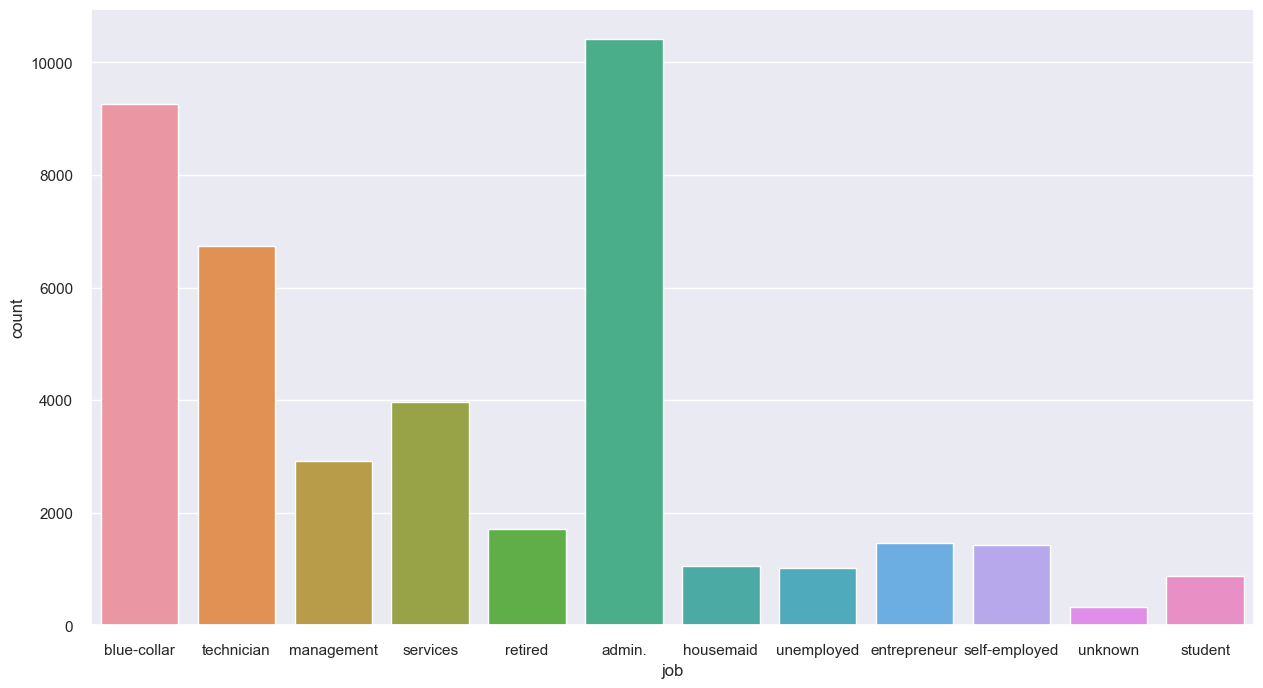

<Figure size 2000x2000 with 0 Axes>

In [25]:
sns.countplot(x='job', data=df_banking)
plt.figure(figsize=(20, 20))
plt.show()

#### Check Marital Feature

In [26]:
np.unique(df_banking['marital'])

array(['divorced', 'married', 'single', 'unknown'], dtype=object)

In [28]:
# df_banking.groupby('marital').mean()
from collections import  Counter

marital = Counter(df_banking['marital'])
most_marital = marital.most_common(1)

most_marital[0][0]

'married'

c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


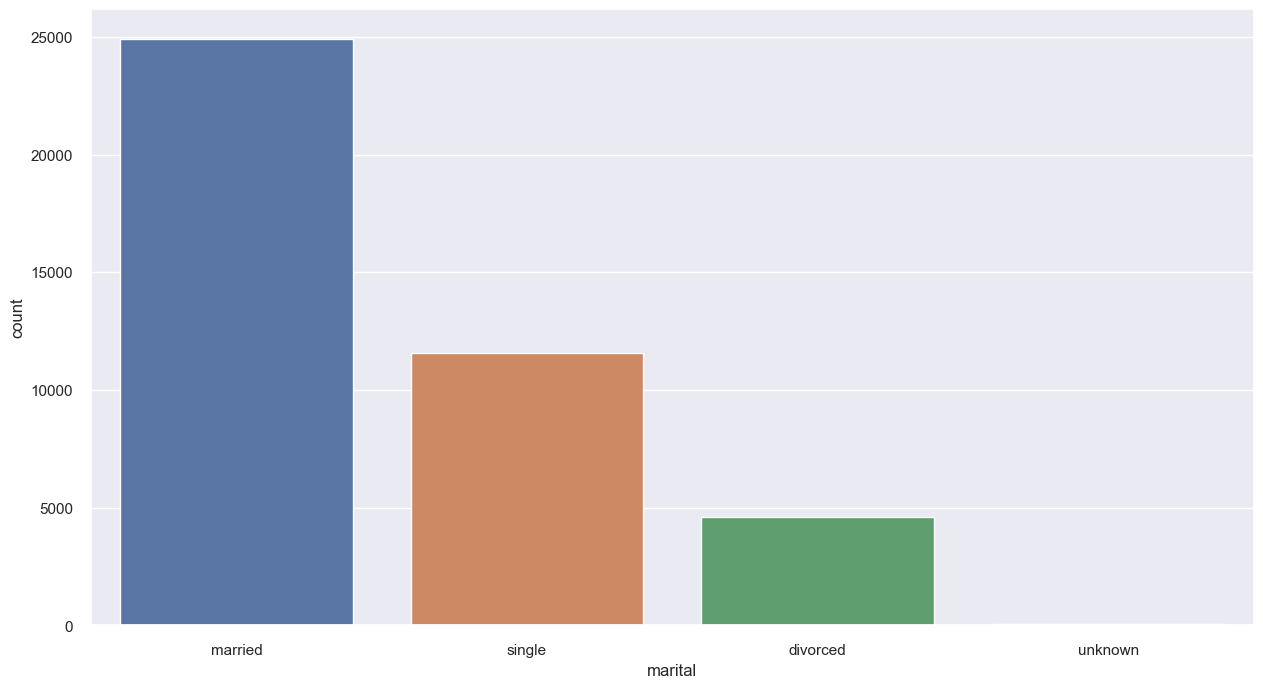

<Figure size 2000x2000 with 0 Axes>

In [29]:
sns.countplot(x='marital', data=df_banking)
plt.figure(figsize=(20, 20))
plt.show()

## Preprocess Data

#### Transform Categorical Data

In [30]:
catt_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for var in catt_vars:
    catt_list = pd.get_dummies(df_banking[var], prefix=var)
    data1 = df_banking.join(catt_list)
    df_banking = data1

In [31]:
df_banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,False,False,False,False,True,False,False,False,True,False
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,False,False,True,False,False,False,False,False,True,False
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,False,False,False,False,True,False,False,False,False,True
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,False,False,True,False,False,False,False,False,True,False
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,False,False,True,False,False,False,False,False,False,True


In [32]:
df_banking.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contac

In [33]:
catt_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'conatct', 'month', 'day_of_week', 'poutcome']
data_vars = df_banking.columns.values.tolist()
to_keep = [i for i in data_vars if i not in catt_vars]

In [34]:
df_banking2 = df_banking[to_keep]
df_banking2.columns.values

array(['age', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',

#### Prepare Features & Labels

In [35]:
data_vars = df_banking2.columns.values.tolist()
y = ['y']
x = [i for i in data_vars if i not in y]

#### Split Data

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, x_test, y_train, y_test = train_test_split(df_banking2[x], df_banking2[y], test_size=0.3, random_state=0)

## Model Data

In [38]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [39]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'cellular'

In [ ]:
model_score = rf_clf.score(X_test, y_test)

print('Model Accuracy:', model_score)

In [ ]:
X_ = np.array(X)
importance_scores = rf_clf.feature_importances_
indicate = np.argsort(importance_scores)

plt.figure(figsize=(15, 10))
feature_importances = pd.Series(rf_clf.feature_importances_, index=X_)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Features Importance')
plt.show()

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
estimator = rf_clf.estimators_[0]

In [ ]:
export_graphviz(estimator, rounded=True, proportion=False, out_file='tree.dot', feature_names=X_train.columns, precision=2, filled=True)

In [ ]:
!pip install IPython

from subprocess import call

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# from IPython.display import image

# image(filename = 'tree.png')
# print(IPython.__version__)

In [ ]:
import IPython
from IPython.display import Image

In [ ]:
Image(filename = 'tree.png')